In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

from tensorflow.keras import layers
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

import cv2
import keras
import os 

In [38]:
path = "C:\\Users\\Raju\\data set\\New folder\\flower\\Unconfirmed 803854"
image_size = (180,180)
batch_size = 128

In [39]:
train,val = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = "both",
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

Found 8189 files belonging to 3 classes.
Using 6552 files for training.
Using 1637 files for validation.


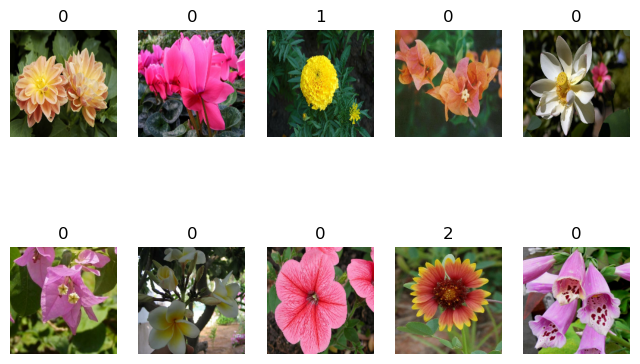

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for images,labels in train.take(10):
    for i in range(10):
        a = plt.subplot(3,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')

In [41]:
from keras.preprocessing.image import ImageDataGenerator
training_set="C:\\Users\\Raju\\data set\\New folder\\flower\\Unconfirmed 803854\\train_dir"
test_set="C:\\Users\\Raju\\data set\\New folder\\flower\\Unconfirmed 803854\\test_dir"


In [42]:
traindatagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

testdatagen = ImageDataGenerator(rescale=1./255)

In [43]:
traindata= traindatagen.flow_from_directory(
    training_set,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

testdata= testdatagen.flow_from_directory(
    test_set,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'

)

Found 1020 images belonging to 1 classes.
Found 6149 images belonging to 1 classes.


In [44]:
model = Sequential()

In [45]:
model.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(64,64,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2) ))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [46]:
model.add(Convolution2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [47]:
model.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [48]:
model.add(Flatten())

In [49]:
model.add(Dense(units=32,activation='relu'))

In [63]:
model.add(Dense(10,activation='softmax'))

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)      

In [65]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('flower.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [67]:
history =model.fit(traindata,
                    steps_per_epoch=int(8000/batch_size),
                    epochs=5,
                    validation_data=testdata,
                    validation_steps=int(2000/batch_size))

Epoch 1/5
62/62 [==============================] - 28s 412ms/step - loss: 23.0267 - accuracy: 0.0000e+00 - val_loss: 23.0267 - val_accuracy: 0.0000e+00


In [68]:
history.history

{'loss': [23.0267333984375],
 'accuracy': [0.0],
 'val_loss': [23.026735305786133],
 'val_accuracy': [0.0]}

In [ ]:
model.save('flower.h5')


In [ ]:
print(os.path.dirname("flower.h5"))


In [ ]:
saved_model = keras.models.load_model(r"C:\\Users\\Raju\\capstone projects\\flower.h5")


In [ ]:
traindata.class_indices

In [ ]:
test_set1="C:\\Users\\Raju\\data set\\New folder\\flower\\Unconfirmed 803854\\test_dir"
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


imgC = mpimg.imread("C:\\Users\\Raju\\data set\\New folder\\flower\\Unconfirmed 803854\\test_dir\\test_dir\\13\\image_05749.jpg")
plt.imshow(imgC)
plt.show()

imgCa = cv2.resize(imgC, (64,64))
imgCat = imgCa.reshape(1,64,64,3)

pred = model.predict(imgCat)
print("Probability  = ", "%.2f" % (1-pred))

In [ ]:
dta:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAFsCAYAAABcowhHAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOz9WaxlWXrfif3WtKcz3vnGnPNQQ2aRrCIlii1KLVHWQKkpWTIswUBDj3oR9CQD9oP0KD8aMAxDFmwIoEipW7LUttQsq93URIossorMmrNyjMgY7njuGfe4Jj/sm1ksWTaSMKMK6Dg/4CLinrhxzr57rb33f33f//uWiDFGtmzZsmXLli1btjwzyB/1AWzZsmXLli1btmz54bIVgFu2bNmyZcuWLc8YWwG4ZcuWLVu2bNnyjLEVgFu2bNmyZcuWLc8YWwG4ZcuWLVu2bNnyjLEVgFu2bNmyZcuWLc8YWwG4ZcuWLVu2bNnyjLEVgFu2bNmyZcuWLc8YWwG4ZcuWLVu2bNnyjPHMCcDNZsPf+lt/i5s3b5JlGV/4whf4x//4H/+oD2vLD5HtHHi2Wa/X/O2//bf5U3/qT3FwcIAQgr/7d//uj/qwtvyQ2F7/zzbb8f8++kd9AD9s/tJf+kv89m//Nn/v7/09XnnlFX7pl36Jv/pX/yohBP7aX/trP+rD2/JDYDsHnm1msxl//+//fd58801+4Rd+gX/wD/7Bj/qQtvwQ2V7/zzbb8f89xGeIf/Wv/lUE4i/90i/9wOs/93M/F2/evBmdcz+iI9vyw2I7B7aEEGIIIcYY48XFRQTi3/k7f+dHe1Bbfihsr/9nm+34/yDPVAr4n//zf85wOOSv/JW/8gOv//W//td58uQJX/nKV35ER7blh8V2DmwRQiCE+FEfxpYfAdvr/9lmO/4/yDMlAL/1rW/x+uuvo/UPZr7feOONT/59y/+02c6BLVueXbbX/7PNdvx/kGdKAM5mM3Z3d/8/Xv/4tdls9sM+pC0/ZLZzYMuWZ5ft9f9ssx3/H+SZEoDA/8/UzzYt9GywnQNbtjy7bK//Z5vt+H+fZ0oA7u3t/WcV/tXVFcB/dmWw5X9abOfAli3PLtvr/9lmO/4/yDMlAD//+c/z3e9+F+fcD7z+zW9+E4DPfe5zP4rD2vJDZDsHtmx5dtle/8822/H/QZ4pAfgX/+JfZLPZ8M/+2T/7gdf/4T/8h9y8eZOf+qmf+hEd2ZYfFts5sGXLs8v2+n+22Y7/D/JMNYL+M3/mz/BzP/dz/I2/8TdYrVa89NJL/PIv/zJf/vKX+cVf/EWUUj/qQ9zylNnOgS0Av/Irv0JZlqzXawC+853v8E//6T8F4M/+2T9LURQ/ysPb8pTYXv/PNtvx/0/4UTci/GGzXq/j3/ybfzMeHx/HJEniG2+8EX/5l3/5R31YW36IbOfAlnv37kXgP/v14Ycf/qgPb8tTZHv9P9tsx//7iBhj/FEK0C1btmzZsmXLli0/XJ4pD+CWLVu2bNmyZcuWrQDcsmXLli1btmx55tgKwC1btmzZsmXLlmeMrQDcsmXLli1btmx5xtgKwC1btmzZsmXLlmeMrQDcsmXLli1btmx5xtgKwC1btmzZsmXLlmeMT70TyHBfcnwrxbrIcDcnG0qW8w0XDz3RwXhHMdyBNFXYGFheRvJcMdzPkCqC1ITo6DqHkAIZA0Y4tI6Uq8jJh47VaSRGwY27BcfPC6o2sNy0tJXEtYHoFPiIi4FkGCnGAdBUs0g3j0QiQQqSFPIBHN9SyKhYzmA5s9QlOOEREoQSaK34T9sg/t7vBUAUTKeKN79wg+Wm4pvfWmCtRwFKw8/89F3270yQQXN5teDRyZLZ1Yqm8uAE0UesDUgpPv4EpBT4KAhBIEREyIiWkTyTCKe4XDjyVKIU+DrFek/VWEL0SAkx9h1r00whpfhkX8MQQEpFs/jBfQ7/IPhf/2//OoO8YH/vgEDHsrlPKx/R2kugQxvIMkliBFoosiTDiBGi22E+d6xqz3Jt6aJFeYnwivHOPsqMCVEhVMJQJQxTjfSSG0dHpLnFhQ3g6eKCWfMBq+4c10h2s5/hfOGJakqixggBla2I0WBkirePmFWnGKNoXEskoGRGkY9w3hODxIeGEFpCjChpMLpgOBizKWecnL6NEmC0oq09hhSRFNw8voW1gXIdSYxhZ3KA94quqxmNEybDITEIRvmI9578Gh+c/XtMKzFhymzecHZ+SsSjNUhlEUJjTIY2GVLD0f49Xn3lj7OuJPPNkvvv32e9XCJUIHiH9w5jBMoYOtdhpCfGBqUESmvyQvN//we/9Qc+/gD/p//2L3H37i2uFhfkoyEXqyuuLufc2X2eN176ca7ajkWsWNRXtK5GOs9I5nRtwAyg6paMhgmT8ZChEdhlx276HIne42x+SRM3mKRhXKTEzqF1gZOC0m3oqg6lDUU+oKGlsisgonzOOJkwX1wyGmcUgwGrNaAkj8/vc3Rwi8vTR+wO7lBkR8RkRRMqRsUhw9GA2fIx89Up8/M5N3bvMS0O+Wj+kJPLr/PK7c9wMPkMa3uGFxuk2EGLIaUVbFix2HyX05P7ZHqHW0f3wFXIvONg1/Dht7/O3nCC7TxXVcWgGHI4PqYhYx4CnV1yfJiRaYGvJEW6z+X5nK5JGQ0PQESqdUCRcbU4I82G5MUNTEg42BmTpUNaW9N2NZkZMs52EdGjZINUntde/ct/4ON/9OffwJWW6uElEzFkuhtpmo50MGGxaajLFWkyYlLk2KqjjhVJmtJEgwiWvckBeZEyvbHHcG/Mk4eP6dYr4qajXC4w0tC2HXvPvcLNO3dwzRUvfvZ1PnjnMXUrOHj5c3z9/V+n1RmpGeHtOX79BHtxAm3Jn/8Tf5LxOGOUFfy5P/PnuVqv+c3f/Qrf+vY36UTGf/UX/hwv3H6ZF26+Dn5B3SxwzjIZHRKDZVNdIRBMh1OEjPzfvvzv+D/87/8Hglzyv/nf/S/54utfpOwa5u0KITXWrwjOcjVr+K3f+i7/8he/zOX9C3BghhotU+quxneWYCFNMkyiiBJe/Zl7/MX/+hc4Pn4R6yz/5J/9E373qx9A46iaBhETpEwQqsXEC9brBVFECEAUSCWASJLt0XQl3tWkLieuxiS7rzB769//gY//X/3rP8vCnaPVECGnjMd3UTIjxo6u2aADjIc5uwcFjbMUownT6T4qen7nN/4FH7z/mDSfMJwMuXl0gztH9/iv/vhfppt1PLo4p10vGE5SLI4Hp0+IMjIdDdibjLlYLVit1pRliUkkchhomo6uDgRZI5LAfLai7ASdl1TlFePRhNH+AXu7x7z1td/CCE+iU9qqJE9ziuEht++8iqsr3n3wFjJTfOYzP0ZdCrTI2Nk5prYBqVPCZsmmusRFTRUC9x98g9XFd3n0wbsIDH/yZ9/gcNzxE1/4a/yTf/FbJDrj4nyBBNJBwd7tO6zWM7rVhthFvAgko4bDUcq9vRsMmPD2R494+9EJwTV89t4eT642nK5KfBNItGMwLsB6jDEcD3OObh/zJ/7Yz/Avf+e/4az5iHLtOX1cEO2Yf/f/+Lefakw/tQDcP8zY3Ut59GgFPkdKhTGGNI8IL8gLSBKNUoKm8eRDyWQ3JUgPAnywdG1AKYVWQHBIJOXacXnmWM17ASNExHYNw8GIwUiRJrBSng2RDogItAooA64DW3naSiO1RAqPNhGVBtARZVLyzNB1gXLjEK3vLyBAyv6zIkAEIcR/RgyC1pFbd6cUo4z3P7q4FlmSGCPOC97/3gXpOCCThCgieZGgVgqjBd4HUJIQPn6/iNbX38cIIiJE/5nOSdoWEuUwBhCwO90lFBlnFxcgIh9rSCEArt8f8Z8c89Pp6/3aZ/44SGhsRWPPcXFI3QzYVHO0UghnaZ0jTyE1HhtXaHVFZi4YHxXsil2Wc8PlJayriCRB6ZwQBQYYacWgsNTt9wjyigfLSFw1aCOJEYJscKLCWc3Nwc/y+t2f5de+/R9Z24o2KEKU+KgAixeOaDKQOQGBUmBdhXMddVMSIxidoqTCe0UMgSgk3gfazpLnQ6RUSOEI3iGE6McLEDEQbIcWCcNil6qyQEApgYge17VIk1K6ik29RtuEJBasly1XFzMQASUFiECM/e/WdQ4EpCplsVzx+Ml3OL71Gi6OODg8xlpP2zZAr/6F0IQgkFITY78IiqGfE0L8fxvB///xMkGYIUkWyVLDzsRxdX7G5cVDPsqm7Ny8TTtf0XYLVJqRpgOaek0dFth5gw8tZRkh7AIZN4rbjMWYItkjuzFlVs+5WpyxWHWMR0Oc9KgskHlF5yN5PsGYCVo4Tk8fkxWRyUTh5QorWspmwN7+bZbLORJ47fkv0NoWjGATrshNisSR2BRpNbPzM+abJwTp2T06YDFfs1x07B/vY9RrDIbHNAE2DdS2Y3cPbKzZVAsqu2Q6GLIxI7TJsSEglCOUNWo65I3P/hSbyws+vHgHFx2rVnBjoFC0XFy8h04SqnaP2azChB2SXcnudMqqXLGpnpCoXS7OrjiYTjneH/LNb30XqR5x58ar5IlivljgfMvu7i5VXTId7pPoDO8gzZ5OYqe+uKSZbYhV5PCFW/ypn3+FkycPefBRYN5EYprRtpZWgEChpUIphWwCwTrStECbnN29CUe3RpSLGSdXS7QWaKNxaJSO5Fnk8MUxTQlrv8DGkmhzQiPxjYPc42VLcC3Ka0w6xgXFv/nN3yGXI5KJ4auPTtnbP8KQcn4luf3SXc4XLcv6AV5OMaJktZojItywGVHA1WKFwFF1Hh8j9z96hLMWbQyuSejqXnCvV1eMhjsM0ilBROKoZTR4yOT4kPmjBZ3rkDGSaY2wguA9EY0QEu8C6SjjhZfu8ebLz7E33EFEz+kbn+W7X/8umzoSo0RKjZAKozz1ekP0sV/4R4hEnIsQBMGuEDoCAuc80QqOsp2nMv4miYTOEoQjTQRJahgN9wg+sFEFttsQE8fV+oSdvdsMRxNqt2B1dZ/3PlqQjl5m7/B5jo6PSVPD3AW+/NWvcZSOOJIZ49GERVfReoGMBWmaElzk8emMqlmjBzkaR24CG9cQQ8qgMKw2jmxgyYucJBmxWF1giiEERbuZ8fDqgkEK2ig2qxYlU4RMkInn7bd/E9VJlNLcOn6eRE0Z7E6QStN4wWByhJJQR4dScH5+wkf3v0pTPuHi7D5KevZ2pvhO0pSC3/nqr/NTX/wsRzeOiS7jP/y73+B7772HY83hi8/TKU/hPJKG87Dk6N5dhrmgW1RMR6bXB2bCW++dk2Q5u/kQmcFolHO5nGHyDLxm01o+f3zAV776dX7nax+wDCuMNoRNINSfXgN8agF449aAuqkoF4HoK7LBDlob8sKBF0gpIQqU0uQZqMzggkVEhbeCxlqEkCQaoutQUlBtPPMrT1MJpIrE6+dscKAQ5EVCIgU6tijtqEpPUzuCgiggWMAKEgMqdwgZkUYitUCbiIsC6wOtb7E+4mMfcZNSIiWYROF9wLvvC0Dxe56gAhiODLsHGbP5isuLFpD9zwqIBK6WFRcXihs3DymKnLPLOd5ZnIt4H4gBYpRA/95C9FHOfoji9WdKYgx0XiIIpKnChcit27fpSsXJ2SkQPhF+/ylC9O/3/SjjHzx5OqClj5bV1rJpLXUj8W6HptvQ2TlGOUaFIktBKo/SjlR3JGaJUVeYfMjNWzt09S7a7WHSGwSpUeISb+9TxUfYZA1K4qUiRo8PKU0XWaxWVKVjop/nT/+Rn2dkJhyMR6wvnxBEQpAGvEJrifMdRklSJFXXoo3+5ByHaAmea4Gn8E4ihO7ngALvITE5k9ExdXVOU3cYrdFodJoQvKVra4xKaZsW6zxaK4gBScruZAwyoQ0NvqnIQ8am9jy6OIXrMYrRwfXNXCDwwRNFiZQKIRrOzt4nK3IGo5fY3dunaT0XFzOCbdFS91FgEUjSBN+Bd7FfFcRAjP6pzYE2dKzamht37vHRh+/hfMfudI+7B3d4/3vvI7KEPBGUFUynE07PHzK7eI/xMGOY7nFw8AKb9Zx6PiNNA6pQGKFx3rOuNuSDMXfu7DLfnLLuHlNtntDNVmR5gTA5j2cf4F3CZDBBSUm1WWE7S2VLrO8oV/dp/IZRMWC+mHG1ECTJgFw6lGvJPVgfyc2YvfFtys4QxZrOd3TWkWnDeLjLNL1FrncJBlrfUNol8/WMYPqrzyQR3W3oloGj6U02nediNiMbtIyVoSkDIksR6Q7jvTu06yV5us909w6z9WNSmZKlU0JMuVx9hKsuWM+v2BtOOZs9QpsB4wIGY4MsHJPDAf/FH/sSXWVoKsXF7BFNU6O1ZDodslxvKKuS5++8gIiOZtM8lfEXrSBuXH//ipEkSfjST/849z/6DXToGCRDfLQ4PGQKrTOCVpgg6OqWuizJJ5ob+5HJroc8EKTlx9844v0Hjg/PA0mWs3Mgee2FlETcYjSa8B/nC7728AnTW/cY0OKlpu4swtWM0gkmLaiWK7qupqoaopGcPLpCxiEylKhsxGj3Jo/OK6pqASLns3ePSOUY7yKdz6hd4HQzIMaINWNyneP9hOg6dJpRqLsE/xxVuWaz1OTmCBESOutZrebk+Yt89vNw8eEV3cUZjgAh9HdrIVBSEaMiBItSOUG/zqL8LKncYZBEvvSFff6v/81/xyouQUgiCq0hNCts68D394oQI1GIfj3qFaGLIAIBSRYz0IHV5TtPZfybboVJBETwwdF1NWWzJjEFWV6QZR3LxWOyQtFaSxdKnH3Co/e/w2Z9RZ5PGAxrEn3J7u4xnVcsujV10xKHY149uIOrDM1qxXg4oe06Gloa2xC9p9uUKBXwoaRtGxKjqOo1i/mS0XSfYmjQyYBOXFJVHocFqcm1IR9KonLU5QYjEiKBxq0JrsNZCB6SQrC2G1ISglNEneNtRSoEV+UV667iw4++QWwvaFfnRNuQpymuFbz73YfsTBSf/fzz2LgmhpTJdI8/8XNfwnYN+wdTNm3LJDe8eusOt6YJv/qNJbb0XJZLbGW4alqGozHVukJJTVdVIAKDacFgMmbdbVBC0bQd5+uS2XzNu+88oCkLlmXFcCB58+7zvP3Byace008tAHUSmN1v6GqJtZbpgUUXCmkEnfNsVh4XBFmiSFJB6y0uCkJw1CtARoYj6GyNloK2DMzOPG0dURqSPNLUED20TeD8ScV44iEomnUkyyTZnmI293ReoIVACfApIASTfYVUgU0t+uiO6kVm8NA1YN11tA+BEL24PDjYoywblos1IQTkx1HAayGlteLmnSmDUcrDh1fYVvYiTEQGecr+7gjXlVRtIAJtuyY4S3CB4AP8J8JMykgIvTAUCkwiCF4SPSAhhEAXIDWQJAaJYL68wnqHVP3DJwQIIYLkWqwKhOwjPzFGxFPa2G+YTTh59Fssu3OsdnS+RiJI9RDpNXjwtuRq1pCl5npXVcegSIgxEmjIEoeIG3x4zMAcMoiXJEXOYvE+jT2j8xobLC74/kYXA4v5mraFzjmm6jn+yM/8PGNzRLM5JRcWLVpq0QICRMQ5jVIpqYKY5CwXM6zXGCNxoSNaRQiBEDconfUZFef7SIXSCMA7yc7kNl2zQQiHlAolFM5bYnQYJFmSsKpWGJ0gsGSJZDqcMBpkNF1kUOwwNBmXXvDk5ATrO6QQiBCJBES4nmsxIITEuYauEyg1pLMJj08+5OXhDfJiyN7ePnVl2ayu0Cqhcw1CCvACrTVCBKxrybRAiPB0JgDQyQ2l2xAFSGXoOoOzGTt7d/jcm3uko5ROeN7/6G3uP/ge3nbsjia8tP86B+MX2Jvc5bG4z2L1TUSoWZQb8p2W1l7x0dWHrE7m7E53yIcjbOxovSU1BfW8omHOcGeHarPhyeUV68WcLDXcPNqhsx4rLSJb8eDyaxyNj9Be0PlAY1N2kx324zHyUcLi/IrkULG0ZwTlSJmSaEdt16BAty3zyw8Y7h/SusjZ5SVZOsAIzUeP36VqWm7s7aKFI0sKiuEYXwZskETREYygE4LVcs3x3pRbo1fY3H9AUhScVOcQLTvTQ2zs7xGbVc1mvcbsZLw0uUs+eJ6yqVmVJ5jhGLU74rJdkKop1g9wLmNvf4Szknfe/oDoPTdu3cQFi6NiNjtjNEyfzgSoIniFiJHTywtms4Szyw1PPppDGcjzDJ9IvOgIQhIJBOvxLmC9Zb1e8F+++hJvvHjA//jtd3myaRgc7/KTP/kqM9FiuhVFlPzYGy/yJ954k/W6Is9HvG2+TmNnvHf/32KbJaIbgwkE29A6y7qrENoQlUYPC/Zvvczx3ddQMfL48X0m+y8y3n2T0QAiks5HProK7E9fQJmEWS2pXaATe1gveLwQjDLNbJNS1zXZMEeom2T6FvvDliK5SZGmjAZ91qcbl7w0vcfdycuU50t+89d/laqa4YVDEhH06zMhIkpJgnTUtuCjxYiTWqBFxK0V2XiPoqqoVx7vLSaNlOsaIVKUMeT5iEhK6ALBQUBg25pEQ1O11GVLlqe4MH8qw+9pSJOESIIQCh8cEYcwEq2gLpf4YBEiQyhNU58S21MSIj/xxm2ulldcnsxJ1S5CfkiWZQiRM5ze5awtWX+w4MbuTZQJ/aJdO2obKYqcarYhlwnLdUsrN6gCpKnRzpKPEjoXQXnmm4+IqkIZx3R3xHrWMjtfs7s7xCSaw4Mpw2LAcr3BBkESE/RQUfqKs4vHyOwKk02pqshotE/XRbCeEDou5k/omjNUqGhbx3h0GwksL0squ+He3Tc4OL7N8c07TIsJRwc3WC7X/MIv/Dn+za/+GmOluXW4ixCKq6ZF6JzHDxekpuDqasVqI0hUhtQapwygEaqjdo53HzwikTU7xS6lr7h773neefcRnYuM8v0+Q1EYxsUIJz/61GP6qQXgYlFSbSLBg/eRzapjbzRAaIU0kc52NI2kLC2pUUQE0UVWMw8+MD1MCKEjBM9mA8szz2oGSQ5pBnoIvoFuA+Um8t53WorC9eHXKrJznJLvCXwIKDS0Ee8lTeuY7Amef3mEwLJcJjgLnes/FzQhQIwCISPEPvqXZQmHh4c0jaPrPqIsK4QSSProHggGQ8XuvmFdtVwtHShFJiN3b+5wfHuf0pacz1Z44HI5J3rfizOuAzIiIpUk+NDfCCR424eihYwoFYihjwgG31/QUQhSIsM8p64sj548JlzfRD4Wf0L0KWwpBSjV31iMxDvfL2WeApPBEdEOefjgK+weKXzY4HxAyRSpDEYOia2gdZHLVYVtKxQBZhusd0BAG4X3FicDMn7EMB8RYsD6mj6eaojOkwiNzhKqtiGEiJEp08kBr+/9ET5/+wu05RmXV++wmn2Idx1eZ6jYp5u861PjXTTodEKSXNLYmsaD1hqtMuquIgSP9Q2QgI9orZGyF1RZmiJFSp7usFnPkYnEOY9WhlRk6EwxL0t8DGRSI2UgzxJ2RxmpDASt0BhENDw+mWGtRwZ1vVLv52KvkAUxBpQCLSQCi0Sg9QDbdZycvset22+SZwl7ezu01RzXObyzKK0Jvrc8ROnQqUdq39srnhL7u4doI7GhZTiaolVCKBzzas35/DFZFbh965if/tKbfO/t7zE/rzjaeYm90WsYmZOoCUfTWwzEiihWnM/W7O5GkiLDXTREfcJs9oAj9TJVG7lcd0yGQ46PPsvlxRmnjz5kcphTuhI5CtTrDkXC8d49Ft0ZSlm6xqLRSJUwSAtyu4M8S5g99qStI5cHiNawfDxH5xqfSJwW6GKCVpHJuOBstSGsBBezh5TVKRtR03ZL2nZBTCQkktMnV+BOOTpyFMUR+zu7zNYzUC2lm7EuG4RoKFcz3rn/HtPdKXdvHpPrFBFqRIDHjxc8ebxgmA6JzlB1npt3nufR2XtEe0HpllAVbFYrdse3MOKAsknA73F0eMDhzRVVteB7HzxmMJqyv5/TdJdszp9OBJDGYrSi61qa2tFtSr7w+Vfp/siP86//9W9hQ8QojfQW4TxKK7wQOGHxqUYgEC4yn3c8freCVhAGgm++/4TZkw53umRycMjx6C53D7/EuV7gYorLfp0vvfETPLi6z7sXMxK5ookNiS648/xLnJw+olWC4WTKjYNd/hd/4X/FcHzMb3/9K9y+ccirr3yJzqQ8OvkGKpRsmshyLVlVBXkywVcdoshhZxcRUsqy5Go25+GsBBKqoPjO4wW2mBOcJc8zwmZFXkmUdKRCkpuC0WjKl774h7k4fcDbb6+pmg3Rxf73jvHa7w1mmHDjOGNUrHBR0daOdXnJnVsv05Yzgi1pm8j04IDn775Klk8YjkZk6YjlueXDb97HtZZgaxqxJvgOLzd4XWKdo42LpzL8MrkOjgh5rWg9QgicAyU7IhXSeITxRLkmuHOSYEnSHJVsUJuWcuN5/LghuXrMjaMxN/aGDGLOjaMvcblY8NHV99jbOeb44JBhKwmATDxnakVsNPnoFouVYNldUbZLEpXiZaClQyvHznjMyaMS4xOGIkUmilVbEVoIBKp1g9yP2NjhG80o1yxWazbVhv2DKW15wWLxiM4prq40wSmCk2TJkMX8BCOh3rSo7ICXXv5DlOsr1otvMBmlNLZmsTpld6+gtCW2GLFezWjawKpaIkSg8xsCkiQVfHReUdU1o2Hk3osHVJeRs7M1i6oiMxKvNJ0P+DZgjObocJf/2R/78/zqv/kfefn55/jyr/57hBL80Z/+ab7znsHLjg9OZxCzTz2mn1oAzs4dSWIQyhJaKNeOAyWQCrKhYDBKCUiaGCBKohMszjd0teLgVoZQDcFHvIXVLLC6BN/Sp3M9JEPIRtDVfQq46aBt/bW3CdrHLUUbkQmITlCtHMF6dCq58dkxhwcaFwJFaqg3nnWbslx1CBkYjBLqTUcIAUIEASF4hBQMhgOyQUHdtb03zBi89xADB/sJg1xzetkQfEo+CNzaKzg6LLhcPeJys8bFCC5hdrVBit4XGK8/JgQQvcEQIfqiDy8CSvReRhEEMUR6E6K8ThdHlDIkWrFYrmgae/0+H3ske/HHdcRPiYhUAqM1Skn0fyZF/AdB5wJD/TLHg3PW86+hixKRJAT66FlUKVoEMgUi0WRFStuWWNsgFCgp8N4ijEaHyHA8YVM2SNkXNPQWO02iM3YGQzZ1yWAwgaAZ5AXCp7zx0o/TrlZcLD7g/snXeFye4HcPCNRIchAB51qkVFgEJikosgmNrQBJmgyQMiFNBSF6rItIqZEqIIXEO0dM+vmhVMKg2GMuTwhdJERBFntj90W5wAaI0eK8IkkVo0HCIFF01QpkzroqeXTyEct1hXeBSLz2jgb8tSlUCoGQAan6f/Mh0DQNo4EEIbk8f8z+9A55usdokjLajLk8r/FERPTgPdpAmmqs79BGgLBPZfwBjndvcVVdUrYlTd2QJobx5JjTi0tqB9F4zuYX3Dm6xWc/8xqXOxsStUttr7haLqmaS16681mqxQAhA+nQcbJ6wmGi8MISZEZeKLyL+E7gfMfZ/DHRKfYn+8hkSZo2VE2FMgmtMCznNZOQIKQmlUPu3XiOoTjAN5Km9KSrAWqZYnQKQeIj0ErqxZx1U3E1n/H49BHeQD7OSEcJKk3Y2a+RCdzdu4tKBEI6Hmw+4tKdo4Y5u8kt8kxgmgIdNXvDKV0+JogljV9R+5KsE9S24+BwyqZeMFs5jBgxyfZRUbO5OKWdOT7/xvPsTQbXQsZixRqZwTSfImPCvK2xnSfJGrRxXC1aLmaPObq5w2hvyqC4g3cJQqRMxsfMZ5dPZfydc0gpUVojRYKKih9784vc/dyP8evf+B7rqw6pFUEpfPCIoDG+X+ikaYEI8JXfuc83vrfBqDuk5Smeht/81iOaZcQ1js2m5v/1618hOzji3p0X0FKwEhlvvPk6n8t+hv/LP/o/sp69TwiC6c3n2Nm/y/zJE15/7hX+5J/802jV8hd++qfpuo6xm3N8dBttUn71X/4K51/+1xwGwxM0RRI58/+BQTbidmexmeFqOqI9OqDYm7DnNdP7J+wlihAd7599j01WkRjNaDSgrjasVguEdBRZhlaazarkww9/h0U5IwRP8AIXAgkKSV9w6Jyj2B+x5pQHj38NlSiqxYaTRw94991vIaQiG+SgGl77wmc4PrhLUAV5nnLx5AR3sabcVPiuxQhIswFdm5BkEpXktO2CMKieyvhrHXCh953H6HC+pG3W+NrjzIa2W4CokcIg4jnDZIGvJPmgQMiGnd2C1WaOSTMGA4XSgjQNCLck3WRM5S6tqXjn0b/h4WyH52++wnSQsVquOF2dkvgCnZU02Zq2q5AMqbtIagrW5ZrEeYaDMUoNiV5hK8hMTq6HJAwoUkO7mrO68phBxqTIGScpi1kNnWQySLhaBLIoUNrROcu6KZlOjlnMzxCiZWJSzi9r9m/fIx1O2L91h9OHjzCqIZl6Hjz8NpOhRaVDLoNgevMWj57MWa1XOBG4sh3DgUHHmuFRytXbHdNJxs6u5JXdm/za5VvMu5JsuEfrHS4oRJSMBobXP/cif+bn/zSjTLGYryirFhK4uHqCTAX3Ty9prYL4qWXdpxeAm6Vkb0+hVx1t23ultO7zkiqJZInAXldTNtZSnnuaNRzcMcjc4TqBd4HNwrOZ95EwYh/1qzcgczA5SNMLQOh9fh/rGdsFulYibaSadUQHSHj+5X2+8MZL6GzGrL7EhhLnPIMiZVM52taSFinjHQVEbNuLsrquuTi/YLqzhzaGJE2QUpGkCXVVkeWB4+MC33mwhlefu0tUFevynA+ulpR1i28jRhuqGPDekiR91ajzAUEf5XE+oq4rd70HFH1qOEQ8ov/9rotBlAKpFEJJLi4WlOsFtvMEPk4hfP8rBHA+4oNjMEowpi+EyJOnYwA/O1nh65yj0R9iczkjke8S1AaM7L0+ISFkCu8SvC9ou5KuTWi7ihg83nY4p5AEEp3Qdp5hXuBDRF5HQpXOSNOUqm0w2QCiZFjs4J1lkI4xwrNcPuL+o+/y4PIBbRIwtkKYAcoIBP35EDLghSI4zSCdsKmu6HwADGVZX3+WJs8KtJJ431xPs95I7b0n0Zoim5AnQ2xXIaQg0QmzzRWVLUlVgnWWKBK0yikShQwtqZIsmzUXszNOLx7ivIfQLwC8j4QYeu+f7Aey96NeT/QIXdfRNEvSfISIcHbyiOee38doxc7ulM1mjdQC7zpidIQYcV1HmhiyBDrbPZXxB1jM1shMUZctCM18sUJnYwbDXaquYlAk1HbBt977HruTMYkukMbSdQ3L9gydGNbVnMFon4v5ijp2VOszhBFMJwnSj4lhSTAl6/mGtp0zGqZ0do1JdhnEAQeHd1gsGwSam8+9QC4TTk4es7N/QKIz9GYX7A5Fl8JFTdKm5GKCEx1XqwUeiZAKFVKevPcBKkYmYYxvwc0iss0oxgOEU5g0xV5JKmdZLxaUm5YmNswenTHZ26FyEWuXDPcieZNy795dVuKEs82HdLaklIa6bsiHQ6JqcSGSFQnGDLENvPnZHycTGdXigoOhxFZrTk8a5KghCkmqE2QckhtDs3Zo3zCa7NHUG6pFSYgZt27dYjjcY3UlqDeSIt3jtdfuPpXx/1jAJDolzQoenCn++98448nmEU1bYl1HNH0U23rPIB2j2oCIDqUVtvFsyoB1Fp1WCDkiupR119KVG3Ad66rjrY/O+PYv/0Pu7OwzFSMaf5P37v877rz049x74Q/zreUTEqYc3vkJMJq2qVg3FlX0Ffy/9e5bLB98xPv/3a8xXzacNS2r2YqbNlKIhpsCdpRiIQMizpm6lisghsCFMey4QNY1DITkT4oM30Y2v/PvmXOX4nhK3Wo671meX2EGGWuXApJ6uebhh7/LxdkjmrbpF7WiL+hIVUrjLUJL1GjIBs93PvgAKWD25CFlWfLCZ96kXWvOHnwHJc5ZbiwxWWMGAmU9HZqr1QZrA67t8LElSoF1QPAo79CZJE6ejgVAaYHEENBY50E01PUFSbqD0g2xiWRpSiolAxr2Cs1H52uMycn0CKlgOC7RBpJMEKWji4YgOpLME1yOXg4ZsMeT2TeZV++QiynT4TFl11K7lrZuWVUNg3TEy/c+x2hnj4cffo/ERqr2inVY0gZPiJL2asWwGKLTHBcMyWBEXK/IxJQ8ScmSSFNCV0mm432MFLRLR20FO8c7tLLBqo56s0YRECoyO7kEq3DdktniQ1btmDsv3OTi8bd5fHbO/nDE+el9do/2OF9LzM6U+x8+pK49TnZI1eDWG/YmCakMNM2Gg1t3uHV7ykvDF0gi/Jvf/gYPzyu8CCAlqZK8/MIRR8cjnF2Rpoq3vvstgpIIJfitd94imOsiWSGRvw8b0KcWgFFJovakCTS1wAVPZwPSKKSKuOjoHGgN5aWlWXgO7gzIR562dQQLVRmpVhADSCWu/XDQtWBKEIa+9Un/LPzByZeASiN2HXvxJ/oJme72/08nO6im4+TxI7pN5OYLGdpIFssOo1uyoUIKQ1t6ui7iQmC5WiCUxAdLkmiSoiAxGT52HB0nZEOJbyO3b+zQdC1PFhdcbjbY+vuRuKZ2SAfGSGzrERG01LQxYLQk+D5lG6IgIpF8P0UbfH8ehIrXRQERCHgi5SbQtB+7FvsveR1574sHrrO9HnwbEQXIKJgOh5968H8/vPfufVK9Q5YPGec/zqOLh4hszs2jhHExAeFpbINzihAU1gm6TtF1CU3b4DqN0RpvbS/Qr4WqSPpwtdYaZ/tq2CzN0TrBmITgHVIrslxTtguqq4rzqzNK2+EFiHqDTguCaQhOI5XDB4dzltSMUGlGpkZEHDFIBBKpBEpqRIx9GlUbrO0fXN4FfB9cw7vIeLjL6axCxL7YY12XuKbC5BBchw0ACh0sRlpiTPCu5uTkfapVg/CqtwYQQfYpICnl9Z8RpVRv7g69PSGGSFmt8BikMsxmj9jfv82gOMB1jul4zOyiQ+iEECEGh1aaca4ZDySzzfqpjD/AeHxAMcyYLxqckHjd8PDsQ3anO+ztTahtSes9XbB4ItO9Xcq5RepA0CXzzYfcd/Dqc59Hrgts5ZlvztGZYLwzovUlZXfJqrsiKUZM44hCTTmYPof2Cs0hujvk6HDEd997j/MnH/HS8RHjOOU5+TK+gfJEENsCEQWTsI+UGSYmfOfrX+HJ/QcIqcmKIcZoNldLiiLBpIZUKhrbIVqHbxqiVvgY8Q041xEqS+E0w3hAeBIZbcYMRrsgAu3jluXJAvsg0E5b0mnOkK73jOK4vFiTFAOiUqx8g88eUq09o+ERw/0x7cqBDOztTjixM1SwiE4hfMQKR9nUTIcjjBgQXGDncMBokhJVxwcP32E0GZHIHRZLQSITzpeC15/7c3/g46+MoLMB7yyaHBsH/PZ3T6iaK7pNjW1bNIEoFVIlmAAqSoQToDwWQXSW1pS4umK4/zLj/SkXqwq7WpCkA4RRhOy61cZHlwybJdPjAZfzClPMyNMpJhmRqj3OH93n/lvvoDcNDz54n1/8J/8te6ni0X8P8XTFK1drhsGRpyndcMRhW9GRcjO2DIJlLAOyc8jQwvQGg7pmf3rATr1g/6pEpCmBhAPn2bx9xZkLNF84pJoOaaNnubok8QMmYg+jJtBWYAXC9/fyGPvWZE4Eci0QNjKY7jK9eYyUCucaVmXJ5PCYvSTHBUU1b6E9YiAl0aVEkeE9OGcR2jA+HrE+nrM4XVFXNa4FJSJaR6Jp0JmnsU8nC5QkGc5rnPMIpbG2JIQSZEuSTSg3ARlAK8sg9Tx+fMaqtOjM4uWU4TBlujvEtrJvaeUCITiiDBwf7TBbW9xZxc7oBmSBZXWfsnnEYv0EaXZJGBGk5Mde+SIvv3CLuzffoGPA/mDKb3z1VzDK0FUloyxh4zuyLCNLExpTEpXgqrqEQeTNz32REOC3f/Pfolo4vHULMQ6UdkO9USBTZKOYDAfEUe8l7uqS1Az4sJqTFhlVtyTOAsXokEJ6kiTh7LRkeCtnU22YbQI/9vofpbUJ3/nuR3gSmnbDzo7ERcvJ2QLhHce3UqRco9Uxt19+jhef+yzogn/9H7/Lw7NTyrbCKsNb3/gug6zlq8Vv8I9++V/w3qMnNJ3Hu44kTXprnvVILEJ8eh/Qpy8CMR4hIMsl63X8pMBCG0lwfQorhMjm3NNeRXaOCoY70LYtvhVUi8hmFVBSotOAkBEHhK5PBTclmKzvz4eO4PkBFahTQXQC+3GJc+zF4tVqwdfff4d7t27im4KP3gEVBUd3JGkuiETKypKngnykyQeCzTpQVZHOtazLNc4HIgGpBSjJeJRzuJfR2g1tsCw3axbrik3t+gyyEATfR3JCjPiuF77eCWIIKK2JTcDaiBC9gy94AdfiL4bwSUm/dxGt+/PofSBJekF9XUXx/RMgPq4g7V/Tuv97CJGm7TC1RqcK95Qu/vP1CYluyLoBlYXojlmfzxiGhKPhMW2YUWiNyCIhbnAR6i5SVSBEwKk+xWpMQpKYT9JJURs62/WtcYRESkmWZn2kM173dTQ50HC1fExYOyrfEqTEOkcoGwbDDhFWaJmhtaGzLdbVECOJzhgUA0LXQTQoGfGh68clWpwLxKixnUcrSZYmSKH6sRWK1vWp4yi6vlXFKmJ0cm0hcGilmIz6FLAUiigkIToePnqIcx7rIMaAEAJJX7En5MdV4b0IDiFej2UfNy7LBkRDkkVCbHly8g5vfPYGbamZjsas1xtcsHgfic4hpMJHwaKsaZunlwJu7IL6UuMajR7kWBq83zC/2jAa76AHGVFCtILZ4orJ8ICAIuLIxwnNsubR7AOGO4fsHNxi82TJwqw4W11wFTasmgusmxGsIwsdR9M7DPM9lJacnr3P8f6NPoLrEo4mx3jGpOUIfZVwdb9jkI2ZyCna50RqughNU/O1//BvuXrykEJr0qygXS64rBvyxGCEQkkFCFJliAJEiGgERvRteoQw7O4cIeURhICLHiFzYjRoAWnwJEZQ3j9j3W2oB4HR88fsv7RLOy05v3iM8xkhRmDDppxjTEaaSaoqwWS7rGsYTQxGaIiBoTnAiAJvYLW+JBGGN954g9nqI1zoKPIcHzRXy1NWdUluIvvHL+BbuLw8fyrjr3Rv+elcR9WsWK+uGEx32JRzlNRI7XBti1KGQZpjbMQFgfWSLHqUikgzZHB4j83iPh0LqtWczfoULxx6kmEzDcqho8CoIU0z4/zhNwlCs5mdkh7eZZDdwjuNdC3SRTpdMHI5z104Xo01NxY1rvPkviGnY89WVKYhdZb55CZF9CSrOblK6VwHxpCbyLhq2C3PSawlj5bCtczGvT9zR3YM313xZNlgb+3xYN9wuVkS/Rx/U7I/nRAWgmbjcNYjI6AkCDBR9S1giOgiYzTZQaIQLoC1qET3Pf68w1mHMBnjnZsMhmO01n1/Wzyx67BuQymWbOQGn1hk0iGjgFDjVYXOBij/6T1gvx96G1Of0fKdQwvVe9CDY7W8RMoOk2qEbEAYEn1MPphRZCOulvDkgysePV4Rg2HvoOCllw6omhWx6LC6ZFGtWZZLaBICuzx/dIPGf42qO6HqSjL5IrkZ8BOfuYttPsS3iuVqyt7BTVSWE+slk2LAfLlGecV4pz8P0jhMpiibkiTNWW0uuDxb0VaOyV7G3s0xrawYZns8eq8lWEPwCU3ZkqgEGzfkaYarHda2qKEhShABmnpBUqS0bSTajMtZTQgVoTvgpdc1//E3/iNRBSIWtGfRbIganLV0Vc3R8Qu8MryHryIn1X1eOfoSt2/eItPvsDMeEdeRDk1Zt3ztd9/j4tRzvm4JEbS01L5CRtlHweK13/T30Q3kUwvALO8jVVJF8gGMdiI6cRAVbSdwNlDPHKvLwPQgYXwY8W2Db6FeRhYnAWdhfCAwGUgN9AU24MHVICLXFYYCH74vfqQCocE2keD6cvh4nTpdL1sePLjC1ZGw0czP+ihlufbokSbLEurSsXEONYThMEFoQZCetoH22vsHENoarR0Hx4pObFjVa5rWEYOgbh1ct5ExiaStIU0lTe3xIdK116IuRFT0CCRR+D6i6a4TjPJj43//Z39RKSL9Schyc/1aHzX8/k/1f/aryl44Kt2fq9b237dlh0pS5vPNpx783w8X5YdIMcPoDKnAO03CHkV2QFMVfcNMOkYDQTYsaMOK4EtiEpEi0EhJ1BotNTEkhBBou47Oe7RKMMb0rSWMwXmPQpPoBO89KqSMBjeZjJ/nfP49ZGFIfI5rG7rOo9oGlSzQZgetiuto5BrnIs5qEqMxAbpOoVWGtQ1O9A3J+158GikNSiVonVwX5niSbEDj+lYinbVopfBOIRVY25CkCVliGGcJaaIQ9G2FNps15+fnvedUyF7oXc9raUBJSQjhOi3cLwpC6AtCYugH2CQdUoNQntX6CVeXH7I7eQ4bHKPJmOV6hXcOKROMDn3BjLUYkqcy/gAXiwe9f40CiWCQaJQeEL2jsxXlqkakjiTVLM8vOTs9JVEjpA5cLjZEZ2maNd9497f54mf/CybTW5zVMxbNY6qyY7nYkKcabwOXqxla71B1cD47QyM4OS954bkXmMrAdDqiKi1+ZpCVRlQR2wlM4ZDSoVKDcJH7773Dg3feJhOROJ0glSSRikHo7RoRiD4glUYKgTSmf1h70fcslZoQfN92SoLSEiP6RV6gT9kLAa51RFdQeE2yGTD/1iUvv/I6YcdSl5K6a1ivL8lHEU2BlpHV8pymShE+p0sNV9eLUZNmmOEuy7JltTwjM4ob+8dU7YJiJxJJacucIp3SiZYoN7SNZb0uUS7jcOfmUxl/Ifo+po3zlO2M2ew7pDsQ2hVGJkRfgZQoIVAIHB6LwwtPsAFlJDrJGI/v0q4v8V3DenNGt7mETiDzASItUMLAssL6GkcFtiKxOc3yjLh3j0Tv0dgLbFuSkvOT0xfYFYY3yo69ak3wDbhADIFOGQrn0aFBaoFaXJCoBmKkNgbjK7QPFJsL0m7NTiuJZogWGgmYLnBSCHbLDoFlcCnprk4Jt/YpD+9Rekd3leGkoFkGWtu3aukfyhAl6CjpbIdUEpkYYpcgSoW0CaYzxLUnZhFvA76rkdEilMKH0HdDCBFblTx6+z0+fPs9uloShUYkgUy3uFVHFA0xcQhjn1ovWK011gtEhERJiAm2CygNRgnQBikhSTWT0TE6vY28+BqykTx4/4LLFVRrQ121fd9f63j9C3ssqsA7jz7g/NSyXjs8kd3dPeaXFcXOXfYOBDuyIXaSF/ZeYH75dXaPNU4FkrSjapdoJG5TUwpF3Qg6ApvOIYTCTHbJioRUHJCYjFVbEQeawxeeI0lSFuWKRf2Q/XGOSD15UmCtQ8cU15aMpwOCg/Pz895nTosh6z3FXU1rLJOdgtmJZbm0dFZhbct7v/h/xjHn4OCIaDKid7RVRWcjxbhAuoTFwwVXRc1n7twhrFu+/NV/Td14ZKo40hOOpgXfeP8hVVexMgmzdUlAElBonTJUARlTbAClFATB72f4P7UATDMFEjrlGB8axnsS6DA6pQqBcukpL2Cwq5nckFjX4dtItYblSaRZgBoIghSfFBKpKMAKuiYQuz71q9LY+wADRHudau0tFtgyfj8oJiJRgWugWgQebBZUJwHbBLwTrC4dByNDkUvWWtC2gU1tKYaSfKRorKK1DttFpJB9D7Zg2R9BUCVXq5au6wtNpFD4NuJcQAnZi9cQsXVAAkr00VCTSARci0GF/ljM+r5tC/L6IR+/L/Kgv8CFlIQYrkUJfV3Ix7/qdQ44BIihj2pa1/vIlOwrs61zqFYSvPn0o//7oO5OiWFGanbQuiC6nELdZndys4+s+YxpMeWLn3mTvf0Ri+qC88VjzufvM1u9y+XqIT70KVLIiDGQpP2uLghxHSWzJNKgSTFKk5oRI3ObF+78GPcOP0eRDfk1+c+5+F5NogsQG8quJNpA9BYnZ0ihETIhM0O6rsG6wDgv2DQbkIEQOpLM9AUpSAixH1OjMWlGiIEQe3tDZnpzt+88g2xEwIPqI0AmTXGiF/dGKYKIdL5mUza8/+H36LoWJXRfDa8cWge0Vr0IlNfVysFzndzvC4dCAAKjZMz++C6tuML6DcFHPnr8HXb290i0oMgK2rYlun5RYoOjsRVpDib59Abg3y+GXYQLZGkvslon2Ns9oLMVp4szvBao1pJoxcHkgBA9Z6sTrHUoHZHa0jJnM1vx8GwHpVKyQmGcZrZYEsrIS8+9RlvNuYyXEDbU3tFUa452bjEc77FpWiSWqd5hcV6jLhMSkSB1IE0TsrRvUh9jJLYN5eWMkUlQ9A24pRCIKEmlxhjTi7vY9/bUShNCwFmHsxqjDEJK8izBRduLd3G9o4MxXC2XOOdBRoJ3ECJRBlJSdtyYr/7TX2f42pRmx7FoLliXZwiXMpnmSDo29ZLLK4+PA+7deoGD4Q0uFx1t1XDRnaO0pizXhA5caPjm2w+Rw5KjgwMOR8dMBruU63MuruZ4t2G53rA7uMHFkxJ+8ilMgEyhvSQxCSYVJANPef6A1azGdSBCwEdFNJK6W+NjxyAfk6iCtpqTZgahPDouyZMEmXnq3BFDhms6ZO0JSYuJBiqJMRqVjbGuQhGxzRLXrjBJRmwNbr3ix5Ob/HEJg7bCWEf0Lcr3i7s2RhIhEcqThYCLMPYdPvaNmXWSYjqFtpadsiQikELjO0eiNUhNlgSObcWg2RDTBKU8qdc8f2Vx0xGnhy9StTWzWcDFY4bTl1menGOaNW3s+9e1oYOgkEISrWJxfwNLSEYJWuxQX9SkkwHOedrZHN9YZHpEuwokWiBM5KPvvcfD9+7jWwFCIZUk1w7pA9Od51jbB9TOsTPNUfbp+MAzOSamlrqJKN2n9jth+96qIaHIUoo0UiSa2BYk8phJ/jxX1QM25RqQDEY5kYB1Gx6fPSJ5eAOlbhFDg4qGTmTkeY7QGh8MHz1uuJ3uc+P2hsXZjGX1Hi+9otjdex14ibZZUa+vGBYTVnqEygQHB3s0UWKtJwTHKI/o2BKbEiVrBmnOk8Ulm04gXd9ip15XnLRXZDtHyFKSBEXmNDbmlOsr0qGmbS1BgkEQXENUBhUDbdVxfOuAm+WEzkY6H6k6T6pK/ugfuwfS8+1vzCnPI12rwAeqxYZqHnj5hedJhwd86+sPeTO+zDd+912+8f5DlOzYKQaMipQXbuzz1vcuCEXCpu2wbYfzAes6BsMciSbTiqbpsI2jLMtPPaaf+mnhfcBxXZCg6C8UG0kTDV5TXbbkI8PhrYQoa9oy0KwFy7NItegjV1IKgrsuirgWdmEg8AF807cIEPr6/RWfeP10ogg29N/zcXsVQPUFI66KNNbRrnt96H1kftmyc1uRphKT9NEB2wmqTSQvQKCQOKICYyDNIrsjg6OmqVvaNtDWoa+qVeK6gtMDof98DU0deiGr+aS59Md9+IT0feRSSpTpU73i44agMn6ySotAkija67Y2IoR+m5/rcC4fi8RPVH3fEsZ21+fguthEXFc2P6U2gKSJZ7G4QkRLJl9CqoJRscNOfpssSbj5ym1eev5VBvkA7zsKc8xu9gK3d17lYvEus9WHzMsnXC3OEVoiMEiZEL2/bsEiyZMRRbpDkUwpsimJHLM7uscwP0Qaz3tP3uXRlWe0+ybT4ZhoK+bzRyyqByQyEESF1JbgMlIzgajx3kLIEHhau+63URKCGCQ2BpTUmHQAREKwgO4Fuw69cBOSzge0TFEi7beZC4roPNpYpqMpeTZAILCuYVVdMl/PcKEXBloKhJZo06d9leojgi6GPkqM6CPLsXeIDooRLx4+RzaVnG0Cvu7Tk3Vb8uTkA/Z3X2FVJmRJRnAO6/rqTCU1WiWMR08vAri/dxe/PiG2K7IsI9/Zo6pXFKOMoU85XTxGK0Focw4mN6k7h4tL0jxjtV6R5xJjdhkOJoiY0MWWq+WMrrMc791gzYLzxzNeuHOb8qqjbms25SXOWt5dbWhvGgq94nCyy8WJI14aJnGEEgqZSJI8QYqk76+3KXny4AGP3n8PEz0m0RipUdfGfKXNJ75b4QNCBkIQBALOO4LxeOWQSV/AkyYpQThEDDjnaJoGQkQC3lpCcIBHhIgSitzmqKBYfntN8VLGzZdf4eogZ1WdY5uKLB+SpwpjSrq2o6o2eHNAanZYrB7Qhg27OxMGeUorPbPNE07nlywerpidlczHCbuTBVVzRVVtSExGkmpq9wQnnk4hkHMerSNFauicZ71qEWIDTX9edIh4FzDFGGfXIDymMAyyfdyZp7MVor3Cq0vkoEZmmkxmqKDoNiWyjfjGEf2GxCcItyJLJKHpo4e2afC2Yne/YN51HFxK/shgyrBcYrzrb5UB+qaqHqMjoqvAGGSQpD4CFh0EMnp8uSbzEINBR+hEQGtBEjxSJwSl0NWGqew3FvAahDOs0hHj4Pnc/Q+ZesPvjG+wblbobIjKj1CjXVy9IfGSTdWBlygVsERkLKiqAql3yGWBEo6uLnFOY0O/7WlkiOsO0CQ0F57WLzj78El/HlCgJEq0JHIFIWc03qUsPyRuLGW1Jh2On8r47xQTQrvE2ZaIp2mvt9EUASm+73vMdUa7irRhhYy7DPc6SD9AtJHUaIr8kE21Ikk002LAfL1ms/4ep4/WDJKMGzduUugDslShO8PJoyUKR646RJyTFYcQhgggHxSoqkSNApt0RUMNtSRVAyYq5/LinLqpSKWkWa1JcsXBwSGTENkdTTlfrTg9P6WpSnwIHO4OGcoBWibY1hOcIDhPVB0q+L5wD4FykKaBLrZEIptyzYuv3Kas5nSuxdmOz372ee7dHYCMXJ53LFcVzmZEG+k2DUkoePRkxsFkzqYuGRaP+MLLtzk9OWfVWkKMvHv/IcIoZBJwBNbVhrWd42LNaG9IVZeMKMgoENLQdh25+fRFQJ9aALa1Q+YBqfrCB6UhH/V7AgspyQvF3u0EaTraxtOVkuVZpJxFYuhFilTQtREje4GnCshMIERB7WLvA/Oge2sB4drLqKWgruMn27hBL7qE6M36wYPrBMF/P0K4mFua2pGPFIOhousC3kK16St2lVDs7OSYJEEbgUkig0wzm3UEFUhTg1EC13jKssPa67YdCpyNKCNIEJ9E8/rtjCQygJW9KVcqifWRKPt0Urxubvx7kUJgEo1zFu89eW4YDjR+LWm67vr9P9mJrPfGyV4GqutCGuhPTdP5T1KKf9A8f3iXR90jinSHF24+x43bz3G8v8/zt44ZjQqk7L1s5XpNCA7vGup6TtksyeI+d8aH7KZz7u2VDIspWhd4C1n6/cma6RSpUqTKUEL1W56JyLp8zFvf+irvPXzM4f4rTAbHRK8gWqbTl7m8/Dbr+C6N7pCq66uMgmJY7PUVvvLjaFvvvdC6TzdLIkZqDAlNF4gUeJGS6yF76S6jQc7wYMjjxx+hOsE43yEkG4ajASZRZPmQ0cAxMA4VVoTQUHdLynaN0AroUOY6DYwE0ZuFu85fzwXRf4VeAA6KnBs3dtFFS+lPkUqQmARx3ULiyeP3OTp4jiJLqeoMa9t+9xvhcSJBSvoU+FPirbd/m7u7Ewrg4oP7vPrZz1NBH+0PLVU9J8ZAmoxJ6ymvvfgG6oFmsVqyMziksWsGg4IXX3gVIzUXmzOazuKsw9qK/ZtDPnj7Q+7ceoEXX/4JPnj8Ho/f+wY7gzF3nnuF1WJJFDVmuEdYCwoKdJKg0xSlJInWNI2lqirapq/ClEahTR95jdHjXe9Fy9KUznb4eC3A6ZtySwFGaxJjrr2BkBjTN/UVfcX2xyl8gkULifcRLSU2WpSQEMB7TRI041qw+NaM9ewJky8qgrYsNhuS0T77h89RFA7vPdY6Gtmw2qyxrre6hM4ynYwRewkXVxfsHu6SZDtkSmF9RGpDPhwRxAExalabFSpZs3dj76mMv5GKYC2uaYhR0lUO0oBJwDmFd/0e2zpL8Ba6qqM0awbFlGI6ZHW1JtiGumr7nXuEQFpJqseE3EHo0FKggkcEh7cO4xNU7RHDfjs5CaRFgq/nfGF8g7Hd9Jab6JGIvv9WjPhrn60Jvl9YC0kaBZ2UeDTStoxsQAbTd82IERsCWE+i+v5zCEHqbO+9ht5GkgiiieR1jazm3P2w4fw48l08dQdRFQzHt1ivrqAWoC16kFNMhnRVgwoBYwq8mVI2EREUeElTVnS2w4YCbQraKse3irp+xHrzAa7pe4mG6+0gFSXBR3Ymr2GFoYstUsKqrNkpRk9l/A/HI5pVhXeO1jp0KnD0/XW10qRZSjFQTLIJqTrm/KpkOBiztnOSLAU8IVikUhweHDIeFfzYZ94k6obl+oplteT9b7/FB/e/zmQy4ubtm+zuHoDwnJw4Xn0uo1rNuTzVLJNvMxl0eDPmW/d/g++8+w2s7DDCM0kmVPMZjxcV1arDkNJeW6wkgvnVFalW2NkFO6Mpo+ObXF6uqWcN++0hu4MjIprH80uCjziZ0Zg1m6rqd27yHlTEhQ2pznEWVvM1L945QKcbigHs7e8ynUgSEzCpZG9PUuQeSUITIs2mRcUEHw2/+5338EoQ8dz64pif+PyL/A9fe4vT1YKVbXFNSzEuIEback1bOvKkoAXEICFI8NqRSkNqQOtPHwH+1ALQeUjpvXtdF6lLR5Adw11IcsXunQSdt3Sto60Ey/NAOfs4inetXiS4to+a6bR/L51A9Nd9v6r+7+G6wANzbTyNgWD5fkf1Pjrf++HcdYPkVlx7CPvP6mro6sh0zzCd9tG+cu0QUZJnkjTTSBlBeDrnWCwa6sL0vZu6iFK9qCt2MkwqaWtB23jatoMoMIlCGo8Sgq65jliGQGcDWsu+shfRtwChj35633s6enNfXwEqRSQEj0kEqZbkmWE0SQilYLWxdB3E6wifkP156beii5hUYru+kjoE6Fr5ye//B83P/5dv0Lavkag9CnGPvYNbpFnWf27X9VW2PhBDf5F3XUtEMyj2SNOCNB0ghEbqiIofxy253v6vj3ZKejN0lBERJS4E5s1Dfv0bv8LpzHPj6Mc5mBwiUKw3K8q2ZFbXSCbkyV0wpwQZiNJdC2aJ0QOMjqgwIAkpk2xCkY36bfl8YJAOKLIxg2zAjcMDDvd3GI0HjHfGpFpdF2XUtFVDURQY0+87rY0EJQjOUm82zM7u8+D+t2k3NfX6bfLCEIUjxt5CQJQkaUKf7u33Fw7XCwijEkajnNHUIJOKub/Ah4AMOVlS4L3C+d6AfHb2kMPDz1JWHda20EUizfVnCLru6RWBpGkNekTnE4rJDquyRsqUEDqaxiGCpulqsiyn8x0n5w8YpBleS/LxlNn6hLK54IOzb/DyvRcRVBSZRpqMTbNCp4bR1PDtt9/ixedfZzzZY1jcpF7VSG/IkoxuE1iebpjU+330SCegJSFGus7hvaNrG1zbcuPGMVd37zJ/coKREq37KL5zHcYolOa6NY/v7zlGEYVA6j49rHXvCxRCYKTG4+j3cL4u2iFcG3L7G67zfXTAhT5TEgXokDHyUxaXG+RCoSeGebWkffiY+cIDmleefw0dPR+dvE8xSTi6/SpJFNh6iZceJwVJkdBWNTuTmxzu3iRVBU8evo/WjhA8Vb1mXW0oxjnDyVNKAZqCdVn2Qjp6ulhjswyVG3CgbYaSGV5UuNCgKBBeMV+colWC1JoYIquLE5JxihIJtBDbCBosDdIaZJahjME7QVN1n2zjKGPvNbdWc+BHfE5NMO2KvtKqt5IoIfoeq2mK1ArqFhl6Y3wQAhfBJRlJFJgo8VJi8ojzDtP2tqRUSNrgsbYvWhRC9CncmJC1FUlTYaVEC8Og6fjxxWOa0ZD7XhByGNzLSW/dw1ZLBipBjXYIMhKqlriGTpzRtSXOa3ApOAfNhuhaokhpu0BYXhKFwLoTqmpG5OMCM48WgSKN+O4Ik96mdSVCKIIDqSSap2MDKpKE6WBE3Xrarr+vGQNZkpOlKVprxoMxd24+z4N3SkLS8N7pR/hQk+iUaDq6rkbIiPeCJC8YDCdkZsLOdBeRG+qrBVcn5xRG0dYljx5u2DscQZIhkyGbzYdcLsConKvLD7h/8YgPn3yPQSKpa1DkdJ1kODhkMIycPppj4oAsFdRdTcwLnGxxXUcSDd2qZOxSfuEn/2sO/QvUi4bgLJ21XIxKrs5OeLJ5yP3Ld9hTE8jWyOA54JAjs8vR8fM8ap7w9Y9+jW9+821+6g+9QuS0L5rFEYOCINndScmLiHUNptDo2kCnCVGTZCmdb3nn0RPKckYiUi43a6KICC0Y5GOWmyUyRHZGuxwOJzw8f4TSYwKadYw0tIR6SXCWnb2dTz2mn94wJGQv3q7/h+uA2vWVrkqhZCC2gbaKrM6gvOg9fB9nMaMGZN/3D90XrdgWEh1RA0g6wEVcn0khaoFI+qIT1wChF1kmBcx1K5S+awq+g+hCn4JVoI0gMRKsRoSEUarIdwTtKNLafqVV25b2+mHZPzQinQ+IEAkW8rTvfG5SSZLmiImmbT1lWWO7QJ7lVHWFswGp+tRwb+mS16nfvkM6AWS8bt4MvVlTKyCgdB8VkkqgE4lONElqCLHf/Hkw6Ohsr3w//r207qOeEfDRX/sC+/fzOjAcPR0PmAyPyUxECkOeKmIIVHXVC9N+7Y2Umni9J3SmDUanpEmOMaav7uZa7Im+PcL3K53Ftd/x+8feF0NUPP7oPnUruH34E2izT9kElHRE0fuumlCy3lyiYsnenQInHV4IYgIqKkKXkLHDT7z0GZ57/g439w/Ikj5iFEJESoExiiQ16MT0iwJJ/9ChP7zhzu+tqrt2ZsZrYU5KMR6we7jP0d2X2D16jZMzz4dnX2VZ3yeKFi0TBvmYvYM9QpR0bc2mWrMsN9gmMkiH5LlAaEvT9T2stJQMsyFKpaw2XX+aZEa5WWJud6SZRNeaml6AJLogWI/Jns7NH+DWdMzx8W2W80BTWtpGQgImS5gM91FIptMdLi8WbK6WJN5ydHCbyfiQopigJTys13jfcX51RlO22K4jTTVV7Wlbi0os9WbJanNCZSN3X7jD+eML3nrnW9y5fZeXjj9DMZtSuDGZGiK1xsvex+md79O5zveiwAeIUDcNSZYjkf3uFM5hmxXKqL4QRPSReKU0SEFQfYQvfFytHwJCSYj0WzzS98ML1029A9eC0F77WV2/vV/wrk8XBcPUHbJ8+4z2OdGnt5NT5usZeTYFG7l3cI/D0R2eLO+z3DwiiYEMwWRvDAnkKmNZXhIbw9QfYZsl6/KSvb0B927f5qOHjyhbz2CQE4V7KuOfhQmu0PimJLqyF90ikgRP11VonaGkol6tiM6SDAqENmw2S1KdooUh4LDrGpMZfBIRMiHYSOoT8BpjhuisQNHv+SqVQGQpMRUImYBUSBJuUFB4j/EQZEB0ru9/FjUierxvUU580kKLEGBQoIVGNBVaBILrEJnBdx4pIHUeaTTRWZRSmBAQQqGsoywmJNFDjEghemtQiEgUk/UFP506fL7gW3pJx5pgEmyao5MCZIJ0NWp3B5d72voJbpkS3SEqtkTrUb5Bug6nDT50hLJFqZbWPSL6Dokhin6ZPBy0iC4g5SHVZk5rLTpmeL1GIolN+1TGvwuGQo2ZjMBHibMBbSNpUpAXGUrBpBgyXy442TyiEUusWhNkS5J4rJVIJXG+QSpo/RUPz7/D51/9QxRpRhNKPvPmq8x2D9md7jOcjrg8W1C3FbHti7YuF5ZkYnDdjGr1iIvlgotHJeNkTK722N+/ywenH5HsZ3i1ZjIdsbnylHXH0dGLfP7HvsC//bV/RV7lfObg8+zs5WQy5eX0s7hLxzAtaGW/H+vYVNzeZLwQDvlM+jwX6pRvz77HvePn+fz+q9y6eZfJKy/xO5dv8c13vsLias23v3WfVz6zS4gKqRVJrklTzeHhDrt7K+qmt5oUeQYxQas+O5FrzWqx4v2qxYW+U0TbtOA6rOnoaouwETk0FMWAwd4OrQThQ5/wcpqq82QiRYtPnwX61GpBCoGzGmFBmYgyfQsU13pUoumqiGs8qzNYnoHvJKLvfnbds6+PXKWpwSQCITxd5fGAzkGPIHQCv4793ria3nFNxPt+B5BkCPlI4FykWQMBogcjBPkkIR0oVCZJCoVJBKZQdFVffRuJCB0JbaTtPME5XOtxNmKdIEaNVp7gAniBaztk0XvUkjQhBEcqA/mgwLu+atMHhbOOLOvTQN5DdH14y7u+p9snW72FPu1nTP87RWJ/XJ/0/1M461GqRaCZDHOUiaQptK1EiH41CpHgwydFMs73bUaUiQx3JDp5Oingun2CFLtMikOybEzwIIxCSYmSqvdAKgUi9qlIo9DaoFVy3e4k/B7fo//k7/1+xlyn7nuVHGPsHy7Nhvkisjf+SZQ4oLEdbayRot/GzROIElCRpm4pS082VnTWkmnNVO5zuHPMF958ndt3DtBJ/3kft1+J/J7KagLOtwgvkUEgZfg9afePU/2ib9p8/VT5WLYCRBMZ7k35sT/007zw8mt8+cv/T37lV/8RlX/Iiy+/yN7BAa23NF3FppyjSwUm0NUBjUSo7rr1jSHXmulwynS8QxCKur3E+ojRBTEE5vOHpMUENhLVJmgBiXSILGV/Ongq4w8wHEzZGe8wTAxGF1Sd5fHVQ4L3GCUZF0PsynJn/znKvMIkkuAz1l2DzHJu3bnJt7/7FQ6OhiTJENulaBeJ1mNCzupqzs50gNZ90YitK85nlsn+DnN7ysX6hEm5z+GsYOTTvljIJDS+wVtLW9fQOlzV4tuOyjqUC0gXiF3fR01KT5IqjMpwIdC0FqFVLyLCtSdUm75VUwjX2zsGJIKmaQjBIQRYa/uFrXX9vdE5RBB4d52KFB97fiVKZaA03bJm82BDwi6NWlHFJfmtMc5bZquaIFOqNuf0/DGT3DPOBthFQHUeNNzYH3Kws8fBeIASGiH2MKr30u7s7CIMuGjJs6fTCkoFzyAf4bUmVoEuSiT9zj5UgizJqesNOI+QmphFbGgwXkHnicqhtCSkgaZpSQaGdDygXZUI0Rd9SGmQQkDnkT7gtSLge99wrvAykKuc55ICWbW9Z9r37ZVw9rpZap/KDUJilCDKiPce0TZ4lZDaBqH6llPuelcDIcCj6XwkF67PBDmLNr3/XbYdwhhECL1HyXVIkSBFg/aGnYXjDQLfzT1g8N71/RDlAOeq3g+MRguLWWtCPUSaFCUiQVgQDkvA4NAqg+Bx4hTvG0LoFylR9ml4W82JboAWGludY62AvCAqj3WBy8unsxPM7EySZAnT651Q1tbRL4b6FltZkpIlMLt8zGr9LsNdweQ4oe0cXZPSNC06aprO98V/yrEoTzmbnXLz8C5SJrzyyst8mJ6wXjcs5x/2C7zKI6oMV3madUu9aCjrM1KT8dVf/zZH+2/w3P6P8bMv/Qybpubs4l/SugbnLTIOSXVC1TTcuvMal/MlB6Mb/Kk7f5g3Rq+zLDeINEGsFcJ2vXc/TYhRkXYaffMmSVVzYz1l3iS88dKr7B3fIkkSkhv7FMMpz3V3efHmq3y4+C6nJyscNV/80oscHowwicQYmO4Ybt7aYb1sqESKSzzCR5yztF3Ax4hRQ7jWBSEE0sTgRY13LdPRqG+Z5wJPTk9gbIjXLcW0FNjG9/dDmXB+svrUY/qpBWC4jtwYpcmHEpXH3nMXLEplBK9YzyX1Fchw/fN8v2hXJ70PLs8GpLlgs1rhO4H3IDyoPGJGIIIgVRmV74hKgnfoJPYVjhNQMtLNgd6Pic4VR0cjbtyeYHJD5xs2bUNdV1RB47vQr/yFwMYG6zxj1aIHKZsmYb1syZVknCierB3e9aJSCnB5YJBpCAKtDI4Wde3LCjFgrWGz6Wibvj2Cv67KDDHirCISrqNM6tok3guj63AOUtLvUSwEznqi6IWckAqdSoxJKYaRzjpC6G9E0X8/SvqxdkoywXQforz+t6eAFEMkBUJkxCjRuk/paC3RKunT2apf4fU7mgiUkkQkIorfI3S5jv71iH5rlN8zU66jm85xehoR4QXyNKHrLGmm0WQ0bYmLAWkkMkqiAh8iZ09W7MshUkyZJDf5/Mtf4POvvUgx6bcd+vgTA9dFNiEiHBD61GB0JdY3KCmuH7AAsm8afS0cvemrTKX6vQ9Z0UceBCgV2TnY4X/+l/8Sr7/0Mt999y1m9iEbf4lUEqJFpgbl+xSkkJ7gQSHQKmdn9za39+9xtHeHQZbRSY913+Dhk4fkaUGqMsplxfTwmIPhmJBEBplikGmm44zB07MAYkXDg5P3yNIpaTpFiAF5nqNVTb2uyXJB2zjWZcPu4DaODY0QPLz6gAcX3+KV9iavvXwLpRXOtmRGsbhaUpdrbt+4w/nMMkiGyIMxXuSkOjJ78hgTLTcP99hcbigazU7cQUVN3W2o2pLO17jW4roOaSH2XVFpmo7MaEajESL2XQOilEiToIxG+EBnLd55tBLIENGi71IgBcgQiLbFB0vbRNZNRfy4kAdB8B7bdSgle4ERHPK652MMgBQ42Xt+FYZU7LFfazat41xGhpOcdiWYh5LgrghO09kNB8Ueu2PBzt4uIlXUzRUmiewf7aBV5PzsW2zWlkF2wI3jF0jShFW1ZDzao2kaYvd0CoHKbo4IKZnJSJKMGCQShQyWYTKkDTVRe5TQuETDTkqsO7RPkEHi/RqERmlJbDuyFtLdAU2yAhtQSiNjxDVLCAGRSoKE2LZ4GUkmKTHUZMWAQhg6v4EIhuuuCiEQsCB7m0nEXxfGiX7cbYPJFKGNWG/R/tqaEwM+Qp2mCFOQtYvrTEW/ZaSSgjR4gpd9ARkB5T1SepRUFFoTg2BiC1LhqQCE7SPKURC9IypD5yty1bDvDC42wBVGKaAhCE+nDJ2rEErTJSVzOScIj/CGYAEhMKZGVwofd5BdS7QlzgpEopFGEXy87ibwB0+RH2KbBeM9wzpbUtkOgUIJwahI++3T6oZvfuubvPqZI4ajDqSmqQUXUjEZT2jammLk6ewGnWqicqyqU5JlQiBw4/gujy8fsb56wnJRMh5l5IMxIigqW3F8ax8dYX8y4cGTmheO3+TnvvDz/OEX/ygTW9D4OW/JPU78jPnjNcUokiYpm9IRpOTRk3egLrk5yBBtZCjGmGzUBzO6gO88yvbPbb87wkhFGq/oyorJnVtk0yEmL5B5CgPD5uwEu1yjHCSJZjA+xIU1b731AXV5mzc/d4ciU2RZyt3bhzz88AnrK4shw4XrjS987J+nKmDbDmM0ddcQfQCZoFVgOhqRpynrVcmm6fBdIOZ9yzJtNK3viN7RlI5EP4W9gP/ftP1Jr2VZmp6JPavb3Wlvf631vovw8GgyIrJPMslkkmAJUnEgimAVIGkiSBP9Cc011EhAQRpoIhVKKBRFVJJMsphkZGRWMpuIyAjv3a232592N6vVYB3zpFQTD4C24RcwA9zs2rlr77W/9X3v+7wpCJQOFHWibCTCeITIWjcpBcGDbwVvvDbluut48smOr7dz/GqtGI8rYvRsNpau9QiVDRzRQ+lBVFDPJE1Z4xaeECNJQ1lD0QARuiXYNm/QRaOYHTTMjkooB9CZOSdcIApotwMhFBQqcG+uuN50HO+X/K9/+4AnNwP/t3/lUUrwyn7ktXni8V9G3JANFaIViPOIa3v2Dwomkwohy6wNVArvE8aE7Oi0nnGjiSESPLsv/5UjOcnIi+QSpfNoCNTO3BERIlFWGmR+sQQfEAoO51OeXHeMJ5K+S1lXFHYjDSMwBZhSMJ7KbLwIZFjZS7iCNzm+rghZJ6UMRmtMaVBao5VEaIUQuS2bYiSmiBT6K46N+EqfmIsnKXdh3y+6aULiQmS16fjs4SXPzlukrLPOMnms9Qi966wYjXXZhSaVJiHpNpK02ueb732XH37jNzm9e4SuEkmIDPDOLb9d5zgQ3EDwOVZMKEv0AyltGVwLyaOLGima3M4XBilKRBRQlAShELzAuKgd5BnSriov65IPfvA9pnv7/Nkv/jWi8yQsIVnWXYFzueBTMvMxmzTmG3c/4P4bv8XR/l2qoiLFiIuBt1+p8b1hb37A4d4djg9vc3Rwi9FoitGSolS7e0jhXfdS1h/AqoEUA203sL18QnQj7p7eYzaa0fWXLNolSQjOLxYYYzC1Z/BQNAOb1Yqnzwbund7HB8H14oayFEynIGJivbqgKgybtsUb2NiO5CW3b73KcNOyXx/z7Ts/IHxU0l1vCRJk1FlbaQyFFFgBEY+PL8a/CakVZVMzHY1YXF8hdgH20iiSFJiqZLtYUus6Dx1kxnXEEEgygdD0ztM7y7Ztd7qnXGC50GdeZFERfI48EzsDgdSKSMzSBwmRRCUnVLHklVJxND1i9s0ZbiL5l3/0Y9KxYjwyVBI+eOcDXnvlFs+uniKrhAsFVV2wbjusFwSXO4w2benCBdeXLUO/wEVBWY9wLykOUMwr2ES8t+joSdLgB4tuxiTVs10vqZosZaGpSJOGommIfo0nd0+70FFaSaOmxN7iNjazPmWEMneTvtJY1pmDmYYB1YFTnu1kw7iZEWMkOI8LGe8jUjbbxeiyQQ5yZzAlUsx528QI223eA7zP+3zMU5WUEjIMyBBIKeJlRKSEdoJU1URpCClPtLy1mJSQUaOUgWSwlULGSC0FlyHkfHE5IlduEqk0QvQUWwEqd/yl77LcwxRIkShEwCmLEAM0njDuiStNv8zvBi0949JhwgTlRsRkM/ZLBzwFnoKUtn8zVflPfFnZUY9HKOc4mR/Re892iFTGUJc5ivLi/Iq33zvi5LQBNCRNxNBbjR/KjEqKA1UxYX86YTotqUaWoM9IFq5XD6lGnvEksl4IgjN4oUGPQElG+wPPPr/k3uv3SWXDB++8zQ8OPmAWqjzGt4Fvjd/g4fVzClVTjyYUqSTEBT//6E+otaPoKooA27OnTN741s5zoKEoUEoQbCAVmmI6wl8tMFIg98aIFBFlgRZZUxqWLW7TcXNzkx2+UmM7jYwFsoh8+cVzChn5tV97A6NK7p3e4+1XNOvPHiKiQc9nzCZjFosVUuUCsEhTUko8urrCpqz9RlWstj1XNysmdYVMkegiTVMwyMwz0SkghUaLhI9fXwLw9U0gLubTTARnBwg591fEQD3ajf40bBhQU4epFa7L7SghQZYCXSe6tWV1NSCiwDSJFCV2yGNfHUGVEhc8UkFMEVMmyirr3oaVoG8TJImpJfXIUNSKPgy4bcJ0A1IqnPUQwA2RQlh+6/slv/sNyX//Y42aT/juNxVHTz3/zb+N9DZRSMFrdzXVTwI2RZSSTFC8cgxPL3qeLgZM3TM/qjg+rGnKgmRK3NAiGXK0HZLZpGa56ohR7ZpaGewbUkSb3BEri4K29SiVwY3Z0Zs7EaZQlIUhRslieUOIhhAjzcigBLTOZ4MEuaM625cYI+h7R4w6GzDCyzGBpCCpqwlRCgbXURQ1YtcZkyKbaUierl9wcf6AFB1aaZpqn/H4EG3q/JAhc9rCbo9SMheUUUja3vLo8TnPL64YgsBUiRg9CsFIKoSrMlCVsMMqJiQeo2c0teak+ia//as/4Ac/+BZlLXeHD4FIAkJ+AQgv8c7h7CXb/gnWf0HqAFQWooo1XX9DCpLZ7FVGzatEOUFLCXLIRhYvSFHlzgIyd4ukyOPoFxR2AUIJXnvrVYL6bf7854lV9xiRBmJokWJCUgGPw/rIOgoK9pibY2oxRSeNkIJxPeZXvnGHD975AaaGuppCavHxC5z/EJtanPd0wxK33ND1a95+9796KfeAYkxZ10hpWC0eQYys2+foqqLS+SGVhec8XvPg7Bcc3hqDmmOUyZFrRNphzWod0UWNIyfA6GZKiiVBJoKziGAZV4mrzYb98ha//d7v8eDPP2d55qiGmqY2SCJGSqQsQOR7iiQIKWG9x1qLDwMuBkbTMePxhPVqQYy5QxJ2ur5q1FD0fc64jfmgpqUCKUl4rNtgXaRrW7rNhqZpCHHAWov1PaYscrEZJaXJf04YTSShpAa9MzVJkXM6VUnj5uAtV88vOdy/y//mH/9THnzxEf3wBOsGhIFnVws2nefW3pR1t+bqaknbW/YnpyhpkcYS5MD5zTOO53eoVM2njz7lenNJM305GBBXKuKyJVJQ6xoR7O5gq3DLDTGCEwKtDUWhM/O11MSZwYoOMWR2nOhy1nbcOJbuMVYskWogMSClybkXIRCTzZnzqkKKEd4nnB3QeofxIR+gfUw7jBK7PReiyFMfEsgUd2PebPx6Ie59YS55AWUvpCKmgIsDMchsVhMG53NUH3WF6wbkjt+pSo0WEpUyh7QUJbXTIBIxCbQWuNAhi0RhBO6qY3gs2YrMTBRhwAfBpCiIMhsElFIUAvSkpWoU8TqRgkYlTSEGjLHsjd9C9IDqSVozERVd0lymEUG1mTjwEi4VB6rJDN9vOD48oSw056seU5QoMaDkhtX6Od9+e5+qlHhfETyIQRNjiU8Dg7O4YNFBcXkxMLjAMAxU8ysO5lOShv2xIBwYUhu5vmxJlSaZksVF7hyrouCTx9cEf8QP3/077KcDtFCErsO3Pa9Xh0zHE6pZQWgDk3rCaTMwjo6jpeHNyQdMiz3Ss0f47Rly/whKgRQVaUiY5KEyJOuRLwxGkswKzrybjPmKgFJcunMeXT7G7FU0ON5684i79xWTmebkaEZZgVIF+3uH3L8j+al6ShcL9sYTmqJgduuIlAIHe3PevnuPrnX8f/79H/Poepmnl6ogpIRIinXv0JS47Zb33nyTn332GVYkZkWJJiEawWrov/aa/nIcQAcxOCqXx41SRMoyMJpO0ZWGqmO9bakmgsmJ4uYhO/6fRIlIt+1YXwfikI1zOdUjIXzCe5G1f6OAaCwhemQ++BC8wG/BbzPDzZSaogZVQsDBkDl/m8Hm8aLIncVhiBQSvvN6xel4y2+9U/DFylAUJSOz5TvvjPnxR1BWA3eOFSMjaIXg+2+P+b3vlezNt6xWDZ8+tvzX/7rn5spyOdlwcGA5OTnAbmBosxGjXXdUZXa5CZMfcJXkjs+XNYDBJ7bbbqchC3m8oPRXLt4UJVVTIIRCpkija4r1lrrSOeJL5BeJVDDdy/F8fS8hSbwL2CHlF+JLuC47TT2doIzj8wd/ycHBjKquEAiMqSmLMSLBYvEEN6zQuqAsG4L1tO2aoqhpmhllMUYWBVrrXZ6yxKM5X6z58JMv6QYHQmc0j8wn6VHdsFpvSDahrcK7mnbIMoNaw0iOuH/7gB9+/1vcuneA0Dl+T6Scy8lXXwlnb2g3j7m8+QmdfwDqitSb7EyTPYiB6C1aVaTlipg2jJrXSfGUKEuEsuBBCLUzv+w6uVJmA4zKTvSc2yxICl67/wbRR/7Dz/8EEaE0jqBkHnsliQgeaw3rVUTgKOuKpm5QWiN01jfF2BCCxPlnXK3+BVfrP8bHJUJkY05ihxKKL0cDCnAwuUU/tAgihfEMw4pt31O5Y/bGp6zWHSF1HJ2csN5usW6g8A7RSxo3RpcDvV0gTIWsK55fPkciuHvyDkTNlw8+ApmYVSMqX7B32SCuE5//5DMmvqYWE+p6ht+5ooTMOi7I7lDInWTvPLYb6LZriqakmc8YNQ3j9R7DeoPWBSLJHVYqUhYaN1gaXVAiGfyW6XyC847r8wVSGLp+Q2+3FJUgJknbb/P+pKoc4Scg6oQpNFGA3kGkg8iHNmQ+AFpnEU5jiob33r7DpVmx2p5x5/4+hdnPP5NScHb9mOXqGp/GBLbc3HQUxZjz9SOqUYmPA9erK6rqgP1acfV8weXFmj4tuD/7+hywX+ZaPltRx0Tn1pjJIWY0phWJrgK0QmmDGNfIZoIqdT7Eh55UJQoK4ib35pQVMFhilXDpEi/WWT4TY+6w72D3kYgkkUwiaoESU4xqCKagK5uv/FiIrDZ3MWB259+YIkFIpEg5cCCmneQm7fAR5I59ygeCDAW34DNLVYqUD42FQAMxWNyQskFEKiQaoQxRgPcdAcs0zbnfKz6tE0gDSaC1JvoL7MMlcaly51NKUogEFzJ6xmZgtPcBrRR9jBRpRbeF0GpkEsgQKNKWItTEoDG1Qlc1yTsEETMUJHHCsF7+T1Bj/6muvfGM5WpJUUBnFUUxZl4rZGFyPGFVEOKWUXULUyi8igQjWXzhSakgsMIFi5CSqimRBrZdT+csdV9BXzIRBft7c2qj2Z+2XF31PHq0YohbNhcVpYPq1THPPuy5U415c3QPtQ4Zp9W2lDoxaTXvits87644ulSMh0AcxojYcnT0Cu9/43eh21KGQHj+lKFUmOYEWRiC81l6JkG2HdFZks8mT6ckcqcXxXmSUVx1C/7bf/3PEMpxcFjT99f4QSK1JibwEUIoUMpQN0e8/83XOPin9/jRv/kQTMmf/+QjRpMJxhhunR7xzW+9xbB1fP7kMc8WK2IUODcQQsSYAiEipVHcOniFuyd3+YuffEgUMN6bUlaCJ4tnSPkSsoBTlIQhYD0UpQQtcCFhW8943qNrjdT5YbGtYLQXWD0nh1UXmbPV3oBr88MXQgLHLh4tP4i+FwidCHV2eWYRecK1+c+JIJBGUBSColLUI00zMjRFmTt/eLCJmDy9HVgEj7eOsgA9ipzs9xydThEyobTgaJpHuE0tMXLg1hFsesnf+p7kV95ukbVAas+mzcJvawVX14mbmxsePVgxGieizTuJ99k9mqJAVwKkJDqJ0TIXeTEQQv57hMjZv94FhEg0o4LJZELXWobOoUvHbDKjUWPMkxuG4PAxuw+LQjKZKqrK0/cJKSN2gKGTOBdJ6eWIAP/wrz5lv3rK/mjKZvWU737nVcw6QooYMaNpbhN8NglpWVAVY7QYIymRKJy1rN0CVwfq8V6+SZNn21m+fLbhiyfn3Cx7EhohE4VO1LXOiQOFpK4VPq7ZTdOppESqBmNq3rl/yvvvvsLksAApCFEinPhq5BtjIPnAYC9ZLX/GYv1zVptPkaoFGem3MJ2W9P0KpECgCbHDi2cMyzXO98waTaEPALN7QRR5nEjY6fg0pBzFg8zjqMz+E2ijeOPVt1isBs6vtjTzCbZsEfN3KE1JU04YVwe8ce8uk/0RylSEEHHRIndu45gCPi5Ytj9m2f0FUg7UukbJfO8jEilpEi+vADSx5Gp5Rp9WqCIyq2va3tK2W3y/4mbV0tlLRs38K2SncJHbk0MKdchN/wwncpF9vfgCqQeWVy0m1UzrEW5xQ22OuT9/j3IpuHx+xT63GJkJxuSQ9h6V4drkTU5KiffZVBSCZxg62s2Kod0SgmW+d0I1HuVsX2NYth1NVe/MG3L3uQSr1ZpxUXE0n/O86zKTzb94XiOISFHqrNmJDlNIiqpEqwJkRkpplXN8pZBIcrKL0iJLWSBLFkIgOM9mucA9uKa71SEqz/pxy+nhW1T1mM5vWGwXhOiwrqNuKmaTMVdXSxarM16dn1IqweZsBa5kUy4pq4ammKJSpPwlXgC/zLVfnaCEZ90usCqSpg3JRDbeIYuCOklSaUhaMfiA9oHoB0QS+DagVUMcBULosWpL1APOLyGARKF2Eouw2+tkSgiZgdyoNSNzSFMe4JJiVdY4qVHJ45zP+mmRzWMqZUxW3AH0RYwIsk74hQolCXZGn5wEhRBENyDy/D4nMwWL34FmhUgEG8jDjkRVlQQR6V12Q0ehqUTknlPoKuJ1AbrHrS/xV55qmDBtxtSzEXSBfmUJGpIHGx0i7PTQSeLxOCtYrhLBZdarSB3C97jFFFUOmGYPISu26yWd3aKjgKipdEObVYj/yS9T1sy1IRYDrXRcnF2gYmAyGzOeVRRFy2RSU6oSoyQaxxAl2w5639MNW4q6zClMyuOjZTyacLB3l4P5lJPDO4yqGavVgqTmpGhpKs3p8R5PnnXEHu6c3uJnjz9n9Ujyv/1Hv4+6WpKKMck6ZMxTyKZseOfigOMryTwUJAIdPT6WnL73PfR8jiISdYFpLakdEH2PLHWe3GiRDwuZwYb3Lu+rIubOnzG4zrNaWBbrFX/vB7+P+3jNRn+KLgKPn5zzxjfvo4whxRKZxohUQKo42HsVdSfw+v0ZzxeeyXwGoqJzDhcCuqwZjabcPj2mKD7JJqqkkD7QKMFbb7zOertlSPCH/+7HKNOwXq54sHrKpDB03tHUX58E8ksUgCCSoKgSuow5vcNKgoNuY5lPSrRW1EVgex2px4LRPqwvwdSJ3iaGNu26Jzuhf9gZfeXu739hbBB/o50hvHCF5tN9dIm+cyQTkEVEKbL+oCnYKzSVqRFGMteRz84G1strRCyZjAW+v0LEK0Q8YjRSaLdgcJrDw4qq3vLWqxN65/i1782Q3XP253N8bPE7N3NSWUgmoiTEwOAye82ohJAwDI6wg9sJIUEmikpTNwYhc/KAEZrlYo3SUJQF2kjGk5JRU3B0uMdm3XGzWjI4Syl7DvbmfPnsDKE1pYnMphJjArZPCDTW5s6fUJFCpf9IZ/ef9lp1nsXinM/dY0Rcs7FXvH3/Lkf7UwqjEF5jO0+pR9T1KU19QFHWFEWVxd1S7hI/FEoXBJ/oneXjLx/x089uSLIgpEDfdQihUTpys3IImRiPC04Ox5zsH7JZX7HcrpCiYlbMef+NV3n19UNkFXZrk5A+5Xg4kTvXMfQ4t2Kx/nMul39Mb5/ghUUEgQiO4CB0BtvtROJCZJda6hBhgXMtIQwcjL+PpMijX6WQSSJlIsTshhM7p3NmNu7CroUgqdwJ+OCb7zEeNQx2izaSppzsDCY5LD6mAR86UgSlAokup1IkBSkSUp/5klEQvCVJhSoKJBYjVXY2qpfnAnabDXuzOZsg8b7JRY7YUjWS68vnnF09RRcDr792Qucc7fYcFRxRRXxpWFlBZ3u0yXFu02aC8lMWz1bcf/eA4/e/xwFvsf5wxfXH5+ypI2ozQcqKuGNhkgJKFjvsW87V9t4Tg6frOobthjD0EHMn1dQVZVFQCQXOs14sacoKXZVUdU2MkaKukFqzaVuePn9OrwNeBOq6oqkneJeoykhV5qg9Zy1VqdGFyRqnlM0/lSmIvNDqpl3yUSTErCtLZCoAIjIMA6fNKSenNc83Dyn2Km4d3cPbgSiWnMxOQRQItaXvWirTcHXzCR0dg4hY26GlYnt9w5frDzk+foWmmDKWM/bKr88B+2WusS6IlYbpCX3sYCQgKXQ3IEJEViPa1kLyBD/gk6OYN6iYfw6yrJAmr5WVidBB6Y6Q0hDlQF0XOK8oEbuOaULJRBEihVCMzAlbIt3inFYruigwIReKOdUxEQWokLIuEHbRmylLBNhBvFOGs8ewK+hEzp7P8OhIFBHpEyrJvGYhq/UdAoPIQGzAdtvc+ReCuhpj9CgLwJVCFY5hcU26scyrA/TYUAhBVSrsMOBTTzRZmxjFQBIaFSWxdyQxcH3VYwf9wi9IObKYVpBaTTKS4DyBNZt2jXVbhNQUQTEqj7Dy2ctZ/6rgetVyfvEcrxzBeUSsuTzriEGxN10zH5eZcxo0aqfPHdIaoQpMVZHwjGY144nh6Pg+r73yLicHx2gpsS4y+MCQFCIZdHXMT3/8P/LDX3mfy/PPOGxqHj56Rlcljk7GHDZz1BAQKhdxsbdEqdGjMfcmt5j0VZ6uOEsqClRlOHj1bp4cjiuYTWGwlDYQlmv8VBCkJugs7kkqIUUiRZu13R5idJxdXRBkoqzHvHX4Ksf+Lpfdc/75xSdolZfMqEMKVRAjKF0SYs6al2qKLKbcuv86jy4/xg8RXSqMDszristnX3L33utQFHidSIXFbS3H+3soke9rH+Dhs7NMJRBgxgZvHZaAj4lt9xJGwMkFZAHlKHfz3BaGbdbLdVvPgWooSoUWkWAT3RaaA7EbjySGFUS3Q38ALxBwL5IuhMgFlixyX1+EXOwVlaJsABGwm0hwidhDiBHbeoYm4IdEPEjERvH+Kx2d17x52nMwnvPpxT2iXCClYFIXLBctfdsyGhnee6Nm9tPEq7cnTCcDJ4eaZ887RsWKlCRVXTIMA15Ncekag0DEEmk80kTQguRA692LSGeIdGgzV0rohCkMSudRpjEFk6qmKBTGSHo3YAqNIDEMFms9zahmT+3Tdhs62TPbGyOfVEg9MN3LqJphSCit2bQR50EV2UXqnXhp7f9JNaInICtB31ueLTacXf2Mo+mE775Z8sbdtyhUzWR8wP7ePUbjKbrIeBilclpMijkdRYicy/n8auCjL28IQqN1gULtIvciznl8CCTvWW8cSiV6axmPao6OKtw2cufwlNdeP0RW+UQvoiT5F3o/CMkRwkAMG7x/wrr9SzbDZ4RoEUJjbY8goE3NzWqBdVuKBCEpolSIOIBzOL3AxyuCTxzMf40inZLIo74Xl8gthq9+kwtBvft1/h/rouTdt9/k6uqKm5srYsww1VzYSJRsEBii7LGuJ8QeF1c521YEQljiXIK4h+2uMYXCkggiIMoR0TcMw8sZ/wGUpWLjPEqMkMUM5wZKLRHe0W7O2K6ecrB/gB0C680Vfd+hsbjC443k6PCIh0+v2G5boh/otoG7d97j3btH2OUVxtc8+euH6OcFh+YETbmLzkvIJMGzc02SpRBS5sNhCHhr6dYr+vWC4LNOdNQUKJ2L6/XNgstnT+naFdtNw6wwOGfRxpBCoqxq+sGS+g2i0jSpJthATCInbtSZDSilQNcZP4MSmdc1ZJZhipkTODgLKhfkiJTHm19NOiKBiC41xmgO6tc5v97w4PlP2KxgYsb4tEVXWW95fHCH6/OHbBZL5tOGR59/jnkASjjoHbGLOGdxV4nDyatMR/uMi9lLWf8YhlxIKfDCEV2L9GBUiaglvQ1M9ZSgAoOzpPWAGtWIJJEqjwmTjci6xNtAMWi0zYV9OdpDuIh2kVBq9kPD98pbHEwn3Bc1ureYYsI/Szf0ccV2WpCU+Mpx7X12/sZdD1wKCTFmpEzame2UymGmLzTIu+c3iewEjrktmF/aZImKiImoFL2zKBVRCbwR9P16lxSjqKopha4ZCsPHYk0sIun6KfrK04znOQ0oOobB0q029J3LkwoimIROGVMTpc8IEDzlSBKFwHWCQjokLTEZVDEmhkDfbRhST1QRrSu0KpFtQjNhWr+cJsBs3HC9vkZFxWI50LWRInnu3rvN1flTZuWY04MSKQzs9nJJZDKWKBU4OtpHqIg0Dm0ET5495Or6c0ZVBcLQOctsf44QHpUcq6uOzUbz7OKS/amB8y2DSugy8MrRCQf7x6TrCN1A2g6oCJ5E0hqlDdVoQhIR2bXEUBJmI3TTELREH0yJR3uEZ5coH1GRLM+YlKR2INkAWhCD27nLI37I8oBqPKXamyJNwbDuUXbgzeM76LO8Txe6wYg7jMqK0SgQKSmKQ0IsiDLw+efXPPnyjOPDI6bja86WW4iWq5sFH3/0M/7tj/6UT85aersg6BaagrXbEvsOH6EbHN1gcT5RTCRBdAiVdlGWijR8/SnQ1y4ABQJTZtfv0CXaVQYwm7HCDllYawqBCAkRoV0JpqdQjBN2BdFmxMtXuI8XL8+dFuNFpq4uBcHC0Oa/rx5LijGIGFi5RMwsTvCCvodhHXBth2g9b3+nZI+WW7OS7ibyzaMBG/d4dtXR95H2xjNuFG4YaJqSk3lkJnpmSTGtJNO65de/O0f5NaNZhVaRPkg22wgISgO/+k7Dn3+xposyn/VFBoNiwFQaOUSszRrEwmTQMySM0Qgig+3QJnJyfMz5zRIfA0pICjOibTu2bZfZeTKw7TwnkxmVSdSziDGRrksoqdhsI95nUDbkLmmGLb8cB9i4mTIaGYQaEKEgxZbtes3Fas3Pv3jE8dGvc+voNU6OTxmNJgilsg5OpoxY2QlpUwrElLhabfnpRw/pI3hh8YPNaBZijjeTKVP9U0ZsbFrL5c0SLTXH8wnfeP0+91+9jSzz51U+d2OTTzkdxvvM0EodMa3p7Tmb9gm93YDQSOVBhdw5sltiUnjV0/uW65sFShsCPcjIpKxR6oxV0wEFJ/u/hQglSYqvWIFS5GzfLBIm6/Z26QRCZbNM8jlE/WC+R7CedZvHR8SIEI7kEkLmnGSjZ6RUklKBdVucXxKBUfEW84O7rKtPuFz8BGTEUdDZOYubRDfcvJT1BxBliR8sLiSCdDSNIQ6GUlYcjQ5YmSXGjfBd1qo24zGH02NG6pA+OoTxNOUU2/Vcn19QjUs+/uyveO3wTfbSHtvHnpk/ohpPYTduk0IgXMxuSa15sWWFEFEkUgy4vqddLbHthugd3jvKsmAym1OWIwpdEPWG4HqE8HTthmY0IilAJmRITMZjnF8Tgkd5Mo5BlDlBIssMsyt0FyOolMo6H3K8Y4qCoe3o+x5jskEhpJ3jWICUKd8PMZCSx9aWtbrh0ARIjra/om2XjHWFqBI3z1uC1Nxe3GaSxtye32W73fKNV95iiB1X1xtqFXOSioa+X2KbJVFqBveSjGCzMaFdUfSeqgi02y21LNmEPB7EWlToMUHjU5YMpacLRFEjg8HFPh8ERxXCbShCjRR5itPogk1/jSmm/Iq+ww/3X+XQW+TFNUZ3qAS69fxetcf/sPEMEnoCmuzuDxFiEngRst5P5YOkEgIlwIeQ9eYqO+a/ylpPCZ8CQWRTyFf3nCADvaMgiEAkYVKkkPn+M0oSRERLg0KjVcWNHVhW16SbxxQLQaXGRKCzA2nQCCdIncNFTzWf5EQVGRFeIK0llhLGJd4F9k4k8UISB41KK/zGo4oDRG2gBTu0WNlnJ3uqIIGVghAkRh+9lPW/XF5wtbnGpwEh/Q59Fln1G0TVcLZwfOf4kKocEERCSIhouX0644vHV1g3oJPg6vIcZx2jasLgerayI6lEMVXENGRZUSjpLyPKRZ4+u4a4oo63udwuqWvPUXlKo6dEVigbsrkrJYqmJiRQuqCsBamUmKbErraMDk8wUiN2Ji9Mgdg9z8ic7gWeqlAQNEEKkvYksc3v1xihrFD7I5IyROtIzmb5QiywVqIqwdAnvviriL1tuH13zvEbh4zUMYUZ0dsrVFnww1/7HaaTMW2vePbHf0L0gYcXS44PXuXx2VMenF2SxIASjj46rrdbKsa8cXjCx59/jtr9u92wJuoB2ye6rSWhGf0SYQBfvwAsQBcJbxPDFl7QJqLKsFThFWWjcesepcB2kThIdCPoFpHkxFfFHuzMkjt+JxJQoCsolKDbJlwbEUESXU7AUDPF0AZsDy/o0qPCIEKiWwVu3S35u+9Eggw42yJHBQrHB7e3PF5qNquWosymk6Ft8dOGUnb8k78z5rBu0Ury5t2SWyd7hM05Vb2PlgIbBr5xr+RgNubOYeB//rcbPr4ZcDcWYkIn0EpRjnNUlNISadQuISUSfCQZiSS/FF0IaAnWDoyqMder64xRMTCfjkk+E8C3i4Hee4bVQ/YPAk5Fuh6M0Wy3uwSQJCC+6KAKikYwP3g5SSDLRU9ZC7TRKFGCd8wnB8xHBreaUxWn3L79CqNxHkG+yM8MwRNy7ZeXXghWveOvP35AKi1HU4NzOTLGKMkwDKw3G1Shcd5jnSPaROwD86pkUo44HR9w9+SYcqzy90m7sZsDAsSQSLEjxo6YBmLo2fbPWXTn2GGJKGoEGqInRU9MElTEu552aHlwfk6MYIqEMXBNLuCq6jmbNmHULfZmM5RQkMzudoy7ETTwYlwpPAKBjIEoApBH5QrJ0fwQaz1d8FlC8EL2HnPcmPN+J3toUAJ0pUnCQbKINGKqNE+eLnm2ecrV5pzRBCo1J4SXs/4Az2+eUtdjhuWGrm8JfR7N+VAzn7zOd771Op9//gmb9YrR6YiNXfBnH/2IiTng9tFtzEgzn49Ifsznv1gRQsVgt4xuSibFMeZiTKHHxKRwwqFFdnPlVMWM/xEyexxTihAifduzWS9w3YbgBySJZjTm+PZtTDOmqadE57i6ugAsRSmwboMPB6SoqEpDISTOCpqmphsy6mXoe4TRSKFyKkjKurQXCSFaa4iRvm2xfU/oLTfXNzvYfUmIgbIpKcYNgYwdEuQiUggLY8/j4SFXn3SczEZMTUFEkxiwsSOZHmUUN1vLsp1ircY7wcnt11FKcrR3w83zB9w+OuLBo+dcXy84GEfGkwntsHkp6z8UCuVL3DZrdbRU2BBwdotRjrFUONtRijGVKliLnrBp8/1byGzeKTTSg3Ce5D2qrKjrCr9eob3kg8N3+QfqiJGUeGEpnc956iLS+57pueN9FJ/OEkOl0dYhAygSLklIKnf+nUcbtRu9Z1PIi5GvNoFqVtIvAiJGnMjFYH52JSJCwufkKgk2hq86zkFlfaEQAolCiwJhxlxrQ98vaeIabKAsxwwhMPQQlIYAKub9utQ1eifd6MMAyoDQRKNIY4XaKuoXRQqJGDaQFF4HdBGQSaGDIihFLz2FzTIWpwQq6TyGfgnX1t+QdM/15hoXI0kbbCcRi8T8qMLaMZJbVNWGwXc7LFpPU2+5f9fw6SdP6TuFCXDv9BaH41d57dY3MErw2Uc/Y1Of48qc2Rt7KOsxy8WGLmxoh57+UOFaRX858I3v/wrBZ91nsAHROyIBVzjUqEGNGrQYCKUGUTOrRtT3bxEFFEplSclsDE8vciSZBDFsSbZD13t0bsCoAqtyvJgPAS8VatKggyCuV8iYIfbBBoIULK485cyxP5mxvG5ZPV2xeXrKyfg+XXIE11JPYHqQ9fr/6o9+xLZb89qtI0KCh8+f8W//6iPqwhBEm7/sgPeSohgzFs0uSKOgwuEltEOJdBCHjsJUCHQOo/ia19d+WxRVFkN7R86nTS9QHrl93bUWM5F4IZAqYQqBayP1vkIY8RX893/Sn9r9W5XOxggQeBuIHryI9BswI40uJZiYNVA71+w335D8vR9q/tkfe4LviNFxMCvZdh1dlxf1uBrQZYGKkkJHJLus3hioS8H773g2Fx6VNHdPLFp8CUKxvL5mNinAg3MtRpb8/q+VnF9f03YuO9xiHoELJdHG4J0DskayqA1SloSQsNaiFRgj8cFTVCVtP6BkwgiJUrnVXDcVtZ6wuhq4OT9DGkc5lzgRGSxordmuPN4JJvuZmdeuMxYnBoXWCvGSXKDbNrFpLQiLLhx1WXMo9zmd3ue7v/bbfOvd71IWf3PyyLoslxELQBQJoSSDC3z59DmzWcmr+/tEPMMwkEhYZxl6mIwi9ajG+YizkZEesz8aM6oNRhn2Dg6Y7BeIFEheE18krvhEdI4YLDEMxOSIyeOD5Wr9gMX2CX1/TesiPiQO9+d07RqCRIsRpIjHsOkF18stxkBZSCo5AJKqFqy7P6Uu3uQ733idqZ4jRb2DROcucUqJRCDEXI0KGfNnFz47himzxlFJqrpivbqBmN1/LxyJSaSscUMhlaM0miQ8zq9xvoXQE0LHuhd89PAKVXWocokpKwQvxwUOsByWyEJliKvMncvODhgxZm90m9VqzezomN4/Yr3cUEwUomhZ9C2NTRglIPTs7c/4/g/f5xeffESBoehLrj5fcWxmbOR6V3glQEHIgHFVqK8QLc47bO/YDhuctUTXQ/II4anqmvtvvEUbEuVoSllVPHj0JZ9/9gu0yWkUMeTdSChNVBJlTHYVd57BWUSh0dLk51sUuYNNICZPGHIyiPcOJSTttgUhsns9RtquY3lzg9ICvdWYbYmpK5qqRiZJGzw34YL+3oab/il28YDJ29/hux/8OmdX11xvznhwdo1uKkTQtNuOkCxum5Cp5cufbqhMzRv3X2FSjpmVe/zwW6/x+OmKZnbIk6cXLLdnL+cGGDpEpRisQDhNoSRbbNZbpgEbBEZWBJulLSNZ4xXgPSm6nc4nEdyWQgliGABBv7WMreQf3fptvqFHVMMK6xNFaymUhN7hlMtA/q3llQefcHYw4RdjeDWOmA0RTyKoHcgXIAaCkDk/N+O7IeW1CwFW11t0MrnYkynLCWLuRmSUVs769rv9VO3mxp7c6cd5SjmiLEcMpmCFZ+kGbFSgRqxEwMoeHcr8DrGRJFRuCgRL2giEicTYEwnIogIt8MkhcCw3nmBrUtoSg0eVM4JIDGlLLEuMKCAIROeJTu06mgkqQey/vgbsl7lWyyXtdoNtB6KTHB/dhapgebFkFGbsHd0mpYIiFVi/xBhJEh4j4XBvzZu/9xuodMC9W3e4vHrI5x9eMB/NuHVwC3+15dKWnHdXmFJC6Ugq0MkBVRaoYLiwV6zbnpunHSBprx7SPX/OfrWHrA2FqPAekk1gGmSjwGTTmNMOWZU59UeQMSSTmlBITAxEZ3MrWUpivwafDwXlbEQqoFBgdEY82QdnEDKnWCaBlyBNw6++9Q8ROmC7ntO9e3z2+AseX2958MWS1B+w6R+j9pd0Q0+6vuBHP/4z9g8POT05REnBw/MLNq2j7yMhKkRUuC5SVyWFqTh/ssR+9Dnt0GN0dqETFCNREoPD75ou8/H4a6/p1y4AtdaEkA0H4T+qMKUQSKnYbi37s6zFiLm7ShwEwUWKcaLPOvavRmYvCsiUslszp0ekTODOU9NsMFlHMIGihjC86CIBJKZTweFsy3/5+5J/+aeScv8Upc84qDUmFQwpUKqeu1VJ7ByilJQN+BgZ2g0y1chuoFACu0roGFEqkYLADx2rYSApxXo75tXDgd/5/pT/7t8ssJ5d6zJ39ax3KJeRFBkpoIgxUFYZFOpd1qOEkFugUmanm9Z5nBuCI+Rdi7oqWUcPMVCPBNYHvANjFN3WY6Uiali3ifFUMRJgO8F246GPtKuXMwIWUgEFzieG5UAnBW+9+R7/+d/9x+ztz1FK5R5WyI5MFy0+uAyyBCKRIXmeX1/ThoF6JFj7SIHOXUWpMk1+b4a1lsF2DENgsn9IPRnl0bFLNM2Y0aTMd27I+axE/qYA9D3R94RkiThCHFhsn/Lw2V/x+PJLht5xvemIMTG4RNsuUQkKvYHgcOT7I/js6I5OYnf6LRuhLGG1/pjr879mfPcOphzlZJAd/y93iBQiChKBFPPoT8iIEBGXBrQCkDg/7GQEYvdM5O8jVeZGQsKHhI+WYVjTD0tEcsR4Qbd+zFi3zOsRazdk+Lj2qJdYAFrrEaJAq4rDoxnb9oardsmoMiyWN8xnB9QjOLvZ4kNgYiYcjKA3AzebAbu+5HheMm0OON6/xfn6GW5ZcBjv0z2MBNHTM6CjplSGmDQ+aJCgowSTiLJkaC191+LDQPI+Q71TYHZ4wL1XXsNFSYliPBuxun7O55/+JW13QVkAOqKiySdIBB5FkCXSyEwrkBHnBqqmzh0Gk1N+olHY6CFm8XKmAgzEGNC6IPg8eiQFjAZdwKa7QvqAGQq6VINIbIoO9aph/tqE5+uW0Pds2y02FVy3C/q4xaWA8IK+0ygxzazTIVDLBoLnarvm1qHnzbtvoKNAacHx6YSN69muLwji5XQAU7J0zmPpMTZSINFaESiYmIqN6EEqgosEazGmQhrB4G7wdk0wEqJEJp+fm5glGFWs+NXZK3wQI83Vc5LwiGqCr2rkugNtyW92BcEjg2X/ZsF/mGz4fIi8iaBBUISAFYIYMsQ5+oDLIBl0yh04qTN9QSaT3ftRZEdwyslWL6D0goQjEgRoISiEyrh3IUkqo2pKVSN1AcM1Zbdl5QVr4whtZBCBqAKSAeUgBfA6j0KEj6SVJypJEAGpRZ5UIAnWY/s1s4OKFAaKYsDbnLiCk/guoapAUA4VFL6TeB+JtkVJSW3KPI5/Cdf6xjMaHyBmI6y1hNjDjtm4vt5SNS2rrae67hntzZC1wkWNSyU3y2sO5/vMRveBwPnVFRvXcbF5yKSuOT29T7masT3/gpuLh+zfNmxDi08DMpVIOc7je9eDCPxf/pv/M2UKaJk4GR3xO/d+hw8m30L5zNdVowq/q4MVElkXaFVkbNQuztMXEnkwJV3cIJJHKU2UEH1HVdSEdYcoE/XBPvWkJhgBItH1ntXTZyip8qHBKA6LQ/7Jt/8pcrSH1Ymoe4r0J5xfP+EXf/2Ig8mcvfExZ+cD//KP/4j/xd/7X/KbP/wBf/Rnf87lzYLpbI6PMjvgRaIsJzAIVDkFcmb6eFLlRppU+ATeBqQsCK6nLhsGJF4oRPkSRsApJryNRJc3HBHzQyONpBiB7S1KFvggc9ix2o2+LIwmkvooQqfoXaTQikrlfE0XBesQ8TqznJJPu2isvJ/6AfqbgN9CCgKJxJFQSfHkyqGmmlFw/P5vRAq14OT2GNu2GGExQ5FP54sbxnsF1nrqsUTGRBg87TIbBspSIKQhBo/wEWcV44kkRUX0nsbU/ON/EBgXS4TO0VcxSZQR3DusGVeBT65yLp+PPjtRpcZaj9aBvb0Z/cbRDruXv1BAjhUyhaTzWbqsBIRosUNPM8nRVa5PGCkZerAqO86kzhy0zllGtSASqWUuvoaXFAVnqjHOtUTfI2QJsebt+99k2kx2po2YO5K2ZzNsWHY3rLYLNtsNNnhcCljv6W1PEg6lJFpX1FJRVRVNU3MwmdHUNSNdUKopelqjdU0IlsEPKNkwGY1Rasf3i2nH9QKCyJo/b/NX8iQUPjq+fPZXfPHkY5Zty3Jl2Xb5VC/ZYJRitV4xqiPTce7GHk4rXGfZtIFBhJ22L7E/H3Ewn9OHZzw8+0Nms9c4Kb+bdX86j3hlzFxGoiEltcuCztIDiC/+w3uLdWu0tIS4iwJMMZsEXN65lFLE4Ikpm2C0hhjW3Fz/AhkueeP+XQ7mb/Lo4hnLbiD6bFB6WdenH/4C/4qgbqb84tNPme8VVNMxUmqeXX/C2c0X7O8fInXJZFwyqffpKokUW3x7hXfXX40z1puWN9/6JoflK7ifKh7YL4ipz6yrCCFlnJOMBclHkkt47VG6ZLNZ7tY4FxoSyWz/iNv374OWxG3PqCi4efqYjz/8D3SbZzi3JkVJPRqDKPB9S+FrCBUuJogOrSVGwrbvGU1i/v7eUpaG5AVyBz5P0eG9JwS/48flDtLgQjbGVJIQHdv2KicYqRKUxRWO9WxDc3fG4AdGxYhhgN61nK/XXG5WHOzX7E+PWVx1uEHgUBSy4Xh6wNWza8ryiL3T+zSjQ3plGGTP5fqazlraIdJHx+npnZey/n3oSIPN41EhEcJQhsQQNN5AROKlwrIF66miyNm+ugDbI5JgIFJqiR96lBdIpXhncotfm5xglpekZEkukExD1BLnO0TyOf88eETIYP2x3RCKLZ8Ez35rCAKa5DFCEcjdvOA9IcNGgUAILmOmyAVA8NnwkYfzMuOiRN67pcxJLhn5JBFiFwOXEnKIaDWiNBobN6yHLY/6gb8sB55Pyjzq95Hoc6iBSpnTmYhEF5BeUegC4QNJT/Bk3I3vB5KwpOBIvkTLgFAekWpkkAQLwgqkiwjtdxxSk+/flI8zy+0lLr2cA0BdNExHM6SDi6Hd5SxLRvsTpBNMpprL88+4vX9EXY6IUlBWY7resT+7hU6GuoDHF1d89uCMkARcPqYqZ3zj9W8zWp9gmxH26Ya2fYoPkUKUzMopZu8Wj558QlMqrp3j88efUk0Sk3KMtYl/+/xPePO33qNB4dZLylIiJxVha+kGT3SRuRRItZtGxlwI2lJSJ4FwAUS5wwkFlAgQHelyCzGioiCNNLGSFKd7cH2J6F2OPE0JuRjQdkuqHfV0hCgqfu+13+Hq6Irr7iHaV9T1iLm9za+8/ds05ZSjA8NkVPPoasXz5VOsz8Xfpu+yzjg2KBWpmxmb/gatS4Y27AIVyFrXQuOFIUQNOwT4YvX11//rg6Bd2AEOQTWQBog2Z/QWladdRZIvSClhdKJRkpEWXPcRRnB4VyIvYbUSTCvJrf2K0/0Jo8rw8/MlP71YIRRs+zz+emEMAXCtxA8RqSBJQZFKTBH44pHk8rLkV97TTLeWeQWjSUFVQ6kjq4sBERVCKwoDGIWShu2qZzyHvbnK4McIoo70bUIrQe8DRucIN+ENP/x2wenxPi70vHFn4N6R49kqcW+m+d//FyUKw//p/3rFNiaMKfHOIhV456gbjRSR0bggSE+pc9i8IuuLnG/x3lMWisH1IFb0LIhFLqoKrRk6T1WNCD4Qi4CQDm3y94hANYJ6vIs7e0kxQCnInVNVk3QEL1l2azbDgB16Vv2S51fnXNycc9NeM4QWFwZ8DAglsuA5BEL0pORJSWC0yZtuyp3QghEHo0M+ePVd7t2+i/c2w1mjAx8ZjUe5WCd9hQciZc1f8FmLFFy/M1UoEIbr5RUffvpnXF5fEYWgqKas12us9Vy4DW+/+SrbVeDxoyXjqebkqGEyqbl1us+DBwu2rUOayJ1b+xwdlaQY6V3P1eoTPv3s/02KcHj0XbSukdplhFHQecNI2fmc543ib7pHCLp2y9nZY6Ly1PWU6CXWtbux9QAktFYYbZAy4fyKi6ufs11/BuGKpsj3zsnhMaP6kNa1WHuHq8XLYYABHEz3OD48ZrZ3yief9ZRVg9KKzfoaYbaMqilPnz/ApmumsxHBDxRFjVt32LbHBsm6M5xvBM+fbPjsiy850he81r/OSGdepEgK77ITMoWEEREhCgabGO9VBOsJQ5ZP5OC3yPzgkONbdzKaR0DsB24uLnn04GOSWwE9QuVBoC4MISSGzYpRmH816i2Mwg/ZsORsT9dtKZsp1jp0pXZw1YgbeoQQOOty908JYsyd+81qQUweIRU+9CiTCEkQVYVtEulUI04LbuprcI6qMNy6e4/OOy6vLpnuHWBkiQtwc35FKSWKRNduSQvP4eFtxvM9LlfXfP75Y55OEj4ukNGjzITBC0bNIcMweSnr315cgw+UoxJEQZQSkbImzcWEJ+GSJ7RblE/opChk1sMloWn7Te7kOom1HqMM+8z4jdldJv2AEjKPcEMiLW9ytm0MhBThhaxil9dcO4f2kcvaoITa7SnkiDYhcQSkSBijcocs5VzgFyKkKAQyAilHRQbCDtq/i6EjkKRAIylETmJyISAiFKJEm4IoHdv1kiftlj+fKJ7NGkoncm5xkMQ0otYK57c46bApkto8Vi6bhDKaau8Aqzx9fwlB4tsOlSyrZSC5iE4SkWqEF2iVJx/aOaKPeCmIYUtIHpSgC0t6uyTycqIA95oxfVwhyhWolq43uL5Hiz1G5Yyj6Zg+VjmNZl5CEkgVUXLg1vEpWmo27TUfffIxEcfge67aLU+ePmbbrvndX/+HhHpEzw0ffvmM1apns0rcXD9lfzbhfn+Xb5/c4/HyOV1smR/sc3vvHq/ffofj+pi5GH2V6x2SpjyakSaWqksZveMt0hV5j5YRhcAqAW5Ahnz/KKEJoSORGwnp5hpRGmJdEU3GuRV1SbM3Z3h2gVICgyK2G6SNpBBJziGrGmE0J7LioH4Nv7LImeLkVHN475DlxTWfffIxH7z1FmeLv6BNnihCzqwm64udG/I0zUa8k9RVTTCOMHR56iSg1DktY4gJ57Om1cevXwN87QLQ2kSKgmauaPY1fhvpFi7raTz4HvouYgpJpROuD2yBvgXqRDcXbLaR5VqwGBKDtIhiy6v1hKoWnOxVzBvN47OWCxFoEczmJXden/P5hxfYTX7RC234u79Z8/1vS/77P2whWKbjRGUSdtsxtIbR2NAUCV9btjcW3wts55hMBaEXTOox0XV0fU+hM7qhEIpoE6nOOkElcp6nlgV3qi1FZYi95LvfOOb/+a8ecjRE/ot/sMe7txX/9z9Y0aFIyZESaJ1hly8gtV3fMaobUvJIWaCUwlu74yEGpFL4EOlty/ViwcXNGutzUeRsQBmdRahdD6OIFuD6HTtRZQyMVhmN8XLKv514PSo0JUEkyqbiwfVDfvLw52ztksvtc1btgsG1WNcSos3j0B3X0exOXjGEfLpOHm/zqdx7DwnG5hbv3X8bUyd+9sWPaF3H/t4Bh/Mj9opj5uMRUuYxeko5PjCGiPce5/rsykoaqQ1aajq34Ref/zseP/sJshAoOeLyuqXbgvcCHRNjVXP86js8Kc45v74gbTXt0JFExRtHp3iv8aJlXAtcO5BkwquELK55fP5HLDYLXnvlObdPP2C2f4oqa9BZ9/iCnSnSjkn2H63OSE6oqwkXN09JKCbNIUrnNA8fOlLyCPyu45QISTIZn6KI+H5GIR2CAiE0s/EBbrWgnsDe7N2XdAfArdM7nD99znx0wruvf4ebzYqL8zOEgkLtczC9y6v3TtkM11wvnrBcr5nNa2Lo6Fc3ICPFtOHTLx6TnEDamm7p6Lo1cya5NxNBpuzG1EKCDwgdEYXO2tn1Br0b4SAE5XjC8b17OfFBJJ49esDy7Iq+W9DbSyDrS7XW+cUuoTloWG2X2GFAWYsRGqGgH7YgPUpFnB8ohSCEPJFAZpxL2hXx0fudpnXASI33PT502e0bczKBkhkv0m1aipnh+7/3KzwMj/js5hGrYYvzif29Q54+e4ZIBfuHhxRKkJzg9OSIeXNIrce8//63+PiTT3j85IKziw3oiHU9T588px4HRqOKstqyiYIkJsjFy8mDVlISg4MBQiOQBggSlTS273FiwCdP6HtCFBnaXQGipJnuYWUg+pbCa4wuKYuG39l/l3digXItPvhdkmKk8FtikDid0S1C7GgCAYTW1DExt5pBCupRSd1FTBSoFPMhQAmSD8gQMFJggyAidmSBhA95AvUfh6bFSD7gJkFIIRewSiGEYEi5+KyiQe4QQFftii82NzzpHCII9rYdRpccRUMcj7iZz7k9BKw3/EF5hTJAZXA24bEoVWBTiyeb5QphUEkjbCANhpR6QtAI3SB2LLroIi4EHAGnB/pwhfcDIYCPLSEFpH45IPC92RFXyWPKMdEprs47alMzWIcncXb+BaW/ZiUto+mc6bSkbRdoWTOqDtj0HT/645+ybD2mgMWqy4igQvPZw5+xPz7kgw/+Nt59g08f/IRNe03wGj/Aqdjnf3X/77PXl2xPbtCTAjUdUZZjSjmhCCNQEVUUJKFAa6JI6FtTxE1P2ctc5MdIigFkfr9WoxGEjmALRBpDyLDw5C0yeNzVBWZvRoo2m3i2ieA8o/kecdllF3ACHTxh6LMXMCh0ksgQkVJSKo1rJbazjL83pT4pcdsN08mIvdmIvbpkUhdcLzcsrQcpKbRmXDdstlukFJQqI7C8cDvJUe5I78+m+GHger3JrMoQv4Lkf53r63cAPegyF3i+d7mFmgSuF7nb4iPd1lEUirYPrHqICmJSqC4QjhP9CPrLyJAE7UryvNvyi+cdoYCDacGsVpy8eshjueWnjzec3iq5+3pBouaTv8hZk0Y6fvM7ib/1Pc9b9yV3jiP7+yO2mxW2NGyvNgw3kup0mluzWlA1kqoKuCFQyIDQmR1olMiQzyAZVgFNdus2tcAoKMoRzks2C4soEwrN2XlOB/gnv3/A978ZWa7WfHmuiLtILucdRiu0gaIoc9ZkSBhTUZcxpxClREoDMSamk5KbdU4e6LuW1dpm1EuSBJeo6xIpoPeBak+QlMQNkqHNeclGgcKQgib4jBF5GVdynqYqaZopzXTEfDahqAw/f/4XDK4jxJ6UAj5YUrJIEUjkwPaExyWHkC86lIoYXT6R4dE7UPSkEUi95sc//w+Us8TebM6z5YrLxYJv3J5x56Tete+zhjTGLPr2fsBbi0wlpqiQpkBJweXFh3z++I+QpsVHydXVhutFj+tBI3jv7df57ltvczCekd5LPD8/YzYZ09mW0XTG4vqaW8d3eXr5iG5Y81effsoqOqoCvF7Q157e/wXtXz/lyYN3ef3+P+K1d36AGefcVyHJUHDIOJj8WwCMKblz+3XaYch6R7NhVM8pzQQfBmIaSMlmd3CSaDnBmBnG7OHtU7ArKgnEgqo+ZAiXfHnxEW5Y8Lf/7ku5BTg8OmS9ecjZ2VPeeON7TCd3aeox16vPONg/ZFwfEEPNqLyDHwlSfEZdNeztH+WuXu+hDbTDkqYa8Z3vfJvbHHP5h08oZJULMaGQShF8loMQDdFr5kdzpFEELEJnkK+SJXfuvYoxBeubCx589hEMHSpEgl+A7r7iBIqYkT2DH9ifH9AttvTDmrKfQaHZrlcQHFWh6Qewtse5AVUUuUNfljuzDzi7GwG7DB9HBNww4P2AkFnrO7gWQaJSgi5uiHXB3itj1ss93p01fHb2KfWo4Ppqy6icMz2c4zoLRjH0lsE6RndmvPvO+/z0Jz/l0ZcPScnw7GzB4CPf/tY7uH6Ldh1q0LsOlqAPK6bNy8GA0BRo7wkhkkqJKCVh66iLgtBaTEyk0GeTnhS0PusAhRyoU0E5rhnaFhk9AsOJmfCtuqLatIQQcidTRQbf71I6Ij4VJBF249jsjhcpUEjBdzc1VmkmhaB0AzKA3OW0KgkYTRrcDq0ESeQDOSTiLqUnxZjNCuz2ZUTOFja5PIxAnzxBBsok0LJAKs2iXfBwueRiaNnIwGEfeY0x46DQMtJtYebhVqH4TAqatWEpe5Lx6FSACKQ40Lc9qdAonyCInJ6kRxSppJMblJmS1IgURdb82QFRaawbWMWn+LDOP6ugsp5e5S7Wy7iSaKjVMdG1uJsnTPUhulD4iWS76NgEhxdrLs9WjJojTKFY2xWjEkLf8i//zY/p7DH1ZMI2fkLTTFku1xQism7XPH76Gd/77m8yqhqKoqYNGxQVB+mYv7/3e9wZ9hhCS20KdKyRXUGpDEILgogIkw1jkBBGwODQxYh4MEZcbwnthuiuSUkjhMk6s0ITU+aGIiF4hwwR3zlEZ9G2J/UtSkZC3yNcxsq4ssSMG7qFI8VAHDpUCAgRkPgsHQiRhCSpfM+qReBht+abt1/l5PCY4Y2B6+WGd157BY3g2fUNP/vyKZ3LCTR5QgbDkKUmt24fs1ouGZ6vcsABkdU2j6iruqbrelJKVFXztdf0a98pUYAsoe89oRWIlNk7yYddZyPhW0c10gwuoEaG/X2YziJKG6IODHPJ+jKAFagi4aTgbPCoJHDXHSF5fnh/xsmrAm8t1aHg6vKCahLQNfggMLVgcAnVlLxy12aKewrMZw1DmVg+zuDGs8crjo40mxCYjiJm90mrwmF7hRYyoxlkBvWWcQRyQ7dJ1JM87kxe0689tuupfcEQPP16xX/59+/zvQ88Mt3w8ac9n3+SlSUUClEktALncrh3VZb4KNhst4ybMV030LYbQp/FwrfuF4zqiutFz3Zj2a7z2Ci43NWLDAR2xQQB7wSFDEyOsi7Qu8QkZbNIKhVl8/UFoL/MNWka3njzNuOZZrFdYv0N3XrAx7wG2RmZ9WfZ5BJwwWX/nRSQJC5s8b7fxcDliCMXBuwuQP5i85Dzn31OTD3NpmRUvca8uY1xYw7nh0gpECkSfCLEQHQBbz3eR6QoUWWDKSRKR1q75pOH/wPb7kvaLnB20bFYOXyEPVPxq++9zVgODDcr6skRQUZi10JRcXv/HiF5Pj37jOP5CW/cepON7fizv/6c59c37M0bmkbTOk9ssjOwXW9YPeuoTMXdd76NrLJe80VP9m/As39joNo/OuB0+xpPnn+Mcz2dWGXhvJTIpFBqDC+ySxGooIGcuRrFNVo4SqFQvqaId7haPMIN65ey/gCffvYpWkvquqQqC6SOWPecID/javOY54s99kdvopWi7RYMvWWdNNYZqA6YzBpulo+5vn5I1/XUYsT62QWjZcEozkEnSNllWSpN11uCFcwP9jBlybrfkKRHGoFUmjt3X0foXJg9+PxTYr9FJEdnNyTTInCEPrMCkwvUk4ZUKIbYMj2ecPOoJXmXTSTOZizJrmOdkmfbrpmYfbz3FEWRjT4y53t77+htR1kV9H5g6DuS2EWGRY+UAV0WtGFDZ7Z884dv8vHyU55dLLh1cIdRMWawA48fnfPrv/IbGKX58vkXTKYNWpb86g9+jefXS/7ZH/4BOsK62xCj5u79e5xdXXNxecm3P3gfI7acPX3EynaEFJHa0m6uX8r6Bxx6VhG6gNDgbU90FpskhdAYGoToEeMGJ3NuuxwpIgHfdzACKkXvI43Q/ODgNqcuENOAfGGSGjqEd1/tIbie8GKyERM9HucDI11xywq8AWlkflkyEFBE67IJJGoiARUiWkoSEhvyGDiJRBA5ylKy279CwMhEQGSofMydRBscQga0GoOuWcctny0ueB4CTgZmIjGtJxRFRRUtlVSo6JmGHu0VtdLcc4bQBtoqa8tiCFgX0VNDkp4ocpRhMgopJEEmmjIhkPhiyHIgrzFJI43BLa6JXYckkuKu+BMKIStUeDkw+M3SMp4dsu6W9MOGwmiaCmQtcKHj4iqhkuPy8pqjwzWy6FluNlydn/Hxx5ecXa65fWufshmzGkIesboESuJTYLF+yocf/xXffP977E+mzEZz+mXHb518i2+O7+JjTxEzhiyJhKkMLiUKpdBVRdAZni1F3Mm9avrVFWK/QTQrVA/B/RSdjonxgFBUFFXBUEpkVeXnW8RsxBgiabXIQN/tGvoha/urgtjFbEqsNTpOsNdXORs4SlTwSNETnYHeIbVGaIVKCest8fE1w/o+oiowuiSGNfdPj9BKMWpqPn96RueAKGk7S0jgYyD5yLOLG3rf05SCfusZEoS006emLJErS01TvIQRsNphiWwHfptLvp2plRgTTZW7UaYs0NOAd5HD04b9A0tT5VzDy5tAuSfozyMx5BGJ0FnTtbWCuE189OyKt6cl3359wmOWlHuCi/OAqgQKia7gw8dbfrstOdhv6PohuxMBIyXGJKIVOAvBiZwcIiH6/D2TzBBPHz1JRro227ujS8Qk6Ts4OEo8/SJwfOJYLgbG84DrPP3GcWeumdzyjEuHd5LrdkRr14TBoieOYmIYTWrazUDwiRiy9ivtyuRNlzV/20vH2ZcuO+hOYLN1rNY5x1LGvGmmArzKSIJKGaTyiN4yHoEpYX1NjtdzLoO2pWN03/1yT/XXvO69fYRXHWfLFf2wYbAdQuxI+2TsixAaY6pdhzN/4gQ47wmuy+fuPDfaieizFTzjdDyL5SUpBYpSYd3AF59d8O79u9x/9S77sxmSSHC5++JDJHqIUaBNidIaZTRK5RfwJ5/9KT/5+J/z/Pqa87MtXQ+VVHz7ndf55huv8d1336VbXvPwwZd8tPwFb7zzDtFBoQs+/MUveO3+K3z7nfcZbM+XD3+BbEbMqhmbqmWz6uhsZDSKiNgxK6fIZBjkYz757A+ZHhwxO7lHMhkPI15QELMb5CudptaSk5NDtt2C3m4JIeax7445ltv8cgcelkgqiDlz2KFIskNojVIVtw4Ve88+5pPrl/PyBxjt7zNsN5yenvLFF59RT0rKWqF8xbbdEHzBk80T2nVP6BbcuXWMc2s2656b6yV+3uNTR6EaDg8OmMwr9EpSyhKdMiJDJYnremLUJAd1OeXg6BZX3XnmydUl1lma+T6qrpEu8PCjD7HLJUJa1tsrlOkgWUAQYu7GBp2QJUgdUTKRjMQmR283iKhJgI85vg2VDxre7XRDpqIf+p10IeJ8T29XIHJEZe/6XJQi6Nue0kREEZEjgdeC/bfuI+6VfHL+BTfnC0bTBkfH42ePmR6M2NprmmbG0HuaKvD+O99hVBT8i3/xRzy/3PDe668zH+3RtYlJMWZVbXl4+Qj5cMu7bx6jJiXVSrG5WYNJbOXL0YHO7t7GRFg9uyRsW0SSJJ9wsaOQJSgwGGRdopVAlgXJZLRRqBJSQmkmDKEjasU9UVGm/DJNcUDuItrCrtMqpUB4j3C7pJ8dRsI6jxJZK6WTZJARJQ0heKJ3pAAyCGSCgCLsgNAvYt+AjFoSOd4txh1MXwiic0hlSM4RdZEd2Qh0KpCpwCfLs27Ns74nFAUmwrwqaYoKP5qjN9eYkKgALSOD9+x1gVeGHhESn2tFrxJJkj9nSvle8x5JNlWEFFHbsMu3XxB1AZTY5BEjgZcJK1pSFIiUs8eU0NTlPlrN/38oHf8pL+cM6w1cLAZ0VTO4NZ8/esbJvTFSO7qho+0jTy8HZo9v+Pd/+hCtR8QYuLxY03ctNxdfEI1ATCSFMmAMTTliuVpxtW75r//b/xfOB37ru7/HG3fexa6WfPvLPaK3KJWnjkaq7PAeBsr98Q7In535qioIMpKKHcbH/RwZGlb9c+bqdegC1n6BNjVRKDaXVxSTGWoyJoQBETxSaCgl0Ue0kvjlCv/kDDWqIDYkn1l7utYk7Qh9i9lxG0X0SAsiRJQqidYSh8wOHbwlHUS6boVzPcvVNd36mqJsODy9y63TEx6eX/Dv/uIXIFUOCQCMMUgpuDy/yo7/SUGyMAyRGBN9P2CMInlLqeBX3r77tdf062NgjECbhG8heZAapMoamTBAOZLUVUZ6mCm0zyKrtccUeQySEhQFjPYjfpWxIiKHpuaZvJJEGfnkMkdEvf9qRVkmWutZLyTK5CJUFJE//dTw/k96/me/O6URjn4z0JmIlAVVpdnaQLeFzcJhtKRqFHZjc1GoE4VJ+BTRJgv0mwpWFz1aw2wcUVIwaeaELnByPEKUA1dXAzKBmSnKakAx0Eb4gx+3FFVAFDqbPERCIzFGUhQyC0uVQgDrzQafIlEIjC6w1vHFlwtuS0m7yZqTV27tsWo7rpc9UoVMW3cZn5BEoBmDVgLbSqIlnyxCRO9+PsPwch7+dviCEAecH3De5Q5cdBAymy0lQCms33yVhRviCyxKyGucBFIUZGl1TsUQIiKkpxvWOBuQUtJtEypWTGdv86vv/j1Oj0/RQuQxm7P44BHJIFSBLhVa5da/lFlT+ezsIT/6H/8fPHjyc5Zdh/WJhGSsDL/5/je4d3sPhWW9WjOdzDi+dQepSqIT2N7y2iuvsrpYUDc1XXTMpvsICX/n+9/nyeUZHz78goc351xdt6Rxw7xWlEaikmW5/Gu++PAPea/6z6hmhwidvoJfJv7/1kYkysrkvFkPqEAme2eXcnYeZgxKjDlxpiyrjB2JEwZ7jYsbtFGMzB635nf59PIlMeCA26dvIFLPfD6lawd+8fGfI5Xn8OiYyh6z3LQoM7BZn7FZX7C3b3jt/lsIv6RlzX7VMHiLbODm2YrT0TEmaXRUGKFIUiCiQknJMHikrtg7OcCLgHORqi7yHqA1Rye3CCGRXM/Ns2dEb1nbJSG2FGVAZvJSdo7KhFKCtNNUxugIKZCMp+1XmL6kqse07QoRAlVVEREMPtH1K2QhCElQlRVCCbqhI8mEKTWD65GFyDgUYUi2oxc90VjsVHHrV9/hrR++zVrdcDtqXnlDUQrF44sHjOox43rG+fkVd+7UTKc1RWm4WV5xNfTUCtyip2TM/VdPefr4HBUkY1ly+/iI+d6I5aZHqJr16oLl+ZooOoJZvJT1F1EQXUBg0D6CB5oCLwNDHJBSoXVBIiJcBC0Z+jyCpTQoQCpFQYFGErYtLmgqnyMbU3BfNcgzDzODfmMIeJHz1mWCqCTt0FHrhlob7OAJEsSOASeTyPtL6DFSYUMeH+cUkOz2FSSiyGYBfH62Mm88c23L0oBWBJFjwkpRkkg8XF7y+XoJIlKnQGMMI6mpYyD0PQaJkFmHiLf4qOjWLWUcuO0FN7ri+UygK43FIVAYUdHFRT6YSIdXm5zx3kVkqbPbVxiSjqQiMwWjt2S8fi6EJ9UhTXlK0hWWl8MBXHpLt7ik8ze04Zzl8gkhLnEXMB7X6MZzMKsoqilfPvuI8+cdvb3g6Gg/d8u1JfpnDMOE2bgkbTxv33qT6BJ2MRC95s6dPT559FOs63j19jvIzYpjKRCFQpsiH+a8zw937wldj6ky9kYIQRQQK4MuFUJ12P4XxMsJk7HGun+NUZ5tvEKbPaa+Qm9a1MEhVBU7owHeS6TS+dguBML3iPWaaDvoe1Kzh2gqVAJpHavnF5goELogxrhznUcCHoyhrEcorQj1wPyNCTf2mmHVcnb+jNhtMSbHzk5mYw4OpoQQdiCihHMuB0i4iBKGAni+2lCRgd8Jk5OHYqBSCpUGPvv806+9pl+7AGxmCakETiekyjFnYdf9K5TgYFwgZUAkhSmABNvVkDloQRB9wb2jOZ/1l0xOBPgCN/hdWLqkKmBeaxYu8MXKohYOcxjwFmQPdZnxJ14mBpn47/50w+E08GvvFKxvBiYTxaIdSD5ihGSvVsQBqpnP6JXKgBPgPC6m/NIxYHQunLz3aJkwOneUFhcbmsZjZgVuo+nXAVko5qcGk7aoGPj5zw1fPo7c3R8zGjU8Xl1xNE18+1uGn3/WcbZVDBaETPS2RyKRUuD97oGpW8YzwXYbiQ7u3Z0zGdVctyu0zHFTWgqCz3FFVZkF6YsVyKjQOiKrhKwEWmf3dLd9SSDo7RcZyxMzOiGmzH8iSpIuSCmPYoXIhX1KMhf3KXfpBBKlStreEv2Qe4NiB7EWkdJUlAa27YYYFa/NX+Mf/q3/nFsndwnBYaMjekjkCC6timyHV1/5ARAy0W62/MVf/QFfPP8TrOsxWjI+GHNv/5BX9o+YNiM2yxY1K6hGI7SQbLct52cPefud94DIg0+/xHaWg8NTjLf46HDdJueEblu+++br7F8e8qOf/Izjk/vszQ+JrWfYDGwWXxL6f8t4cofX3vtd9Ei92KcB8QL5ly8hUFoybsYMW4/QgSgsQuSCWiSyCSGy+7zZ+ZpxJApZKbwvsH6gEIL96W1G1U9eyvoDdMMawoIPPzmjrkaMRx4Zaz547de5XvR8+fhjRnPD3rTgal0TheD82XOklBwcjohxy+G04bvvvM8f/Zt/z2qxwrSaxhlKDEo2GKHoe4dQJaP5nOnBHuvtNjs8dYHUgunkAKENYHF4Bt/j2i2EnnIiUUXCxuzqEzL/IJXe/ZqY019iYnrQsHi2pm7HjGd77B8d8uXnn9CMDVVToSJs+wHrWoqyICSJNmVOE6gqfLIInYu/GCJlVeOwWDGw99oRv/G/+/ucVc+5bh+w7gc2XcTIBrNXsb9/i/u35nQby9P2Adc3l5yc7rNYLRl84J3X32e9djz88s/48KNH7B/vYRqZC469E/TsmCg6bhY3EDXzvWNuHq84u16T6pfDgRtWHaUpMXpE6hXWrjEThdIQBg9Kk1IGLicXSKEDtwPUWkNRF5hSo1CYmAhC4AaLcj3gSMkz2CG/dAlZQiEVRakILkt7FHkPsiGgZaAKAy55XIiYGDGRPEXZpXsQIkZpOtfnVCahiYFMlNjJSLQxGeUUd7KNHdg/pKznLIQBKbnslnxy9QxdNUyVoVIabQxaCoyAyrUERE6MIJGS4KK3LBFM6wlmaDnoBWdNQNQGJUwujkVE6KwJj6HFxht88sQBpNdMxCm6THjl0SLHvqUoSHKElBpjalBjHJKAJ6mXkwf/fPUQzyVXy0+JrHOiSiNQhaSoA3WtGY8Mt++N+eZ3brFZRn7y06d8/ItrHn95xnuv3+Fq0TE5jUzKfeajY46mB4hgWJ0teHR5gz6scsdw8YRSjfhuOkXjEFrlKMZRiRIJv+0ohSL4iGtbTAKpKvACFTUxBiI9qDnj6T6h+0uE/BRr1vQiMK++jT8boYcWJjOScHjXI4VBJPDLBSr6rOEWCvoOIWtUKXFaI41GO8fN5UU2ZdQFURuiEKQASuy4kyEx+IGN8DwS18TWsfnFmhQdZ88fMzYKUTcMvmWUGipdIpXBpSyJMKXG9dngqIQEqSjLOY2RbDbXyEKhUkAZSV1WDL2l/yV8AF+7AJwdl3SdpUmCQgtSSIQhIYF5LZnWgo0f4b3EFIaUPO024qzAO7h7p2A2bShKGN0uGNawuEgEFwHFuCjYk4ZWbNlqyVI6RhGOfUUzk9QHnrunJedXiWeryMUW/qt/HpDJ8s1XKtobhxY5mDy6genEsLzxaEZcPF1xelxTjUtS2LBtA0WCYvxCy5iD7qPPnwunqU1Gs0wmNRdPLVoUSCPQwkEIrDr4gx9F3jqZ8uqdksvFDd/7jSm/+X1JES1yGHP9uad3lkTcFUcSoUokARESzb7MuJctjOsCqQKPLy6RQnJ4OGHdt5SFJlpBHPJ4ersGOyTq2lHUgMqj1q4F20McfvkH++tcwWXOV0ShBBhVZG2iUUgtsLYnuo4QHDGFPJZQGiGybi2Q6IY1MWSMQ0yB4B1l2eBDNugYpZEUqFDz3be+z/1bp3jb43zu4OiixBidOYC7E/uL0WpKWdvz5PmX/NUn/4zL7SWtS4Q+Mqkkv/3++8ybkkYbvE1sblaYssDbgBCKk1u32HY9i8trSlVyfPeECGzbrOOcTA/Y9luO929zef2Ye/v7fPDWW1wtrzloarrtllIWjGYNUS15dvHnHNz6BvPiFGnEf6QB3OWMAqTcedjf28P2HdfLc1AJueNEQkIrubP8qzwWE6BkLgpjNKiiJPqOEB3V+IRxOXs5NwDQdz1GCIZ1T7sZEKJgb3bMxeUlujLM9udsN1ccHxwwqirOFues3IaiLNB1oh5JrN1ihzXvf+s9PvriU1bbNTLNcLEjhqwNlQgO9g6ZnBxipcMxUBaaoixJEprJjLbvQSvqo31uv/UKH//4GYIBkssRXUpg+4EUs2NY6BwjF1Pu/nhvqccV9VSxXi9p9g6YH+xzcnyb65tn1GOJVpFKSFzsSdLgyVw2aQTeWay3aKOILjv6Q4qUUbI1nnXR8Ref/IhltaIZzxhP91DS4eI1V8sv6VzGnbz1+mtUo45Hzx5yvfIgJzivOT9bc/+Vt/k//B9/E4LhZv2QTauwfaIoCmLREoeS2/v3+PLJA0xICK+Jveb+a2++lPWXeoTDEtKKYbMmDBFd1aAcMgm0FAg81jtkKJFCU6otPjjoHUZovEpopVAIql2es5C7AjJaCJ6BmKcDO8dUIqNdgg9oKQlJoJRkPWRZiVIaGSONyKfBGDw+OELKWuGyLEHoPLUga7wkOZkI+CrPWUqVCz6Z04VijFSmQAnFjWv5YnUBWjEtClRKVDqbS4yQyN0o10iDToFOKp4PjgWC2ahm3g8s6imva8HN0PMoCGTpseqSzm3wsSdYTUwDPlgEghDBW0GbrhkpQ5QBUkEKNbK6hQ4FJEFvHYPziLhBKEVZvRwTyIPn/46QrqhHklFTY4oCpEXpRCKDlKUGKQPj/y9t/9Wra5qf+WG/Oz3hjSuvtfPeFbqrq5vd7GabE0iPJGg8lDUCBB2M4PGB/QEM+cSfxkeGDnQiwzJ8MAN5LHE84gyHM2w2O1Z1VVfaeeU3PumOPrjfXaRtGCjC3A9QhYprvWs96R+u63eNS+7fPeHDD9/ns9++5L/5P/1Lnr/quffOfYqyRusJWz9w9fQptTYEaZiM9whBYLRiOax48es/53H4LrNhHy0kykOQAjWqcoEe0y6GNmCHHqMEWgmwGqEFXjZM60S/+YzkbtAjKMc/pjz2yBSQjSWtOpJdIUSJMjUyVsQ+wLbJAOnJmGh7QrDIYkZ3OEfsTZGDR4hInNac/v4PiK3LsoEd9UFVJetXl7Tnt/TO88ley3W1RreKYdERQsPLmy1d1/CBrLn/wBNGloPZhFkZcUrTWI/vHSFYXGhprWVvdoTvBmxncURktMzHmm5ouWla9g9GFOVb0ABO5wVKRYoDgxGSZu1ZXA+EteD0qOLk3n0enjzmy9uPKAqJytB2lFBIIdi2Ld3QMRoXEBW9HEDkqaJIUAiI3mc4sknIGtoNRAyPDx3/xX8+5fQo8PwrOF95VtsZ/+Lf9Pzx/zPw3X+yx2h/xbC0hOCY7SmGoWPvoCY6TxpgdTWwf1gigqDfgDSR5BUiQmUkoYR2x6daXA6URSBJsF2fu1kS9UhRG8Xi0nF1EfiHf/cOe3WDniiUOeT0ODB0nv/+JxW/vvLEMGRbuCowJk/mIlBKhUAii8jQgV1DkQKL6w2z2Zjjoxmbtqf1eaU5Gs24WnT0Q/raExCixMVIsDl9xfv8+05vBwFFigUxZdYgQuKjIniRzeAEhFQoNSLFdpf+kSBEUnJZ3CzkTmSbM24hi1ebZkEQ+TrxoUQpxUl9h/cffojSin7bIVRFMaooCp1RNzm0E5F2OcC7KDg3OL549e94tfiU9bLFI6is4Ec/+IB5WVJISdd2NNsGbQyH4yntdsPFxTlPvv0tPvn1R5wdHFKMKnrnGDaepy+ek5zju9//ECUEUUhm5Ryiot2sWa0XXNUV0/GIaBPD0CPrgnXzORevP2K+d/S10Qgt/98ngAAiSwQOD/fwcaAdOrzLTDK1C64XOzRGiPl3L2UGViulkbIi6JrgHNU0cnb44du5AIC2GTjc2+PsybfZLLYMnaUsZ9TjMVeLc1CJy6sLEANRRJ4/fcbp/RMsCTtEMCVKeH752S+oixHTcZU5f7ZHlnuIKAgxUZYjRvMZ9WRM4zrKskCXBfVkRJICHz3W9tR6RAwRbUps8BRVJOlI5waKMudru8Hna04EfMoNno8OZCSIgXqmuF6uuL24IPSeuhoxHu1BVOhSkqQiertz+EqG2FOOCtqbNUpCdEOGwUqJEpEruSHeqRi9P2NllyxXHbI95GR8TJRLXt1+ym37EmlmPD1fMJvUzOoa7ROu9+hK0vcdL9YvGM8mfPnFJ3z+8VPKMvA7P37Cer3hnXceYQpF2yaEnfBg/i3s9oL24BYfI+8+ePBWzr8SAe8t3XCLKjQilLmBSo6oDZQ9qchaP1CkyiBSQTEIEoIgJQ/SjL9/+gS6lvupRNMiJKjSEDqHITdH1iWkToSdGzhPYgQp5iz1yiict6z7nkldUxS5QBwZ/WZPTDP02JTYdgNCKXzMU+CMg86Zvz7mSU1MiaATaImSEu8ixmiEkHRu4LpZ0wfHWBeYmNBSUIhsJNUxJ48IpdEpTxBbJTDCcFcIxr0jeIeeTzkCHvqKi2hp4w2uXyEYiC7hrd3p93braJHNiH2zRpsJupzSh8S28QQxBp0yRkvkKXdKA8LGtyYD6u0Fs3lJUYispdVQlAWm2BXSUeGdwNqWrrN0Xc/BwYRvf2fMf/V/+CP+9M/O2W4Vd47O2LZbbvsFzz5/xmwyoxg0+/NjhC44v9qytR3jRWRoXuPeP0Ud7OFsXv2GCMoUgECE7H6PIe5A2ju9dKFIYotv/hWmnhDGCZsS0tQIkxDDFbHIEiplp7s5woIgpvhNQeETSRuCAbQmaUM82qc4ntN99QppDHIy4XB+TNhuUSGgS4PwAS8iCM/e0RSpEn/56Z/xz9cfMT09YG90yLdPz2CoEKbiq+dPubra8NkXL7m4uOLFq9c8uX+Xm6ajvV4idEJOEvPRiORq/CYRPQQRqWY1wXXs7U/pb1qkqLBWcFKNv/E5/cYF4LgyGcA5MlSVoh57JqM5h8UxWmw5fHSfi8UC7y2FUcwPFSFCCAJdJAYLfefxQuC6THaXhSQEBT7nwG6URIrEuExEK2nXkWeq52gSOX/dMN/TnNyp2JtF/LDkg5Oaf/XvJP/NP2v43/6TimLsqZViPJMMvSf2noSkNBJvE5vNiloJqlKR51KaoohoSeZ8Rc+oAD94jImUc4m30DSOyVGVw7tXieQk1STyu0e39H2gnkcKDUOs+OrCcHmx5Tt3pvz9Dyp+9tkNn5xbYpQURUFIYApD12aQdlpLREy4GDneO+DsZEaUMHiHLiRGFkhfEENH9CI/3IBhCDiXzQVCJJRMiAJ2IK2/9WPdrEGqTP/XoyzcFnmXEmMg+rgzKxTUI4V3A+22AZFdq1LEnXEkIdGkKAkhIYj5pk6OJALBGQ7PTrhzdo+QEi5EZrMRRW12K7y/ekCSdtDwHVz5ZvGSZ6/+NYPrSF7iQ+BgNufRozu0mxVNShyd3KMaz1ku1ww2f94HD58gUDy5/5gYA9ODOc16Q7Pd8vDJQ24vXjMMPc12xWg8Ymg9payxDraD59X1gknfM5U1EzHBb7d4zvn8t3/Gwd47nNx/knOsUx79vXk87zxUkBJVUXN2fI/bxYredtkd7WzWK4mA0gWFLpEpv6zepBmkXeoMhabilO9/8I/eyvkH+P47v0/XbWlXFuHH/PDDP2TTDvR+QW/P6cKWJ+9+gHORsip5fE8TcSipKUeC6DsaF9GjY+rqmCMzZ11+RRAbUjRolRMTxvN9zHjEot2ASFRao5VhNJ0QBSxWy1wAEwidw+30Zj2WQnmkCDhvcwqLhKQCKTls2E2DVMI7h5Y6c+rkFru94rbZUkwrkozUxShPXBWoBJ5ASC4nYBiBT5bgAq7vMbt0KVcAp4of/qd/l9fxGevWszc65t0nv8t6fc351UtMOcX0x8wmh7z73XuYNOJoMibciXx58wyjJaWBg7v73GxvWDfPSXHJqJgyH5e06xWl0tRljZzVdEvDO3fvouWS46MDrq5vMybnLRx+WBFdg0wSVY4RxiCVRjlNMmTndZmQXuHlFiogFCQXkAEO0ox/evAh3zdzQmiRzZqQIi7k/G4UEBI6JCIJ5yJB5AZPfA1+DxAi2hTURtPZSNt2pElGbk2KMTrlrN6+HxAIfIz4GNFKZQ024HeGkBATIeUMBR8SimwyKbREpIT3ge2QMVNlgKnRKKBUkkIoZEzImCgKAzu9riMzQ2ufV9jBRZIx7PU9myCpCs3DreUzpRDhMBu9NBREvArEZIlvDHNJY/2GFCRuqGgthMhOxhAJYcgkAGPok8WHhhTeThrQ3oGmqrNuW2uASAwG20es6+gax3hcMh5nuUqMlqZtsTtT5o9+dI/f/GrF/sGc9dULUnJMZjMKWSGSxgpD5yw32yuuLl7yg/IRZ2f38Ks1xekx+nCerZQ+ELY9KgmUKfAxUEiJC4Gh7ynKhHFTCj0l+AjVgCj2KcU+Ki5JvocQEPEW4iH0+7h2iZBf4OoTtHiILqpd0qjMErZCUR7Nsd0ajKOsR0RyHGKQBehICh7hPEpEUpuTgor5iOreEa9/8lteLw1KTnn4H/wD7k0PUEki79zDB8er80sub24YgoOkubldIWNElVDv16AHYpPAK6ITuJBwfce40kQBZVnlWipKhvAWouDaIWJ2yQR1UaBnkQ8efpfSan777Nc8vf6cTb8hyUCpFeOZZrV0DL2nbXY6NgemEhgpGCzIIqIGQQB8Egwuu7xCEKwu8+vRjhPSKK7PE67tmR/0fOudIzaLnr09z9/90cCXz2sunicePxphlGe77ZjONJvGUes5XbLM5vmiLFROD0gbwXoZmM0NInhiyvwmlaAcSVQpkCXcvvRErwixpTKwvArYKJgfatqmpZ6O0DqQKPlXf+r49Sdb/hf/0T5n9yq0EuzvnfDsv9/QJUfaudFIkteXt9gma1QmE0mzDTk7mZwlW5qSslQUqSAFgx125Odd1SAVeQQNORQ85UIQ8Xa6P1PpXdRpwIUm6/9SIjlPTIGUJDEJglQ4C5U27E8O6a3NL04slRb4kHbw69zREzWKHIUXY6BII45mMybjEu981rgUu7fwG6TKm7XvG7RyEjhrefH6l6zXTyHlBJLgYbPOE79JpSnLkr7rKMua9WqNtYG9vX08CRmzOafpB4yNXF0vONyfYZ2jHxy3l0tEJZjogsl8D1GUQEEzBHq/5eZmycM79yhGNaXKq6iuf8rzp79g7+geZgcilm8+P0BK7OpXCFCpAgP40FEWUzpVEaPPhZ7Ygb6TRCWFUnKXpb1ziklBQlGatxMDBpC6wHxcIkSLV4Jnrz5iPD1kPJlycHjGy3NLxDCezOgby9HhE8xIsW0WNM2S7WpLPRlxdPpdZuoOq8+f41eJ1AXSRBGTYTY9ZHZ8RtDZYSoFmKqkKMcIpei7BustdVniXJ4IdM4yP7vL64ucnlGNBM4G+saRUgamxiRzNnVSWN8RwpATIrzC1Inm9pr56BAlFFElkA6JQChN0pLQD5A8UhoiCSEEm9UW3/UoGbHJYUvP9OAEKQyxh5P6CfeffMif//QnfPX059y5c8Th4QlFnKH6xMHxMfvjR8zGilGtWaUGG2B/XuP9guXiK2DJvYdz5pMpVan5B3/wDxhPJry++pznr37Jwfwum+Dp1yuESTx65zFSf/MJwN/kuHP3e5w/+ykmRorJBLU3Ag+iF4jCE2NPYsClgIsb5CBBzQkyYmzkR+aYd73ANxeoEEh2gJiD2FIKOJe5l0qCCAG5y+mNMeR8eEAogQgC5wNKSkalpnUW1w9EKXneLTiaTiB6OhGJKeXCgIgmEnamPJsC2uSc4JSyptmnkE1qKreY3lqGwbIOA63rGWvDWGlccJTGUMR8JyutM5dSSNrkaXwkuEBK2QgnRaJWEW8dshzxWGruuj3sMOWqBDECWRjiEGntQBINSgtS1ICmTnsEKhprcgMiAjE47NAiUx7EGFVijGLte0J4OzogpSUhgBQFfado247JODGeaCbjktm8ph6VaK0xpkDJOdFO+PWvX/Ds5yvefecODx6Mubh5CSRUkJwcHOO3FmcEVnmulue4uGS7fYVPB0xO7qBbS//0OebBPdR0ipagRoZoA955lMxO72IqkWVJUIoke1y4zA79ZsDUc2QpCXZDf/sVRX2MCq/p/TlVEmjmdJsRJA1GkkxBFANBZ5KInBVgQPUeFSPCD0gl8V1DlAJpNHGwEBNKaXzfogtNXY/40bs/5Ltfvs9Pb/+SqkocTCtKUxBEw3gywUxKfCx4ebOicw7rOmwMDG4gpEAcAsEN7M+nhOiQraIWJdZCTIGt75nuzwghA8ld+OY+gG9cADYbR1FF/OAQaUxZlPTrCxbLluV6i3eB+XEF3mIHRzt4hj6ikHTrrOEwRWI6KSAFuiagjWA+KegGj/ESnbI+ZG864wff/YDl7RVD/4IfPemZlBGlBe1ScH3RMRop/GA5PdRMpcOIxOZSowrH0YlGeJhMDDcvVzkaJUVkSAgNZaVJrUaZxLC1lGNNpUZIY6mKmsQKVSQ21xNuz7eMD/PgTenEZFowREdwntpUVEYw9IJnL9YcTiP/5B9LHjyoCQg+v4D/8U+XtLFHq4KUIqNihExjhuYaNwjGM0k/BPxWc/6i5+T+BEHCKM18NKaSNatGMzQhswBVNjzUk4Jymh1R3SLQbRPJ8f+9YvxbOoK/IcRs2ggx7owdGi2KLJIWEqkl2lRMxgeMyhkxJmzYmUNS5oJZ74iAUgZQuOAIySNEohCaOs55fO8DtDL0wyZnXIqMRRFvSMpfG2sjMUEMguvrl3z6xf9EY29QIiJT1uL88Dvf4WAyZrQLSL9aLjg5HlGNJ7x8/ooQIqYqcSGghMQhiVpx9+4DlrdXjPengGG5XHNweoIPim070K03OBcZukBVZ0PTZuuYaEEQAYRF1ktWzZf07QJTHWZlsFRfu4LhzVRD4F1CG0FZSj765b/n8OQJ0/27qLLaRVXtkguSQgqTQ83JeIE3gOKYsvD8bR2vt6+I61v6/obZZEpC8NVlx3z+gMOTRxzdOeaLZ59yenDM/vyI5XrNZuhYNS8hRk5OjoghYbcWryzGKa4ul5xQYWLB/PCUejRnSIFhu6UsFFJptDYUVcngMtolpuynjmk3PfYJqUqMqvDdhlQEFFnn40PMjrqYnaCD7TNHMVqc9SQviDpBoVCVRpcSr7IDVQhBJDtXlZJYO1CU+Z9rCcFbSIG2H6DQjIopq9dLpmrCj7/7u/zpv/0J15c/4cvPv8AniRFTjJiSas+6ec5Hn/2S00NLcFumBxabOjbbhrvzIza2Z+9wyqvnN2y2PX/n9/+QO2cnrJYbVquGzvbo5JmMYOiv2a4XHO0fYLc9Sb8dFuhYn3J68F2u/ZcUZweI/YrYRIzWeHuLWwR87/CDR0ZNkSqMLrEEpPA8MSWb5SXERC0ERE8KPkPhU0BrDSk3g0gQQaBiNj3ZFHHOYYQAoxE+oJQioJjqEf3QEWLERc+zxeUuSD4hd4Y1GzxOpCwbkVlfJ2OOB4y7aZoQZG1gDLjO0jmLjZGegCAyKTQqBbTRVOT/NoocT4qALgw0MTH4hA85OUXEiDERI6A0inLX/N6Ggrt9we3YY8eOQkgIAiPmeBcBj3MDKIE2M7yTud1NHghoZTLKxA+ElDAaxqam21Yk/3aSYNwgsTYgCEiVmM1HHByW1LWirAxVVVAWNYUZo1RF35R89fkFL1+dc3JwSHM+UJY1280KGcZMY4UqRzRBoeoOJQbW69f4uGZvr+DxyV30eISZ7eHWa8JyjUqCUBgSnuR3Kc4iO2VDzsnLvGLzC4b+E4riLq3/iNBpimBQErToMTIgxhvkyQLXgxxHSr1PrN/BuQIpNGJqMPMxw1WDNrshRddhrM2IMwkiSJLWGfyvcoqIkomoI2JcImOg6jx/9K1/yLM//4IlW25Wt+hJwdD3mLqkL8ClyOR4xvkXC4bB4qXFyYEQI7YJmHHBsm3QhcC3Pb4FWdSosSQWns42JBTBBfZODr/xOf3GBWDXBJSG8+uGm/OBvXmFL1q2W89NOzA3NclGgvVst56m8ahCIUnYXmBUju7CJ4Y+YHswJkEZeHQ2oznvMT4xHo+ZjSY8/+IF282aeyclkyNPqQbsOlIqQ9c4Do4FQ5TENjIZSbyNdK2FZeR4bqj2PYM0VLVERUn0GeYZQqaEO2uZj2sWtxbbBtpuTRgkw03k8NQjdc12AXfvGurTgCygWQgG7zCTxPoGhMnYkOsby+FdyYN7guiA5FiuBf/jny653nZodE7t0AVaSBY3G/rWU00FzkmczVyq5WJgvbQcHo7xIVLqilqO+c2z84zeUUDK6J32xqFUSTGSFAcKSWSz9H+dM/y3eoioKWWBUgVC5+kXqUAJjVElKUmEVHkNQsFiHeiGAZRECoXcFSYxFYDKIfFSZaF2yJPLwUmiMOhqTBKJvs+Zh957FMVf+zB87S4PXmKHji++/BmvLz6i9wMKg1ae2WjEozv73Lx+STq4y3y+x97eAW1vOTg8RquCvmsJIbJaNHz0699w/70zisEwXG2QwVDZgq71KJE4PX1AEJEkVpSjmsLUdF1AGwhR0Q8wWIEqDf2QkAxcXj/l8vI5o+kcqXOSy/9nYF9OIZD0Xcd4OmblG371F/81j+98yJ2jDzk8uk9ZzBFaExGkFAkxT8feTADFLuLqzd+/jaPHIrRlE5d0qw1alhT1lG2/5PrTW6b7CmGuWDcbStXTDj2DHLBpxWhUMj+Ysrpu6Jtb7jx+l/W54fnWsnf4hNHsAXI8Q4wruqbFDwO+h/FkgpIZddC2bcYiiDfaz5jRQabk6OwOIV3z4uVL0BHIsgtESUqJEB0hegiKlHQuCFPE4rE6Iusp5WRK1AIXewSSIAJRZA6nMTm+MCVLArRJ1BNNsLBX77P1ju2wZdmuCL6DQlPueb76zUfcvXePyex9lssFS3XLZL9EJFiuV5T1NbZf8fnzZ9x/8piinqJCiRAaJTQfvPcdDidPuHv6hC+//ASlE3VVcTJ7h7PZuyilaZqGaXEHTUnvG6J/OyvA2F6yt3+fiKKfS6IOqIkipZZ+ccPQOmSfofoJjRAFdAk9CAov0K6nHzwyJoLIaTwiQUwOmSKeRCTuNgoJlxIiprw1IU/uYswyIpkEfrCIss5cuKKgaRpELh/po6dzFhfyenCCJoU85c9ac7WLoExE4TN6QwpE0ogIduix0dHtiseTqmYsdTaLKEkkIQuVPz85/q+Pjs5nyoOUBiFBS49RCqUVCE/lAl4VxJA4TWOuB82r2GBFyEWEGaNChQ9bvLPEKBjSBBeycz3EHPuWoiLJrFHdes/gPJVQpKJCybfjAl8te4pCU1SC2axg78DkqV9dU5gRUtRUekIKFZtV4Lcfn7PanjOZKcTEIVvNcrFgcmjoriOri5bRXkkxlhycVjS3C5h2ueGtpxxND9BRI6OnHk9xIrLr+BG2BZdxKUIpYuEQk1ds1WusPWE8GjHaD6T4iqpdo8UR1g1EscWINUrOCNrixw3Tgxlue4sPlwgk7fYS0ZSo2QlSlojQouUoQ+pVfpaIAHFIaFGilYLd9FoogXUDdiwoxoa46BBdy/cff4dHXz1hsfoVXz1/jbxTAYIoLb/54jcMfaRpWzphkYWk33bcbq9xPmGqyJ6Z4gawYRdjikLWjlQFupRIbUQGw2iiuV6tv/E5/eYr4CufOVUjx9UXjv4iUp709Kqi3Uai6HDCokQi2UD0AqFEhvUOAYdEhMRm6ehsRFhIXtKKQJE0NkactZz3PV9dXOMk6FJwuDfl+QvNd7+bODqEZjXQrgJDKylrjQ8JgqcwJSMTuH2VuH4J5ShBtFQjzeqlZzqPpCjRJvN1hsHjLYxLBQFOjwWvng5gwEwE24VgVA2UU4EpFW0TaVYRIXReYSaFLiOtcxydwGii8NEjq5IQOiZjxT/9ozkffFrxX//LFa3N3adRhsvXS0ypkCJh+4iU4Ag0feLLz285mI8IQiNSoLmAy6t1nngIEFKS2MVNrQeGrUAbwWS/pD4sce3bGf9PRu9CMoABJN5nJ6olMJCnWEpDUQh8sLgYdnq/vN9MpPwCjZGUFP0unNuHnhADSmb9gqpc1hd6S3ArkixJQ4IyEQtgB09NKe9FU0ps1wuuXv8CH9dEwCVJTLBa9bx8dcMP338CUbJZNWw3GxKJ6n7JZDzm4vI1SWqQJV5KbGpp+4aE4dXzCz7c3+edD5/QtwNt1zDYjtFozMb1SJWduX3n0Uhi0PQBUh+otGRUaay95dXzj7lz+i1qXWR4sAikXWEhQxYwQ2ToGgo15tGd7/KTX/xfOb/9kr3pv+be4Xvc2fsWx6fvMJk/ADXCx4TRardWzuHhmXP3dhyAACNTcN12tNFy+fwV2kkePXyX+XyEUCNEDMzqEVUlUabDhiXb3lKYmmAdbdPkDtw4Ll59yfbZFRMzYe/ufVBz9HhMFyzO9fh+IIRE31sm0zlJbhFSMNiBKBMueJL1OOtAyzzlr7JZJKSOgCek/Pzx/q+SHoqk8G43dQZ8GkgIdCGJQqGkwFlHOapBCpTOAgWtJBQG53oQEV0qDk6PECHhXWRaH5CqU9yzj7i4+Iq7f/cHPHj/Ib/8zW+5vrngu9/7MY8fSnxYsr8/orN3eXl1mVeoSVGpPWb6Lj/48d9htVggtp8jAojRiEIULK4uWa1uKapI22hUFNy7e0pvGxp7zdVNy9H+XaT0bK/P38r5f335Wx6+M+fs8fe5iOdswjWEDnv9guF6CU5gQg2iyNBsF7FDR5FUptWpkhIFIgvltRR5Ctd7fPAEcs52EAkRIlruYr5CyFIIsvkthTyFlUIydD1WahAJg8RFh5YGLbPcR+fuCktEply4ZbGEQPqITjlr20ePLgyEgFaKJmVHpwqB46pkbMwuZiz/ETJnGOuzwS25SO8DAZWhzEYR7EBpJIVRQKJPEVuOudE1QcAsWs4WkrYquJl5Ah4ZOoKKRKGIUoFQaOmQMhJiwJNXnlIL7JDy1kXXqJ3BalYIvCj+f5/E/z+OlBJKB6azCfWkYjo7ZDo7xOgZzkZWi47F4jVKjmmbgYubp8z2YDKtGM8rbt0tOkXm/ZjDfp/LRcfR4yN80TAqetZtRVFWJNkiR4aDg1NkpQntljDA4Bxx6BmXEqWKfB2kiCOAVahxy+ihxhQOnVasrr5CqRfUZeLVZ685uHeEGm2QZSTYl7jWUlZzXLgljiqK6WOaK0E1BrVpCKGF1TVh26Hn++AsepJd2KJ14D1CK8LQQlEgpSQMjlSXFNOS1FiIA6rWSOt4/+A9XvkNl6vEYvOCo6Mj6CyffPQZg21Q1ZgkNDcvXzOkLaKqKOsjlstbhAxU48TQ9VSyog89WtcUMmNrRCUY6wJnBYu++cbn9Bu/LfomsrkJTE9q9P1AMaiMSpAF2yFP9YZVYFQlCi25e/eI2+sV1nrKUckwOGaTgvffu8/ri3Murxs0iXvjfUonEbOacyG5WnTEJFEqC4ClGnj6uWA68UynidNjSfRw8UXi+A4oNSX6BdIOeOD4jmZ5blm+ENRTTZQBWQjKoiANAW8jIhmKwmeum4PVbWQ6n7C3B8W+R0YIXaAU4DaZR7XZJAqVED7RLBNRRoRzTKeSqoLBRpQxmKJASYWQhpB6vvWg57gKvEolWmnsELEhUdbQrBLRSYQJXwdFXJ5b1quW0V7FWE756W+fMYT4V6tdkdBaoVW2A9sOuk2gazrGc0M5fjtZwP1gEGgEKmsPUwARCMESIlTVKMfe+aypUVKAinnqEnduvuRzBx98LvJIpJTPg7WOkKBkQpLQuzXObyF52k2HKk2GAP81LWAMkeQDy8Ulr199kV8iPseEIVXGywRYr7cUpuTq8hopBGd377DaNGijmO1P+fTzL9F6jCkKnj+74umXC9ym52ivZtG8QIWCQo44v71l2G7pm5bRwR63NxuaTcCYgemoJgZwLlDWBUJpfIRCOVbbZyyWFxTjMVJ7pMu8sZQgukgMgd0+gbZd8M6jbzGuz3hx8xGNveFmc85v9c85fvYO7zz8Mffvfo/R+BBi8bWpJAjy/CS+nfUPQFVoZJfv+VExZn8yo0CxWl4wPbqHM47F8orSR0anJVonJtSMizGuafEbuHv/Ps/PXzIZj1n7K2aTY9ZdYFLnItjbDmdbRIooqUlCsFqvmMsJyhgCAakNCfAhEENgVBUQEyuVmNQFSnuGMOQJHjv2W8z3y9B1IDSiyLGAMSQIilG5R1XtEeKA2sHKSZIUEkoLcm6sJACIiNQSVVQYBN1mS9MuaRYt82rCpz/9FXc/PCZGyf3Td+i2gUm1x978Dl2/wNs1d4/f4+jYgvYE37O4uWZa77FeOprBM52c4HwEU1GpOTEIeisJyePdhr29I1p6Xi2eo+uKar9m0V5zOppwdvebr4D+JkfrGi5efcojM+V4fobtLNvuiu3yAh0S2OwEVTEha4koC/zQkVRJspETPWFaeZQfkClgRMTvCp4QI4GID1nnLEUuxLO8QeT1MAABP9jc+CiNkYph10BJkRFCKUQqoSkUgMbFgE8xG0ASgCClgEyQkshTdSDFnDXstAIhic6yPx4xLYqMLE3sVsYhG69SRsA4m5ONhFTZGIIgOUelFUYripCnhGZUsVI11/WMum0Zx44nQyTewMZ4gpCEHbg8b000Qka0bBAx4JNH9AOpFNy9/w+4ffECnTYIqYlxwLsBgUW/JR34aFRwsH9CTJG+K3n+NHB93lGWkk8//RV9u2Q+n3Pv7rtc3XxFNemYziZMZwZjBAjFEBNMBWLbclIqttcX2H1JWgXG5QkJA3GBNxtCMZAYMvS5dYycI5WC4fqKarpHzMwflBLYviPcnqLnJXHvX9L6zzCTDteASIaTsxXONXm6OqyQzmM7QTk1UB5TsI9ztxT7Gunv0IUthduj3VxBkviwBaspdYUDYm0QQhNDbiZiTKBBjkqoC1LbIweXKRnWI3rHeyfv829uv2RLRIctM7PH6xevub6+YXAbjk8Ny/Vrun5JOamZzfYRquLuwz+gqA/YbJ6zXv4MK7JcSbUSvKQoNUVZcXrvCRO9z89/9u++8Tn95uMCAeubgaIu2TspkUEgjGaqR5jxiM4GXOzQwuNUZH4woi5rLi8vMbUmLgaOzmb8h3/4D/noNz/jT//iL3lyeMpYFay2A+suoUYSv0gkmYPgE4LPLjwPJyXCG/pW8OknDWMtGVnF2bFkc9thZNYSSjGQouP0Tkmz8rmI25MUGgiBdutBCuqRpypVNp3h0AquX7fUU0FVJ7oVmGAZeqgPFOulwluT8RY+YErJgMdIjdxZ39ebjvGszjv6kHMdpSiopOM7755x8XGbs287TzKeoY3024RSCZM5owSR8Fbw1Rdb3v+g5vXrNa/ON8gcmLJjycWMnVD5pESXi1jnEzeNRb+d5o8gsg5GyRxZJFLAe0eMUJUjqmpEihGpMpIlERAp5176GL7u4n0YcsSTkKQkkCpPZxABKSRTPWJvMsW6gRB7gu/YNteYqqLWBbLc5WlkERjBW9bLK7r2llRAiprgPdZHAhJVlJRlie0dx8fHuF3HfrtcobWhdyucj3z26ZfU40OaYUvbb/ngvVNO781ouo5+MbA/VdjeQjJsNwMDW64uN/StRI7zAyAEQdjF00Wh8CkRUqTpL7hZfsnh6SPoJYIO71qc9yhZI0WFlDUhOprumsPDJzy+/7t8dfELohSEZGntkkXzc17dfMXDi49579GPOT1+RFVOSahcUJJwvgHefyvXwHK1IXqBiSPu7t9HO892vWJ8fEiQLZu+5emrV0wryaP7H6BNxHWB8XSPg/0nfPLb39K0Lb1f8fT1p9lQNpkQycJlMXR422c2Z3AgE0VZ4P2AMVM61xKjQwlD8HkKFIIn2kCya86//ISqbiENOUc7SmzyOOcRCEbjks72DIOjUBJNRQwW7zJKQ2AwWlCkOv8/eiCllCdRQqJkAhGJ5Je0c3ktlwgoHRnJgroQOH+DuHrGu++9x8GPf8DFxYbQL9gIgSwSznsWixtEHamnAlTH4FZUhWE0n7NoV7SLDS5EylpQ1SW2K/ngu3/IbFrz5Zcfse4bqm5gaxOVVFST3drQBBbbbz4B+JscBQWbzSWvXv6Se/Xf57g8o+0+RfgAviLZBApkJDuFTUGsFLUa83uzOcdaIV33NbbDpcw4I2ZYfww7Pp9UuTgj7XSt6euVf4y7VXDIsZBIs3PGx91kL5t9AIodbksJQRccLu12ETESUsp58ELkv0YQAySlaOyA94nKaEZK79bEItMOYkRI9VcJRyHHuKlRhRgcesdDJAYqna+bCFCWICJlHHhnfYObRcohUiTY2wbKTuFHEFTM2KhYENUIZQai2ODcgHcB122JLhLcmqPTd9le/BKJYhgaZPJY4XZJFH/7x/702zy6+x1+9tG/o3cdWkcKJUlxRd83WNdR1ce07ZqyjpgyIVXKmJjk6NstrfVM9g3ThyXHqeTq5TXL64HZ997jYH7IxesBJUGOLUoJ4mZLuF1jqjliYsB3FCkQhi4bYlJCxAzj9m0Pr0vKYkIxm5BioixnSCzSNUz1BO9b2sYync0ZT0r6rsWYks5uMbpEhYYw6oilwjdrbq8dhwd38MFSGpn151WBqSvsqkMG2IFxSTu+ZbAO5cMunk7khJyUOCoOmJgpL5qXDO2S2/Vrri+uCMFTVzNkSkTrmM/PUKqmWyUcKxKvcOkl42nBZDJDF5rl5Q0SiQ8KHQ1D75m9u8eD+RmbF0ff+Jx+4wJQiIgfYHHeY8pAMYoMg+FAKepRhR4ltgOEIZOw234NsqaeamwakAqCU2xXgeO9E7775CFzUfDp83Ne3K7pNp533hlzfFSw2UR88tArXiwitXaINCXFBYWRJK/oAmyWA3jYdJFCwvFpXqcEF5Flyu60NlLVgmGIzCYl242j1AJDgcQilKIeJ7reMkLiO7ANCCfQI8FmVbFsB47vOQgxW61LgXMJISXtSrDqemQJXd9Rtp6D01O0qOmHDucE1+sWSCgFyy4XREMDBLLmJYLSOVUlBXj5YkvTWG6vLT4kCimI+YmIiCBVZh3FmHYsRXbQUPDt2zEBSGF3GBZBEgpvE1BQ1yOUMgSfMixTZWNCShHnLZCI0eFcT/a8xpzPunuYhphyUa0ko3KPx8cPOZxPid5nHVBo2DYXFMUUpfYpyesPkRJJ5OnZenOJHu24gH3KIlrrcV5yfr3gdx7eQ6kd3qEsaZueVy9fcnxvSlkP7O0L3MMZB/tnbDYlUe1zvHdEs5E4m2g2W2ZP9pFeIE3B2Z17NMnR+UhKoI0mob+eJMSdPzklSUhgfcf5xceMRmOca/FuxTCsMXrEyekHTMePKcoK7zzb5orp9Iz33vkh//ZX/x2eVY6+UwqlNLf2FZunC15ffsHjex/w+MEH7M3vIM2EEBM+bd7K+QfQhWGsp4S+ZVQYvG+xzlL6FnpFs+45mj7gZDZled2zbRM+JGwUDB4++J3v0bOgsB7b3vLo8Ydcvroi+RFaG0I/MLQNzWpFt2lJSTCezDl7cJ9hGHDeEqJHepsbRB9wg2OsDVc354jUYownpJ4QHCkKYgQXEkooJpM95CAZfOD44B66GHMxPCeIJdZ2DMMKbfKEO8Rh51ZX+JDQWiOVpKorms5CihmJs9xm+KYOqMJQyIa7B5bu1U9ZikvKw29z/+A+265GypJmWDD4Nc2mo5zCVy9f024b3BA5Peq5XnzJ9dUrpCwYH+zTuCUvX39GoacMTiFeVRweHBJTYHG7AC8xlIzLffzY4IuEMNVbOf9SRqSOLJoXVK8/5ejetzkcndHxlMn0DBs6YuxRwmBkTQySajrjVI/4D+tTbi9foL2nEAWKhBQOUsiFWMwTOZ0kQWa9ZRRx5/YX2N0Llb9GuFEykwlEijm9ITgUAi10dnyLmAMLYsyEgpgYUiAisuZQpF2MZaCWApXABc8QPaXQGSYefDZeFTpDhwU5o1vlItB6iy5KvBAQsgFApkA5NoiYE5xSYehdj/KRKvZgDH4RWUnNhZI8cwPRzyhUhDKnWCRZI6RBGUfTR4SEhCXpbHy4vfo17334T1kvP0d7SVVWQKCI4q1lAUs1IjiNESPK6YRqVNI3W26vLxmNJNFrUgo07QIft5T1COfAu4gUfhcjGmnWDcsjKE8KjtMx0+sFoyBYr5eM5iOC2zAeF4zqgng9oDa3iM4RRgq73VBUJaoqwCVcn+kYUSvcsIS1J91arLlA0mLqfWIMmPoAGQr8sGB2dAc9muO2K4gmNw2pJYkJ3l2TxlvSwTGLz26QYgwqoasKWVbElCcxrssxqEkIUBKhcxOSXMTsIunejI1DSqS6oAiOiTH07RqkRYrAbF7Rt4ayHBP8gDJTXBzTDYqiLBiVcPH8Y7p+QTmumEz2mVdHVHVBqbIGn5Q3HJ9//BHmwZbf//43Z8F+4wLwzdSlbxOLS8fBWYbqDlvP4f4UtMQ5R7tJ9O3AQS1om1u6waO1oCzBxYZ//Wf/A+/du8NeWbJslkyO96i6ga7zLLqGw8OSJDRDKuhEICbHdedQ0lKVBQSPkRE9qVhtHfdOJZORYFhZWi2Yn0p6G5gfG7aLntAkRtMRNgDRo1LMGQshC4GbrUfIyOxIIn2iX9X0faCqoKw1thecHWXieNQwmkV6l/CdAC9pFwPJZF5gSJJ1H7lannN255RX1wU/+djx8fMt2kxpG8/r80VeU8qIriAGiB5kBboAZxODg8vLnpR2iYBC7NYVGYPFzgwCafdgyNNBrf8mZ/RvdiihEMLvcC+KoqwozBhS5gD6YEkJfIiEYInRIWTCWoe1A0JkYKcdBmIK+WaJCVKBlgV1OWVkTnh05z0m04pgb3ddv6dzNzTbfSozwug6F/cqr5lDiAzpBj0WiFYikZAUgsz++vzpBb/7zvscjmoqDQMdq/aWe4/2UKVnu0wUYsrde1OwEj3Zh3LLdDLGyZKkLcLnFdXiesH+0RGmMDTblkWzpao0hdEkTE4+kZK8iMrUnhgFMXkWy8/5+JNzlAo5grCQ1OaI7WZObe5mSUJI9N2KvltyuH9GUUwZ7AKl8oM1hJinH1iu2y/YfP6S5xe/4v7JBzy6/z2q0YzOL97OBUCm8GMVw7JHaXj58iWN7Xn/u9/GCcG20dw7OUaLHud7CjUhmi2r4SkuvkQ5RVSOagTsV2AFm9QjvafptiRj6bYbmu2aZr3BN5YwPWRUGupa4XZOzeD6jAjxARE9w6bh5uIZk/2aYj+bh2IT8C5BzKu6SKKup0QiKE9VTBl8SVmeIJzANY5g12gzQ6QcBJ9CRJUGEng/ZM2n2pmdGFAEVusVzWaNrBOHp1OODgRGRxbnS5pNy/E7mumdmr3pGbd+zWq75PrmnJubFQ+fnHHn9D43LNHzmqZZs21es9ouMcWMpzefMDnQjE1BXRZsb1fsz++xaa6pRzUxweHBHoWR1HWg7QPr9Qov3s4EcO2vkDaBULx68TOEFkzqPfbLU0o9IZ2NGbZbYhMp1JjB5qZRiB6/uGQ7NOyZGmMEbujxIbtvZXS5dYqZFhBwuJgy1mpn+RdyN30hTwJThPDGAU/GyOSvJ7IxIOYJoosxcwSVBu9pY6Qjc/9kynSIWoBJgrEpsCkyeJezpIXEC5mfMz7zB8uiyF8vJZx3lFWVYeFDLmClCGitcmEoBJiKwVmyLzsjaUSlcFqjhsTYF4yUoSLH1YkConAIVWFGBqRDdHGne3a50Ajg7QLimnp2Qli8wtQVQjqEj6j4doYAuhBcXV1y7/QhgcDrq5d41xKDRQpFjOB9PjdCZ0SX2+Xaeu/xPufB237AtgVJ93TVwPHdEbq5ZTMo3F5i76zhaF7z8ctP+Nb0PfRTS2wviK2knh+SpnOSVOhakbQCP5DMFn3wOZ08or+ZMNV/RHnyM5DX2PYGOUpEJHWlSDHSLa9geYMdNKJcZB1nGSnME2AfdyjoPrGMR1P02GAmU1Jh8pWTJNEKZCF2elRIwSF3zUlKAu/z9RBCynmzRYG0A8vFBYdHc66utry8fMVsb0Yxqei6LU3TE9WI47P7VOWIZrugby7ZbhuGPuJ8C8mj60g1n1LFKW1rUarHlCWb9ZpffvIJtwfLb35Ov+l/uLv/SAG2i4gpBKoUbG2gsrnzWN1a1tc5uH3vvqSsEtuNx7agDYzHJfOxIXQtg/V89uw1Rwf3mdcTlqKh68Ely+mh5NGeoXGecTljWkjmo8B4IigUSOeQxnJ7nmjWUErBZKwYNoJ2BJO9rJ2YHkr6kLCNQwRJIGRtEXpXtJSMTWJIHmEEyWezh6kV0XhEnygYsB2UU9BG0W41LgIu0CwGyhL0WCFkIshIKQ1ExXoN1y9hMoP5uOZ643n9Yp2jqZJEFyLbxcMOdCoFUmc3sPOJzPJMufDbJUDEEEHkjiqmnG+aksDZPB1Uit1q+G//KPSElFyWT6sRWhW7nNq4uz40UimGwRKjJTLkKR4BUwi8T5nzJRMqJkSUCKkpzJi6muGDQgTD4/sPUTLgYk9MA5HMERzcmq7vkAYqTGYDCkFv11h/AyIgRNYplsWIunb4YFk0Hf/sT37CH/zOB9w/mTOaT9gzEaU9tgMZKopxwZB6ri5XTMY1vd0ikqTkGDs4rLVYmyNWutaycomff/wVg/XoQuG9oNSGQpYUstxFuYmdfklm127qsS5SoFHKkJIi4RnsCue7zFXcMc+GfsN4eof5eM56iMTk+VokKmTOntXQ+Q3DpmHVXHGzeMrZyWP29g7ezgUARNezP65453e+hwhw/nzBzfktRkyYzKesm4ZuG7H2hslsxP7eMdergCoiPg00bdb2SSUJQ+R5c059d0q50HSrNa7f4ocW75a4oWFoLdNRxdAvEfIUb7uswXMCGRUyQF1oNssrghsopGQzOGwfEbsoMmUKpvMRznlSLNhsOqZ7kx2EvECJCUYPuLgmhJ4UZyQkKUns4EkSTK1I0e/Od0lKFoTH+oaYesqyoBhp7t454+h+TUodbbvCCLC3a3r1G/r6NV8tA4OZcXB0yP7eIdvVAjE/4KC6w2bTcvH0EjVKSFGzbTpuFkuE2ufdb7/Dt9/9XdZ3U/6ZdKRtNzx9/hld0bDY3tK+WNJ3moO9fTyXb+X8B7HD5iDx0XJ++RkPTp8wkkd5ul/3VNUYJy3RJQpVIIzEScGXUvDEloQQcDYiU8SFgA8OEXLOqRCCJHJKR0yCkHaJPxGkz2vgQMr3SgaA7ExQIps6jMEPYefuzbrYljyBid4zCMFKCK6SJSIpyN/jFM2+KJFaE/p+t/aXFCo3DyklnPVUxhBjQkmNDx6tFEJpOuvonc9TTanwMUc8YhTBOoiBoPLPhzG0Nm9+VJDYWjPzgWJtWaSAYiDonhRBinEu6rDE5HM60M44g+vY3n7OaPQ+2/VFXk2TdY5SvZ0pgNQeEQOHh0d5Oq49n31+TV3XkGx+LwVoto7xXCJVRElDiB5diJy/7DMWLMfdWdow4E1if5DcPZ2wGC2o54GPf/MpV58pfvT7/wHvTw/w3RqtNckYopKoegRS5dwDX9MPhs3lXconK8r9NY5D7K1kfNoh40CwoIRHRE0YHCIKkiioJgcZXKEk1BNkgmb5JdXJDxkfNqQ2ZOSWFPgY8u/WKMREI6yH3uV3YEwQ09cTYiMkqVLoiUYVBW0CNUTKsiQVkrWcMh0rdKHYtluQgulRgRCG73zwIVevb7l4/lvqyvHo8UOur7aslhu6ZkvdbZjtzxm2lpACKUWSA5kK+iD44vzqG5/Tb3ylaL2LGos5F7ZZJ0b7EqElm6ZHBcny0tNtQi5WfESbfEFknJHktNrj7t4M10f+8hcvuVlF+psrRJEF8X4rWI0FR3ci/+n/HK5uEn7YQMwxbXVI3DnTdEvJqKqYmkgpc26ktB7hJW4TGKIk6EAxjrhAtm+3Al3mpJGh8xDgdtNwNM7FGCLRtoGiChRlSbMtkWHAtVDeiaixZnEtsV6QlMW1gtG+pJgHVO0otaIdIl4JbJuYVpbZ70mev4r8248bFrewWTu8zdgXKbMeSO/crC7lVW6hM+op7HKJv8a6pcyuErswkOCygD2E3BG+mSRG/ZZA0Go/6znMiIQmRI+SGdyQdhdhTBYpMxohBY+QDiky5iXuwq1JAqNrynqKFCUxCJzNK39dOowJmW0VsxtYyszakjIRY0fbWJzTKA3O97w+/y29XaBkiRAOKJCywpjAdDqw8C2fXt2iPv6Uf7T3A7St6JpAXdf0a0G7XVLt7zFRh1zFDtsPjA8mmEKSbGI0GjOdjAkyILTm46+e8nroefryAm3KXBRHhcKgUBS6QMscJ6WUyr8PoTJgNKlsLIgKSYUUBYkOaxeEcLxLNQFvO0SUFLqElKO1hNjxEAWQdq5pKZEyEMWG8+2nrPtLTpq3EwMGsMcJYd0g9muQgfe/+z3kZMT51TXvHZ5RFZLz6wsWt1uqRc+9e2eIWNMuPJXUlGXN/nzCzeIaURRIrRjdKbh5/ZxCyAzLlolRadCTKb1MHNy7y8njhwyuoesbUJrkEyJISmFQwrBabiAWhN5SyBHsNJjTvUO0muGdoWsanBsYBstcSRDZ3KG0JsmS0WhCEnFnLjAMg6fSOovynSWmnZTBelLyCBx1rXj//cekoNj0DU5MaYZ3qcYJWZ8jdMA1S5q4YXSq+P47jzi3BV6MISYOplPuHz1kudgyHyXa9Yb5wYzpXk039ERXMJrU3Gxf8i//+H8gJcnZyWNOz+7gvWU0qmj7NYttQxJw7/59oot0r98OBkaqmhQj9ewecnQMouPq4ktqdUwxHXHbfUpSjnI+QTlJSY2ua4RUfBoSJ1Ew31g8AUnWh+kUgbRz4kIQAhMipcjZ43nzlKUuiZRZfkLkxvnNoy7lRhmRMUsxSgbv6VJkRaBNPk/2UuCaxEsRsCKwFxUawTjleDHnsw5ZS4VROvMjBfjg89pXZiZl8A5kTvkYbMC6CEJSFQohIz7lKVE/WEQUlGWJ05KYMptQKYNICbTk2HmSszybljQWWG0QVY+sPIoSqXbSn90GRaRMVTDS0C5uOHz4Q1QcE9wClzoG4ZFvBwPJZtlw9/gOQ9vRu1u8axn6lul0jI8OH8AOnrraQ4rFDmYd6fuekVKYIktitBFZ0x4L2nVBN+9ZycCDckm1H7h4fsXivGXbFPyzP/lj/ne/84/y1F1K5GiCNEVuspNAaENUnuvbG0y5z3wk6UZfUh2PsDe3hMFhtxIfBMY46pEDZyGCiomAxXct1aymHc4RcUxpRsjxmGjYsSobot+iRmNUXRF9InQZKYUKuyl2TrWKMRI9CCdJRpFKjTf5HdDHlkWf2LQD0hxwcHKf1vUc1ILRqOTFV7/kOx/cZW8kOPvWYz796Z/w9MU5uh4z3ztj/8EDblfP6LcbhsEjhMBHi4oltdGUpsJ5ONj/5higv5EJJCcS5LvO20S/AWMiTesIHQwuR3OZMsM3U5L4CFoIvnP/EY+O72Jtx2++eMn5bYuzcOs7EIJQAjJhBsX3HhpOjxT37hdsVoGrq440JIaY6K1Aj2G9bcDliVdhdspjIylMyfK8Y1Tnz6kKjQBiG3B9QRQRZQPSKHSAps17/MJLQkrM6sDtjaOUmTQ+2Tc46WhuBMkmyiqL0+vpiKZz7J0Jgoi4oPBBc3mruGkMF6s5/+xPXrLdlFQHJYubFUSwTcT2AWXyylepPMHL4ua82TWTvMbs1w4kaBWRUuJiFvpLSY4p2hmkdluSnBH8zSHgf6PDFAVSVwiR+UVSWpADIVlSyLpPgaQsJkyLfaxtsbbBh56oHEK0SCJVMaHroLMOUkSSUSrRB3S5g7L6uAM1GAQGsEgVvhbeN80Vq/VTVtuXLLbnWNshpM6AZFGhpANaSJK6Lui7gcvlgs9fXRK8pFSaLgxUpmB6/wGpagmdZ340ZTqZUI4lgY7VhaeqCxbLW8q6ZFCS37x6zTo4itqQIig5oSzHFCpPiYRMGKMotd7hKDI7USmdC0HxZkQr0KZGSYX3a6IbiCJPNX1wCBkpille9/iAMSo7v3bON0FEIXYZzKB0wMZbLjZvTwP43rf/AToOpLjh9dUzMD3TeYfzCesTwVrGoxFS3aXpl7y8/BytK8ZlRaJE9Yn9o0PqsynrpmNS7rPZ3vL+f3TGlz/7CxZXGxRjGGpcr5keHXLy+CHzgxnnL7+k2fYYXVOYEq0yz00bTQgBOZrgRcL1kunkCFOPQI7RjDOySGj69ppAohsc0iQk2SxALMEPuBiIQ0sxqUForPMI5SkKjdICIUW+1gS5S0ueIWxxVjD0Hraee+UEEQMpHCIG8Kkg+AV93DApzpkfP6aXNTebK/rUcxQfcnbnMa9ffcwPf/T3QBjOr865urphfy9RGLg6/5Ltcsnv/fAPePTwO9yuVlzdrrlZXbNcXTO4gZvVBd0moqh4eP/JWzn/4/m7DHpBuXcPZcb4ZkXvG4iGqT5mOn3EavNbWrVC64HUV6hFgZcGM5oyFhlYjMvoKxmyljkVJc5ZVIhUKKTK5h6ZPFEJpBQkleUexoMKYGMistNdkXbbqQxe1giiFHQx0gTPVbSsRWJIkSWBmxzHQyJRAvtCgtJYH/IzTBaQEl3M6C0lFRNt8vn3lsJohBAMXmBdlrrMRhUyBWJMxORoA0ilkYUgkCAkokgkKRDxDdUhUqSWEYFkNGFUk7Y9RhuULSFFkilICUgyawNjQolEoSviLsoyqjGdvaIJA50P+PbtSADuH72HiBKtKko1YrG+2sV/AmQcSQxQFDNCbIjRIYnZHBdV/nk1ID11WdDfllRpj65dUO93zM4OcH7D8nZNv4GROObe/CijeaoKPRoTSo0gIYmgJElppK54/P6HCCPAX6PTT3F2y3j6kG7bYcpIuF7SKU89qVGhAWUQShPclnL0ACkEtTEkZ5DaIEVHPa3pFxtcdIjYY0hZQiYV0iiSjSQkcufQjFGQ4k5LageG7RYxLVH7e+jxmL2y4tsPv8dnww3NZgMqUVfTnA8g4PTkPVaLLev1n/PjH/0h/6v/zf+a/+7//H/h/PwVW16zjIHZ9BAhC1KnUIVAy0gMnnJcM1Y1zaphb/IWsoBjyFOIN02Xt+BcRJtciPgW9BiKOk8Lvc83t7KaD+4c8OG9+6AEm77h1foKryNaC0wBfZPJ6SkJfvzE8IfflUjpSKlkvbTZcAH0veBmoXj3vSmmWqOdRBEp6/zvbQNGBuanmu21JV4p9g40XlvKicGvd3o5JfA2oaTEOo0KjsUFTMcSkSJDGzDjDrOniYUjWcmwltTHARcjQwfdtkWNNO0m0biSP/tLyafPE1+ce55f9nRySxuhWTvOhhyP5qzEtUBM+F2noFQu4sRfbfhQOmHXuZJLCIwSFErigiewC5PYTfxCzFPClHYu4bfEAS7MNBcv0oCIhCAR0pCCQAlQRmJMQUxZD6h1SUojEC3tsGKILUYqNo0leIUQiURPZrFmdIxLA51tIR3kSVnKL4IQ/a7wzTfYYBvWzTO23VNcaEg4QKCEolCGUhUYWWK9RyXNuHB4Af/mFx/zxf45P3j3CQ+PDlBKE2RECUmz7XZAakWIWd/hfUffiezQ0QXOObqQ1wBGGYSUlFVFWRR5YqAS1g9MdY3WGq0UUmqUUnkaqHIsmUCjdUVhRihV5cmSb4EsdPc+x+vFmLKmaYeryC+NnAQgEEi9c1vLnUZKJHx6OxxIgH/xs/8jtTFIpzjav8fR2RHHd/ZZbF7TtGvKOrDebHj/vXfYtms+/vQXNO0trix5fP8hx9URs2oPuz3n7sGE5Dv87JpoXvMH/8UZ1XCXv/y/X3P+S8XsYM7Rw2NiamnWDhEtSuacVHRB3/dUapR1X3JgerTHtjdEO5CCwOgZqBHBanwYcCEz05TUbDc9RZkzwJUqSDLgosD3HdJLVFkgpMG5gZgGVJlTHXyM2OByok3wWOdp2gHnAkaVTOrE9cWvEBpW1xuODo4QIRfyduVwsqeQC8S8RhvHzfKSV1evOH7/HgHP5e05Dx9+n4OkuVhcMdjEehm5f+99vv1tyXgkOL/6NcvllmEI3F4v6Pueg8M5N5cv+OKz32C94vmzCf/7f/y3f/5Hd3+EvvgIIRzeXmLtmkqCcw0ieR7e+xFfvOjZtM+xUTLYLWI5MNczjpOgjhDIDl6pBUEIfExEFyiipJASFbNZSyqJUhIvEyLkxk/sHLsuRWwKu2denooZZQhvHqAi8+FSDLjkaYksCLREWnK6i9GaPuzWwilw620eBChNiaL3Hq01KuWGUURw0SJkdvXGlLDe5fePVsjkd/SHiFACrdVOCxyJKRvfosiRZdKAULmZEzFglKBsHeawwvkCnRRYAcEixT6iWJDEQIp54yLViLq8j4lj1qvnbFmxTZ7W5eYx+LfzDNj2C5QYsVh3aBOwQ0JLjZQ66zKRWBcYREQWU9ywYjKtQCjabkBJjdZgCkWh57T9Icd7M5aseff9B+zPp/zil79is2qp5R2SVfzg3rtIUSBLSRQClXIiVAyQpCAphVBq1yQkohtT9j8kdZGb/t9mcLXsGU8CqRiTRKTvLKrSoAOiNASd6F59wVDeRZczxtWA1hvMKNGlrHtXSaB2vFt23zfJiBSRkGTWsOqd9ttH1FRTpZoYHN35JUEKKqP5h3c/4JNP/pRqfkhiYFYeYLsVm9UX9MMlzfocITW//nXF++99m/l8zMVFIkWP947Nes39ByfYbpNB6ySMKBhXE7rW4ZLg1evlNz6n3zwJpAWdpU0AeWTv3oyn81i3qA3jqcbbHmc9pVK8f3bI7zx5h+gsN+sNX1w8x9eBwubiRxvB4BPKgvKJx2cB0QV6pRHK0ncJ0ITkSELS9PD5V2sePyzZbjfUQlCVkvFhIljobzyRyP7dAt/DsO4RhSYQ0ZXEDwmfJGFXAK63jpO5wQ4SksV1iUklqcYRVSeikJy/1HRxoJJ50uVDohoJ1MhzewN9gHceSR48gD8qC0YTwxAqPv9qy5/8bM2r1nI81Zw/13xhu6wdIa9xgxN/FfFGThhQOjGaGOzWZtaUVlQanBAMZJ3BLoo3d4eCtxYB9+YoTJEjlJInQS6ARElMeVWtECQhCXHYcSAGAgM+dQjld1yuvOqGSPCBmPKLNezGlov2lq9efMm9kxOk0iQEITpi5EFAuAABAABJREFUzABpIXY8thRJDF8Xfm+gsIXSVKZgKEpKVeVIL9cxMjUBaHaQ8abtUT/8XU4P9yiRNGuLYkaKG7abjrGoMYUhVCUvlx29DZgB/uI3H+EiKCWpVIlSmrouKQqVu0YlGcLA4AZGZYncPZjeFIBKSqTMENO6nFIWY7SqEESsb3L4eGKHmIi7uDe5Sz3Jq3AAITKFVoi0+/pZoyul2l0Qb+dom5fMjg6YjU9ZbS64XV9QFAXjScFgOxarK1abLTeXFdqM+N4HP+Lpi8959fozRFpR3/uQ+XTCsrni5eULfvitJ9y5L9D9hu78S/rtiDhUnN1/QBFqrq9ecvXJDYWUnJwcYuoJqqrwKT886tGYdrFg3d5ycnxMUWnEssTZJj+bSPgQ6H2HSwMqBZTSOYdcFJAkwSdSypBiF3pcs6UfjVHGoHTF4Dt8DJkXuJvQoxUiRWxr2TQdzluODgpcf8XJgwfcLrbcu3OE0RrXRYYN+DSjLQTF0YiWhjQKCC3Zdi0uBoqRZrVY0m5XFFIxNA3vfedbdM1A0xu0Sby8+ZQvnn7BcjXgB4UdoK5qBJq9/TMuL15RCUm7sW/l/Bu/hW1LUhD8GmkthZ7ge8/y8oLp0QPu3Pk+w1c9wdRgGry/xG97Fk3HYkiMU8lYG6z3eLdzASNzAyMDkQRlzlsmeEKI4CMgssnQZ/1fIRUGgZASGSEFkSdNUiKiJAiBEju2INAnaBA4FFUC6SJJSqwWXDrHiwhCauYx6+yU0jgERmuQgi5YysLkyZ/LXMGEpzAVISVsPxCRuWiUWdZDghQSTkYiuZnVRYHaDVJcAqElJZGHneeLENiUM+KQDR9JSYSJJPEm5z2CSgg5wZj7BG959eInOHJDHlKOxVTi7WRBW3HF9aXjcHaf5CTBg1QGKbPmHqnwEWb7FXZQDN2G6Z4hCrB9RiZVpWI6OcJu7xFcjS2WPPn2HienZ5y/+i2rmyV2O2Y6fczEJEo3YCuP0TWOSBETMa/98r24ayKQO+SKKkir9/DNc5Q21Pe+Te8iwkR0aok2UI4neFOTNFR7RwzdNdWsQmJZ3XxKLBSTyZRAiSwMStfEweO7gbJIRJm1p0IqksmaWJESSilSiCSRc+1TUkihd7Kugb73zCrN8uIFSxwnx6f0/poC6La3bNbPiG6LD4IvvwwIeqrxwP5hgVCGxTIxGU+oixKNYzadsdpuUVETVh2kkqoc5XHiNzy+cQHoW0EqE7rIhaBCUEioRlmL0ZPQumBvdofl1QvsKvDkdI8PTp+Qgqb1HVeLFTebLQJQWlCrGdZFgtuiJYBksR3zP/3ZGqk8d+4Zul5xfRP4/f/ZHmKAoWs4LuYsrntqPaJvW7bLyHEnSSbgtMBuQevIZCSIUdGuIlSaGD1aiUwV7xKTaWI2zW4wLQLaKNIb7aIAlRQ314o+eA7vQZIRJSWTEUQrGXqPiIJCdwgJoyo7obpVpB2gRPDwKLJvE6oIfHhasVpqFkNgVGcsget2LjchiC4XpWUpeP977/PT5edY2+MDRJUzTbMJJOHtbnKYJSHspIRvrxBUASUMIknSm0Bi+PpG2CVjZlC+yCYPoyq0UozGEyRLmmbJedMQgkbJAqJCCrFzjzmG1PLvP/4JR3uHfPu9d5DiTfETs8sqgRImA49TxtAACDxSGJTyGKMplKIQJUF7ZCGwydG7nlFd4hOshp4//sm/59GdE37vh9/n17/+ir3pKaXRHBUV1id8r/n06SV//qtPSCmgtAElqKuSkRkjg6IuC+qiQJfZwCOUAAlt3zKpJ9RVdhBqKdBSo2UuCLXWVNUEYyqkqEhREFwLoiAFgSgUMdisG4wlhIEkFDGq3H0Kn8XySlPIEt/l7ltrRV2Xb+kCgOP5PYQXTGYnqCj56a//FFU79vYPGdVj5rNTJtVxztmNV7g+cnw24vju99lslvz65We8XlyzfygZG8uhcojbW9qXz9lcrTDcBVexXa/o1hcsFpcEN+BI9LPcYOpU0Q4N6JLOTpCyZrveMm+hmu8RgiMkRQgQQkNwCd9uSHYAIajljGFo8K2nqgLR78C+SiJkjog0zqJNRVXvo4Igxi0pORR5ouucI4ZI1zZsVitm8zHGKI6OT9hcLxgXI2zb0blEIQwajdE12+ueZ//2FQffesSd33tCVRwzKe9SFGPG9YTldokicPfoHf7oDw9Zr19zcfNLbporPvnqmvFsjIyn3F58hjG5+Gv6htUXDUVR8M5738KHhsH1b+X8+2cfI7cdTki09+goKKY55rGPPS9vPuXs9D0m0ymLZo0oEnp/Rhg8nywW/M7sDvO0W/+6SBF3Oj+RiErQRyAKupSF9SYGYshSB9DEJKhFhi2bnbnKB5/d9inLY75ugHZ4BEPOzA5fQ6hAC4WJDkciecEA3BCYxfz1TXI5uUQqIpEhRrTMnyJreLNpz+iSsIurM9LkdbYS2c0sBGiBizI/t8jMPFLIaUhSIcuC6BMmCc5C5KCLtOOKJD2yqHBGIcwGsQ1ZYpNklnvEksEF2hQI8c3PqnYZ1eVfk5n87R7L9TPGk2NkMdAuAyEJimpMwpAIOaVFSAYaosxNoBIFhVY02waXAmMzYm/yLk8/VtR1ZP+RYu+opmnXnL9+yrANGH1MLBQf7j+kkIJyOiEJhRICUZWZuWcMSuTnoQ8WmRzJOmIYEKJBjm4Q+oxmNaUav4uZS9zqk8z+VAkz3WOIHomk1IpeVaioGJsts8PHJC+JoSDEQAwSHwLGBuLgiLLMLFxVEGqQdXaFk0D4CD7A4MF6rLO03tN2PZ/cPuefP/tz3LBlf57vCxEHlv0WoeZI5gjtgIQkcHHxnMFvKWeWGCz7hzV7032Wmxv+k//lf8Jf/sXPsUOgNBCtIdqUXcl/Aw/QNzeBfJ3AkNetpgBpEkUB1mZ9u9YaXc5RozXvH9R8e7ZPipJxIbnddry8vqXtEyHAbLzHe/e+x2K95an9hK5vaYn8t3+8piDfvHXtUGgKrRlC4HsPJCOtWL1eopRgqBR1ZRi6yMvPEtOZZjTJq7DUySzQbQVFkUXBtQDrBL6PyCjwLqFUnupVlc/sNqAcS1QpWW0LnIP338+q2qaz2M4TFQzBI6pEZUDVhno+JoSA9YluKqiHhKw9xzYyGiJGCjrdM/QhB8yXkkJF3JB/H29+u8ZUVFVBNRFUE4ld5O+lvMBnfw1ht/7968MesfvT2xoAbbdfYfQkF8miQMoSMJBEzr0UZF5WKvLkTkiCzsiM6TShcVxdvWKw2RiSzSPsIuVy+HsELtav+MuP/4IH904pqp1RIvZ415Ni1ugImXk3kgIpIkoZlCrQyuf4J3InZqSkqCdsfGbKBRmQO72NDY6brufT5+d8/vKGYbiAKDiY7LG/N0NrzYvLK1wSFGWe4AmhMKakLCpC63HDwP7BBGVAGUApopDEGGm7hnE1RuoyC8iFzNoR+UZMC0oZJGU2H+ymnDGEnIrgAu26ZNieoAtHF7octF5NscHim47gA6UqWS22WB9AOMbjt2QDB8qqwDnL1fqWd+5/wO9XP+CXv/0LXp5/iUqCH3z/B5SVYbm6ZdPesNhcU9QVZTXDyBpGnlfrX9J2gf/8x3/AcH7D8rfP0UNFCseshz3qyRmLqy2bzZKShNSKPlga11OEHpEqpAyENND0K0KjEKri8vyWh5M9mmaLkCWiy5B3bx1D2+KGAUkkyoogHZumyUVDkjjrMMFlGLlKKJn5c6aoURKaviUETxIe73MWcIweITzHJzOOj48Zj8dcXF7x4MEZwxBY3yyZT/cZT6bYwRKSZyQqahTLTy8o64LHP/oAdIWRnvV2Q/CW68sX1HqK0iXzvTv8nb93wlfnv+L/8S//b7x6+ZzDg2PuHd9n3dyw2W55/N5jNu3Axc2Wq2XLw8eHzEX7Vs5/++qCsa4xskTEAkqFLkrc0KPGBYPoub35nME6tDaIQqLKKUb0DPY1otCUIaJSyixPmSdqRI8NYVdYJ6zILtwkC6J3mZKAz5xAcjGVIyVT1tORHbY5IjA7qdJOl1UJxShFRkgsGbY/FYIxiqWIeCkRPjAQaYkMMVCLr0WCCClRWufEj+RJKSeViJgggNaCQptcEIg8OMjbi6wtN8qgdgWhj5lB2M1m6L5H+4BUhiCgVoGDXnAxifgyoSoFhUcQCCkQfL4mS1Oj/RFdXNMKl6dhImfBO59QuswJGW/h6FowY4l1Hp8SShuiFcSkQei8sUiCxrYYVWGoUKKmNDksIUbDbPaQxdKgaqj3HRSO5dIx2J7VYknfRN575wEjpfiDw99h/GpAliUiZN5eECCFRCiNI0/9hCkIKUPAIw2D+TnjO4fo8YTgevwQiU6jRE0KDp8gWI0sx3Q354z2TxkbQxoCopSkboWINdKNcRaCz3akEAIMlqQzbkiFlN9FUn6tvBJCkcjvwhRBh4hRBu8STXL85Kuf0xtFlQ6pxscoZbF+YGgiXeMZjwu2zQCFxLklQQ1InUAGpI5E1iThub5ecbh/H08mX9ghG1mThBS++TvgGxeA9x4XXFzaLAOTIFRC19n97GOefpRVgRKJ33t4n+88nGN9h4sJ7T2/+uwVN+sB5wVSKPbvHHPv9BHGLLhZPmMYWoyTtC7RiogSgiYJVOn4e4/n/OP/eILeLuibGcNihTKBg6MJndsitScNmmbp2dxIpIyUqmJ/TzKZCDZLh65zHuPlpWdvOiKGAe8h2oCQnqLOO/4+CryFIiW2y466rrg97zLMUQggoitBVSVULdCjEp8EoR9YLzvMqMCYRC8j1kfGWuAdJCe4XWkGG0DmCV4xlkDIDt4sLIFUYOoRQ1xSThJpKRhiIrlECoKiyFXeG9bnG+3fG33m2yoAU79AjQVtMzBE0KpGqxqlc+wZSWKEQStFURhcULjoiaKhbbasF9c0rWRcHGBDTyKQYgDpUZIM13SWwTueXT/nanHL4/sP0GoEaYV1fU6BMAmtSpScIOUGJQNB+KwvEQYt8lRHREelDd4pfBsoq4ooIjZagggEBevW8stPPsengI2e4BKry3M+e/WSQmlMqTGlwmiJEJqqHFEWJVobZvv5GlJKUZSKlHI3KbQhhoD3A8PQMC7yRO4NEkaI7Ige7MA05aIwIQkiMAwbQrQZUeQjfWdomxnGKbbtNQnBbL6HKgpuli+xdo1IDVrl6yoRaPq38/IHuLp9RpKSELb85rPf8P6jBzw6e5/p7S23q2tevbxg8D1SwP7hXWzMuZ7dsuXevcfsTfd5Npzz/ukdCidJXcms/oA+nhLUPaKZcu/JE47urfj5n/wLmhfPCN5CUVFOxtjkIGypZUHbtZlJ6Stm+4c0m4HF1YrVYk05nuGEJdIRhp6hHYg+YsoaPT1gWozwdmDbdzgXESExJgARUyii7UlmjE+gdYUQGikFMVmcHxBC0A899ciglGIyLWnbzc7FrfDO4j1c3Cx4fbvGBQfSUxpDrQsKPebqp7/l9vKC3/mD3+U6dCij6fuBB4/3GPQNH332KSkqjFR8+dVvcJ1kvz7k4dldEJ6brebZ646YOo6Pp0yn+9TVHqVKoN5OHFDpE6O6JOzMfYzGpLrERs9oUpIqzXJ9ASKvzgIOYRTsl7DQaKkptUYEBz4zTIOzsJvaZqxKRKeI3m0FjCDLMYIjhYBMiRQSpSlzVNxO02ddjo1TCJyAJPP3K6JlLhQLIn1KjIk8SokGyevk6H2gFoqQEj3ghCJJ/TXOQ4is5fMhF5pSCUiBQhcYYzKfMyaCiCj1Rq+b00JyOg95ao9AFQYpJYWFqCQIULvJpVCSgxbMkKCoERuPMJEgxdfTTakkRh8Ce3QscSkRhEYJhfd9/vn122sA79//FkqN6BvL/LhisWiznlOMSPKNHKWCqBlsx+F8ihIVZamRsqBQNc1yxPnrGx48qLn7YIYsKqwdaLsFTdNQljPOL15TbFvGv/efob3DBU9RjXKRn0AUJWk0RlUGQsT2bTYUyoQolhTFnHV/QSUTul4j1Zru/JLoc2SpjD1VXRNEiTAVzaZDhEuCD1Rmn9QFhk1Pu/AUxYT19YKz8RFJWlADMrWAInYeM5pkA4/K1pTgQzaGGIFIhmgdxpTMRzP2wzEP7rzDF5dPM5y6EKQQSKGnaTaUZoxJJSUD0/ExQ3wNwhOTxxSGlBI2XiFVyS9/+XMKtU8UCSUVpdrph2TCD988DvQbF4AP362IMrDdphw/BjifxZgIkVlZInI6Trx3f4+ULNvOsu0bPjpf8vGzNcnsplylQUnBtlmRQthdIHkalGRCKpFTJ6Lk99+v+K/+S8Hh3oq+GLO8degS9maGod9SVpH5pCKNsxnCGEFVS1yX0CqzA01R8uJpx+FMMtuXlOWAtAYXLFUp8S7T5kMCVWo2GxAEZhNI5UAqMqjZR2h7QRSS5AOxS9wsOrRWhLijgbs8wtVJMpsoSgXfP3tEkp7/9p83JBaIFOm7vNLNiRF5deGBvnXMZb7oq0n+XcSUGALoLENCSUnUKfOm5JuHTI4rCuHtVICf/uIz3v/wdwlKM7iexq+BFbKQ9MNAjAmZBPvTGVppVqslPlwDC9quAUao8giNQclESHana1EZFBoCQhZU9Yg+Rs6vrnl87z2Mrr92X1rXMyqmFLqmUBN6YTIXTWbHbRAWoiC4wN5sih08zapjOpplKLXvqcoRg7ckWeCCx7oeUu6063GBVPmzSCRKaIIUSKExxmCMQUkN5CJuNpuilEDLLOKMKVGojEYiCXrbYsOEsqi/1mnmaaCgbVu6umNUjQCI0bFprgnB4bzDh57/F23/0WvZtqZnYs9w0y27bewdPo6/Ln3mJZmZzCpStEVCgNSRBKhRakgt/RpBvWpJgFACAbGAAlmUKllpbjqmud6ce1z4iG3XXm7a4dQYK05m81wgYwIRgUDEdmusOcc3vu99nzficKEn2Jwsm7JaX6LUivH4gGl1wNqD7RMCJI3BkrnobV3l+IDNpibGQD+saOs5j975Vd7Z/4je9zRs+fTFzxHKsJ+9i8nWLNwTNuEV22HN7YNTslvf5L39PdgotptIt8no6kNO3/lN5GRGcJ692QG/+c/+NX/5n3+fYbnAiI6L80vm8ykhglcdXVeT547BGwYBUVRsXq+gqel9z2AzPBZvB8rRhP2DY3SeQy4YoqNrLTiBbTrC0GBChwoGhWcQA0EMSKXo7JbWNyA7kA4fLFJorE1RYIdH86QRig4XAj//5JL1ZktvPf0uLN5FT15qRqMM5S3KCYyWmEXOf1lc8tFv/zbv//ovsz/e5/n5CxpagulptymTvMpLyoNjzs8v+eKLJ+iRwMqBhw8ecHx0iM5z9kePCH1B59dctU/ezvrnJSbPccHhpEeZSGsEdlKwsS2VU1CUeJe6o0E6FBlRgpoU5INBRc22W1Mg0D4dAr2MiCgwKIR3VCJilMAJSQwhGRtiQIuIjIHMSJwbQAhEiHjnUVIjYsQHj1DpflRKYYJEeockkgt4l5w9It+Vli3gIpQxjYiHZKki+LQPIeOulybQymCkwGgIMXEig0+HhigS18870Ihk9IrJpex297xWSeQdEOjYor3AK0WUESMEuTHcEoZRKOncHrie0DuiavHqiqB6hNDg5zhhGYIjOoUUESkD3g0opZJxRL4dFITOJDE6ipFm3Vwy+NRthxxEh5SazJSYULGtN1TFnICmKqbkWY61OdtVBNcwHqdmh4gzlIbNeokbHGcvzmg3F+St5PHpK+63FaKu0fMpsk/GH6cV5BoxKVNE40ZAA0SXJkW8ohxVxP41m/VrxqMcaccUe3eRRhK3T+iWLwh6Qr1YMZnN0cKi8zEMY4j76eBdHJGXJWc//4L2ckF5UOGswMce0VtEUIT9gNmbJaQHMk3jZXoOW++JRuGBQQnsdM7R17+NPzilbjfU7Ybl9RVF5RmGBXm2hxsyBIHtZiAqTTQCaQQEickSvzgzkaODOT/43ucYLQlEBlsjCUhl2Bt/dRbsVy4Asyrj9L7j8edt4hWRNp1IcqIKHxCh43gauVmeIzLDcrHger3l05fr3UhOgIpE52i7Gy4XT9kfnzLO0kw9Jr87UaXC5727Jf/X//0ep8dLohtzddlRZhvmU0GWebQUmJ0m5+C4pJxEIg7b7JAqIdK3gW4ZmE00MSh0DMQh4KykdemGLktNZhxdkNS1oJpFggKdJ8eSCxEbHcElynwMkkwbtJY4POuNRRWS0V5FOTU4MaB7hywtthK8fnJBOS/45//4iP/nv1tT92n82XYR3mT87vbtZtshpcBZi64CeREJUeJtILqYOEoIlIg7x7DamUg8QcUvTTp/39fTzz/GeseDd79GOR7TI1jWa4QVdN3AYAec9VxcLghuwFlHoTqmow11uySKnjJInElaHiEFUkp8SHxDqXK0MExHexzNbhFUimEzugIUzvV0/ZKqnJHrgjKf0XUl3g8I2ROlxkuVRjQKZNSJ2u82zA/HyBDpncQKT+jTA1IEgVSKqAJ5HnYpHorCJFOJkioFfhORymMyRZFlqJh0PlmhyDKJUbuoKNLpP8t06vYBrW0oqzFavMmFTOMqH1rqerlzAmuabkPTLZBCEkLP4AZcCETAWYfJFEpD3d4ghCIvCsqiwrmOfmjTpsUvpv/4Ra/56BQjbjg7f4mRmvH4gPPLa473cw4Oj4m1ZTTSvH75im+c/hJ7xQGrZwsK09P2Ax//9GPeme0zkyPcdk23FNTLkqODO5joiP2S4AZEmdHEll/7p7/H6tkLfv/f/zu65QXjDx/Sa43PNNa1CQauDC5EXAyIIeJchzIWQU+eKSb7c7TOWd28Yru+oZorggp0raVe94yqCfv7Ew7nU4bW4W1HHCJ1s8a5FZv2CicanN0SRUBETwwSSUGMgu1KsbhcUtcNvQtYJ/Fxd0gUBoQmBksIOqGibEoj6use2bXcrDYMNmd/7x5MJUiNiJpxvoceInsHe1S5QgnPcr3ir3/w17Rdzavrjkqfcvj+u6ybG7b1JSoKnr8657p7OxrAjGTYckSkzrBtjR2BV4LgBtp6oCorgvYEEXbjzcjIOx6YCSeU+PUS/AC7sZ1UAhUVmjRWVRjMrpmh4rCTtUhymUYcpiwRocdZh/cCLSRSJqCz2JmALSB0kXTlvqf3Hk3kfVlyX0geB8ciBoyQmBgoEZSA2XH/kmFLkUmF2mE+YgQndjovxJcZxUrJN6FMaJGcy+nnUggp0RJ0TGklngguuVe9TDqvqKDXOZnIuJVrpmJKUAVBKUKwRJ+j4iFKNRRmhrBTetkTOpvcqSonugGcBZUSb3T2dkxAfdNRdw7nJS7UZGNN8JooDSEolDSABB+4e/+UWEWumxVHvkJpSVkccNM57j0cIbM1/WAojKG3Pf22oW9Ttvx6tSULms8unvH1o99guLrGTkeYLKXfmN3IS0qBVQE1KvBDAlFL+Q5SvCAup0Q9UOpDmtdXwDFRLYlmip7eh81TlCyJuUL2azAOXUxQ8oRhOye6Q0ReolXF3fuP8PWAa1vyyTGoguHqCbr1DG5AZhqhDWgBWhKDQKoCpQxu6PCDZ4g9P/70u6yGFdVkn3w8IW8XjEYTmvocTUC1Ehc9Td8x0pJcT9g0NabskUYRvE/TJjqa7ortdkGMdmfOTVrUYCSdXX3lNf3qUXBBMhpnlFVPs03ugy9dqFGig+IbD25TKEnvAmIY2DQtq76hmASKaTKPRKfw1mPbJYt+gH6gb3qIGp05HClz8usnJf/qNwKHeRp9da0jyIZbDwK5FikntJTJcyAEWVljspSWMQxAL/HrnBAaRC6ptKTbOoTM6DsLcuDWXcHFY0fXOAavCETmx4Kmy/GlY1IMOB9oh4iLAjEohqtAN1iKvdRx6zpFM4CWntXLjnGrqUYV470K4zqeLbacXXfcPGk4vCVQOkKfio8YAspIgom7pxaphWxbvARk+v9GC8QEhjUMFvyuWkx8VEcm0slD5RJp3k4HqO87zl5+wdAv+fBrv8Js/w5eVmybLo3JyFDS4oaWwQ0pDscaiAqT2V0GrkbLDKmS8cHZ9N4xqqQsppwenXB6fJdMlkSp6P3AyOQokdOFFXW7YD67jdEZ0/EhXX+FdT1BWpQEleWYQlOODdFpFldr9vam5JmkrWuq8QgrPDpLG5lqHYNNf49S7EZ9BiUEUkakUEiVHIk+dCm+z0AmJfjEBDNFSRAkeGymiXE3ChLJARaix9qe0pQIGXcB4SBEpO03FN0NyMBieZm0JqZIKRTDQAiOPM9p2pphEFTlhMXNFXW8JMRxQtAYg7c97ILtnbNvZf0BCjFi73hERobbNxwfP+TFyxd8/Nd/yrvvPGDTvaYNl5zc2oPQ8+j+R6xsw7a/xeAukYVjbzrFaMNmqxjqCaW6y7CKXDefkpURlUk2Fx1N12PLKRu7ZTKb4K8v2dwsmE4zXMhwQ58oArri9M4RXQ1nn3foUY7OLKNJoBxLjN6wWrwk9h0i9kSfEC/4Htev6FiziAIR5ozGYwbraZuB7cbS2YAeBQaxIeqeiEB6QXSavskZek0dJd5HrMuxwYGKSG0QyJ1DK+mZY1AEL1FonHUgMgpAd7D89DXf+89/xO1v3+FHZz/k6PYxd48f8OkPf8grJKentzFZzt6tQ37n9/4JbdOwbFuirfn+D/6C7XDN4cE+x/N7mKLgdH7wVtY/SIdzDSHLER6oG1QpycYKgQVnibYjy6f0KELMyRA8Eor/tZoRtgtqt8SIZFggRoyQZLtHlhAKkytsSOk7WgkkEeECIkRkNWchYaTH+O6SbOd2dNHvnLKC6JMbzswcXZ0c1h7Bocr5ZT3hlV3zeRyQUTAmmRkPhOIIGEtFTkwTgZDupyglfqcN9yHBnJWIKLnDMqk3MhyF2E1jfAy4ISX7CCkJQiKVxAFRaJw2OAOFD4QoWXmNdQ4hDW21pdcOSMBxdI6OByBqlDsikNHZFS5K8qxAkFzJAkVWWGZzSVW8HQkAZGQq4m1NVgYG2ac406FF6xFZVuJcjy4LHA3S5PhgqVuL7cGEEiXWSLNKGnAx4EJD362wfUfb9ORZToiRUlf86ge/TL6KGBvZPnkB90/JpjMG36EpU8evtwgHQouU0lPPUe2vEHpB6A6IwwI9alEnIEIJTUToMULewW0DRuREW+NdRKgcpEK4HLdUGCnQxmEEUFTIck40FUwPsM+epw25UfhtQxyNU4qDELus+4QrEuMCYSVn2yt++OKHfLZ4xWS+T15N0Dpjf++E2WiO62qas5est2d4v+L65obxeJLkA1GnJJi4a1gEwXJ1BWpASDiZHJKT0cfIdqhxfvuVV/QXAEGnjMPZPGNx2Sd8wg5FIgUc7xXc26/IBIQ8w3U9VkWWssebdGLa2ogfRALo1hYh15x3G2yX0iLQCXKsheCdu4H7x5KbrUXUgdIMHN+TjMclwnu6jcN3nmos0KVnlOvEHjQaiaDtA1H3lJkmWkVfW/IxVCOHawJ9mwrV/cMMGyRDHNBKsbhyFIVjVIkU7aIUmTGELaxetcSYZv3La594gjEgx0AekdHRdFucM1wuWi4vW1bbQN2lEcGzVykFJARQgfT66YjK0ug2oTwE9Sow2hcMNsGVbRcYzUAdQbuKibkoBFKmoHtPGiNoJ8nM2xkBWx2JtsPUW77/w++wd3iPh+99jclIU7cekZdIOaLZCgSe4BtiL7C9xJSCPJNY1xFccjQZPcKoHKUy9uYn3Dl9h6KaI0We8DIqwxMwpiQzY/r+mqa7oe9ryiInz6aMqn26foX3A0qCNB0yU5STnG7dU1UFmox267D9lupAE3xgZErsYAlDJDdFarEr0khJaLRQu1Ftcn1GEYkknhzKoZRCmzTy7e1AXo5h5+5NV9jp/ZKTcLAd/dCRaUOMf9uiDaHlZvWKrt/gA2R6H2Iqmp33+JDG5Na2eBeoGGEk9N0CKTwCByFitME6Rze4lLbylq6T+SnODhQxkk9GaGU4PrmFNBl6nFNvWs6vzvH9FaGdUE5vUZZj2r6nLD12WHK2WLA3nbNaZdhuTugzYmhRxYa4G7/dXL3g4OCQq4tLrOs5uDfDtvtcbi9xNzCZ7ROio+0chY5MJ7d459FHlDrn2ac/gtCjtQdZ46JHZh30nqgVvZOImNNb8FEnrmD09FbSLyyrG08cMtouUmlPYQxb6wi9BaFQvsC1GhXnTMopTdfQ95vduiYZeoxJ1qCFACQuJp5j9Cox4bwlBo8UgkIawsZy9vljZh9kbJsLhqsl++OCX/nmfW4WK6bTgqZ3/PQnP+KDjz5ksC19f4F3DeVEsDc5wOg5p3c+5KP5EZdXr9/K+seoQGSYrMB3bcooX1uyEOjDFq9a7FZQzDUUM7zOKcSIvtky9DfEfkuM6b6yw4DZCZad3BWDWjHs9Lg2eLKspHWWLlOM84I+Sp68eMbJ3j4nmUY7aOyAAEqdjF+ro4xxL9m/P+VqXXL+iWeqHO9NDhBN4Hl0xBgpiWRRUiA5QnFXKHIhqKSikgkzEwUJQCwN4ksSQcox93GnEZQJyxSJDN4lPueb2LcYE7lBiVSgonZjX02tRpwbQdFuyW1PZwyfyZ5ztUpGFuGRgMlGFHFMFk5xdkZr1/RhQGdV4gp2HSEMCOW5dTtjPz+kvXw7STDWRYZawJAhrOT06IihClxsawo1xZgc7y2OAZnr1CWuPedPlkQqjD7CmAVF1RN8jg+Cvu1o6jVd16JVtgN/Kx7NTjm1I/z2EolkMj8EVSK9QBqZnLZtRyEFbrn9kgMYhST4I5SJSDUi6BKvzpN+054g5AbfL8BmaNHRdTlCTghOkoV3sLUn3PSUTtD7DdgxYhgQJPlPdJ7QWarbD+j9AHmJk6Q0styAlAijcQ7UILBSsI0tf/z0r9nEgYd3H+DzNzGqnqZtEN4iNRRHh4QSrGqp6xVtvyASmWYjZKaI3uOs2kkMBIQ0Cfznv/UbnH9+xovWUWX7ZPlXrwF+gYFRglxOZyUm6+k7kZAgwmNyyTunB2RC4GWg2a5Zbhuerlc0CfWEkaSWfAHIZCRBRKQA4ZK9KzMJ4kmEv3oS+PXfOOD21GFig+tq8iJD6wzvNMurDdI6Zu9KjBnRDGOai0t8kGSlZ3YLuqUgNgJpBcU0Q1U9Ogr6ZYaWA8IXSUvhA76V6JHH5Cm6jqXBbjpMKVjfNPQtSY8XIlpHhAYrEky2HCuqA4FDst4G+j5gY0SPIhUKVSisU/zZd1t6b9lFxeIjxAFMBaqAaFMkoXMCbyNDm76ObwT9OlLtCcwxtDcRGlBB0tiQTCKOJIf+OwXG3+cVo8T6QGctRgTOzp7Q9mve/eAbzIo5LqTWt55M8MHT9j1CC2IscVYh4gYfNEIWCBMJQTHb2+fk6B2O9t8hz9LoI42DJFoIlNDIrELrMTIrGVzHtl2QZxO0MhTZCK0rtG5xcUB5g1GGXBlqv2VUlfg2wuA42J8hpWAYPNVoxCAUTnvKvATNlzBlgUouvl026ZuHPBhiLLBDg0zBATuwsMQFT6YKBBKjNIj0ABYkkwci0toNsg8UWQkyJZ3EKHF9SwigdY5Ukt0Xw9sWa5dY2yBExAdL063JioLBWdquJkS3Mymkf48hRfK9rcv2kkof8pvf/IDXy+f85Xe/Qz4qGE0O2DY91fiQbF3TdwObzvHs7DUiasrS8LMnz1Gq5+Lz51wXJ7xrvkYpp3g7IJwjip619ZgsMC1Lou3YLl5xeuc24+KUpltzbA44f/WcoVmRlyVdZyGXnC/OENkBspgxO7zN5Yslm+2aSenRmSVkEa8LtFe0jWWwG7z1aAFSBYSWOOdZXN7Q1yOUlpiyIh9XrOslzTCgzW5TRxJ8gQ4Vbd/RDQ2RlPAgowDxZvyfNjKkRImQNJpOJMdqlLtToE7JDb2jexH44rtPePf3vkE8CFCA7z0x02gz4c70gC8+fc7li1foQtJvlxwe3+b27Xd4efmYxfqazeJ7fPjgW7z36FtvZf2lzPG6pKpm+KxIm5ASdHWLFx5beqSL9MtrsoM0Qsu8pq/mLO0LpgIEiiglhZAYoYkE/NAxkmrH7PM4AlJIBu9Y+ciq7mB/isVhAhx4SxWhDwMxOkpdkSlBGyxxVjHLSq5utiwvPAejPT7cv49YbflEb7n3/gMWn31B5yU5gjGCaYwcmIw9UyVjirNoGclMlkDHSqXOkIoIJOrvJCII4ZG7bqB8o78REZT40o0bYtgllgR0BOyawluU1CldQkus1lwrR61anLAYn1HKCdIlA5Ixe4S8RAtPNmTYaIihx9mBECyjAg6mD4nrQ2R8O0kgRkjqdkD6EbIWFPkBQ1xSlg11u0Si8bZHa8Fsr0RLw9H8iMXLJQeTUyplqMWA0gYpc2wQBB/oNi0i5kxnJVd9i5CCbzz6Onq1xjctoizRxuCFxvuQYl83Nb5XSCDzEbHr1PoiY+gajABZjsAEtPtlQnNBVK9Z1q+YlAV2vcHgMfGQTN/Grj3WSZQ6QvVjhjDQXi6ZH5ZENBENTUegRsmSYDROFchcE3NDIOx0nzssmopYEbjcrPmf//L3+YMf/E+0NKhtTjaako0m5EXJ0HUYUzAEhZOGbHrETAakuUC3a7p2S1035NkBUsRU+BpN1/ewmyKen59zcHDAZ59dMJrPcP6rHwC+cgGotEGIZNjY2y94/aIliogScDLNOZom8G29rjm/XPNytaaNgeAE3sHgd6PaSqB0ID1II0EEvNhlQOZxl2YhuLGR/9t/f8avfXOPh/uCb360n3JP7Q3UimgLJieHuCqjX5fcXL+ATaDMPXt7km4JdBq/UWytYzKLhBpWS49rNbqMlKUH76kqw/nrwPTUEM2AryE6h/cKGyP5RGEmoPIcay3bjU0/uxKYTGLyNNLTOI4PKtY3msu14ex1ekh99lqyXHs+exKJYvczipR/7G1EWdC5IIiYQJ9K0rcRb9kJkdO4tLmJTG8pZkeRfhtw24CKCUrpBfQ+EAb5i93VX/F6Q93v+45MlwQRWS1v+PQnP+Lhg/c5PLrL4uqG52evmO7tMakMW2/Z9IpMzhFcQuwQHpRQTCb7vPvgG4zGd9GyQpkchSO4LUPo8VYT7IOd5gakMNjYsKkvmYz2UiRYnpPpgl4atDYEmWN0RqYL9veOWC82BO/JS8Vsf0TvLQjIsxyBYjADZZWn11gJlFS7LodEKLXr4iUIq5A7HY9WbLtNIvmrNKqVaoeNEAIlJULs3E4olNS7PGBBbzu8sxgzIGUCqGZ6jFJZEnjHpGFFRKwbCGGDC82u8Ig435OJitl8j7rZ0tuBSOo0ph/NpIfEW7pu4gtulvDF64H9WzNmhzmvL14z4Lhe1ITgObn1Nd79+geMp1N++vgTfvqzvybXA69XLwmh42uHX2MWPiDWB4m11dVsuzWZUKy3K0bjHKk8m+UVQsDF80tkbjh5dJ/14pqjO/ewrmWz2aCEpu8bGuvh4ikTfZ9RNacdTdg2N8jaUhmL0BGVpwSWbvB4L7FuQOk3WA9D2wiaraAqxuh8hCkqlBZslitcdEQhiUqhfYnuJ3RDwMtdOoX36eAqEswphJC6BUHsDAk7PKYDIQxCBKJ4kwvtiXYgrHtefv8Feq/g3X/0Lm235GyxZFQdoIuSd+58xP4/2+fF689B99zaP+Rs8YrvP/kOjV2zXnn+yT/4l+Qm8NNP/pRff/R/+Htff6skretgo6nyjNKU9H1Nv6nxeiAYmxyttiP2WzIt6LYN7vARL4WilAojTdpOtSbEZOCYZAUmeAYc/Q56PpJpjCaEYLXdUGnF3rhiUmqMh1UxAq0xXUMuBVplXA0do0yw/y8PGbe3cP/pnMm5Z9IrzgfHjdtQtZE9JNd4RgimKEokwgeMlhRKI1SGDQ6jJEqkCEoQaBI2SMp02BYkrTCA2Ll0k74jESNcTEB3JQRIgUcyGIkzh5ihp/QObzReJiNbHi3BW1L1IilkRc4ojaO9QWlNkeVkrcK2HmJIo0FpGWVz+tWMYnIfGb66BuwXuY4nRxgKvCvpblqenp8zulVgQ9q3+rhN6RzeQd+zWtdM431UHFGWM7yrGU8SjSPsklqCszvtv2I6n/Ls5Q3F3IC22OipJntg5Jf5y9IolNYE0hQtMRclQQmckhAExXQf7wcQIWkxh8gg/wITasphylCPqMqc4G7QHODOJ4Suondbutawr+eI5hxRW+zEkWdTZCxgCIgsEvuWmGmkyRCDS796i6wiPpO4SGoGhY7//g/+HX/+4z+mjgvILB6B3dyw2RgCCqkFk9kJOpuTVRV+GDD7t5mP9xivr1ndvGSzvWKzadjbmxF9B0ZSb5sd+UPxRz/+Me/c+RpiVHF285Qov3pf76trAGNAa0VV5jx8MKNZ9Qy9Z1Jp7hxV1E1NjJKziyWvbmouO4d3aR/URqKypH+KLhWxajfuJUKVZYynU0ajnDwTHM5zDg81hSl5+WrBd3605eef9Hz9JHA4lsxnhtsnGfP9CcvnPavzL7h9J6dRgvpa8rJ3GCGQvaC+sRy+H8nHksUriesiuoiUM0V9Ba72zD5wnI40ptA4EXEE1lepSHUmkmvBeA+G2FDtQXEA7VYitaTzkSF4NlcAEpSjaSJPnrUYFRnNcy5+Ivj9vxyohxa9kwaFkPIrRQTfg8oiJpcIFShHkq5JHdf02qeMZW8l26tIeRgZHwj6ImKvAsKBFIreRoJ/Wx3AnVPZBrwNKK0RUtE2PV988hntquXWrVtcnT3j9esnPHzwgLIcsV0rhm5GEC2lyRC+ZFTt8fUPfo3R6IgYAtafU9cNN1dnLDfXNF1NZqe8P3/AfG9KxCaNjYg03QXbZsZ0fBspNSYrMEMO0hJDwJiCLLcYA66NbLuG6fGIIAaGbcdsf44nps1ZQpEbXLSY3OySNNROv5fAwHLHBBM70XEoMqIOBIad4SNDKZXyaEXS3ihlEgtKpOIvMQQFEtBKJvZk9LuYOI2W5ZfrJkgJIAqJKRxCdkg5BhFwbsC59PWKvMJKi7UdIaYMZUQk8PY6gD+7/GNyP6aQY/76j58QY2D/6IhNvSCKjMP9Bygx59MvPsaGJWfta37y9AeYkDOeGrR1mEoxloe468Dl6gX15obBblk3a6ztyXPNdrvCDwNKK6xtyY+nxL0JTvYYZRl8QzCWwnpkFwi+plv3dPmWWTnCZIaZvkfTXOHKFpXX5KMapxSlEEz3pywXA3lpsNbjgmS7ihg9RyrAe2QMLBeX2GGAytCpSFQ5qqkYuxKjJT52X3b63pTdcZfLKFVioxHFzjnudwUfCGnQOtvlOjuMFvihJ9soLv7oM7KV5b1/8AFH00OK4xFWdkRhuXPrXe7ducfnz35M3a25c3SPzg/MDiaYmHH75DZ/9b0/5On5x/wf/8X//e99/b0U2GZL2GygLNEahrZGukCpS9wQGLRNuJz1S+zWMAyWsZnxhao4yeCQQHFgCRtQrWRiCqQdaHG0bkgSDZUhoqfpLDrLmGSaXDj00JILwaANFzpjW295ECJ5AeK9jLA9pHg0I06vWD737E+n6Naz8jdc2hVfu3+bm/Mr9ryiJzJGMkcxESlnOwggBIzU6KzEWovJNGp3ONNGEUMkRrfT+Ur0Gy0gcRdR5om7A58WcXcmEPgQ0ug7M7RKEUKkDClFwkXBWggu4pbQ9khdgvJIFcjUmKHrCG90iMoSZNIYB1I0YqEjeZzQLAdmR2NW52d/72sPiS+dZyXZeEIcZTx5uaaPA+evb7h1fIwsxmxjx2a9wduKvoHV0OGc4uzVFYcHI1TuUyKKkTjv6Po1fd9RjsfoLKNuW8rRiM8uHtMe/B4lOcJooko6baV26yQTQgUfkuvWWSIGo/NdBnGKEPRRoUTEW41pR3AtyY+X2O0emerplxLVTdD6PcbZPpN5ThCS4XWHiNfYPiDzCa6xKOmItIlSIkaU4xF+6FABXDcQ6wahJwih6GzH//i//Hv+4uM/YzARHUYEhl3EZ0DrRAhQGQz9FXW3wEdLrnJMkYETjCaespjSP11je8N2pZjMJ0Tf42xEqEBE0MvI5N4xvs1YDVeMZ0dfeU1/gSzggMg0UhimI8F8qmlW8OhkjhKBZrD40PB8seSq7fEKskwRQkgnFZdGbDGAVopJVXDv/iHz+ZhcCTINVVkAkdWmY3FtefrkU0plebjvid6zGRSHZcH5jWd5vaTwju3VloBGlYJYg+oDB/dyJuPIy48jeiqY3dK8ftLRtIHJWBJjTzFS2I2jUBKZC4T2tHWLUBKZBcYnmtWZIxMK6WFoArPDDCsibR8IQ2BUKZRQDCEhCVzwBBnpQsDHSJnDwczxv/qHGTc3GX/+kyTa3KWhpfF30hwTBhCFQCpBUWqil9TrnuAgBLFzwwXEkNNtLMoE8jEYH4m1YGxKLhY1b8AFf99XDGGXMBOxvUOrDC0UUWhiVNje87OPP8aHxOT67OOfsn9yhM7nRJfj44hCTAm24vjgHuvlgo8/eYbr13T9Gc6nbl3vPaic/ewOQ9+QwoIh9VAivW+42ZyTF1OkEGidun8xGLw3CEQSEntBXgwM+YDMBArNbDanrCrarkWXOcynFFnGtusp8gIpUsKJFKn7lwo/lUY7InVAg4jMsz2ado0noRdkagkkFI5JBaRWevfxEqV2XDGSa1DINC6SShDxSK1TsbjLMVWIpKvTESldytRWCuci1vZIIbDOkWUZYGi7OnUOo0+Hqrd06TBNp31pKfYzbi6vWVwa9uZ3uXf7AUaM+clnn/Ds85/wzsMjbj844Pz4mO3VhkksGTNirz9i/eqC+uUli9VzNk3Dtq4TUiM6lIBMGwgCRCDEjvmvPuTuP/2QG3eJtC3Lqw3DomX7+BLZWWgdbtiy8UvWVcFEjZB+hBIl9WrN7fcqirxDaY1Ugdl0wnqjqSYFP/vRGWfPk3tOm5LOR5yvqUJAl5DLDG8ivQnMTk7wi4rhlacigyFF9YmYNC1CJJKBlgIRdbo3knUkdWl3HWgZE7xXSJUSJkxyDAsfkVeR13/+jOvHV+hbOeIDxfT9A+q2587e+7x68RjvanJdUoxHjMsRfmjwwfLy+RPqesDb8q2svx06lLMUQiJsR9MP2BjIiiLdP9FQh542dNDVEBNGqdssuDm8y/ag4nB1hjoNiacnFI2TLISg7AMSqJRAOMeqS7nr2jpOJrMUBxmT+YrRiGcXF7hoeVCWuD3N+FfmFM9zjNGsHq9pfzww7yfIqWL2aI/3FyUX33/OrCs4KiRtv2EUFVM0lZBkKkWLOSLC+zTFVeB7h1IZSmt8dCTur8b5SAwpao6/4/CP+k1WsCcNetKJP8idOcRbxr7G79KMXIx4KXktLC91R+wGgslQI00nWkzsGJzbIWQCZIIQklPc2wYlYFodIEPJ0KyRoaWQb8cF/vrqkmYFp8cZJycTrrcar+D+nbusrldIIZmUY/JyhvcjBtfQ+ZrxeMbmqqd/VXM6ccjoIFicV4Cjrnsm42m6P6UED7Vx2ELR1z15LtOBShtEZnbm05iSlq1n6BpEnj7WN2tUqZE2OaFD8OAUlfstRL0i727oFlcYvaVfzsGfIrJ3INuDtkB4iagMenZMPH+B7xy+DEQ0tnMEv4FgIWpkYRAmdR9jCNh1i4yKgcjnzz7jP//xf2DDFaJQxN2EKS80QQqULolSMMpLogjY0KXcdx+5+OIpi8st833Bw0f7zOYFr54FHt57xGia8fTV9/EehEoiAykFi6tXhG7C4a13ycvjr7ymX7kAlEKihGGz7nn6yRXXq4G9MmNvbNDGYIfA1XrLVgxEA9JB0Cm3MViN9ZEslzx894Dbx2me3duObluTjSesm4HPHl+zXnVcvN6wunHMp5Lf+EigdUApEDqyqgPffndCqRucqzm+lzHbl6Aj62dJQyczz3ohUMITdWB9Ealywey9LHWJfIGeDUx242arPH2TgsA762hXgSBh75ZmsJamE2w7ycVzy/RA4qUkuMiqF1ytPNtN5HKTk80Vj96Ddx7lHJ/C1WVDlnnuHQ38m98b8fpyxJPLbQKA7uReYeek9j24PsG1NytPsKko9B6iSow3ISBgUzD5RmC7SJ5JYiXou45KCbq3o/9FwS57LtAPlqJMomYtFbnImY5mnF1dEFxA+gS3XlyesX8SUXqf6HK6LsNbzY9+8pjctNy0GVr0GNMiqQmxw0cPaoQSa5qmBueJQqcBjDAI0VN3SzbtJdPRPlpptMrwZIjQYnSORmOtJy9K8pOMIAdsO1CMMrJco5XEOcfq8oppWXE4P0QZsxvVyl2sXmJ9CRRqB9tGiB3eoiCThtoudxmUyRWY+t3J/at1SjmIQewSQGJidgmFFAZEyiINMuBxGJlST6RKsVMDIZ1wYwAiSmbpAecG7K4gbbsNmclTJBI2OZDF26sAf/neN7har3l1dYXWE4rccDR+l3l5GzrP9JZgvLfh8ERz63CP0ASmec7kSPKb7/8uzWcecSH44ic/YHP1ijZ29EHSNj1SaEpjdsHqOSZKQoh4Oebx8xvuHWVcLq/Zbi8JRcb4dMTR5F2ufvAMbxsyYDwZkZmeW0f7+O2I508XbFrHXh+YH2rq2nL7dI/NesWm2XJ0ep+sCFSzyOywom2h7TJODu+yrVec3j7CWcvNakO0G/TEMD+e8+rygrIvUJgvNT9KpWhHJVM+bYhpaAgxjfhTIhkxpAONkioVHVEidYYIKU5K+4gLDrPUhAhXdsHs/ikrv+bxj/4jr54+RzjL+4++wUcnv86t8T0+/uK7TEb7HEwP+fZv3OVycfVW1j/YGkUEuYu+8T6NJfMcFQI6lHhyRKwgprg8JQXNsCF3DU+LEceZpV92jK1jQOIaIB+T9w5FxIlIUBm90mSiZ4+IUpqr3mN9TLpNC/tasScUmdLEkymXP3YI5Zj8WkXz05xKztFWcxNrsiC4eX6F8pIqG7Hnt7RCUgjFSCoKIdFCoUiFhfUWoiULaY1k8EQhMSIB34k+ST2kIURHiAFnXcLEqFTwaSlRIjHg7A5S7WPivkrlUtdYKbTROCFYipRQIaLEtBJUpM5rojsntxOEiRAN2hXgDDFEvOuZlhn7k0cwSPxmxdB3jEd7b2X9+5VJ0YbKcLnYMh3voU3EVYLJSLG67ijGI0bTgrZx5AKqg5zBesp5ge89Qa3pXYuPgeAzJJLlTct0qogxYgqDtJpGdlzZNVMxpulrytkBaI0wqRiPnQXXg/NI5xG5gLbBb1tiqRncgJYCJVPKkuh7PCXYgbyf47sO5T4gyH1C16P8mt5dokdTZCiZnNzh6mc/RvaBYbtCyAnRRZztE7Kt7MizEivS5hBdGsfbbo2XsF9Mkw609wk3ZjJ8iGihgeQwN1qS5wWoiA6K9bLm+nzD1esNm1WHd4KDfcvefsnZyy1PXz3m23d/l8P2fcal59XZFwwuOX43m4737n+Ni3XNL4KC/coFoDE5pS54/ewV5zcdmcg4npdIY4gYLq4ued7W9DJQjgTBCYYh4nzE28DxrTnvf3hK1264uLiis5bVZkvwKQ7NDmBDSC7ZXhGDojRQyjRcGRWSSQEHhSfbSw9Zv4R80mNGOdZLiCYVQE6wvBw4OipZb1ra2nJ42+CcY3kpyExHPmhcnwC8WglcU7C+ceR7mrxS9HXk5rni6FGBKAY6G7EtbC4CIfdU+wIrBqQRqAx0pfh//0FH/leK/92/lbx7F/anmrqNlIXlndtb/sG3Sl780Y4qn2IM/xbiG8D3AWVgcTXghwTZFmpnEkFiMrPLH05sqXYdiVpgColVDpNHbPeWQIAiQhSEqEB47ODTg19lyChTHqPaQVCFRMiIs456tWH/YEwfFENMwGw35ISQES0MKII3KGlQsiGENba2SDFwfvaa9t33U/UVE5VfSk0IHavNK3JjkAqU0kivcS5gTAUIRBygUkTnaeyWPDMUowohU4FlrePWrdsUWZ4QMEp/2bVLBqtdARgFMrxx/AmCEAgZyLIC5Qy93YKwqUsnk/tTqRRYpZUmKvF3nLlx1x3MUvzbzggSgwAZEFKkjGSp6O2Wpm/w3qfTrpRoZXBhwHuLMiLl3ga1SyQY8B6ce0snAODJs+9z795H9NsptIr90zsYPWNxs6DerlmstuRZTTW19HKN7QXL7Q1VllM3ayq1x+ef/YzN4hU+9Ay76CKhDc5DFMld6UMSdQsRkVGzutgS1ykeL9thctbrFfPxHT761W/B2cCD6TFBNGSl5uxiy+V6w97tE2aqYjRbsn9U0A83DFZRlmOGXrBdaZS4zagqOLx1Hxsr7j38iLprEdFi2w0iSg7ngcnigi9ev+T+r73H5rCmP+tSxxeNRuCjS7owIRPOR5ldRxekSpmicmd6ECgIEiUyinGOEDE5/AaLFwEjBGWekSvJsOmYrDSNv2SzuGI6KRBSc7l+xss/umF+dMj+yTFXlyteP/kZhwdTOnv9VtZfC0lUiftnMo3BIDSI4HDeJ3BtUGhZYAxEDYPwbPs1/cVnHN66g59qvNW0ucd7z0xrCDtNLWB1xbJP47FplqG7epesAQhBoTO2fU3leyaZwciAtpHylwvWzwau/ryhmklu/Y7h2R9dEQ4k2e0C9SeQxxyjNcfZBGu3KAS5kBhlMCIZChQCqTQOjwdk9OQCgtKIGBIXNNpU+BPQWu94gArpHJ6Ij5HepQSHKJMuUCIxxhAc2GCJGnwIBBRoaE0yJQmRkztD2Aq8ElhasqjR0aDkCIPGROjDGknLfPwALfcIaiArBvquQxvzVtZfupxus2T68BibGa5ebhCZJwrH4SxDOOisQMqcoXMMtePk6ISL7orbd4744rPnqXPlPC6uETEHN0GElLF+c7MhN5qAxGvPj7ZPeFB+Cy0s1m0p9MFOOy+J2iDxKAUWR7RgL6+oAoQbm1JBjCQoSYwDsl/ShEAhKvTyfQaxxluJlB0ieqi35EIgTA4qwweHyifI1uLbiBIDEcHQtUilyYm4wSGUJEog1ynT3jp88OTGpMhEKZMERCqMUUlmpCRaSwyBvl/jgmSxqqm3EcmI0egAbxd0Xc167Ti9d8BvfvsbKLnHYnGN7TXf+Nqv8qu/9Htc31yxuLlgtVmw2bS4rmfVvvzq9/RX/Y9G54yLEe88vIPz58itY1wk9MqLF1ecNzV25JPTl5RvK6KkLCUHtydMJyOefPGKi4sNqgyYMuJDQskEDy4IXB8JbqeP0mn02XSR0TiN4h6cjPi137gLOM5+/pRMe4TKaZae1XmPazTVLHKzCOzdFZixJZOaPHN4IWk7g9tGegLrTSSuNHkVKbTFqYHWOeIGyrlKaALjOX9mGE8Ng+iY34WuDsiYE5RFTyJjA/m4oLse+MajyJ9+7vh//GHF3bHiX//OHUR4jnANBMW2AWd3roYdQ0qp5I6OIR0eg01uY9hF62ggJOZiVmj6wRJ9cgCrmMwRma5YLVdURcSM344GLM8MXZfGMEEE+n5gNs0xKkcG6Pt6N35MI9QgAkRFu2noyyUyn2Gdw+EQMeIGiSQSRY61EUeOUZrgLb6JDBJevHrOtl6TjbNdJFMaryI6mnbBYplRZjk+9gyuJ0aJVmUqqIxGkeGd24V89ZRFRYwOJxQwEHNSrq8IDNah85TbG4EgBKBTA875pMtTiiDVzhQSyfKStlcMboPUArVjgUnxxvxhUCptGDHYxIaLyXEqTYqXUzszSIxulxSSsiU37ZK6rVPYe/QJUbP7+UOwiYsmIHiLVibBcD1JcvGWrqevLtluK45mj5iXe6AFz18/Yd1s2CwHhKu5/86U2WyOFR1eG26fPkIAl8M5dw8UTX6DF4DLkcIDEikcLgzEmKDaMURCFKgQcToSh8iLn7+E24q209w7fMDPn/4I1zse3X6UDmF2BxHODfcePODdj454+vgVk4mi677Lpv6Mdz485friNW7wzCcFz14sOb37mzx/ERlPPqTeDlyfbfChJtqaQgrq2rFZD8iguWPucfGTcxSKlj5t7ErsDgmpC5BlCusziAqlJC6ksa+IEonER0UUioAmSINQBZlWhOAweUjFYEjGgyAkVSx5/N2f0R7Aurd88OgjZG4hSgq9x8WLc/bmJ9juhtfnl5yfeY5Pxm9l/YWPO5H/Lg83z5MWKwSkjghtKFSJlxIferwQuMrgbMfQbPnR66d868Eed0OklBktkcFBFILKGBhaoil48eILcgtH9+7QlRVNCOiqwt9scEZy3W0ZKZkmT+OSbhvg0ytyd4j4YqD7qGFle+ptQAvF9rpjdKKJLxPaqxSCPVGidILramWQMaJE4soamf5svWXAUAmBwe1A87sDLqkzH2PK+VVSIvMMF0KCZYeAI7l/pdL4EGl9IChNiAYfknRmNQSWynGWOby3SGcQQ0QJhVESOVYoKZDRp0z0tkfFlhC2TKs5yh8kraI2lNUeQzegDmZvZf0tHu8jzz97hj7MEFlESo/S6T2wP9+jGyKvL6/wXcbmqqP4YI/TiUaHyDd++WucL/6UrEhachEjwoKWGSZLcHutoB0sXmR8wmuuxLvsD4qs39ItrykPT6Aod3tkSuZBRbLcoJUgrG6AZMpyeYkoSpSPxMUK2hp3+z3oFTq/Tax71F6FqFfQ3hBDQOQVcTzHKMXRyQni5XnKrJYqmXqUIBpFjB4VAh5FcAGnPLIqkVnYdSc908k+r+0rhFCURQU6HXhtcITB4e3AcrEiMCIvZ5ho6dotMQTm8z3aTuG84erK8t6DW7x4tuLl61dc3Tzn+uY13/7Nf8nB3l2KYsL84DYvPnvC9cVL/C8QBPOVC8Bm1bAUGj843jkYc+1WBKE4O6tZtR22DJRlUmpZDzpKZnsTJqMKbweePDnnZjEQIxQKZJYaO29GoNGnYlCKiMgks1Lw4T3NaGSTVioIPvzaMd7AT/7qBff3M4xw1AtLaGG7gTuPNG1XMz3KyEuH1ApnA5OZwfaC0JbcnG8YzyTbrWNYCvZOA+NMYBsY70sUkflhxvKJY76vWF0FbLS4PtBvBbqALPMMQjOaavoimQ9E4fjdbISVAx+3Lb//g4H/4X9a8I13p7z/wHA8y/jRJy1hiElorpO0TWrIJ+nPwkiiEzRDSG5pKciUwg+BeutpVi0+BPogGFeCPIt4FWg7h3SJK3Ny5+1kQR4fzXj+6grrEnMwBbdDJgqQPSE4lExjahkMKoIPA47A1dWCg2ON1CmayZOgqgiN0YagBN5Kuq7D9gYRPMJYnpw942pxzcPxfazM8TInkDpcPlo29Q1dnyGkJgpDme2nrpjw6aQuLEJapkoiRUAq0oZM6jBv+w6TabLCoLXDmJTVCaTWa0zQTbdDq2hlUkdvZw5RKHTp2XY7bZdUuwxQUNIgyNCiQIqAFw1CpBQJ51sKUYCQaRwMqdsgLEoqtJRsNtf0vSMGA8Ilp1vcFQh4nA0YkwrHNzWf2DnL39Y11HP03gGr2pKZguPDA+7eO+bpsyeMZwcEHB9/8n2GTceozCiV4dbpMYtNzSfPvg/3OvZ+fc7aFax+WiOiIEab2Hki0lmHzgqiJ91zySOB7DWirjiajIjDNY9OPuRb//ibtJ8sMMuCSuSYkWZdB7abHjPRRDXm5J1fQ3mJ3ljKsUeoS7y3dNvA8dGc01tzPvn0hgePfgthK5rFmq9//R6Ls8csr9esm4a2DQRVMK6mCVEUYW1bDCnqKWnTkvbSR8kwOJAKuXOA+xgwOqUVhbjT0QqF0hna7MCzu6hBdsjh4G0qAKNHeEV/PXDVttgi42c/f8Zv/85v89E7H1BvetqhYbZvmJdjfvXd36AyE168+PytrH/UGikEIQjsEIijDJ0pcOn7ljolgkSXBP4xN4TckGcTvMgYfOCn644PDua4VwPdwhFDzsRolIxEbWjaNcezKVMh2AZBJ0uuLl9zeHhKlpdsVws6HPPZjFCM2NwfUV5nzC6A6UBrlty83hDLMVk2o9wqVp9ck/eBvCxwzUAmBJUpQAmcsEghkIloswsWCGRSEQhsuxYyxbwcYzQIp7BohmDxDBDYkQJI5gwFUmmkdSgX8EEyuPRv3gecs/iYtIbOe66l49NpxjU1gxsoychkmSQ/nSQOHvIetESGjmZoKEuNzQwTOQdRJOBydEmm0/fEtwSDdyrQycCqadmP4OhQzmAyQ+0svt5SjioOjvZ59dk1Whrs1vL89TmqkOyfDEQvcL6j84pSFUlPj6Esp2w2HXmh8V5gdMFLv+THxRn/9eSbaK+g2zA0hmJc4oJAqkiQEukD7tUFYrklDgMhOpQx6HxMkBqBwfYOU3f0RhELg445MnZJYtR0iO0a4S1DPkMf3klGLheonz9BzY8J+3P0eMbocJ8oJRGB8AGJI3qB8oroBlRVQm5Q1pIV5Q4hBEEEjMlwwaGiYr3a0m1qxCDICs12ueD1+QVZPmI+m1JlFdF3eOtpu9Rg+Se/+y9Yrtb8f/7Df8fZxed873t/zNHhO6z6HhsjdqjxIVBvll95Tb9yAfj9H18wqZbcn2d8dP+Ebd5wed3x4rwmag8hYnd753gyYe+oQiHYrFuuLlf4kAofESAOkn4TkImbmDRwDrROY1F84MGtjOO9gSonZe26wGfPl7z+C8uH99i5Hsfc3GwojeDeBxXdUDM5kOjC028LFjeR0SSCiCyeaYamo6wK+m1LbAWb647RnqLv4dVjx533FMFGut6hNAjlKfciq63CR017AeM90McJzXL9SrB/WjGaZpiyo7cdX78T8a8t17cVr58F/uyHDX/2o4jxDR1x5wQM4HcsxJgSgfMKtA7gJLKRhCywf2IYmQzhLd2gaGuPdwrfR/KJZBgimYns70/wVtM3aaT+Nq6TwwMuLm+wLhUxUXiaZsPe9GiXbOHJ8gyptinKzyeWlwuRtutZ3yyZHxR4FCB3esbU7XCuRykJSqGKkqFpIEbOl1d88sXn3Ll9hzwf4/GIoIlhIChPjO7LtA6j5I6K3yK9I0iP96lriNRIlbR6IhgEFhEd07HA5AU60+nktoO7vjFvCJFQHpl+YwKRRPW3fECNQIs9vAj0Q/1ll1DIRP5XMo36tE6GmR0HBOV2qBnpkcqnEXFU+Ngngbe2bDbXhOCJURNj2mCVTDqihIuJX7qP34yJvX9DHns713uPfpXrm2uuV0+ZTitcWDKfVJQyMKyX1C6A1dye3cf7huubC/b2DhlPI48e3WEzrBgfzvjWv/l1vrP+S9qXa2Tvk7ibSO9aKg06JEOVUyCiIrOS85884b/5t/+cV9WUH/7ZX/Nh/g6POEU2PcvlGXmhGI8KusGitz3XNy8I2R6Pbn/ID3/W8Lv//Jd4+tn/l6HJUWQsLh1dJ8j0nOvLKzLfczgZ8d0/+UNUsETbItzA4eEJXgpWqxu8zNBZxWE1Jm4Di21DFCE5E63H7TpjykiE0oSQRn9aZQQbEXG3VkKiVIbWOVplCRYc01BRSZmYYiQI/TSbI7LIWfOSbJwRtebWwUP2qj22i59zejTDR8GonBGtpCoO+ebXbr+V9c9HE0IIDC7QeY8Rgug8cbBIoxHBM2zXhHwfXRZ4k3Av3o8w1QgbAo+d5fMu8K4XFLJgpHJk7vGto489Q+yZScO+meAkXKxXXG3WeCEZx8jgGnwliXcPqG6/w/h0jn++4OVPfkilO1Z9YF49IhxdYoOlWdQ8fH/KxX++QJUSLxKmx2QFKQF4h3hRAnxASgEx3U9ZZti2jvN1cj0fqIxSSggeoTU2RFprCSKmbuKu+xeVBC2IUqG8R/rU8dJak0nF4FNX0EnJhYm8yh02WASCsijRIU9mohjZrDdE05NXO6KGytB6hNEZ0WbossSUE4K3ONuB7YnD25GBjMuSQigybVkurskLjR4l7XTXWqSIWOmwVjCZzFm5LaPZnLsm8vr8Jdev16CTo9fLgDaazickTNO01PUmGeRk6qwaHfixe8X7++/xsD8iU4phtWAQgezwHkFJVFUSVjWxdYDGe4lAo2IGjUfMSkJm0AcPCdtPkE1NvP0e4nyDjaBvrhHBIlWBtxD7DnyAXJFVFVYo+tjThJbSTNGjPOk/SY5vJLvJTyRYR6xb0IYgI5Nq9KVsYL1eM2LGalWnpkIQEEu6bst0VrJYXVMVJTovqPKCo9k+hQhsh5p6Y2magRBgXB7wja//Ot/58+cslgtarylGYxwRGzrycYkf3kISSNdGDoxkko/pO8+mDTx5taW1O8r5FuoNHB6N2Z9OOTooOX/Z8vSLTdqYTIorzLVAS7Bu54bdNaxU8nHgrSR4SSFjgiJvYSMFz68F3/mbG/7tb+fsTSVfvPCcf+74rW9ljI8csurQ0lNNNQrF9UUkl5JyGlifBYbW0gyRyb6nOZc0nUdpCBI2y8Dq0nD/6+kEv11GMiO5uXJUM4FjoOugbyTZOKO7sBzcAjd4fv5jwfH9jv1bksPbOW2v6OKapQ88yQWNS8xAS8QkeDfBAzHp/qKNDE3KHfYBog3YIKAFhGS17hllHi0jxW6y47qIE45BRHwr2Dy/Ji8kfe/o+7dTAE5GBQd7U+r2OhWxwtO0axA+xbshKDKNYIPYdazE7u0liLTbmkzdkI2nILIdLsOnDlCMBDuk4He740KFwKZp+OHPf8pH737I/UcPKAuFdT0xJI0H4g0mR6TXVERi1DgxJA5UTN0Vgf+ycyaEg6AROHwGJitSekxMo3mxK/6S7VqS2rU7EwhiNwJOAGhFTAYUEbHWIgVobVC7UbhSCi0yJAYhM4QMIBxSaFywO7dxQsWk3sOAD44QPU3TQkwFKCKZgN4095RS+JD+JqXcjUyTgD2EtxMED/Di5VN+9Vf/IW3vkULhhjWLzVOqQnHv9B5BGOrrc6Y649aD9/mbn/wNT198hsoC773/Pk9fWoQWqH3Ff/N/+df8j//d/0D7tCZ3GiUt1gcGO5AJjYhyZ3wSCcny+pz/+O/+PQ+/+S63yhlTl9Nfr6DeMh1Du7lh6Axt09L5aw7vvs+ri2f01T7G5lAf4LoJq+WSaTFis4lIFKF1TEYVl+cLtlEyLg6oRoJceprVgpfPnyaJQoDJ3iFKSlCSW0dzrHNs6yaZAHbFg5AZUuZIoVO4jPy7WkCVhHFCYWSG3Lk5ERERBVomLYjYOUZSpzmniBO+fu8j+mNDrwUXF2eM6NjUL2nic56+PMN6y51b99lue44PTt/K+k8PjnDO0UdP3TQM3hElGClQwiAzjRQ9Uku01kgj8REGLELl6KykVxnfJzIerbirJLEO9DEQMkFbBzZdz2RSIrTC9gN745Is7jEuR4gYWfSeiZbIpmP7/GPsC0W+L5ndmtEtIyf/oMOdNch9Qd50qKJgcbnA+IhwKc0KHxHKEGJybWfKEN1AZgzRu52zX2FjYJQZhqHjyeUZHN3ipKjQKiICKFGAVLTBphQeLdIEYOcOjqTiQGaauDukRQJyxwVca8lPfUvvFS6LSC/JpCJXOmFNXMQow2a9hqDJq5IoQXmF0WOchGF7TbAdupiRZWP64FNqzVu4YmeJzuO1YzreY2gts+kRm23P6qwlNwKMpCgrQhEhh8cvv2CUV9w/fYfrqytQlm77gmweKYuc8/omdc2JtG2LUhKTyXTojYGz5pr/+Oo7/Jt3/hmPxD2yLhDaBt83oDM8AmEy9OERbLeJzhjSqD0dtAxhVKHLDzFdJL58iTNnhMM75MYQrm8QgwLRI0SP9hYZIt457OAgH2FGE/R0Rj6ZIsoM6VPubvQurWXKekyoIBvxBJQIZHnOZDbjenvD9XrJpmkwZoQk28mkLHvzg3RA9On5oFSaIEUiH3zwIYvFgrPthu3Gp71DR/bnt9CqQAjYrq5pttfkRUEIkVtHJ9zZu/OV1/QrF4Cn84KxjHzx9IKzScmzq4baBUQQoCOmyBiNck5uV+zvl6yWgU8/PadpXYo4S0KsdBOIiFa7gidFJhJdyrl1Lm10q1pwtRKszuG8Flxt4F/95pRvfmR5cmZ48rjj139JUE4i44OIF4HxPEuA4gtPMVKU00AMgdXrQDnVuDwwOoazZ44hQLlf0HYDqkkJEX1vaAZLpSNmFHFOUW8DByea6zNHFIHXVz1ZXuKiZzIfGAfNZ59Z7jjHwXHFw49KfCawsuOntzw/feUwif3AaCzIJ7C5hu0yQaBjFKCg2cBoPxIN5HMJNuI6hcwqQt/grGXZqy8fDFJ7Sp0TmkDbe44P7/By9ZQifzs9IKMMe3sTXp0vsS65V4LrqNsFh7MTuiFgpSCi8NESIgTkzuWSOld1vcXkWYrykQASFzoiCZgadkWU3CFPCJanL57y3R99n6OjY2bzGb1OAt20pyb9QPCBoCIhDASdTvSC5OCNZIBN+J2Q+H1SO4gDyiRBvgyKPN8Jp+ObAjAFwAveJIGkovDLhBAl0TKkw4/0WLsm4jC7bpYWcqfjUYiov0wUCaJHKo2wqRCQyiClQaQGBCEm/sTg3M4YE/DB717HVMi+QdJ4HxKUViYHqZS7j39L12df/JCTk3t4Km4WCw6PMmx0XK62PL/8Hj549qaazm9Yby452T8gMgYZWC62WOFo3DUv1mM+PP5N3vm9D/npv/8e+ZVkkAVBDmytRRmHRu9I90ljFzeBzI85e3rJr8w/YtIrdOso8oLV4px+uyFqTT94qtmMZx//nPH8Nueff4FyLUPdEGyGlBOimuNxKFmwWW6I3QUmGK7OL5DC0rTXeNsho08cQCRITTtckRUN1fQAmVXs7Y+QuWC5XO86+anrp3cucCnDDnK7e2vtZvUiQrQujR+RCJ064m6XS/2mYExFgyRKyWxvxMNf+xCKJMdpuUFNLI1d8OLyY+oGFjctB9OadX3NP/32W3gDqBQ9JkVEac1AAA0ueGLXoFWFyPLkALYqvZ9DS8jiztULQRmeyoz5GEZiw6GD4BS267gYBhqnuF3tsdp2rNqaLM+ZVyUDnptmTQyBg6Ji3DlsBxUKbo0Rk0juS7rag48czqfE2LP6rMWdD2jh0cNAlBqpJJkM9F4iREYkHdyIHqU03juiSIc+I2FaZHjb8+z6HHF4xEk5Tp3CAJnReJvWuXcDgSTwF7vgAxsDLnqE0kixS39SKRLuUzo2Q4sKORngUfS2JxOaGFL+fDGfQVkQ24DrQxpTxg1SS2RWoPo1IbQJR6M8vm9Zteu3sPhwuV5yPDsgI6KiYFaNqMoJ9dJBoyimFcVQUo5Lmrhgfliy3qxYLzfUm56yMuTjnO1GoaLfRSIGRPRURckwDKm5ED1Kebq+RgfJ6+yKv6l/zOnpI3IxBtvgN2uy+QGMJ4j1AJuW0DpEXiFjOmdRFYSiQOgMp3PEnYdoPOHlY+TJXcJkgpAata7xQ4eIN0TbpQ4uYPuBmFeYakpZTZMWMEqEEjv9dUyHCZ3kP1GmhB8dHForxtM5r394kw5KMUfKDOsDWoMxyTxmoqCvWwLpc3rvafqWddsgr8+Y7+1hOsvDu/cYVxk6B/VCMqlm1HWDtRGtBTIMmCzn/UcfMKu++gTgKxeA7x6NiM7z+Nzzxes12yElJGSTjOlecldOJ5q9/QlPH9/w5PEigXKLv8WcSEnSiYSIiqB2WcLOg+uTiD0Bh+HzZ47nryN9m+P0wNfv5PzyR/A3PzYYk/N7v2XJdESYSFYY2iZQTCW+y2k3a2aziBpFtmcwuECZBfZnkXJkAIkpevTEUWWC8Uxz9x3D8tIxORaEweGiQOYR2wZELimnkiAjMVecX3Z88Spw567i1u0eH+HZU0Pbt5zeKfjm148wxQX/Wzzn/y/HoGQai+aR0Uxzej9wfR54/jODt45oI3YDvYJsBkJ7skzRty3FTNB6T+88UUWKMhCtYHMFs1HB7ZMDXry6ZLvYUokRdvN2bn6tS4o8Q0nJICAiCSGwWK6YjY7ohpqtW8LOLRVFikCTIkX0hCgYBkvX1Mz2DdY7XLB4docnn4CILliicwhKZIxsmg3f/cn3eOfhA37tl36FosiwcdeV2/lpgkoFpPPpRJ9GtBols10Ek00dPBmJwhLkgBAGKbOda1mg1ZuA+jT6Tekb6YrszBkxcfreQKGlikBEiozc5IQoU6FHREqN3I27pUr5pyn8QSLRSFERpE16ISlRKkf4DCUKhDIM1u3MIe0OR5O+dnwDkeRNAZi+zxiTO+5tgcAB7t27y6ZecnH5jEf377C6fonJPEZlbNue1bDE4RhXks8+/hmVnDDJ5mR5hZhohDf0PbxenXP/9sDo3RH7v7TH6i+26F6TkbJEB+lQuwIwxABaYwfN4nnNvispc42oPUPbcXN2TZEDQyB4R6YKXn7+lJPTB1y9eM7ddypUXLC4XHN4sI/JBeuNQBclF6/P8V4RbJ9AtEbSbGsyJK0FoXPatifgkFqCtXS+YRCSaLZ4rSgmU/bNnMX1GukUAoNWCdljbY808m+NObv3lEIgAmmjcoGoEuRX7QwViR0YUSKgiHh6yr0RwdRI1fPZi7+hDS0Ht3IG23KzveH8IjD78AHkDsvbiQLzbcPm8owYA94YsrIk2oAPATv0+OCpyjIlNUjD4HpothT7GT0NQStcVFih+Z7KaQrLP64dul9y0zSsbbq3Pjl7jnLJh6udRAbIpKIwimk1IVOKYAd0PkE5h5AC29wQ71aMXx+wuXPDuu0Q37OEM0NhA0iZJgDBg5DkRrP2icvpvSfbSUgkAiENQ3BI6dOzIUqmJmfjLC+vrqhu5UyqCm2T0UMZhbKeLAqGELG7g2EIKafdxZAQTdokiYjSRKloK4NWPX3o8EjwkrpuQHryaorUqYtVjqdYNRA6CyEw9C2xj4x25IIoIsK1uK4m9pbWtm9l/RGaV2c3nBxNGJmM+Wif908fsF/t0aw+Yz7bY3OzZLtsUCNNMIJinDNRM2IvCC7StTXeu2TOCw1t06ClJMsSUsf79PyOOKxvQZV0buCn659zEG7xj29/m9jKHR5DpNGZ0uACskiQfNohZecWBRQ5QmUIEbAC1OEJatiy+eQnzN7/NaI2SZa2LYnrgEMihp7V2WuG6xVFNcJqnaQcSawBMrH/pNNgLUEn6LQ0gqgE3jtUkHxw/10Oju+jiwIvFCgSA8DkKKnp65bzJz/H91ukHHBBI7G0qw2zouLD+x/y8uqMMi/40Q+/T5Xn/M9/8P/j8uoCIVMKlIukiZZ33D99j/HokNGk+spL+pULwNXNNsWbdJZmgKIyjMYVupTYocH3kZvB8PyLJ7ghorK/3YhC6o4m8DERsXP+Rgs+CAYvUhGw02NI4WgGqJ3knVua3/nWHocTy3/604ZqLPhv/4Ulhi1NW3L/juTmYiBTOUJmvHrc49uIOTUMw0BTK8gl+VxiCsvNytINmr0jweRQo60nm3nYWrqlwLSRvFCoLMWD6UKiC4nIA2Io2KsCXRC0IfDZ00jjJe99Pef1meb8rKXprnn40PLoQcF4OvDJpyX/6fsNxSxQjRR941kDByeaURV4/BNBs9REERi2AVVEshH0XUDKSN/UaXSYSwqVhOa2kcgQqZsGkxkOjvbohi0ffPQu/eLyKy/+L3JlekSeVRRlQT20XxZaN+sVh9MVUgec3SROoTQ742rSyskgkhM3RJrtlmqcp5xMIZEUadSHwEWHlGHXbEvaEA+8ujrjT/7Ln3JydMj9d94hM1kad/qYGEsqiWzZuWwFA1I4vEjZuJF8B2UVeHoCPSorMcZ9CXEVMezE4Dp1ZXcDVyHErhugd93B9Hqkoi7ucC5tKvjErogkgFR4ZNrsd68DIiW2xBgwmUnaRJlDTG5gxQilCvq+YbG4ThxE3oylE2IndfjS95dyf1UyUYU3usW3qALMSl68esnzJ89YL55wcjLjwdFtCJGTW7e5Xm54fPnTlJSSSbo+0Fw1NM01Xvfsn4yY5XMsBVfLK15dvWT+8Iirv9lQdmCkSaYWG8CA0ik2SiEIPiPrC37p9FvkmwK39kTnkEGwulgRhgarQeiegozt9Yp+0/HzH/4AVzZslhkvXp8RlEeYOZPRIUqvGU81i/NXnJ9ds162lCUszl8nQLNMWaU+RsCDTpFhTd2AUolUICzV5ABpFMEl40emUxRgJEV8edujvWCwqWCXCIJ3iBgIziKNRJt0qPEx4nxyhBuhQUusAD0tMeOSTx8/Q80y2uUlj19eMCqnmGyPwZ0T84Yehxejt7L8q4szZHAJYOA8Ika8Ul9mAqM1sswRLqXWKOEZqRzbOZADXiiEC3hnkabgnIo/OLGM5h2nzyWlbSi8JQ8DqHSIMkKRa0MuNYVIhASJSJGNQ491nu7H58hmYDqdsrq8Iqsi8aqntBn4ARkTlzEKv3u0SJzfaYJFGrVDcgHjPVIqjEoGHr2LqwoRxlrTBcfr5SX5/BEmRqQXCKWQKkM3ER+HBHxGYtMsAC9UGlWGpPFUUrLMJf2sYF4d07ClYaC3LcJFBhkZFwXD4Li5XlCWJSrPIUvpUyIGfD/QdjWFKnbvoxVd26CUZiTejgxoOu7YRsX54pK5n3JUHXDn4D6De8raNdy82nJvdkglNS9urvGFpCxyej/QbFuMEhyWyeSnZZLhOD+g1YgYA0Vh6LsmkR4AhE+GkRbWtHz3+k+4t6koB8NoWqD7JWU5p8hL2Jsimga6Ae8dSI13Dk1y9gTnUVrhlUGM9pHLF2wunjO+/Q5DnkNZgDSIbMTy08+5fPKYohrB/h5RSszuEP53O/pCCLx1KW7OJUyV0BqlNbrtyFtPu13jbIPQSQZk8gqdZ+TFCJ2PeTCeUV+d88Xjj4kx5TpLLXjw4JTSlIQ+cvv0Nq6L/PSnP+LrX/sWf/id/7B79qeCN4SAc5733/smg/X88JPvfuU1/coF4GcvewYpIVM8eO8W5URxdbWhXm4JfWAYAoO3u+6HQMaIszuOLWJnFEiRZjEk04f3guDFTs+UDBIAUSokgYNxxf3bI7736YblNjDJBf+n/41i/6Tn5rVmti/RReDZj+H4aGDxXLI5cxQiw+Hpa2g6R9AgK0lTB7bbiCk9o31FtS+xS0k+HpClYLiBdqmI80A+FUQZ0EWGUJFiInjx0nF7HDi9X9B1Fhsiz84s1ikevpfRdRWb9QaLoGktpdH8q/9K8L/8VcewhpxA30SWK8Fy5Tg9kbz7y4ZPf+RxXRoFxyiIHmKQdK0nj5FqmnG0P8dhCdJjZ5F+z+OHiI09qMh0mnP7zhHjo/lXXvxf5MrzMUVRMaoqrpf1l25T61tWmwXT8ZToE5tO7Jh5+DfIG5HqKSFwPrC4WJJVGeWoIjkf0yXkbowpIn5XkAUirW352Wc/5yc/+zFHJ7eY7O2nojHGZMxg995i1ylDIYJDCr9zxqYTuJSSIDTWaoQIeOyXSB61KzRSQbV7P/KmAHwjVhW7NJQ3ZhGIWHobkMKgTLqdQnS7LmhCuogvfxlA4OIG7xu0GqGkSQYQ36NEjlKSV8+fsFie4WOHUiXeJ4NK+q7S728yaEMQuy6GQ0S/w1O8nevly8eYOCKListX5xS5I4oNB0d75MWYk/ktXGhY9ReoHIbOc/f2XbZNy6urZ6wWW/IqkJUC73rcJhLOArmrUtEtI0pnBJeczVKrNNoWGi0k+ZBxIPfRg6fZbGhvrrDbLb5tIFi6aImqpRsCy/VrUIb3v/FL/ODzZxw+fBejR9TDmvlswvXihhA1V1dLlCiIeOqm5WqxSq3lL3mKKddViIBUEekdKgaUF8SmI3QrGByFmlBHgVQKKQQ+hnQOiGmyQSB1EWTiQ4rdM1GpNPJNrEeBCLuxkkyyGK8tcuTIJ4G/+f6f8Zd//WPe/eiUD77+Pt//wQ+Q0vDog/e42DjOFjfcOvqA2WTvrax/WyeXppEajyZGjVKGTEtksJjRmJBZRL9G+bSRZUIRvCaPA8FLVD0gRE2cFdTjKV3hMaMph6uaW1tH7hSKDEPAKMiEREuJlCk1B5LsSKAJ1uJDwLhkQuufbaG1DD90FEbQ+gGzaz4oKXDRp3xfpfEYBIEQBowyODskriiCEHwycsWkr31jTISIQWCd5fVqwb1bp+hmoPcD2uTYAMJ6dEzPcRdj6ngGQVSp6JTBI1zgcxW43NaoKKmqMTL0yEylJCrvkdpghEyg68ESJKhRCUoiBotB0wfHYF0yf+hERpBSkqm3A4PXpSSuA/PJjMwIrA78/nf+hOnpFK8DdhBcXl9x5+QU50A2Bd5rVrFm0y5YXLzmm1li+YVeEl3E+4FM7wHpcFTkOXWdMrqtHciLQGZyXN/yontBXb9mcil49pefo7OCg/vvcPAr36aY7SGdg7pDm4yQvHKE4FIqj3UIpWBUEpaR6uQu9c0Z8vQOrjSIqgBhEF6Tb7aMvMOJgFdJyiO1wQPZLvlJhJQPr/MM2w+7NCeBdx4vIrK37OmKSa44a88QygAFti+x/YatNHgBUhvKUcHDj77Bqyc/Z+hrJPCDn/yAp8VL1m3D/qbhH/3677G8ueHD93+Jv/7uX7BaXyBk2MWXRg72D2jbjsvFS7r41ZNgvnIBuHGRk9sT3vvmMUFEfvajl9TbHmc93r1xTqZOjpAQfBI0y133IvVZBc6mU3V4M+4F3my2b7ox7HCpV5uGP/qbGhEVeZbxf/5vxzy4t0ZEQ7323LkVePaZ5PEzgbVQnLfYITI6ntG3NX0rMeUI5bdIDV0vMFpQFBnVOIAZOL8SHN3TlDOL6zS2kdjY4pwmn2jOr6FaGuangYPbkosry+2Hnum+YQiebR95eWn54tWCsihZtwE11pyedGRZx+19xYcPp/zZDxeEQaAceCKdkyyrwHTqObyjOXviU53UxVQ36YSWaK4hcxo3Krm8XlFMJaOxJi813ke2K0tjO/pe8sc/+DMO8rdz+jf5hCwvKKsMIT34XSSPgG29psw03qdxe6YCIqbAbhcSCyvGQBBJI+isQjUBYTxFFahtR5ASFdNp2xG/hC+HMOAJnG/gL3/wN3z04UNGowpliqS52LXlhQQlDEJkBDIkA97vissgCMGhtcArAzuCv9zxosCjRII+/90r6fJS0kMKhA+o+CYmDoJ0xBhxvUDqEqWTjlDsNHtSFonbRyqEM5URg0TKPuWJoshURfARS4MQFu8Dn37xQ7bNBuuT6DdGn76mACS7jOhAjB7vd9xI4YnWgXt7HUBre3wXeHDrhMn0Lla1rDZXkAmybM3FWceTly9x2YaTkxmbYUE5yplOxtysz7lpGkxRIqJims/RmxsWP7sk6wxWkh5oJu21LiR9DDv5gAoZE1ti1orQDLh+oG87hqZhaOv0BFGSdrvBOtg0PUIZnjx9QjU64MWrDXtHEZMp2u6Gg1vHtG3DR996nz/7w/+CrSuCKLABrEwHlTdOdVTquKshQcRHuUITED6Ci0QbKMuMfvc0DcGnzkCIyAgyJOyR1hlKipRes4u9kjK5UoUUiQ8pkhkkRI8igOqIxcAnn39KfjjhX/7r/4rHz39C1y3wIbCsGw614P0P3+PJ518wLWYcTL56FugvcpVljpE7YH9wCOcQIZDlFZiIksld74WEMkOEjjg4+nIMwoCN0JEctwiCrGnCwIgxpc4ZZQ4jHDI4lPBkRqfiL+5exChR4c1hKBBlugcA8DnhfEAKj3SA00iRjGKKpNHyzuNJWbJRSdSQotmMUVgZ6aOjMGkkqDwIZYjSEbwnQyVvdoCIYHO14kpkzKbTJDXxDjIDLksFp5Zk3hPRWAQiWnof6JThMtM81o7Ntkb4yMROCC6SqwxR5nR+zcovKHVFNZvSLm9wwaEpcG2L1jm+UAQbcL2nbzfoUqOnFcHv9Ixv4VJ6xOHRCNv0DNsV+o5n3TTMyinlvKDISzYXrwmDI8SIzgXW99xsr3l59jk3ly/4pW/8I3QQZEEQncbkCu/g1ctn4AJ5ltG0PslbfESGnkx5TDXhun3FXzc/458WXwcb0JlAe4Vdb8mms0QVyTQUBhVSRFrwAVyHsBEyiWs3ZHkGo5LCD9DfsLy8oWwtpiwRRYbpPKGoEDrnTdRjJg1WK4IQaCGTBlB6hAE5eGi2+OCIUhG8pbOR7mqNthovAjpabLA43+LsNmFkBAilqYNgVE04PD4mDIFuc8OqWXE61Wg54d0HD9l0HTbAn37njxIMP5BYhz6ZJ+/ev8vWtiztFf32LbiAf/k37/Pg0T6L5YYff/859TrgXNIi7fbhlNMIX3Zd3ow7hIAQkhYmuFT8wW4sLHcNoghprLX7XLAL3o4I4fn6g4zf+balKise/7xFGstnXwiePQ5UlWAIjmYj6LvI7fcCQfRMxnOaEGg2GhkEo3GGJ9Dmksm0QM8aPm88y9cGMokqWy7OJMfjkmbbI5Ti4XuGL37cocqM2Z7l48885low3Ye6CRwc5iw2A4OQvFy01Dby5E9WPLo95R9+M0fhefz4Gj8INjeRTILTMNQRHEzezTm9U3H22RLnZWJqCUFRkEKsG0HXBJ4/vqLvA31jaYseYSQmT9o1H6HdemxfszJvR/9TZGMKM2ZUFkgld7DJZEzYDg15k6zvPkSCACWSSzbE9MBE6C9drEEmzVO0jr7usbbDFBrx/6ftP4Ivy/L8Puxz3HXP/W36zMpy3VXVfqZ7BoOBIQEMQUpEAAsptGFoqaUWWmuhlaSlqFAwQlooQhsqBEKkAAJ0mCFmelz3tJnururyld797fs/d91xWpz7/lU9AIPVEvJFV1RWdVb+33vn3nN/52tlRmRAAW0KaPXe40PS8T16/pjPHnzG9Vu3GOtDlMoAkcJZGTR60acHjFBoNbhiPQSh0VqiYkCQBsAYHYiEKighEH/FQBGH+r3L/CICMiiSBs8jMEQ6vHcYXaKG9791HSuVI4Yqt+AjUSXXMGFEiB2CAi0rggAvAgjB/ccf88m9DwkxomKBkjlSWWK0EMUWSIXtwWq4j7b3lJAvDwGcTK4SQoPtaz795D5vfvMr+Cbj9GyF0SfYOmfv4Cb3nz3g6KRDK8OjFw+5dnCFvYN9rma3yPKKs+MzZu0uF+//Jd3zmrIvCAaiFGhj8J0jEIfBKDlJtdCUISeuPefHp6zmZ8Suo7M9dd/hQsoRxEeapk264lBjxhM2m8D+aIKIBpPnnK/O0VUGpiMfB15/5yYvHnk+++gY6yM2eHrvQMgkVQgxRVTFgAEIAlXmaGMQGURVYCNgIthAcD6J2wEtNTYmXWjw6RCcmcEhrvVldqRUJOoKkASkBlSko6fY2eGDJw/58M/e53d+93XuvrWHzCJfffMNPvj0Ab3bcPXqFGlvUmUFJ8cvRwYy3t8nuh7f14i2Q+WBpu1QDsZK0LU1YZQRc4MWEWsDwWhsoaBpEJse4RRukqVcNKUTih96Kjki1wYVPEoJos4gMmTsiSQJCenZEXySx0C6R73zaGQaCmNIEUtb8mGgcKNMkp44ODxdFPjgiTGtlVaKzlu8j4xMjhkkKFIoopLYoa4pSHDe0bQ9y3rNJK+SEz+C9xGpMqJMe2DUSRKivWSN5rgIfBodL/SKrg9kTqEQ+HpN1y7BjCjlPkI5WuvITEU1mSCNTPVpIaF9PgREplFGkQuNVBW9cAQZcPTUL+kMeHLSMikKjNRcObyJJONo/oI//cd/xv7VQ6bFLvlU82K1QBmNGWUcnV4wrxc8e/4cFTzn5xdMpgEhFN6lOaGpazZrj3M9EDA6QlCo4b6Anq719Mrzk/pDJjuSGxNNXu5gyinGWaLviUYhRwU+eHzviJ1FGU3oHVLmRB2JroXZCDev0T5CH9CLOdQtencXNZrRN4GsqBDFKFH7UhFiQOc5EUnnPCambndvHdIHogv41iYZBBGtNNdGU+7MrvLk4ig1POCShEGmCsUQI9a3xChoeyhMhckNF6eO6XiP1gb6rub+43t87RtXODzc5+ToKVplVKMxTXuRrnMtuf/4HtIcE0SPUV/eCPilB8Cbd6fcf3jCpx89p16F9OwXfEEMn5o7LvVKUiW9HwHvA95LvEsU8P/Y9fkrPDspKPB03nJ+MeXkWU1ZRbSR/ORHDuUUh/vQLARBRIppRjHTNGuJtYreRS7mAfeu5/C2JGaS2rYE4RHKk5Weo+cegWDv1ZKdQ0HfBopRRreOVHs94x3YLCzT64G7dzXHL2A8kxxeyemPHEJKZjuCaCLHT+Ci1/zi95f8yZ9q9nYlJwuPCBHfCXod0SbpHytZcO1wStAFIpwRbfpyfBdplmByUDoihE2RKQ6C1/S9Q3mJbSLO9WglyHMF8eVVgeW6oMqn7E5nzCYTTs/q7WrRxZ5Nt6HIUu9jdJaxKZDRo+L2KkgPwUi6bhAQe896s6J3jsyVTCapIDn4VKe0pcaCjwR6Vu2G+08e8PXlO2TFmLzM0oYfU/WaUpptXVwcqGXvU8gwMQVBJ3bXEIInREvCY1ODjYjbTxQvQenI0AoiAjFanFtgbU2kR2jNanNOb3vKag8li/TfCJcCq2N6AMnhik/Dm0GJ6gvUdOo6jV7T9TU//ss/ZdlcpIdJKMj0iD5b0Hc9MWoYtJe/co8MNXlCuoHGfjkvVYwRXWTTtoiyZN17imKGbRb4dU/br5hlJb/7rX+Xi/ac5fqYF88ecbw45zvf+jpHT8/46o23OVgc8Cf/t+/jP6sp24zgA0PDIMRUpRd8GFAwQAqUCBzs7lMvVrT1GikFG2tZtx2buqPpOlxIzTghKqy3uBC5WLZYCeZizbJd8a2/cY2DckxZFtT1MafyjOnBlKgUv/jwIS4Ygkg1YCGShokwoHPpMoPosW1PlmVkUrGYL/F+hc4LZnqPGNxlJaLRhnZYEwHE4FNzgzHDGopBHhCRSBQOpSNkgT6z1HnNm++8zes3v8b4j/+Yw/0KoyXTyZTrsynriwva5Rn1asnN669QjsYI83IOAc4mehqlEsqkNHpSEFVGaDYgIl5rvJTEeo0Qkk4qorcI2+GiI0wr9N4eveywTaQoCg4pGHmJkRqRZUQ0fWaQXZtMMTHgYtIexpgicmL0qUlqq42QEGNPkkdwKTlRSuAZ7kcFMg57TEzovxRASJmlhdT4EGhDcgEbmSgOqTSZFOhAGoBtg5KOs+UZ+9WMajJBoFDBEYQnyJh6QpJFn7kU3K8KHtQXnHcNsU09tTrTlHmGDBlSdAipsOsVKI+pNIUq0NJAUaVa1W6DtU3KKxSacTlGRo+PAa8FUXiIns7V/8OL+P/Haz53rDhjWhXsTiecr2t++dkHnJ4/ZLk64da1m1y9c5unz0/Z2b9C3W1YrC94/uQxwTqkgCdPnvP662Occ2gfMUZz0TbMz23acmNARkGmIS9KBJpNvUFnBaM8o4s978sHPJuUfHN6QDVR6ErQnR8zHu0ico2oPdoY2q5Psopcp8zZzRx5fsry9DnSScaH++Ch2N1hs3lMNhsRTQ5FjnIVlBV6MiYqSXQBeo8cnjnepvSKSMSHgAoBETy274hS4IUid46vXH2FP5//EqUiIQz1okKjVA7BYWTSDWudE0PAWsfOzh77+4ecnZ/QqZ56/hF/9P173Lz+Gv/e3/sH/NN//l9i/YS+XzOdTnBaJA1ySDE6v04QxJceAH/xs/s8fbgZqFs50L3xUlyfTB0BqRVKpCEu5ZIlDYx34fKNXb6/Ie9m0LRfooD/mpA9SpZN4MOPG779NkzGir/8saBvHLfvZqw3LVmUlJPIjVcybPBEX3Jy1rKzZwjR4qNBmYKeFpXDpmspVEY5hpNnDSoauicCnUVWC0fbp8/ZRUleSdq+o+1gfw8WS4OPI8jXSB3JReRwp2TTa87XHWspKCaCD+/3zJrI7Ebg/DnYJuUfKgn7h4a3vrqLlJaT5zUpIkykSA+ZavGIApMNN0UWyaRA6pzMaNqupqwUShR4G7AbRxFgbV9OE4iUmlyXTEcjDvZnXFzUqf8TEEHiXMCpgLUeLywjHdPDU0rwKex6u/iJQFXD7RPwAVbLmt62TKcjirKkX/cJ8QoqISciEpzn/qNHPH5yn9l0lywfgdApSw+JVIoQ1GA6GiI3xEAVhTC4yyKaNAD6kCrahu16OJmES6PH9jrUg4OwaVccnb5P225SrpE2OOepqt308BYZQgp8EMP1PMTMyAxJ0iwmRjFDRoEg4PwGJUrwivnFOc9PnqUNPUTaJmkhbUwDcYwShE2oRRzcokIMnz8QRI/UL28ArIoxpycXhBC5cuMuMq8o8eQuR3iDzmG1fsr+6BoiKO688nW++tY3eO8XP+Dk+QnGR47eu8/H//Qh9tNA6QtC9PTSklIsksZSaEXnHSIkaj43klfuXONgZ0a9nOOahvV6xXK9ZrPpqJseF0SK2AjpwCmExgvBoq6JUrF+es5v/K3rXLk24vmzU+qLFZmccnzi6foFz54s8NIQlMSjUqVXBB+SrjIiUAFcHBBe7cH3UFtUCGgMk2rCbLpHCEmbo7bOcoAYB01SIITuC60zCQ2QMmXnieBQJhJKhyvWsO/55OJDKia8/dYdnr94DGvJZDzhYG+ft998k9///g8Y7+zRu5Znx0+hfTl7gHMOJSKuD0Q1InqNKiukUbhug+8dHknvLb7zSGWSVrfuyXVJP9KEIqfTKQi/3fRQB0bVmEk0aG0RLml6vfPIAS0IMaF/eJLxRwp8CLgQB9fuEJsjtwaRgB30EiGmakYfQgpmBzQBowXSqSTpiAKjkzkrOIf3jk6BMhnROmT0iQUwOeNcE1uFawV93/Lk/ITXdvcJEbySeOGTy5WA15oXMfKhFiwLg6RiKgJOJXZLZBV5pokuomRFkeeczs+oncWEEWLskcJTLy9Ydguitfi+J8sVoYfNxRJBpAltCkw3qakm9C8nC7SzEht7mmbDptkQZEtrL5jtVSgRWGzOuKVepZqOOJtfwCZw+vwJ9eo8od5SsVitabuCogNlYDQyfLw8oaymQ2h4SEyNhFk5ZbkIxKzDup4iM/ShYeNWrIoNJ+ufsrw94ppseeWBI+Q77N+9SxBAH5CZIeQZ5JJ4/Izu/Z/jnz6gwFHd/Sq9FyjnyA+us744T/pbJZCjgsxoQlUiM5MOpTJR7r6UKftPCLwL4BO40dsWIyUhJCdzCNC2PX3TYKQG5VMftCoRKjVeSKHJlUFnJVIavO+xWEbjiifPn7JYL9FaoFWOkIFPHn7A5Cc7/N7f/9ucn895772fc3J6ijAC5/0lYEL88s+ALz0AHj1bE1wyKqT7bRvUCsStri+l3aNTn6f3A/X1xYn0rzxct27SFI71b/jBIuk97tye8de/WzHbbfjJj1qOX7Ts7+QcXtnjwSfPKavArddGSOkJLrCYW/avjjl6vkBlAhs9UaSLq+0znj4NnFw0yFBgiVQTQ3CGfK9js4p47+m85+TY8cqbOXt7Bhc8IQT2DuD5szWvvVlycKVhtYmYTPDLT+Cn71uu3hAc7ktuvio4m/fkFUz3NGfPHASB7SBO4cGzE9SLivOjlrIQ2BzaNg7ZZ0lPqc1QHF1FRgbW856d6T6nJ45u48nLDmNgN8/Z8xmfPHg5EQBKGowZUWQTdkcZIyNZ2Th05go669DKQJBY77GZT441qcDbL+BSaZ19AKRIG2f0uBCJDXjbMB4rUsxMCsglgpZJSvD85IR33/8lN67ewOQ7jKqrCFF8Hs0iU1VVHIKSUQxmiTQAhhBQavi7z/AuOa8Qw6Uph2y9y0NIuj4DDWcXD1htThEi9f56b9FmjNHjFMwZNUqkk3gaAgRCagTZMPxZgghD0GxG9H2iPYQh0zlPnj6i7hqs67BOsV552rMN2ShQ7aT3HGOPkIE4yC1CACUVAon3EWOyl7L+ALeuXGemc9p6w8GVGxydHRG1IC8PyEzGsm1ZXpxy+1rDqNrl/V+8y2xa8rW3vomva+792Qe894v3iQ8MhRuxCg1eJ+WIRCCTomTI1FJJ+ycFRS755jfeop4v6ZqGpmlYb9Zs2p5N5+jjMLAFsNYPbQ4DQxEjWgl2d2dkecZ8vqAqpjw763j19dc4ei747/6rP2E5b1FqRAgOG3zChaPAx4iSKYvPiwADOk3wROFQ0pMLSQa0fU8fO0RIEehRqMuDcIyp9abvO/quQwqBUQahIz5YhIsYo8i0Am2pZc1KbhAzxcpvCF3Bbjniza98kw+e/Jin4SnNsmVdb7hyeANUZH52AtVV7l5946Wsv9KavCipNwqpK1CC6CKx3aCFpjNpz5cRkIbOOaTyaKMQeY7QAmc3YFfIKNA+0BGJsSXzGi8FUgv61g7mH0AI7DY5331+iEvgbOolFmIwZYlEKUcCzju0UMmUEyWpNWio8JISoxUqCGQY6qdUYq+01HTOYn2k94qi1HR1jesNTjsKLalKg1RjpMhYbNYcnZ4y2dmjsR1LBGvf45ThXAgey8iZ8MTVGRjF5Np1+rqlrRukzlhvztASdJEMHlJrpqMRo50DcpOxmp8xP3uOFZZROUrmkq5HKTCqwpPiogSB0Ld4r3AvKQUG4dPgKiVeCVq75PDqiNVqkQ6hWtOseqyrURrmiznrxQmjUcbu3g5X9g/QKrEnbZ1YN1U6jJGEMDCEiazBqAK3DHRnlvJGhZBrYkgh3X0fmIwqToXj9+9/n6/cfoPd8ArjBxuOH9xj8sotZDFJFPI60n/6GPfZh5jFKd43qBu3YfcmSpoUw+TBZCNC64myo1OB/OoVepmqNWUE4QL0CYX2waOEwtkOaUGiQWiazQaVp2g31/bY0PHh84+JwSaDm0notdKp9SqGiDYKYwzWC7K8wGQ5p0ennM5PEFISZUZUI0SQTCeSfJQOrHkh+eY3v8WPfvIjjpfzVEKQKbTRjCc7X3pJv/QAGP1WBxUH/UVM4lqRHL8MNUghptqbEL+o4dvmsw1/1hcGva3GI4p/ffrbPoSFEHx2f8G7n4xZLndoTx9gpODWrRnnx3PGlUDmMD3Q1Octm6Wjd4raetYby7SQaCXpup5MBXww/OUvBCo3vHU3uYSRnouFJ45GFDtLmrnCeUuoFeenEV1DMcvY1J6yCNy4kfH4oeTWGzNGsyWPnnRcvT5BWcX8RYsix4Ye2yWg2FqPysG14DaCbuwoZ4H1fMV6FRmPt19OGnjzMn0nzkFeRrJcY0pJmXtsu+LwcMSLZyuajWf/QKFGjuXGo8v+Sy/+r/PSOifTY8psj0kxIs8yFk2LH5DgGCKdc4iYwjBdiGTDUCa2EO+wljGIy4aNOIT9SiERGLwTrJYtxuSY6BAEcilSH7QMbGzDLz/6lDfuvslkdp2qvIJS2/iTdK2poX8xXWsxGTGGLLatdkiIRKNIND70l+8P4YcB8HONkZQC7zbUzQqiQasSowrI0lCcZ9MUghsVRJs+i9AkO/c2wsWwberYvsc0FASc9wjpuf/4ExwufSc+o20D686SEZntZtQuZSwmp2lCPZTKQKSsQaKmaV5eE0jrWi6aNdPxmNb13Lv3IbdvXqWczKjrSKn3yfc0z58+5OoNQVVKjs+fg+kpugz9oqD+9JQdN8J7C9IlcX5IqE2Iw0NdDvVpzuFwvPqVN4ii42JxxnpxxnK1SiJrF+nR9Ag616fvN8bkuBUMOiOJJ7JcddTnFY/6lttvXiPka2qm3Hv4Ke06MRWBHhtC6iUnDMaiLX2fUEWhFdH7pC2NAZQgkIaULvScLF5wMLnCyIwSLenTsOidJQSLdwnFsW2HGCfaW/o0TKJzpJFsdM/crHgu18g66R9vXr/GebNh/vQemRphvePhyWPW9Ya9w5tcLNZ84523ePTZSaI5X8LLigLahigUBo/rPa5LVXCuyPDa0DctJnhcDIP8YUPnLXHlyWO6J7roUFKhAngJVrY0LsMEh+9dMv3JQMRjvSMKSbBg1DYGKcXlRHwKjh/ilxLrO/ydQVg+bD3pHoQoFX2USS4QHUiZshpFMuCIIDDG0Po+Bfg6j9eCzgdEjGysQwaFKUr2dmeIKuOkWfG0r/Gd5b6GeaWwvaATFQ5J7Hucq/G5JqvGqGyU9MJtn/YlJSnKgq7vGY/3yacjnA9cnJzgu4AJkUxrSmnw9NSbmsmsICsK2maDUQpre5zvEZSE8JJYANFB1FSTksauibpnZy+j7QTBGYpizNGLc7K8pOsuWJ+dcbB7hd/6m98G2WI3guX8hEy32G6FEFCNoKwkTd0zmVT4YPFdygZedy3KStyFZ3SQ0/sGpbPEkBB58uAJRa4pteK96ZiDvTsUj84IH3yMKEuc2+CyHOUc0jU09MjJBH94A1/tpqSKTKfoH12iJ1OiFPQ6ozcpgzHGSOgDhPSM870leI+yHt8HQu8R3uPqHhElXd3TeccmeD6sn/DUHSFN0v7129tSRmJM0jFlJH3oyYoxari2p7MJx0fPKcqcrCyRIidY2J2M8G7NxfIJZXHIZLLP3bt3OX1vgRCKshwzqsYIWX7pJf3SA+BWWpYe5yGd6rZapD4960Lcxh6EfyPq96uvOIhn46/8vi0NfPk8lunEt+oV/9v/0xG/9bWCf/9tRW8ty8WcQETqwMHVHaz3FFXFatmzf30HTAVihcwc3kaaWhAk2Ci4sIJRXjK+6miCZ7G2+Kg5Pc25ecdgg0PnhmbjWa4Cs0Lz/FkFWnLzakt0notmzSd/ssP3vneNKAMH+Yq/+9sl//wPe1zoKadJO2Y7RdsF8hEQIn0D6+NIOdOM9gOZyTh/agdXayDPBTu7mqYNNE1AKYMkY7Pw7O0XlGVkdbZiZ6Y4PQv0y0ifQTlS3Hr9JUUA6JzMRIp8B1PsgslxMrmZCCl8xfrUE+wd9NaTZTqtr0g6zktMLZDaHbbtGjGdzONQn0SMON/jvEYQMVoiNEQZsCHy9MURP/jhjzg8uEE1PmQ8SqHPEkUSkw1tHsOBRMotjZyyCGMMgwNLJC2o3xo7IqmCK7kH0ztK4m+lMjKzQ8zSyTvLKlRRoJRGKYFShhg0ztvUICcTlXV5dUsFQeOjQw6DXyCJ0AWBdbPmbH4yiNQ1xBHaeELb0tYexS7Ls+cUE4XJSAhp9Aih0lAoFcYU1JvVS1l/gMXmjGI0YbKzy4N7v6SqeurmmBsHr3Dr5pssNxc8evRzXLOgWJwymY5ZdbB6cc7Fhz3uJw2zbhcdDUF2ZCbHeo9CEVyqz0rXRSQ1sEhsdEz2d1mu12lzdo7WQd1HnMjw0tIFS+MSOgDAEMAbXSTLDSbP8DHy4fvPOF1d8NqxxSvDW29X/PwXj9AiQ4lIFAqBHxDiAe1QEiFk2tc6l1owBmdyiBKNpFQmhdkKge9a1nJBPsnJzeAWj2EwM7l06tcpBubyQECGENC5NX0WWVZLjsOK3dtXGV+paOuW/ckBTb/g+MkTZjs7FLlhuaxZLnpu3pxw4/XXCY3i7o07ZObl7AGxmNEv1lRlxaRQLOZzrHXocpIGwKZGeIsLDq8lhVYoB9YJpMzIVUbsW3zr0BoKKdE+sPYtj7vIlR60ixRao0Vy7kdIB6SYMje3maGpDWg4XF1qLD/XEm2NGekmjANCKNDa4KKmsxtEulS2vyVlqkkgeKRSWOcITuOAIBzBQVYUWC857Tr2VGC/GjPVGSdtS71JpoOLGBK9aSJ117IKFmkyZIj0ZyeQFXijiQgypdFA37UsVht0VuJWNb2vmY7HKCXRtqFzPd16g3M9QkBZ5CAt0KfDi4fQpfzdl2UDk9LhhUKb1HSiFOQFlGUGfoZWY87PN+Sdo+833Lpxh6rYJ1MVWaX57PEL7n/ygoO9yN6+BiHIrWZnX/P8QU+W58TgISb2xzUNIz0hcxq7CIhJgckkPkSsd7Su42y+ou0ci2uOT5vH/IMrb/HqPJAt0rUYKo2qRgSlMCFAUZHtHiALg4sSS0TaHlWOqIUgWI8oi5TbF0VCnaXE6YGVcx5pFH7TEX3EdhbRW4Lz2C71AEehecaSPzj9Bd0okKERQhKEwNuA0mJIxvD0TiBkDkMbVtLwR27eus23vvEWt2/dRqspH7z/LifHj+jqFeLKlMmkQiDYP9hlMh4hTcnO7AAfIpv6JcTARJG2ZSUFeRbJS4FQqUKt7UWS3A835+X0J7YIX5oBttz0ZVgunzuAPw/cZXhqboH+4XEQHaiMt+5ETB4QSqbcIwN1C1klyPKIRSOK1NfpgsO1kfIw56JpKa1B2ojJHEXl+cF7G777mxk2eoKKrDaOTz465uBKTjnSLDYtZpTSvYuxIZSeP/sxHFwZsXPg2Ztv+OmnK/7f//ECLQRvXJty7+EyUUciYP2ggbQp/FAoQTFRdNZDgLNHHnlHcrDjuV7s8t69Bd4LoheMRhJtPhefaw26h9iU7OxX3Hj9Lk+eHdH3c25VgqPznhWBq/v5l178X+clhwDTzIwoyz0EqXN5y7TKmNLQI1vHt9wqRIchZdDrxFQRp0QKh97+MzFpH7cHghC2NCog0yCW3MCw6Xp+8t67lKMZQlW8+urbTCcHGF0Ovbpp2EtZXippEAejkhTx8mds0UGhNDE6Us7YFjIIKSQ2BiIpl64qdggeMjOmKDJUNtC7IpBq3bKkxaMmCo+IMqGdShIF+GEIFIOmsI9dejjFyHxxRtf3aSMPkeAqdKbJzRlNu+H0xNKsNBGL3tVJXykGo0KUKG3IVETGlxMBAfDWG6+RyV0e3X/I4vyYaiKQwnLv/nvk+ZjZ7AARMx49uODGjW+zWjZkcYdZKzn97Cn7bh8VcmzsMTojEOhdikBRIjmq44AmB5KbMyrJxXqNbzOW5y2bJtA5aG2g7nra3g6xHhobQjKNkTRjUgga29JGRyVnLFtL05X8+E8fYnLN4khSz5cUwiQJQoyIIe9RCNhiSSFGZBCoKJCDYcBIiZAaoxSZUCmzTcvUCqElvW8p44jeDsG0MaRDCDEhuEoRg8fLQCs8Ooss4zn5QUlXRnRX8eG7n/DN3/g6t2/eZpRLQi+ZjXeZzvaoRoaT82N8l/HuTz/jH/77byO9YXd/ymJ98VLW//T4EabrOBQjdJWzsztFXKwRkxlZlTHWEl+3nK0vcD4QfIZEo0VGMaqIQ7We1jmogBYSLSSbrudFlrPfgRYCVBxMYxJPIEiJkUmjJ5Uk2oAiGSwIKapHyySwDwz9rIOkSAiZXMUMqGEEned4u0rBz2wPYwInE0ulYsREaIE+erJyTOxaVrah7j09ivUog7ph5R27oykHmcZOJyhlMFnkSHVIQOY5VCMiit53ySTQbgh5SZCaSmkqk3NWL0BEonSUumA2PURIQdctKYxBKo0jIrTG+sB6uSZ0nslkD1VVbFYLFDlN8Fj1chDAUQkn9RIbesBz7fAaVdExKg2bVY61iuVmTdFvMCYShGKxuKD95ZLnx0+5uKjpup6yHFO1Hq0164uMopQIJVlvOvLcEFxkqiLTaoTvI2MdmTeWix6mhzlaQ/AbcuOxOgXpny2fYvM5i9UZvzd9le9N7qLnHRQ5WWYS3V/t00vH+vycfJpKA6KAWJXovV2OFgk9H5sCT9KOSilAR5wSaKPxdeq69n1P6HqiD/RtB7ahXq+xuuSiivzXz37A82yBkmXKfpQpT9Aqj3eeGAS6yNP+7SPepn57KR0+tlSTirY+5f6nC87PLM6t6ZsFMfTk2QglI+fnjxBRMJtVrDrH2fkLgk9u9C/7+tIDoEIgVKDIJJOxIS8jNuFvNDFcaq7SwKdSPtMA/sih5DwMN6SUcniTX3Ayis9bFoiRX/0I6XQ+yQVv3Y1UCrxVGONZrQMxZly/NSbPa56cNYxGOV3dcnruqCpF30NrJSITlFXFdCQQbs1po+ntDsqcs9lEgjDcvBU4ei64uquJ9BTjVN/WNJHZvkHEhj//+Yj/+X8I16417Iw6uig4bgo+/sEJm7OQkAE9tJ0MiChA30UyDSZPtTgExeIoMg6Cv/O3vsm9o59wfr6m3kT6HkalSQMEHiUjk3HJV+58i8JoDq7tcrz87xg72J8UlBvJ/XnPo2dffvr/dV4p3zHRI5Nql73ZPueLC6xNAn4REk2WrJKDaHug/S9p/pCcjkLEy/ifYXlhK/Tmc11ojBGpkkMy9QVbHClbsGsdf/yjH7Jc1fzub/8tvvm1b3N47Q5VuTdofYZrTahL8f32OgMuNYFb/VAcMgg/v/L8ECkRsL6jbRtiFOTZlCKboHXKcEvgg4KYaFgtNM6nukEf+ktrsZAy5cahEgIqJDFupRGS4+NndF2Dd4HgDc6lLuOyzHHeMj/fIDC4PiBEjpAxoZnDZ8mMROaKyeTl5EACSBTL5YLJbMrf+t2/x+PjDzhZPGOznPPRBz/kt37nb/D1b7zJ7ugKQo955cZd7n/yGSNtOFu9QPd5OhxsP3dMw1QMA0IT0jWWDD+WaDRCKZpNQy48dunwnSA6iC6iEeRK0/uID0N0TBRDTpwkytRT69qeng2tdfShQ4uMvvbc//RBGtIR2EgSgROTmUAoGA4cUnyOqAmRMt6kVBipyZVOrkUpMUKiUCgJEZeq0GKKLSEEREySmSAlJjcJdcTSxQ4/0fzGv/e7rHOHzCK9qzn7/f+a06MjlHDEeM7+4XX2dg4ZlSOWzZw3336Loso5PZrTr3pevXaH4/kCr798FdSv8+pWLyhkjmqW0DjMyJCXGSoGZjE5uRscE5lq80TsUXlGFhQFmqZrCc6RT0pUVkJngYiKkiMXeEWKFGGhwFqLChEvJS4ECqWILjlFvYgYOTBQEnwIQ89uWj8hUhat9zHpSyMoo3DW4aKjs3VymIsk6I8hIrVK8VVSEa1DhYjUkp5ItB1SGkzuCdaSBceo8yyGyK4uLDiYjCll5IYQVHLEn3vPUbtJ1Y87O+mZIJL5K+WjpmspywpklmO8Y3cyQxpFpTVKCpanc2zXklclVVYhjEkGlaZltVmx7lpmt66wXq3xTY8pDUZqpHg5IMD+KGdTt8SYTEzXrl2ndxcQOiSRF0fPBpMTEHPa1jM/P6WtLZumxrqWGCNn5w2znRFN54i9YmRGmGyO7SJei2SoGu2QRQ9SkkuP63oWLZwtOg4PK/Z2Rrzx2mt8+NETrlzfQcoV+QRWcsEfxA+5wPPvlN9iaiUxWIIyqCojC46+jYgxbNo6tXZMZyxkz1+efIwpxnzn+hUyMkLTJ8xKp+e1LHP6usG3HaLr6S+W6Kyg7XuMtazbNff9Mb/cnPIL+wlRGYwa0UebMDEp0Frg8Nge1huLFIY8T0yoD47oekJskwTgIuD7NN/Um5q6PiLrc44eL1mVLV0/ZzFfsWkCm86iosSYkmr05Z8BX3oA1FKidKCqJFUpkcbT9ynPB5L2pio1UgWsTQNDJAlGk8mDy7/D9kEcv/DrLwwEkksqCOKwAQtuXFV89a3I5lzQLCPjieHiLKJczriA+ULhrWGzqVFCc3bhGWU5TWwYTydM9xxe5Xz2ouVopXnrVk5z0qLGgagNVvbEKMlnFb2oWTQSUQZu7ZYsly0iRr72VcH/5T895+037vLGKx27U0E0Hf6iwZQCMxL4dUQpgfXxC3S4wPuII5AXgqaN4D3RK54eB37/Tz6jbR3ESNfC/CSQX4/s7BTUbY0MUK8Dxy+O2bQ1Oy80u5MJdVfzom24s1fwWil5fP5yNIBbIbsUksKMuHPzFZ6fPOfcLRJyKz9/gAKXn1tKcdm3u13+GH1SkIrPhy4x/Awhf/X0msJyE4UWRcqRjMMmuug2/OT9n/Pi5JjP7n3M937rb/P63W9ycHAFYzK29WkgfyU6JUWvDBrEyOAa/dyUdPnvY81qc8TJ8QPatkVKRVGMMWY0GDwCCJu0YZfIkUBKA1HiRarCCSGgJGRZRm8jwdsUbSLNkEUGi+UJISSkMXqDswLv4qA5LOhdQseCV0hRoLVLJhkBIfp0r4hIZr70Lf1rv87PVvzy3c/46lfeYf/GVcz8mHrzhDZ2bBbP+Mtf/oTbt17la7/xDuvOs1o3vHb7FotfPKPxjp70vYco6IMnkNpZfBgOi0Ek8R6p7orgqaQm94p204J16KjIQwZCsI4dPjpicOn7j1t0N6Gj6RoU5HkxULZDfFVMDynnAmGgZozR+BRuOegRh4NAiJdpBUrKYXBP14e1Dokg14YoxKXuVIWk/ev7HvRAZw0ZgDGCKRTagJAOFzpc1jN7fYd3T3/Gzduvcf3gOiFM+Z3v/XVsv8aJmt5vODl9zJWrb3D/s6f8yz/573n7G3d4/bUr5OWMo/kDrl27zWS2y3uf/fylrL9ROUZJvF/SLFvyMEK5iO8W9H2SWdg+kJmSaV4SnKXKFQJBlhv6TjAuK0bjES5IsIJMS4zWtE3PE+EZhxwXBDIMbUJ9T+YhquQQ2nJCDG0MUQoYhsRIHNYw0XUprTOitnre4dCpc01oh31n2IMSEghek9bMejIk3gdstLRlQS4kBkXrLHmMWBWp+4aTXtAHuD4p0TpSqUiQhq62uEyhhgSD6D0jlaWMTxnxQiKVwcaIC4IyH6GLjCLLWLUNi6ygFwkVHenISEGz2OBsSy49So2w6xXtfI6zHY0KSGOoyi+vAft1Xq/euE0fNeerk+QCDpFRuYvrz2iaJW3bIoTAOYeMJUfPjuhtnfp9Sfd5DJ7VOrJpCoIXlBOBayv29iLPHq8hSJTOOa1b8rxDOIOTM047z3zZ47zj6MUzblw54Mq1Xd548zZ1O8djUxuSMqyV5V/VP8NFxe9Vv8loo5O5LFcpTigK+nWd2KdSEWcFf/jwL/h58wF7+grZ5grvXP0quk2DLS6gPETrMNrQy0jQEhGgbVuiEizbjof6gn9y+pe86E8IO4LYRoQqUabAuaRnjzEZPwIOOojBYPtI120YjyokBcSGuq4RtURiyPKI94LFRc/OrOTZi5PUF533hM7h2g4jDUpl5EbQbL68C+jLI4AiJpt5IQhZpG4idQ0xhKTRCpHZbknMauanEaxKTQukk1mAdBQj6XO2TuI4wPJbWngwlabXsNFKKZAh8tobY2J0jCoQMfDZw5z/1x90SDrGB0vyvCUvM0bjgM7gxVHg1TueajZhedYQpeDh0zUv1pZWCCwl/+VfrPiP/kHO2UaQjzWZ9lxcrLj6VkDMPTZIWtdTzuD4bMn1KyMOZ4H/w//1If/7/82MB48VDz9IdKEyMNrVqX4GQbiswks0hRApRiszkuACuIjSyeH24b0nwz6UaKblqafMJbdnGVrl9L3g+GjF04e/oJgIxpOM2cGYsspZnDm6ADtVxidPX44FLIY0nIoIWkiuXbnGnTt3WHzwPo7hgRkFEpeyu0I2DL6pZF0MsSUOkriWiCJe5nAxDDAM/1/q9A3owcWb7O1yeHgnyjWGgHWOs9UZf/H+D3nvk09565Xf5Ld/83u8+uZXuXL1GlU1Jg7OdRUgRHm5Fsm9HlFSDBKHcDmgts2C58cf8eL4E3q7ZFQdUOodpE4GE6WL4f2KAdXOEuqNBAwEhZQdPnS42EMIaLFDpjMsgyOdMQJLCIHNZkGMjhAhhAzvUvZUEDF14rpI1zdEK+k2gfGVChcHqhxPjIrM5Kjy5Q2A4/IGv/HtmwgUf/mzTwa6raSNJ1TTHearFbNlw7LueHb6Aq2hDJELjqm+MqJ90iFOUk5WFEXSYgaHFIO7M6Ye5hDjUL1uOZhO2ZyuCeuWUmUUshjc8QUuKFpbJ6HBkOn2Kwgv6bIKQ0QMQ1UbQeAHtBBS0DQhHTKU/tXOZ0QilbfMRRr0B+OBirjgEV4QlcILiRECgkstHhGUCITQErHDzucJPrBaddQ+4LWj1j1ff+NtZFzy0YPf59NHE27f+BrBCablDjvXr7FozmiaBqF6TBHIRc6LB+eMRMGoLNm9coUnp3O0WPPgo49eyvoLGbEx0AWBCoGwXNJbT9A53pdMRhV5UeJcIAsWJQJjldF7P/xakk/2UHnO+fEFOgaUgr5vaeqa+yGyazS3nKDKMoR3CBXRIqHdIQ4yIZXkFWF7qAup4UPGgJA6MRLRgpTEATxwMeClRkSJkkmak3xolj5CKYbmKpHhpQCdxs1KQSMisV+hxXDok9CRk2mBEDWb4Djpa1gr9nYrOjxPjCXuT8mATOcsuw67XkBRYvDpWnKWPjoa2ycAwmcU1ZR1CBxLWEyn9GGCsA21dDjX4NoV1gViFsiKgn5zgSstfTVogvserSYvZf1zM2Z/ekiVl3zy9Gd07oLnz1es1i3LZUMI6XNtWk9LR+8tTedQWlPmOd4knVyIsLhoyK9mRASbVYOzgfGooGsjsjyk99C6E5TKWfWSF4sNvU2h/cHD86Nz5os1ZRXYPywxmU4pJUbhneZkvuS/9T/EKcHv7LzDYTcllwprMpRMndVt19MYhTMt753f45MX9/ifffs3eHD8mPOTE377ytcZYdAoutgTlut0SB0bos6IOtK3DicET9SaP9p8wEl2wdqDry1FJRB9z7Sa4nyLEB6lI971aKkpjML2Ea0zQlBsNpY802hdQdMzXx2zM91FKoPSgt6qlGsazxDCorLIaDIiyh7frwmyYr1uaX8NI+CXfloE6UFJgohYC6uVo6nTwzP0YhjiPLNDSZSOi5MAPlVoxaHq6HOaGIZjNV90iMgvoD/byI4vth0YIXlyv6UwLZO9Ef/sJ4EfPrUcTiqen8Mbd2E0S0nczxeSzoHULS4IkIHRtOLeDzvWa4e3OT/7ZMlq5fmHv1ewqhuMERQm0YsHhzMePlmxXHqE1FRjSd97No3jd35rxP/u/7zi//ifXHC6iIOwE/oGrt4sObjiWF60NA3pM8oEbJhMJIRn0D+GAN5FpE7/LkZSblUEZwPz047ZjmTvMIegCNbT1j4Vr+fAxZy7oqLazbh/0jAWFWdPX5YEeJv5KJGyJNOBt177Bienc54+fzL8Dob8vZjoFudR6ov02edrKoQgRD8Mc8N/ffnQHcYoLVEiicBDjAMClurkRFSk8GeJkLCuW57On3Dv3gXvffQe165f42tvfIvf+NpvcevObWY7Oyl8VyRaTwyp0AnFSxKGFA7d43zNi+NPOTl9jA8d2hQolSGESZpBoQb3bUgRHkINLSAJzRMSovVoURJFjwsNPrRY12F0dhllsf3A1nboDCB1+1orLnMzU3+sochKetvQh47z0wXVSKOMHlzWWx0T9C8pAwxgfr5kXZ9z48Z1bt05YD6PZOVtbL8m1wVXr13HuhVZHrh56yYvnj2jqir+nf/J78FfN9z/V5/wi3/6U3bEmM5Bjx8QWk+ILpl0hEgyAVI225WdQ9bHc1SQQ7pAQkJ712Ntj4zD4Be2va2phSHR+gJiOiQEkhkj+oQeexEGRHtIgYzhrxwC0jWppR70ekNLh0jpp0IIhJJYb+lsh7CgsoxKanodKE3Sn1ovCK5NLvatJsZ7tI447ahzhzrM6DNLURaMeo3rWx48+ZSx3GW5dDw6s5Rjzd27d3FCcvfNN/gP1BjXwvXDG2glyfOKtvFcv3oTvvPbL2X9xzJSaUMm1aBvcfi+xdseBKjZmKzIUHVD8A5tFEVRkANEga4mxDJnsVzi2xYEbJxPsVFdovw/DT3XRvuYYBEhOcIF4EIkpI5RVBSEbdwTLjn7B8A2hc4PRhECfUhaMxkUzWSG66Fol2wd3ImPjVsVCnKQiiBT7mFhMnIhUT6Fg0cBlcpphGHtPeOsIo+WhQs87TasmowXoxnPKkMmJYV3TAyoNuJ8B07iQ6DvA8V4RLrDJePZAaIco1VJsz6jsI4gJb0uWTpY+IYuOGaTGUJ4NrQEJclL8EIRO+g7i3A9m9X8paz/w0+f03kPsqdQJV3jU2Zu2xKiRamMotDEEGkbS9u3OO8SOyQqdnevsl4e412NjwKETpdRiDTrHpVrJvt7dNYyLnaIQdO2kecvHtH2XVoWGZDKo7RMbu12TdsqeheoyFEq0tQdzgY2Vcf3m1/wXG64a25zRe6RtYayKPG2ZqUtf/DjH3P6w4bPLj7FFA1/8dM/5u7VtzhfesZ6zDcP3sC6BbZv2Y3jJNsRGTasU+C8cHzcvuCfvfgLHotnOOOGjmOB8xHhWjb1OVlRYW1CtJTSA9uV0iny3KR4H+cIwRKdQlFS1xeMSo/WAmlqpjuSZ49X+BCoRhFTahq7pLc9beNR2hNjRlG8BBewzEAVibata0tbg7cSmUHbJtg94ihKxe5hoOsC/XqgBEUkBpUqcrYDQNzSbeJyIPjXfqZMw8Pl4Oh68IJVO+bhueHD+x0xBqZFw53rBlMGiiqjc2P+8M8Df+O3ZxxMF9QNoBSmrLj3zLFbKIyObKzleOE52ZS8OBbcuKUZjSOEFmcFt1894C/+9IiLuef6zSnOeubngoPZivHE8Yc/lWjhESqZY4KFsxct3/rtG0x3l6wuLvA29ZsKSaJ9RAqJlMPeE9KBMplhhs+6ZZ9sD8cvWmazkiLLh5gC8L0kulRdkUnICLSjiodPNnQvhwH+FQ2dlAaFZqfa4dVbr3BycoS1dgAwk44r+ISohDiwaF+gYLd+PWIS/H8+C201cSJRploS/ecwarzU+DAIvEVqVSGwWXr6PlWsPJ0/4/HJZ/zi3Xf5g//+D7lx9TbvvP0Od27f5uBgj9nOhLLK08ARI9ZaFqtTzi+OOT+fM54YpFojZEBrhVI5WqZaNkEaAKVQKG0SSiEEAoNADy0ngTBQzIEehCW5vHpi0Cno225dqx4hI7s7O4AheoG3AzUcUmaZYhsAXtLbnqZZc34muXbzCiFanOsJWITML+NrXsbr5PwjrAs09xYcHuxw9cqYGEv2pzsc7N5kvD9itX6OyNaU5oDJ6JAHnz6kirvc++g+r7x2Ha4G2rMOaoXwnkBCyw0Ziu6yOtACmdEUZY4bFVg3IH0hHQicT2J/JSTC+0tNmBvq1ISUaaiUMg32A7rsvU9J/cRLqlcPmtEokg99q9cUQwxE0r8OVKFgGFoHdy+RoIa8QBdQmafDYiZjVn1HFhMKpXVIrT7SEvKI2I9UV0e88dW32Lt7FV8GJuWY6s4+y9U59cbRryOl2SVGGI0zjC64aI5YN0fM9kaM9FVMHGGUZj4/4fx8yWJ+xnz59KWs/145ZVRVhBjp2hqCxGQRrXLyKpk8+nqN9j7VPWaaKAWZ1IkCFZq2rlmfnSGDwhFAJUZBGg0m59gYNiZj38bhoCzT4C4Sci9DRJDh8clY5WNajxQamDSCA7UbsPSup9AKVMALz2lREtuWIqZNOIakb3fBI5VMVF2CkokCWmcpp2No2qRvVgbv0/l7HuDEw440GOlZYtlsan58pWSd56gYWavIioayEGTTkpGoUN7RuT4h+ETUdExfFZDnNH1PHS2ZDOzIZEC09KyjZ+k9IpcY02OjQpuSqB1tZ7EhEqVBCE/oX04b1Hu/fJe93avcuLqH7HM+++gxYNjUy3Rg9SWjUYVzlqb2BO+H9iVP72rGapeynGKdpe091mlk15Eoew0io4sSMgjSslk2HL2YY0OqN93qyZUyGG3wPqCUxA33f985lDKcnqypKoMRgiY4fvT0Y37CA07unxMaRVGUrPsmRdZlCh89k73IZArPzu/xlTfeZtPC9x/8jE+OPkMW51ypJny3+i5lk+Fbg7eWTd/wWfOQf3Lvz/nIHTM71Ijo0ErRW0/buJQ73DYIpdHaDMxExNkUgyWkGICBnHQQthAEWa6YTDPWmwvKKqduV0AgLwwxerxTaDFjXV9QNxZchfdJh/5vGKX+B19fegDMS4024vOGAp8QLaME9WDTdy5grcIjGe8IauHp6xQGHIZ07C34l0SB22NbvMxv2r4udYGAj4GA5MVRjfvmjM+etPzn3695MbcgBN/9zojDmw2f3Q/sXVnx4EnOZ/ctf//fbdjbL3n+yxW2USyWio8etPzeb484XfXU6x4lJKa6hhk9QsgZebXBth3PnnbsXM9orOLeA3j1K57xuODTe3MOd3b5xtuOP/rJ/DLo2rmId7A4DXz6/hlvf+eQgxuOs5MlZoC0lEn0lvcRsQ3r9+kzyqGn8lIGKQUmE6zXgcWF5fqNMZnUSBkIFmzjsGM4dzXXdcmN0nM+1WwOXtYAEC8H9hS0G+n7houL87R+X7BPCJGMGiEMLlW+YO5giG2I2weoYFvo/kUgUEuJkgJr+0SpqxSRk/bm9JOMMSilaZqWzUZByJASog8ELHVc8tnpJ3z46GP+9KffJ9eGMi+5cWvGzZszZB7w0dL3PbZvWa423Lt3xJXDK/xP/4O/yfXrh0iZI5VJMLxK4v+tJjVG0DpRkkKY9JkIhNgPJhdDcBnBq4QsiSEqCT3kAA7h1C51izofCT7HWplkEyEMEReJataiQKs1zjacncy5cf0G8/NTRpOMqDwIT9O9rBRYmC9e8LW3fhfbGdYXp9TLE2Y7Y+5cf52D3Vs8OX/BctUSVc3i7JRPP3pMfXTOKzdzbn1ljM4sr/yDGzz5wVPqzxpUJwmtR9mcjAL6dHX4CNE7cpNRjnOiHbFue2KX+nlFAK1UqhpUilyQmhd6nzRERmG9xwdSLZdMQ2Vk6Ggd/vIhBREFAUiB94JAwAiFlPLy0ON9yoZUKkVQpMDxJFEASUd6ECkNbtbwym9e59u/+22wkdVpxyfvPqEsMvLKMp4KxFhy7at7rPuO3au3uHb7dTrfIoPFx5rzswXni49pNnD94B2u7F9lPMoRqkPpntPzJ+S64Ps/+xMqdY2/8df+DtPDKxzefJWm7jm4df2lrL/AoFRBXhVEkxNdTz5OTQj5qCT6Dtt0yLzAiSQJKU2BCIHa9TTesdgsWNY1ucgYj8ZgAkWWE32gcxEb4cz23IwaJV36voXER3+5zwzOwhSIHgQupp5mYky1XQKilMSwlZsIYh4pXYtwnrbryUQ6rEIymvnLmKo47McahaDtWugdUmcIpQi2wcsMZS1jITkWlj5qgtC80I52r2IxKgBPFJEmBOrY05iM2ahi1GsKkSrqai2wShOqFGdku0XqBZeWaYxk3mEkjFXHZjNHqUgdelTfYfQYUVbYtoPoiQS8jyg9+tc6zf9tvS7sKRePa57cv8/u1RkX3Qo91vS+ITiwbcA6w2RaUq9blE497RAIsaXvaiaTfTZ1jRKw2fTkOxofLChFMZ4QsgKC4GzxCBkCXtQopS8fDkKmZIVNY8mU4PDqDiEsSPV+gsXFhs26pypHdL3g/PicPTnDF555XGNRiG5NEGBMRvANwXv2ipKi1LTrDQ+efsqdg29wfrHhx0c/Z3az5tTlqN7wZrxNtrHYkeQ9ccKj+iMW/RmthMpJjDIURuK8pussTW0pJznWuuH5kHqChVIpUFpndG1DjI5Ma8aTGauLBd62lCNFLAUnp0dIJQlhTDVqGe1ocl1QbxTWV9y6foPNOjC/WBLCFzpNv8Try2sAFTjraZtIu0kaGW0EsQ/IJHeha1KYct9DbhQ7Oznn1mNtyuoLbhD7p5LNhBZBwt4H7d+lA5TPI2XSxi356YeCBy9qnp81rJtAIKCF4J03BFrD2anEtiP+2X/T8vprU67stygj6Xpo2sAPfzTnyVHEFJoubFLrBp6P77fsVxUffLzmyvd6XPQ8P+oQmaB1kd//c8n3/nrFbrHh9vU9np9M6dxpompDiu1IWqP0GU5PVtz/2HHl2oyoLM15OwSXRpwF26UDqwSGmDmEjuiQtGjbP6eoJOs2cH7ecHC1ROqIFwHvIKwF1Uxy0TkmpuPOKCc0jmz0cjRgzruBlpQokeIW7j+7x8NnjwgiEOUWvUwXX4gBH+RAebtEsQ1F7QpN2hYgZWwmNygDOiyRGKOTqJs4bNSJWlYyIW1SZBhlCBE2G0ckG+jDCCiyPMP2kcb1uGDpXEii3E2kNQaXz5Am4ELKXdJSsm465ptzjs8XCBX5vb/7u7z+6usonSGVHmz6IlV3KTEg1HI4leoBqNTEYIcsOTC6xMcWSKdThSaikNIBHu8tTbvh8ZNHWOuwVtA7gR8oSR8+d0eDJDcG7xR9Cx++dx9rV1y9MeXazf2kv6k3L2X9AdqzjgeffMzNu29w89ZNiszgaJn358yfneGdIlcjCgVr/4yvv3ON5fUpz08f8crVO0z2xtiDJXt/e0Szt6Gb9xRakHeC+nmA1rBcbgh1QOPZyXPK3OCNpisKvHQE58FbEB6tJW4wBNk+Ra1kQy5iT0x1S6QKt2gUh1cOOT49oe27pA0TQ96gGHSqQwyRH/SDQgi0VCkLMKQomIQ6MjRVpMoqtR0steWN715j+k7Oz178Ca++cotsN+PNV2dcnd6gEB4Xl7TRsW5WTHcOuXb9Gsbk1LahT5YFdvZv8/T0I4KuCdmGqFc09pyub1C5Ii/HSBn5xre/wcH4VUJs+cX7H/K1r3+PkElmO1dfyvprJYi2R3iN0YZl5zBGI0kav7QXSs7WNdF2HM5mjGSB9R2FzlAqsllLglBsAGMjO1VFUVV0vSfQs256zlQkLwqcrRFGEH1qZUntKgKPB5/aGEWMeBEhJrNJHJ4lTkKMEusjjYtU0RBiMp2korYBfZMCQkAGjSQ5NEMU6Jg6WqVSbDYNOsvRhcRESbQgoyaPLbNo2XSWtVAUJufZtMTJMLwvgYgyBfkKSZ1LTpVk4iNGV/S5olcKKxUOh4+C4HuMj3RdYBUacC2eiPU9eZYTpYYg8Z3ENl1CtaNGiIxIR8wsIns5h8B558m8Y9O1rB6uqaoKg+H27Ts8ePSELMvwvUdVHuebZPjyKUdPAG2zoqomFHlFZENnPW0bUQZUKSlHOZ23rBfnKNEjjUZnkeglQgQiGu9TSHTXQ2NTRdzuYSQrFEJKLuY1MQjaWnB6fEY1Lvn6t97hbHnGoydnuJgQSaUVUVhkIZiUU0YzQ7vZUG8sj1884M61r7I7GfH8ONKvLKus4ZPyI56uPuPp+yuenPWc256v7OYUVYlqW5KHzCFk6soOXtK7FpqWPHqcVZg8J+gBIIkglKAsc/qmYbPa0K4dYIhuipAzrN+gqw2TaUH0M9oG6uVjiukIU1RU2YjJeJf1eo7UWXqWbvNQv8TrS08L3ke6ztM16aFeVGlTbOrUB5sEz5JxpVh7h+s8ymhC3Or40mbpY/gVpC/pcAa0769gl3HrAkEgROCss8yPeqL3SXwPvH6n4tVbluMzz08/zfmzDxw/+Oma//X/MmcyylisG5o2ILTg3jPH8ZlH6QmCFVGkYOjf/9On/C/+/j4XHewelLi+5+I88pMfb+h7wc8+WfGf/YuC/+gfgZcZ/4//4gk//kmH8wOaN6CZW2AzBIFdOMZXDaPXbvKpf8LFWYdbpxNnjJFcC8JAQQYPWQ6YiO8SOmFMZFRBF2Gx9CyWDUiLyQT0MYVQttB0ggsNOjrmc0fIXo4GrG0viDH1ziIiF+tT7j/7DI+7pPC3y7d1+wbvhzzAkPR+MeUhRiPTRhY1QvQIEYe/UkOGkKkCjyGXTwgD+MHVq1FCpoBUI+hai7UiPZz8VgokEgwf7UD5hUS9+3RSFsowEPDDxvJ5nEqMkd553vvgE1b1gn/0H/4jvvb2N9BaoYdu19TxKi9Rom0NHUIhYj4MumJwfQm0agmxTYOGSHSHoCDQEaTnydOHHB8/J0SJ6zO8D5fvJX4hHieFBhuUzHCxY3G+QsrA4ryhLGpihGb1cugfgPn5mnXzKcJ4Dr75LcpxxqJdocsumTl6iZEFWpZIN2IyukF1IBB7a3yz5MNPfkRvG5a+w7ySs//mVWYzw/NnD3nj777C4ewmT58syf2UMA+YVUvb9akbVG9pxKSZVVIhO5uiZBg0o0ol7U1ILtGYHDUoKelC4PjoKKF9YqtZHg4zPq2XVqkz1seUIahI+5WKafCTw/oRUg6dkgqkIlOarMyIleBgdsDDZx9z+NpVnjx6yPVXrtC4BtUsOH7wlHfeeSOZKboN+fQmL5495evfvAFywtl6Se8X6EwyHV3h2dHPEdlDJjuKQhtW6wbXQNM37EzG7M5mTMdjYid589U3+fmPfkFRVohM83tf/1/9W1//FJkSaFZrXEzxK8E7cD3S9bjeonSOC6CiRARB27a07Ya275BKMTUZYrLDedfRBY/RE2SUtNZDuUdwc2ot8CYDZVBAZxv8oIcVQ4SQHhB0wjB8q5RFq0lVi7iQ5BhSpDYOAcZIbN0ADhcVLqZrwzuXKhwZdgXvcIN2ECWRwtH7nthtUy0sORELTKUhZo4YPbkueCCTKz89WtMzL22IilYoGhXoYiTTCqdUooFjxDkPIRDsCtolq6bB5TOUKFE6o5oekLREKl3zMeDbgJAtMnQID4WRFPmGwr+cPaCs9nFdT5CazbqmXVomnUUHKJxGjHJsKxjPMnYPOi7OoKmTMU5rjVSS3jUUhUEaRd9F1nXLuDKoLNI1NS+Oj3G2xYic3CStnJQRoSLBCYIXGJOhZIFtOzbrC27duYYUls26wVmIQXF6ckHfW3bLMY+PHnPvydM03A+90SjPeDYjigyjHaWOnJ7WaGPY2BUPn7/Pjr5FpSu6ds2OVnTUtOOG5eGGZ8cXrFooT8cYFDr2rJY9k2nKAVW5wqBwvadtU2xOCB6UTcYxhusiWowpsI3CNamwIsiIEBlVPqbzkr6XrDct09mKXB/Snk2ShGaiKXKFkNA0Nb1tUQpStdmXe33p39lsIrbXhCDQmSfPoVtFXLelMElNEYVHZLBewmrRDTl225PZthaLS+dvDJ+L/z/XiQ2isLjVDAKkGAURAwgziO0tr9/V3Lwa+PG7OX/004a+69HK4+0FTuSczTe4kDR/x/MMF3s2dUmW50lHEj0PngX+8b/oqIPlbKFRmWL3quH5hcNkAZNF/rN/ec5scosf/HjJ9/+iSajkAMwokyjdOKCYKkQUEt9KHj4/otqZMJ7OOLq/pOsb8gKmmeCoDdRdak+BiNIDuwGUY01RKoromG8iR8ct/cChSwlGQ3Se0EmeNx3HCJomxQW8jNfx+f2kiQqCvmv59NE95qtlejNp9bZk5bBeMaGGA/0Zw5B7R8AHj48qIdVi27zxufZRSYnW6eSfTvbD9yo0WmYoGMJdPZu6JXiTUMjLd5KGya63iYZOCXEEEZAk52HchhduRf8EnEtmk0CgDZaHT475sx+8y874Kq+/liOzEqX05cCbNic5UMMivdc4xJowICYBtKzSTS8Y0CaTrp/ouLiY894vf07d1Lhe4m0qRP88kmQ7BPrUjBAlSuYYbQldjwQUmsX5BmstzeblmUB+8699i/F4xKeffcK9zz7mra99iyhKjo7OuHZth017Rt/MOZgecmX/DiLs4KLDq9Ruc7y8z2xa0YWe2WxCLkasNxdsVMPj7h5Xbt1hPK2YlBOmcspBX3D/X7zLqCupl4lmIgqkNkgXiCHgbfrOo4mJ9h2Q9igFIWwDgiN+qCeLIg11CFINX4yXAztb7Vf6MZfUovBb8xMooVAphhgVEmWttCYTBoPk2c+PGb9zlVs773DUPWNzsSaMAsv6mNuv3kRqg+3XCFpOTh7y2t0dnjy6R209Tp/T9UtkKNkb30T49zl68ZiqlCwuGl6/81WU1DT1OVXeM3fPWZ0vmFXXOdh/lZ3dNSIKnh89finr71SR9H+dRRKYjjRCZawXPcG6pHeMIJUi14bgAqdnZ4BnUa+IwM5owk45wjvIRqkfeLO6wAWB1yWF0bTBM/c9O8YgQ6D3kRBlSg2QkuAjTgiikHiRtIARiSMwjgz3VoSB2rXYpLOLHr/aQBCplSEO8oAQECaZR1Dic0bHu6EnOBJcorHNeAKuwzsBQSORVCajjIGn0xGLTA/3NyQ14sDICUhh84GVkIjYk0dD9GkflFLi+wZle+K6w4oUpCylJoiUHeq9JWAxUmNkCtluF58Q7Ala77K7c0jjThHdlZey/qVydBpEMUJoRb1YIXHkiyX7+3u4XNNpiVCBV9/YQ7055cc/uIftBUZnKKNxrme5abhyQ2OdpWsCOySt7/z8BNt0KR5SGUZlhTFpz5NolBHoTNHZnuAikZ6izOk6h9SCrgsEL6k3Pd5FJlONyTqend2n2kn1ldYmYGq2M6F3grLaocyXVBk0jWWsNTY2PD//hPH+mFwJzi8E+9c1oa8xWjIzkhvliBfRclG3vLKzzyS0XDiLcw5lDCpTCFnSeUsmBX3vGI2KZIzUqVcbwIWeEBR5kdMXHjc0BXlvqds50TtUjHibsbzYMCpOGE01uW959Owx7d4I68fUzQqhBFI58l+jDv7LD4A1IFJNUlEKopP0G5tOZDINQbt7kjzX6AECj8MmbbsUHzKwMniZnr0xpn8RBu+WiNtMpvTaPvy2EGOqU4nE2COEYjpVXL9SY63hX/0w0HQRhKM0kfF4iHuwsGkcVWn44MMNzkf+/C8+5fZrWbo9A9RN5INHC5QRPD56g+++9ZSoJR99GmhajQ0NF2vHf/L/fMzqwuNCGnZCiGgjKIYGsn4b+msE2TTn4dEZR6dr8vOWW68c8PXv3GJxcUHbXdDXLlEEIg0/Ic066ZA3IJONd0gjUBqWK4cyAucieJhOU+L87giO1oHORoSELHs5NVCf3P8AKSPBR7rW8Xxxig/pQSAleJ9y8IjbtoM05Mcw1N4MAz0Iok+ZLGLYvBmctWl4TDSNFGlwlHiEkkRl0FKDUKkzUUoaa+lsBCThUpuYfpb34KwjRpWGwMBg3khi/Cj/ChItBjrfQ4qgSWjHfHHGT9/9Oet6xVtf+Qr7uweAQ4gShCUEhw8BEwuUSs0iEkWICRnVWhFdBrEa0Co9OEkji3rJD3/2hzw9ezJ8dyn+RQ6ZZmEriow+0ejEwVQjiSI1imiVYkqc9TS1o2nsS1l/gNme4OToObaxHOzeYbWWFONDbl49ZLN8Tt8qdvf2aZqW8/P7zI8bbB/wsmf/cEJm9nFuw+6OIdAgXMHe7jVOjs5grWjPO6oy4/6D93FNz25dsUNFF2TKzso0mVYYo2i7DhUFwgWavk8aFSFoGXp6SQcJJSQ2+uQoDb8qLQmD4FTIFC+U+n9lihgJSdcXh8rCmH4jMqb2ikymaxYhMEKTB0MVcmgszXnk0/ef8epbdzluHuFjiygdelRRTnZYnV3gUTx7do/p9IDRFOrOU/cX7O1dYXd6QH2xRnSavJgxP29xnef+hw+5+9pdlNMs5uco7VCiYF5f8MHDxyyOHCdHJ3ztnVdfyvq3ziFsgxQREz2uM5Q7I6QE1zv6AFoGorOIosAKTdvVCT3XhuAjPipGUlNmBplnLLsab1sKUxLoiCPNput4nnXsxRLbday9xwhJnsd0aK9ThqiLjpgnKjf4pD0PPhDk1oCQ42ViHRYLiRWOVddQKYmI4PB4FEIp+mCTcSsmTaGSQ1NREEiZo0RyFMd1C1JipSCISBAeo7PkGs7SQVSEhIpEXKqsG4LiY4wUQpCVI4IcDv5SoaLGbdaI+ZxxZvBiTJeBMzqBRCEdXKTQQ9ZqMsQE5cmn+4T1klLvIBqL7DXI4qWs/+tvXuXew2e0tefqYUU9VjQNhLKAvTHlxFBmAiEsF2c1mV7xyt3rPHt2Rt858IoyFzghkUIymQr05JBSJh24tZZxWbKze4UQCpxfERVopcE7sjyxL2UA20dOjxpc75mfByIFXQNtF7AukJeC/WslmVAEpTg7uyDLKnTWko81wWiUMJjMoE3g5OQcHztCVIggafoNT8/vg63IhOb0RYeuaqJXdE6jCOxUGYusYzzNmHYZZ22NbQWTaY40mlXfYoym7x3RC7rWozNDsBEXfWK6dKqBFNoniVeXeoLzKkeKZLB1tgMPfZfRbhbkwmP0CJxjfXFBu1kSg6QoSnSmaNov7wT9NQRjiaYrS4WRsF46XDLZEQWMZ5LRviIvUihnNsuYjjVnZzUX546+huAGbvoLgbxioGPSP2+1TuLyt/0qLRwvc/VGI7j7Vc2iVfzok4KffboacgYlWSa5dmWEVo7MVGjWrDeRo7M0lWyc4WCvQtANm0cgCMi14B//50/5O//xLVQ4IhL55IFgsU4mj433iDKiI/g+InqR4F8RLtEFrQWTsWZykHP88QIpBF3j+PiXLyiK9P34EOjqL2RRpWQItARp0vdR1ykDThYRrRXOebIRxCgY5YrpTFIqxxtXS/rYcbL05KOAKV8OAlQ3K7QW2F6wrlvqPqWoRycHWiR1dTIQKVoPIuyQKr4uH8pKbT3A6Zpi0NJFkCpidLLpC5lCobUyKGVASZCKAAifTvibuiUMw9q2b3gbseNdSEHAyEu6j5gE3yk6ZoBrt+m9cevK3urCEqVtbc/x+RnL1YJ7Dz7j1s0rvPraHaaTfURo2awuWK4WKD3hnbd+m+n4cAjFHhBCodCqSD8gusHk4Fi3F/zw53/ER/fexfomhUD7chik4/Z/l6/LWTBAdElmgBQILUGk68NZIHx5/cev+4phyvHzp3hn+Mob7zCZHbBc10TlcfaYxcry9NljmmbFpBohikDf9Wzqju60ZlIUGOkZ72ZIKXA2ksmMN17/Dbqm4dnRGV/52lvsHBxS6gnTVQmLJfK0TQGspCYBfOrMjDLdG9qmnCUXHFqCJg49yelB4wgoqS7F8Qk1lcRBdjDIwD4XmiO2lsNhfxoGQDXUCiJQwzXiYwDvMDFD2YgoHFpazhdzXtOH/K2/+T2enP2S+cV9vOg5WxwzX2147ZVv8uzxKT/+8Y8pJg/QZorJc3andyAY7n1yDxUnGDliLHO+852vcGW2jw0t/+S/+Alknje/8TrZdMTDR0e08wW3bn4dZRT3nxy9lPWfz19wWI3QSrLsOqSRSANyXNCczRlVE1SVkW9qhIspOkymiA4ZPSIGQt8SywpZZvR4Ops6YIN36NCBN6hdw/PDDa+fjLArh4+RnEjoFVYoZFR4dDKPCcWpL7gWHX3MWdEhvcck4C4BDD7gfGQVXTJaKYlSGusiWQa5MQlVQiCkQhqD6y1RycuIBq8lqo/Y4BEmRZ0opVJlGIIgC5wOSBwygBMJ1NAxkEeBsRZhLaqTMM6R44IgoRSCrO1xy4Yi5pgoOVM2Ra7F1IgjhsB0OYSkS5nYDyc7ZAVjfYN4UbA+O0GXY0Qh/kdW8v+318HtAp/dYLWGotTsBBAyQytDnue0vkW0S7rjNYSMTmV857vfpRx9zJOnT2hqT1YYru5NkRxz8+4O/WqKbHIW/gmCyP7BK0RxSN3VtPUaIdQQx6NRKiBUS6ZT/7CSBRfzNWWZI2JO3/ZsVhuu3dhhuqMYjSG2OVobom/pfQKvrt14BSmn1KuGEDqKQrPeBPIiI8t1OlQrCOacYCTL84Z6NWd6MKaXnvd+WXNrVnL68DlunGGnjhtXrnLqoLMbemsxKkMIj840bZcOmdYN88ygWRExmdlE2rFSC4yp0CY9L3rbJ/OTEHjfEYPEthGUp8p6+iZiRIpCK8vU1NZsPIEvDwJ9+RgYBVpLMqNoNz3tJmkyIgERYLKXoSeGGDxSKIzWkEl293OyHC7OHZulw1uRhsYo2ZZ4y6Et5HOx+3b4S8TigKBfDoxSwWSqCULyyZnn3o8aigOHOk9OXK2STkJg6PvI9Rsl/+KPJKd1i1YRS871gwO0PMfpmKqlPAQvePLc8v/5r874h39vwsmq57PnlraRED1hoJa0hv2rBTKz2NrjlklnYrJAWUmuvzqmt56uSxUw3qbBtV172nrQREaJVFsEItEOIkqiSiX23qZEsqyE2AdSdJVgNIlcmyXLeiFyJuOSspSwXFOMBv3TS3jF6HBW0PeSxrkh29ARRT4MTA4x0Llpn4oQFIKc4FdceoSHdWWgar4YDSOlxOgZVTkl+HOEFmQyR8kidT/j6KwbXNcW2wcYOodDEAjhE4snU7QLw3Wz1eqFwem3vd6EUJ8b0UldrVtaNw4DhJCC1vV0rmPVLHl88kt++mEkyzUyRkKwED0qjlmte/7a9/4e49Eo3Rtxqyryg8Yx4F3D8eKIH/zlH/L+vZ9ibUt0EuegbQPep1zBVBkXhv9u+w0FROgh9sToB0erwAVoW0ffQ3iJA+Dt2+/g+pIP3v0lP/qLH/LWO19jb/8Kusg4+fgxy/kJmcioF2cszp6yf+Ua5SzDbWC+OuP5kw3jUcFvXnsH3wfefusdlBzTtJHT8xOi8uzt7aSWjjYgckOsCqKxg2s64p0j9B7rHdXODJdZmuYk7ScCchkuWYMgYtLzRcCHAeVLm7AIoEnDgRiyKi/3F5nci5f6zsEkAunPjFJgY0D4lEcWoqO3LcYIOrXm8PV9Fu0Rz44+4fZmD+E8VTZBktG0DbbrCL2n0CPuP3qAKhreeuc7fPsbX6d3S376k1/wy5+/x53X3qCsJrx26wYjXfH+z37Gul6RR8F6A4/vn1LM1pTlCDOVvP/hj/md7/0dlJm+lPWfGUGuBbXr2VjPjfGMQmnKckQ1G5o6dEYT25SfqDWjoqLtOtp6eXnYsxJQEk1ER4XOStpNjW47RNsy3gG7o6iXgU1XpyQBI3Deo4wZTISp99kHT5Y7HAHbQeciZUzoL0MwMYAj8mKzRKBwgfRQBayPKaybmOQAzqGkTFFBMQwHufR+t/u0dy45OUVKBbAIjoTiOFhGa8fYaKJKh/oQMoq8orQWmsB8uSA0gaIeYSVUeYGpG4LtEZlmEXsu4oqgpgn52+6XQzWl9xHnh1YlHVm3aza2Y+TWqOARXkN4OSxAZ8fsXbnG3lWNUimGZWfnAKMkT57eo1ku2C1mnHnLxXxDDJZHH9zjxs0rrNYNk0mG0oDv+e63vklnHrPqC5TYR9GyXvcofUDnc4TuUUZhhEBriSYd4rM8Df5Kws5exuHhLdpa0W48tm3JVMZ0bKjKQJlPCVQcH59jW0NRecbTEeenK7JCQd9StyeUlcLZkPL2VGrxUlrSWDi/OGPR1oTYcXFaIqXms4enXPv2rYT8jys2tuPV67cZn7ZEwLuWcZ4TZE/bBUyRpf5fH2i7mqIsCUGmA4RnkBBpougxeZ6KH7omxaglFyVaaQIBkeW42hJCT1WNqO2GapQMMJt1BzEfws+/3OvLV8HlkBmF7QL1OkLQw0NziIOpEnoSpEIJQdf3WO9xXpGXmvEsAp5uI+marSprEGNLLjWC28370k26PZFDgkQGyeB62RMeGbIskI/A+YjJBN4KbBd4+HCJYIfTo47jDfzwvZYgAkYJnp1u+OMfL9E6kFewng83q08W/P/7f7rg9/9Vy2cPEpSvVermFUNmhO0Cq0XP3a+V6LKhWUROn4FRhsmOoNrRPLvXwhDroiSkHvitqWV4DXpURIqjEERIRRNkpaCoBKNRZNVF/Dl0G7h1XfOVmyOWreL0rOaDByvqPqeoMoR09C9JAyYC9N7ThQBGpuDd6C/1dgwuYNiCJ2mTUkpivQDhgC0C7JPrMoiUwRHSECyR7ExvkuXQ1hcYZcizSTI9BIe3FhE9Pjravk1oGCBFGrK2KCBCYIPHD3WCcavzGjQIUmpSul6i37fXm3eRGAUel5yeQqaU9ggxeAQeiQO3oQ8MFK9ERoF1a374kz9GqILvfOM7jEc7qWEktlhfY23H+fkpH3z4LveffcDR4hF96IhxqJuyisVihXeGzMwG0/Pnw3GilHyqPIo2Cc2HpoO67ei7fjAkvbwB8Cc//30Odm/w9jfeZlTuMl9c8Oz0Cadnz2jrE+5cu0EuBP3mjON6ztHRY1597StUs13MPOfDkxPafs1PfvRz7t56hbPpMcenHzKZzXh29ITr1w84O1EUag9vWq7f3aWzY44fd8QLi8l0ivixjulkhi5HvDh9QSAFqhptCK5HhogREi9SzqSKEi0lJihSAV0yrG2jYZIuM6G1Sn2+JW73ohT5kh7+zoUk8h4MQYHkYHfR0cSWjex55bBi1k1ou/Qg3PSWzcbh3QohA8p4Ts4eI1DMRoe88dbXMaVitXyBEyueHX3MZtOxqVvufOUWXrb87KOPmJ+94PysxlmJF4rV02NGG8V0b5e7t99Ci4Jf/PzHXLv22ktZ/0oKondEHxlnJZkDljWubTExoWx9aOlsB0bSOY8JkMkMaQpsjEhtqEVqh7LtBp2VSJkhTcCGFq0jTFvWWF6oJcjA2OTE3CU9bRGwIg31tgUfBSPRQKfIvcULgUESo6NHXhqEgvP0w0CfS4kSAi8EfYyXv/Yxgo9pyL/UigoIkUwIopaoMBw2h/tsEyJBZ7zQUDcdRdugq5zx7oxeQkuFESO0n2NEjs0KghDopkWEQNe09MHRCksjchYi4HU2aJGTbngradEqAStCOiIe23cEZwnWI4JnMtrFOY8M9UtZ/6ya0TYdMVpyU7I73WVnuse9B59SL5dUIlCvluxcO2DddoyzgtXpEfiWykoWNlDuTpG24crOTZ6tT5lNZmBL8Hso3bPc9GSFIPgOpVITTGlScoQLcaib82SZoswLVgvH6dEJEkFmEnW/XrZMxxWuLSnNLuvVC4SU7MzGWN/SNisWF+fQR/Iy4hqDs5qqzJL8SCv6Hi7OWuqNQ5qADtDUmhcv1qyWHVEXFIXCVDlPnx6xk8+QvcN6iwwpGDslC2zLEGSimF0yTuV5yVCtkExogya8a1eIPPXXp9NqitGTQhCCR2cKJaa4ZpMa2GIgCIvfSKQzBCmHzNIv9/ryOYBGoYVgubY4N9C1PkKUZCNFVg6JZTGJ7vvg6Jyjby1KKpraY9tBY3WJEKUH7rZ381fT5OAS+iANIEIKlEpNJOuLSLvuyUqJLpILV8qEqrVE5m3G/GcLqgl8/6eSs8Ed6SKczz3//A+eIjMx1PnEQdOXwkEXq56fL3uUEtw6rLDR8/SkHdC6QPTQLAOPP2545R3D9IolLyUXx4K9Kzl955mfbVIp/PA1bR/iiWUaCsvVgCgMVHcYDDEmV0gZ6ZqAXAn6QUPpbHIG78xKjs43rFY9x0chhZVeERRTgXAvKwZG0fQ9loAyhsxndG0/oCN/1dmd1k0PUSlK6cvy80sxKJE4OAUZvh+jx+xMr9GHZ4BEyxyjDD6AHQS2ziY0ru97iAopQcp0ahOD4lqItHnG7QVJ3DJ6SL3tc00UTTpiDDIAD4hBDxYFSmYU2RitMmwY4kGETgHNIqbmiOHjBBk535zxL//wv+X999/jlVt3GU9KnN9wcnLM0Ysj7j+8T+PWXL01IaqhJ3gwfHRdZLFYY8wIY3y66f8KShpJOYIJwEgIuo9gvUtohYzE8PJMIB98+GNm0yvcvf0tXnv1bZ49f8a6WbPe1LzxyrfZqyZs5vd54+YrlBPDyeqEo6PPMNmUyegqk9kIGRXTco/3f/EZSgqyQlOV+7z+6qtIAxfnx9y8WnK0fMinD37K7fwr6B1JOJOITCKthCzH95H5/AzfS5AGOVjA4zazLz230VIRYiSLKlH6UdATiDI5fuPg5FUpLDAZBAZ9zhf7oSMk+YDR9ENYsJEDByJIw6YQtN6jlUH0gU8/eMC1w1coD3JC1HRdR6ELSr1H3bVMdg5547Wb5JnmytUZ3m9ofUtWZly9fYU3v/Y6UTh++fP3WS3PMLlgsW6RbsTd11/n2dlDHBtW7ZL9gwmz0Yx+8Rkvnn78UtZfy5zJaIddnVP3HSaKFF3lPDZY6gDRmNScMui7rfcoGVDa4ELEhUBnHS56XNelRh0f0FIQtUaVICc1fWj4mfgEs2f46uaAsve4ALro8UJha5koZiLWO3JfMBYxeW+FoA4xJQ1IlXLmvGcyLji72FBkGWbQ+PVs8yEFVgi0JEkFRJbo4oFQEz6glEFrRRAxdcqKjFpKnhWGpwa6ZoOLHusiJmR4kRoemvWSqq9RQwClllDkFZmIHNsVaxPogDZYoi7Is3FCpUNAym01oUyMhRD46On7TZLV9A4ZI72zhBSWgPsCk/Zv89VaT2ZygnP03QaXl7x4/oj5/AL8OvVWdx1NO+fqKzvs7h7y2S/vUz/fUIx2aZsLfLsiNwUfffqM8souF/M5XdthiTR9RT7O2LQbtGrJsqSpHpuSSbnH6eoE65OhJAbJs8ct9Tr1pyuGrnXfMT+vubJ3yM7uIeenNV0vMIUiBE29bsFLRGxpOyiKEt8rvDcszmvaQqe62+iTM1sm+l1LQ9eAVmPGkyV161DaYNsWWQoW9QsyNCp6ur4D0WCyEZ13SGUQGIK1SKGSwS8ETFGCT0xDJAEMtq/xcjQ8fwwKizQCoiPG1HBS9xZsoKgkrVI4L+hbBxaiEkwPvnwV4JeeFjIp8W3EtoP7NSb6TWeR8U7SSqR6E4l1ns4KnNV47+jaQNtA10L0YesTYBssDAxOxwFN+pUZUAzarkiepdqvtgHXg+sj1gbEJiExxVihtEMEzWpTcPNgl//m+ye8+7BNmTspP5Tghz7YKGmWfnAX/io4J5I+lzxP7oDtALGlLwnQLOHhhz13v2qYHXiMFmQFPHvcDD3AAmu3buH4K3rGz6lGCH4YUmSSGYUQ6LbGGYaBSqS4mM5Fms7j2xYjFMfriA0BexbJygLky7n55+uWKFJrhdKCXJW4OAQjy3Dp1IVtpZ8YqDXF/5e9P4vxLcvvesHPmvbe/ynmiDPnPFVlVdllV+HimtmYxqArhm7uBam7JeiHFgIJnlCDAZcFPPKAeEDizX3Bl0sboVYLjLuFu00Dnqcas7JyOvMQ83/Y05r6Ye2Ic05WGbL6+mRe3VgfKTPi/OM/rP1fe+/1Xb8RKoJvU8JLdFihU8/UwQAYAaSgLGZEHNbVqX5gBOd6ut5Tdw3WtVhvcSLS+1QXKrnsBhfeUCpGKZGyi8VZ8snjUAOlRDoGxZCRdDbhadKFlCiRShNpXVBVa0ilEKiUhedbYkxFqYdMpvTZwuGjpWtqvvntt/ntr3yVvp/jxAobemxv8TFy/fmrRHlmlYyEobdx6CSh07jQ40cWOWSdOp+ukfNSOzJZToVMxyWHuFc/nFPxyZP4d5nRxg1cEJws9/mtr/x79nau8MJzV9nc2GI2u4LreqwY41ykLK4wG2lssyQ2HjN1fN/n3uDezQP++B/8MT54511EkcLw19d28UGwWB1TdzXfuvmbNPGY8daMYlOwujUnFjVSCUxV0YWeprYEG5MlVwxxk6SuDoVUtCEtjAqVNhpElNSIoUSGEykJQEqJVhpPShw441x0D3OkZLpxC6URSg6lHFInHiEEZVkhxwa5Ifng0XswsuxeGbOo50i7kbol2J7VSeAHvu+zfOVrv8np/ft88c0/wMPD2xwcHDDdrlBhxB/5gz/Ge++/z7Je4jtQseTK1kt43yNnR9TziAoVv/9Lf4Tffu8/s2z3aVYLRmrK3t4aVy+ZZzL/KxcxfaAkEJ0nCknT9bS2Y14vkNM1CqWQqsQFTxXSvUJpULLCdzZlbvc9QpeMiylaSIg9pVFEHxEyUqieVT1n0TvQM/ZGiutUuNqy7CLaeMyapj6O+D4iC8Oy84yUYSQ8fUz1CKOQhChBarROSRpNCFQhohGoCEYqnICoFH2MFFJgfIotRBV41xOUJCKRLmLKlKgXUNSdoItwW1i66SZSS8ajGUEYXChZrWra1Qml9MiqwipDMZuCb+m6htb3LGTLSVHgRIFAYrShqNZTWRvXp1ZpnHXFCoTQ0TWr4V4aECGmmpSxIHVTjHj3bLwAhTHIoNjY3OJ0fooQkUf79+nqOdOip3ZLykKhDZjRimXXUsx6rBaoasnzVyKrh4fE04r9twOTk5Jvv/cBO5dfZdFKlqsF5bhAxprtDUW7hGYVaKLnpe3LNN2S5arl6KSmXrYUcovIKS702BjY3V5jqivmJw0f3DrkBnvcf3iYRLOzdC2UZUEz75itTZmNA03TcnjcQjxrNKBBFkRhESIiVVpPk3EJZrM1nns+srG1xqJvOamXmGnJeENzaTajvRuoyz1i0FSTEhcdp+2K4OP5PZwQ6ZoWpUtg6G/vLcHb5Jnw/RASBqVQuOgpSkNhImIc6UaS7v6ctWpKFStsH5FDrYtyNKFzH70M0EcWgC5GrEu9Ss9cfVpHbrwwRq91LGqLlAXaaOomsqwDfR+REbo21azTmqHzQzpoMfRDk0qeW2rOXMHnIWPxTAgNpTCswNt4HrRPSIVYPTHVKIyCxnv+H79wghErjhb90HfwzOAqh967yXLk3GO9Gc6MmgyWTAf7R03KzoC0E4vxXBwaJQgt3HsvYCqNLgV1Gzh60OHqFLP2pBcvWQDT8YTBuhN8ilskCrQZYpLO3OAeCiOopoJuEQg+cnTiOdpYMio1D/d7uiG+0B/BQjnGWx957r8nWtegpEaTSgEZVVIVBdb1SOlSTbSYalqdH3OMSKGpihldNycKN8TfpeeljN2YXOECoq9ZLR7QhZrgBF309KGl7z2ttfjgCKSEm3AWqD+EEUSS1UfKwVV/rrUfhxCImGoTSjkIKDFklg932RgeCzqERKuSQo1Aa4TQCNERxAjiKVKmotZnGxYlIjI6+qYjOkXfB6z3BNMjRy3FyKNkxXhcpK4FRPoQhl6Y4LqIYoSMgmA7VGGG6yNZ9c46iSipiEpDTDXxkusyxTylRIZnJwCfe+lTSAe33/8aTejYMJJ5gI2tG4zKikfLBQ+WLUfHj+iaFbLrCLXn6nNX6ZeOUNRs7064dftrvPDiVYppxcODU46OjpCypHMrbt6+gxmVeF8zurLGvf2blKWkWpeoxiDRLFfdEFIBIgrkkN0d41mfTY8kUJwn+iikH7zqMglqGQMCRRDJHewkdN6fu/3kYK2PUqRWfOe1HiNRcp6lfnZ2RRnpio5Lb96gkYdoKq5cW2dnb5NiUrFYREYzTbW5RScFNqQEgZkukTvXkVPJwXyfnc0dYl9xee9FTucnTKspYzb45te/xubGBBkDk1JxfPcm3eIBL71yjYWdMClmjPSEbtyxeEa9YBexQTSwLTcgeLxL993jtsaKyFhqurZDIqjGFcoHCqPobD14b1SqryfVkNEa8DbNVfAS31ucr3EnS1priat1Zn6HhzbyfFExcZLRqMX3gW4JBE1PKohclp5F5ynGIFBEl0JCopBIIXBFxQfOssRRdAIlNYXWw7kwxOL4VLbFIwGbjAVSEqLCS0khIjZ6olP4qPDK8EA7ehxBeXauP0+3/4hu3mDbI4RtGKmAjpEGCaXCIGiWC7ytWdoWxhoVFVGYdK6VBs5imKNLnYNEijd0vqVrF0PojSS6oZd2TBnuUoIpC5x9NveAEJJxJUaFkoo7d26xXJwyGTve/dZdNrdGrG9vsjiUrI4s05HiMy8/x6Jf4Lzi/Vv3qcYjNjcusThecPCN+9h5y/sPvorauYwLx6we7lONPNXODs5aRrLi2vaLmFgxrmZ4u2R+AqNqG2trpKnZ3Cq4cjVVHyCO6K3lpGl56+23kuHISK7u7fLKK5f51vvfpHnYMp6U+LBMYSVREomp/FgJbbtESo0xFWUR8a5DSYGSHttb1iYbhNhRjSV+Hphe2qKj5vpU8vK167x1dMr8xNFby9rWWkrQ60ts6+h8Q4wR11v6tqWoRjjviLjzzletXZLqx0omVYkZTZBK0C4i1tVszDzFbI9+5VErRzEueHT4iPWNXZiMabvlR57TjywAUz01mYrpDufX+vaIzcsKryVdFDRdqrG+aj1KKsoy0jaB0IN0KVDROQsxfdlCBDxDUoRIafExPpmRB9GlmnohpA4aMTVQGKxGybjjAefARUe6pgWLThBcd+5ehiGcIzwWjs6lDhZnn+VJuxxre2xMraJaH8AlY4+UIgWUizhYEz0SQbcQHN4N7NxQnB472sVgETsXGQwlPTi3Hqo4xEwOAiCGVOhDRVBGIU1IwSs6Mlkv0bKjd5HVElQBZSU5bSLCn4kEWJ14ptvPpgSAiGpwe/ap3YwCUxg63w83KVJh7cHd+mQCRGEqpFSE2BNJ76OR2CGYWxIR3hBaj5OnCF3Q9QIbBTKkoGcfU8xpFKm+IOFs4lKJBSkVWj4uRg1qaEEYUCTzb+q+kmpKxbObfoypVmWQQxpwKjadFg9Bt2rxfUGUFiFTqaKzUAU59B0JIokAISNdF7Fdj7M2JSCg0IUA4xgXmlIJhLT46BBRgJdEn8ZZiDEyKrSLSO1B6sGdnUzU6TuVSGGGemXhfIOUxpKynJ8VY+8o5SZddYVL64aXbzzHzUeHvHfrHV59pUIqy961q6zaBaeHJxzfe4BvOxxw6YVdDg/2sbFjPjrk7oOb1LZlPFnj5Rdf5fTkIfcf3WU1P+Xly5/l0f1IO9f0oeGwOWFzPGNruos4SmUzoorIQmL7gPYSoSXeW7xIliQpUgePSEDHYZOJTNccYnAbpaxxGUEH8FLhRTL+ECJKpMxhEZNlKnWpYRDioIRAB4mRBq9Bb5S8/tnPUpsTjo4fUK9OWM2P2Lv8Kg/9lHrRsXFlwqpZEFxAK0HTnXD3wUN+6A/8AV64/ip93zCvj2nqYyYjQ9PWTNe3uHz9Bcbjglu3b9EcnzIrZmyNZnBs2d2Z0R6fICeS00WN1h+9Gfz3hNbICN53rOyKxcmKzfVLVKMJ0vVIqXExbdB0NaXQEts0yc0eQyocHTwaTd/VuJgEzKX1XZbtKa7p0LMFddvTrUrUaoOgKpYx8turFS+NDVe7gtCALA1edshVQIYZXdHTRcdMFBRCElQAHXFaMYqCThu+iUNONLM6MBp6rjsRKIZNnFDJZR2VRAWPQ4ExWOuQQaCkHLq/KLzU9FXFseoxUeCXPXFD0dU1NAu0gWJo1dbYBq0NY62pT45xrmdcVtRCUMpAI8CqIRmQ1DNcIRCiBJ02H71t6bplSjoTCuEDMqaEJBFLlEkWKlMWdL59JtPvu5YQA9aW9G1LXdcgAouTOZONDUo9ZnvyHO3JiudeeI61asS4aDl98HVm0x0+c/0qDw4PWTmNnm2zMVln/dKc+ckJDx/dhSEJYmtrzLSCRq+YTqcsurscLY6pveP+gxO0mhBEz7WXRmxsTkFANR5TNmssFn26H+uespKYyZi4Cly7dI3T4yPmpwtu3BgjVEvXKFyKDkAJTTkWuNgMFsOAkAZTaKS0GKV5/vI1jo8ETRQ4d0joLfOjnjiLuCLywhXN9nSNaeNZLo44OXIUquLK3lUePjgmaJEqN6AJ3tO1baqN6Dvk4BVysSe6QFWM6fuWO0ePCNExHVVUcsztuzd5/qUNarFEUlKWJQcHc2SpEUVFb21a7z7qJf1Rn+icQ0pzXoZFKcHe9TGxWlIWholS2NDRu8BYSoiK3ibxJurA8tgipaacGXp6fEw7M6UGC06MSDnEjhDPHzt3AcchkcLFxyY7wWPBOLhwlZJn3rwhcP58nR+E6xBzlwxQCJXESxh28pdmBQ+d5aRN8XjuPHmD1Id38ChKI4gqiZ4oPevbFW2dOk8UE0m/ehx7pnRqBg+R0KdsYxEj6KGMzpDMcFbAXalkIizK9FytBdokS2EUScIsaknXBXSRLG/p5hpZHj6bKvA+qGR1ihHhHR6LlENvY1L809OnXWrklurhVRSmorUNRI8UxdD9ZXCFeoVRM7wcp+rqCkysWFqLHGp72ZB256bQBO+GXVvqFyzE0ABO65QpO/w7hSHJoTzQIPxhKAFz9o8hBOHs70KkXBKRmsefrE4IShOjSzdY3TGaJUvy4/dIP6QKWNtR1wHrIqApKFCFQ2tPURTn1meiJASH8z3OKUJfYlSVgst9gOBSY2/k4OIEIRxw1nkkPebPNmRRgvBMZ89o8QdsbKmU5sGDBYXe4ObBIaOdCt9aWv+Iu/dvsnf5Mlev7HLnvXfYP55TasmyWbLjt1kbr9MLy8p2bK1v4usa5yK/8iu/zKgsuHxlF82IG5vXMX7C0fKQolCMr2zSTTvm/ZLqRDGejBGjSDuvUSHF3K1q9ziswsXzsAAJICUKiEJhAthgEcGfJx4Jme5F2oMWZ1bs1HdaDm2sUvmidE5pmTYfSqTuIdFI7Djy4uef5+a997l7coe6qVmtHrK2XrF37Xkmo12Ojh5RFZucLPZRSGRpuP3gDtPJGr/xq79IT6ANK7YvT1jbqjitV9y+eUq/Kilkxdr6Gq98+nM8eHDAO998n2998DWee27K7/39bzIrRxzPj5itb1I/o0SwPkhOupbG98ldLhWn7QKpDbNqhpnNqLuWGAV959B6hByvQd8hnKeva4xOLdeihLIqWS2XBDTOBSotkeNIs4yoo00mYoKXkkZ6OmFpERhdsWFAE7BRsDIjlJ7QUxNVS9OXQKCTjtV4hDQVMcCv0nIrOsRGyUT1bPQCFWXqWiKTdTfFgafYwRRrl1wTUqVi1AIolEGVBhUUD21LUFCi6JqatjmhmI6x9RKtUz22rmmQkwKBw4YRTR8py4q+0Fgl6E2qJWrECB8FIpx5JFK8n0DQNDXOrpLLF4mKgRhtSn6TBb6PVKZK5Wh8SpJ5FtRLi1QdXbfi5KjFe8/O5RkP7h0QnCB6xfxwxe7eDj01p67l/sGCkdnhyvYLbG5u8rnXFAcnB9w7fMTD+REtht3tXYKXtMsae+w58A1FVXDSrHAGYqxZLEs++GCB1CN0YTDCcnlvjWocqUYz5suOEDv6viNEKMsxzgdoBZox7armW++8RR0bdq+WNE03xFSnDFylJGWpUtFv7elaR/A1rjcYHdFGYozhxu42HxwuOF3C7mydSi+pT1s6HVltFywXRzTLlkIKgig5OeioSsPO5pj7+wcYY1IMoE+hXq7vicGnLiWhBxRCaQ6OjrBdoG1qIp7VfMm4LIdchwpTWrquoyhNillWGj/UixX/tYl8gu8hY2Bwow2iajIrmWx7hJFoJZlWBau+ow8KhSA4hW89y0eBxSOHD6RFtFCoqcBaYEhzl3IYRhxi/p5UeKTMuxiGOm8xni+4HyoRmFxpLqVzn9UXFENwmohxKAb8OEP13FV4ZrESgn7oBgGABDMS+C59ptRpbRYSpBYInZTk+pYGFVkcRpRUbN9QPHynSwJzyGxWErRJ+tXaJOaUfnwMTwacBw9iEH0xJEFSjWTalejIQWe5dz/SO4HRAV1GxiXYHvrlsxGAQSii08igsFIQu5Sp1PSS3skkyIJ/HBMXIzE4UvFwhTEVnU2u8/Oeq94PsQ4FpdlCixIbLXQdlZaECJ3tET7Q0xNjjy4EEZd2wU/U6wMGq7J4oszLsJgP328YWgjKJ04cQRKJQaQyP2FY5ZUAVWpq1+C7FBDsvac0FjMKlEjO2tcBQ0ebJMY661JfSBkRvUR3CmUUhSqSFTUKYlCp9l90eCsJfUWpRqm+X/BE3yJU6jQhGNpe8fQJfxbzl5JuJFVVsrY+fSbzD9C5jrVx4If/yA+xXJ0wu7TD5t467f17LGONmkEXDzGF5uXXrjNfHLGaL1Cl5vat2zz/4nOcHM3RE8MHH9xmb2ebUTVjv5vzztsfcO/RMdErZpM9RtMx9fEcM95k3nRsrk158fe9zLcX77HbX8KfOvwyEGQgODlc12lOlFIoKej7Lom3mMIFfDoxz8/R83PCD7GAUmKkoosOoSVyiMPhrEwMZ3ekZFEUQiFKTT9tmb2yxui5gqab88L2dd794F1uftBj9Baj8YjOzhFqSjUWrIUJD4Cm75gUgb29bf7fv/DvsSZy/VPXOWlP6OYFO5vbvPbqNotDx3Q0oa4PsGrBjTev048NupdsVAV3jlaw3mDKyDe//ptszJ57JvO/trHL/t0PcEKxVYwptKHxPbWz6KJCODeU8tLJih4F41FF6y11vUqiKoQUbyklQSl8gPnqlKZpMKXAF4ZmOaG0E7wGITRaSoJveNg6fnWmuF5q1pxnMRnzqHeYUmDLdbqlY6stWETH1/vAI+dAOwKCdwj0MhCl4OFsyuWV5LJTFGebRTFY0I3Bh4hROoVbAGhJ11ssIFTatR8KeH85x/WCHmiNRrctu1tXmC8XLE6P6LqSavIc5SgQ4xI9WmM08/TtIatKUpuKNtbE4BjhqZsOQoGX4+Ge1NA1Hc714C1iWLCEtyBSIpKUCk+kMBUFAt93qczOM6Btl0xnY2zfU5UlZeURdsF0VDEZr7E13eXoeB/XnaKM4q333uFw/5hxOeKD+X2MkFza3uHG89cptjT1YkEvLTtrV3j1cy+yf+8+IxmYrw6oG0XdFChT0Tae+/catJpRjiXBOd54/XUKer70hTdpup7/9CtfRQqJdT1dawm9oD21XL2yRRc8b73/Nbx0XL96BWiIXgM9EFO92BgpyzWCECAcSlpsFxDRoYdwj1v7d3jp0oTtjTX65S4nyzvMRoYH9QKrCn77m/d49cXrGLPClKBUQd9FHh6csHPJUJQSwZi+a+iGdp+2t0MN+9QaVilDVVylaw4JYUHhk1FByIANHWsbMwozRuoVRYS2XTCbjfFyivcRGcNTuQz/NT6yAIwx0g8VpiWCjfWKyaTAiogUDlUoZBCENuJ8IDSwfOQ4PbD4kFynMUC3Cly6VjBfWnxH6vAWU2pwlKlTQrSDa2sIljtLojjLxoPBcpYePqvkkf43WMlSMbrzYLQhbiep1xACUgmS7oypkwUgY6TuPN2wgZYazBS8TdYVWYB0SQAKEZFaoAuYbWmWjaWZR4INvPr9Y5pDz/zYDsG6KZ5QaDAl2GbIDPbJgnYmRs9G64NkVAX0BNpjQdt5qomgqyPawLKPHM5TZ4gYk6iq1qHwkq7+XvT/R0eG3ZSAES1h6HnnfWpdE6IYhIuGmFz7iBS3BikNXmlJEGCUxCTZhSDNt1ETSlmlKuxAL3oILZWWWBex0hN8ctcFIQd3+ll81+PfoxBoncR2pTROBexQP0sKgXMWIVOMjRxqJQWR3HucdYkQSWiVasyV3RuUxQZds2K1WtE0K9re09lIlWrXIEUcwgJA6Ygp3bBJchAcvY2IVmBGFVoXw2ZDpGzeEPHR4t3gkiaihRm+Twi+Q6hU98zHMMSNDj1LY6pVJ1LVaaQSrK1NKMtnkwUOMIma/btvcWoMN154nUm1hQwjTJzRtR3bG1fo+wMWywOuX7/Me29/kOqoCUmMllu37rK+vs2td25y+caM3p0ymxWM1wq8ihwerQjOc3S6j+4NUdXoYhf6MUqv040lO5/bof7KPB2/luhSEvAoKbEqnQ+F0oRoiYIUdhIiUSQ3pEJSCE0vUhJPjEmUKJkavImgEcKnzYyQQ8GCVFIGqRBRoKWk1CVGG8TYIfcEs9e2WIgVvYvI4HnjzU8xEhucHh5zcnDI5qUp3aOaqAPLbsXSeqx1bO5sMl8eonHMRpsUrmK6uU5VGRQGJ2EyqyhkYH1tg9o/Yrou+fzn3+DK5g1mowm37r/LW+/8Emsbmum0wvbPpgyI6xpUOUJrTRuhsT2BiFSGNkZcUw8WM4V3lr5xFEbiXZcWp8GSHYoKLQ0+WKbb61ApnClwZSCaGaXU6LKi9R4Tfcq2VIYYA6cIahMJXUNRVThr2bI1TkxZtJa3fPr8b7LC9T1t7FkYDRQEpdAxgClZPrfD8UnNxskShKEQEi1SSRgXPVIZIBJKjVaK+dhyt15yaj2F0bxvl/ghVs8rhZCGvllwLBRUY+TyhKoc4aXBhZqRMiAiZrJBKx11EXFKIGQFWELfgT9Fy40U0oPHdw3OdYPVAgJuODd7gu9AFRgZGftIESDSYaNFmmfjBWjsksIKmqVnba1CxI6wUuyUl7m6c53gLcv6iGIiWTRLNna32bpyidFowu7OLsFFtC54++CQ/cN7dLZjUo1Ym67j6sCNF69SKI1+MALTs6pbDu5C00eCHzOuSmLs2Nia8b//P/731IuHRHPMrbt3uf3ePa5cuYYWI+pmH99H1qqC9vQIPzGMN6Y8/9JLWLfi+HhFjCUhRqRK3bzKsmS18uexqqYQSGkJPnlipIGFX9Cw4MbV5/EPJW89vM24kNQPDoizdfZtywv2ErOxJKoVNlREBU0XuH/nkEuX1pC+JaIIXtD3IdW2VAUxCLRQBKExkw0mUeKOPMFZvO8wKpUvW6w65MExly4ZKps6FbVK4KxNCYIylQv6qHx0ARgErg/nSuuFFy8hOcY7R1EZfEi+bSV6bKc5ut9z8shDlCiVii0TwXYR2ygI7rEVLp65VhTCC/o2FfRVWtK5ZM6OZ8kFZzH64gnRFx5LgVTKIySX5BPPfdJ4IkQSXiGVUhusUslT6M9czcBoLJltGuzSIjXoYqgVNYxHKsF0PQUa21ZQz1O8o+8Fz70y5iu/coocrJAxJAudPOuYRuoucoZSAu9TYkwkMNsE5wXtMjI/doyEYDJRiFEqaMuZxpXJTd12UE0D4/FHnvvvCddrrLcEleLukrnao1QAHwgk61/0KWtSiJj6HJqhXZyIqQ2bACli8nL6SIrhi4TYIpROXS5IpTpGKCqpWHkLDK5eMQgKIdP5MnR7gNRyTimBVBJjFCK6JNTFWZHxOIj3M8vsEEB9dp5wZp0UbKxv8PorryNlQdu2rFY1q1VN06zQ5T5RzFMCSzx7ZdpgaJPcSSndP+KjI7aRkdVobUAEQkzN41NxapViDGOyaEoBEZkshNEOiQaPNzKP/zsjlaQZjwsm0wp4NhZgAK0kWimKosJ2Hb/+a79MUZVs7+5hQ6CZN8RoibFAqwkvvPAad27dpOtXaFOwWjXMpmmTcvRgwfPXd5hMIlvbis3Nkm6ZSitoIlvTGcvugFvvf8BL115mbW3GqV+hLgXWPiv54D/fprIbzEYbiEWL7QuMUZTe4X1yj8Qh9jbVqRTg0hxJUjyXFyQ3oPfDd5x2YanPd0AbNdSLVBgRMUahGXoCl5JQWaYvSra+/xryUkE1LaiXKyZmi521PT7zY9/P6fwhR8tHXNp4iauXX+XgdJ/D47fxFEw29nj1zc/w//rZ/xut73jxynWuv/gqxXpBOY785td+nfXNPWztWTrHay8/hykM79/6bS5deZ4Pbj7k1//zW9x/sM94w/HFH/4UW3tbNPNn4wIU1mJMqotpZdpQaa0pdYWXmhCgLEuEjPi+gyBpmpa+61PIQgSpFVEpQm+Rqkfu7HCysUnX3ScEi3aCDSOQImBtpKoMCEVfGkprUznR0rASIiUSEum9I7oOiPza4h5jpUFBRaoJKLzAyYCPBhM8Rknq7Q3U2gS/VrJ+WFP0EooUcoEK9AVUAVQ5oakMv7a6w8G2Y11KTNsijKQUJV4apNA4Jwi9ZF7vs7F3mdH6OrKJ1PYY31k6EbH2IU6NaApDPRSQN4VGKIOoPMp5rFTI0OBsCrVRItUlBRB9T+jnmAgjWdJHMKGn8gbtAlb0tCLin40NgELDcrGiW3km1Yhmblkv1ylkwYMHD9m5ts3St8zEmGp9g/XRlEs7V3j91U/h+rTpvXP/Do0Ff/AIY8ZUheK3vvILaCUpy4rZeJPxZJu12WVUuca3vn2HyIqqMmgt8EHzmTef4+bNb3Bpc5uuFyzmNcvFgncXt2jaHt8KtKp45eVPce+d9zjZn7Oxs4eyEzANSguapseYtFmQokBrw3JuU5KSElSFoNKK0oDSAllEEJb9+T2u7r7CbDRiXG0Q25ZSCA6blmp3l4fHp5iyJ1QLjo8jURVIM8bZkvvvH7FzZUZUHaYwOJc6vTg/VK8gok2BkIbJeI12dUrXnCBEQImzUkCpZ3HwM4R3uBZSu1OL0TI1Uyg+uhHgexCAQ2p9DEwmBeXU0ThLZUqmoxlaaXob8E1g/z3Lyb4jhsexWCI+jsVbHlnU6CxGbmip5CF2AdtZhE9tmnwMQ3yfePwG4izhgPN4xA+f796nsjFSp9TuVD5jcAHzxOIfwlMvVhpaa4c6a1CUAlNwvtC7Jwqsh5A6o5QjSdd3CG+GGC3Yv2N59bOG8VSxnCcxO8RBD6I1LdphEIfJNT3EJoaINpHpuuLRbYge+pVgMhJc2ptyHE5BeLQBvGC0Bm2dill3raQaP5ub/3lXhKFvqlSBSE/wPSH0iEHhSxjc/QFnHU08pSumeNehZaq6j0gxLjEMfVfp6frDFCzOGCE0Hk0IkVmRikAnNw0IkYTmh13nZ90+pCpSIk+hkBqET8H8afycn4/nG4pza+SZgw+Qkt3LN7h+9QW0DnTO09SWtrGsVjWHixbP6ZDskt5LDIkhSmmSs/HMZSvwTiKohgzVLom/6FKLql5ju4rgVUqCGs7zGPTQZeSsXFAEcVbrLwlsGDYiMjIaa6T0+PDR+0B+r9y7e5dr116gMGPeffsmkTSHp8enNHbJvbvvUmjNtevXWC5XXLmyy2p5wuGhRypPVQrKcsz1KzcgrDBhRrSOtTXFZ968QWgUx/tzYtciWssr157jN09uEYJjfb3kzp2bPLr9Fs9f2qN9/gB7p0O1CvqCohijfEcwac77KBF9QInkIktTfbZrTL8/7vyR7kGpBEN6TBudHo8SJQyFhkmVOt6c6gX+WokbNWx9ZpvV7BjRR0YYjo/u8f577zKdbfH573sTM4IgBT//H/8DV3cv8YPf93n8C4r3xSm/74f+MKdHtzldRK5c/TSf+dwfhELw7r1v8PLrO3zq1VewveTqSzd4dO8+jw6O2d69zq2jO9zff4dLkz12t0vWqpfYujahKiWniwXhGdUCrYSixSOVRmkFSmHkWR9vmTpoRAm2TdYVobE2ZQsTYtoYSZU22UWkqSRedyxXHyCCp5QjYhexbc+01Gih8LZHaA1GUrsefER5idcSh6AqR6kunPOpSLUxeKXRCKpigqnGGOdxBDwlEsdkOiPULUFputmE4xiIHeggkCEV/d4zil5pPlBwf3XK0ky4vHedS+uX8V1NfXpKV7cIa7GNTzVK25amWyGODzASRiYSfUvoOwpTUuJZ+hVNHNoTDtnlwvd4u0DJFMcWXJc8KUicm5yvGdJrhNeIrkZjUutMBNoYlJD0LpXAsc/oHjBWFSvnkKZjb2udUwo2plNEsCyWNb/51m2KmcZFiwqK1WrOfecpzIS1yQ7WWtqmxVrPSy+9wYP7d3i4/zZK1IhCokYBZ3pO3QPmRxMOHmoWdYcsNEoJnOtREt75xrcRC88Lz7/EZ774WQ73fwVnA113mtzhE83WxhZrV3Z5dHgfPfdEBA/v7rN1wzKdVoxGBts7uq5DoBEyUJQB0XmiFwSn0VoyFhFdGRbCISX0quNoeYiWm7z5+ue4+57heN4x2bpCZyZ0pkFywLJecbC/RDJlvDZDqTHz+QF13XLl5XVWboWQGiEFzrlUnkx4tNC43hF8j7MN3idDiw/JQOWcJzo4PFqxOy4Yj9bRRUWYH2BKiTEFbf8MysAQRRJWAi5f3UUVHuUUa5MZk2pGiJGuO+bovuX4vh/ETnJbwbC0Dl5ZJQRr64bThU2xUzG5WVznCTYQhUqurg8VtBSDxevMYvikNRDOQ3uSW5nkckUMZV+ecIzH88V+WAQAo1PMWNM/LmMi1Vmf2vRca2PqETjEEmqdMoW1ga4OaJPcgft3G557rWBjp2B+3DwhMgU+RIR/olQKZ8eTihlrrZhsRKSJuC4OlX/1eQZrDAy1tdJOryg1rgu4NuCC53uY+++JZCVNNYkigRgsLrQEbwclHjjvWTkUSw4RvO9Z1sdIFSm0QSs1JN0kV2iMAYRNSSwxCUclRgilsCFQxMikKAnW44eM4TMTqlTJAih43F1YyfQdIiLGyEGGyfM2g2kDMMyGkJydoHGwrCXLrmZr8xoijtHSo8aRqhS4KYwnC+adHKq3q8cu/uiH9wy40CWL6DC2GBVlMRoWyMef433AO0UIZeqGcBabGiMIPWSJW7QqiTKVOJJDvc0wFD4WMTIaFVRVgQ92CKd4NqiiSnU++56t9XU+89nv4+HRATcf3GK6VuJveerW8t67H7C6vOTa1StcubrD1saMcmSwoWcy3aPretxqwdW9bfbr93BuQaEl6zvb7K7vomXB8ekBZVjjc596maq4wttv3WNnexNpxhzZJe16T+l7lodL6EZMmBE7sM6jZKSwZ0VzJemiSIkHPqbAAyEUOsRkAR5qQ8ahuLeR6YySQmIKg4gKoyWm8Mh1z/XXNwjXFF9//z5X13ZYm61jmzHBVYzWZxwdnNKvFrz19a+DguneJjs7O4yqgl/8D/+Jr3/9A/7YH//fsjab8d6tFTs3XuZTr34OqTVqHJnNKj744H0u7W7x6O5t9m895OrV5xGywtuGS5vXOJ0/oF62XLq0x9F+h8QQraJfRuYnp89k/uu6wYmIGZdUozFd1+GtH3pfR/rY4b1jXIA0BmFKur5NlRyGkktaa0JV0ptIL23q7qG2cbRY75GhQ0SPECXluMA5nxoKCMe+r/FeMNaBkTHJY2A9Lkb6ZknbtfTREGRBqTReCKLtcb1FGYkIEVVohFL4+SmuGtNGjx0bmhGpHEs1QgrDw8UCMW+5Fy1iNuWVV1+hMhX1aknrLFEr1q7uISMc398nrmqcdbRK0rZz/GhK6xyresEE8FKiBZhCEeVQZiiqVPPNPSLaU6Tvz+PNlJCgDMFXhDhJBhgVQQviyqKVRHWBIAKhEIToUMO+M8RnkwXcN6nW6Xhi2FqfsjGb4vqGQoxwfWDuT5DSIaLFtRaUphMdd+69zWy8Twiphm1ZjQDB+vom9aLE9gqFwkiJkp5iXSO8YnVzidBmqI2b4qWfv3qViZ5y+91Tbr//6/zW195laVucVaxvVsixTEmasuf+8jZrr+yyra4ivKCeH6IqiWsjW+tbzE9bEA3O9VSVQiqPbSVd7VOCTfQYqcBrnBBoqVjVlrfefp8vvnmV/YNj9HSDqA3CDj2iS09VQXCbvPmZHe5/sE9VOaJaUF4qObhtOXlwymhT4X1PqmX7uDRa1/XE5oBmdYLvV4wKQxskzvUpG7xPfZEXq569WUW7ajhdLigngWqiqeuWtvvoJuCPLAD7NnUtQIAZp155JQVr0x0UButbXA1H9/3jSuSD5Q8gqrTwypjiasoqIJbDwuvBNQHnz0xlDPFt4nzBPD8klSyRuPBfLHkmBRgdcTFVCYQzV/BgaRsGKEUqvhyDoO8eC1YiCB2JYqgBo4buAh5cl2L/ijKl8E6KEQeHq3TxhZTN++5bLa98ao1b3+6Si/TMXx3EeXFfpZNLMoZU80dpSTSBckOwOg0EG1GFYDoaI0LD8XGDK4eewTIV5e6WZ6JliIv8HgJAvxcm65K27Qm9x9PgQovzKYMtnuXXCpAERHAYqdGyIKqIpaFSBUYkd5qMgoig9y3eO4I0CDMaEh66wfJV0kiNd4KZKRgXmtq7ISUiVe1HKeLwfnJw4YXgUTq5/nShCCjsoIpTuaEk5oVIrvZUMDoCQ5FrKSlMhYiGo6OW0dhQVhplAkpqvPO0jQNdgEniL4UxOIgKaVJspvcpnlDrAq1hPFUpNMHL84y5EB2EdVQ1xahxEoAy2RJ17Fi6BueXKfGIgtQ03A+nZ4qbLYxgbVYhZTqvnlEraAAuXbmKFIblcskLz93g8Og2pjTsba9xeHLK1SsvcmnnEltbI9r2CHzP9Rt7nM5PcLHHxZLZumHZWE76jrv7twjTPiVGtY765JhrezcQwbF3eYPj+ghZeEZr19jZ3aFZLfj0p77A/Pghh37F5RevsPPq84yXa7z/K+/ijmpwAe00wY8wQtF3Di/fETEAAQAASURBVGdbQpQENAqLFp5RVDjSjj7IVFfNKJV6bqrUqJKoEcIgC6AI9ONI2ApMnzN0sxpZOFzb89KVVwhuxvt3biKkpigKtBWoRjHd2uIL3/f7ubd/h9lsxvIEvvnOt7n6zd/iuZeuUxaS525c570732L/9B3KmcaUkof7+9x6cJvClMRl6sKBVjz/wmX2771PaErkdB09HtEcHFKfLhhvXSZ4xfe9/oVnMv8nfUdZTYne0zZLojRnlZMwwUN0KctRCEwxQgzllHxMcd5KGrwUdMaxGkEfSnyUlOU6IkzBO0R7HxFhJXvaGBjrMU3jOWxqGplasNUu4EQyMmgLwVn6ph6K7RYoURFjwDuPCz2NbxkxJhSaamOG71p07/GyQlaKSTnCNi1mPCWWY5pFx0nd0/iG6eUdLr/0GkoXrI738c7Rdh1SeKTz2D4wb3sIgmJtk6nt6GyDj47F/JhQLyjLCX1ZElXJwnc4mdzSQQq8cwi3gNClXq9DMfuoHEoOngJrEMqnzasZUZRbxL7FIfEyJaXI0LLyHicrYng2GwBUim99/aXXWS1bKq3ZmW1x8+Zd9vcXFCZVYfDeD0adiHWW3i6Yzzu8g7WNy3ResFq2OOdZHdU0qw7rDLowROGYTjQH+0u8lUhpIAqCbyknkct7Bc9fvoTgBT547yEn8yX1wrK2toWZ2OQuFwKloA9zYiuYjjYZzdbYWr+C9Q/QquB4vmC5ammanmk1Sh1Ookcbg1GO0DtMIaiqNXpbEZxFxhn2NBB8wcHBMZ/9/k/zrfdu8u1vvYd1HVpYrF0y2pxwcgooxfrlq/i2Zlx1KVRsd53jwztMp+tMqsBR30KsUEIhhaGZnxC6OWVR0teOolJEM2LlPV3XEZwilBIRFc3So6xGFZ7NTcOqt7Tt0wXt/2t8TwIQUlzeeCqxfcf21h4ERVmOCU6wf8tTL76LC1KcxV0lV6dvAs2hRDqB78F2gWiBISMLnrbYiQ8J2jOr3Yd17plLTsRUOmVto2S+6nE2mR6/mziSKmXz2j58x+KpNEP2cRJXAN5C9DG5iLRgPDWsFi19PdQYHMrG7N/puPF8y/ZuwdGD9rwGSUo2lggKpOgpRxGrhgxWHdGTAEqweCjQMlJNDa63IDXzeY/aSgeqitRKrutT2ncInHc7eRZUsxJRCGQrKIWibiL06SbsnT0vQxOiIDhPlKkjgxISIwVGWhA+jTGWpDIoMjU2Dx5lHLPJlL7zWOuTdVEYAgb6ltl4lgKjY+rP/KT4PyuXkNzpqX5WDDrtiqWkP8/6POvhOrzuQ8cogBADWhtOT49R3Gc226SqRlRVgdKOg4MTFqc9sy2VRN/5GJI1UukUGyqGEjkRwdrajPFEI2RLdKmQZcQRYkSrNUazK0hRDbGMKdbEBYtoIn7Z4X07tNx7XDKJwdo6m00oyyKJSZ7dBgAgyI7e97R+yd39m4yrERtql92NXdanlwhCcef+A+6/8z6TqqeIPW9//atcvrrO2tYM2xv65SZEgSk1167dYBUW7J/cpvUrmrZhf/+Q9XJEU/fokWIxP8T3b+O6itOjBYXeY3N2hR98c4OH9w859AvWX93jxUtv8K1f/CrNrYfEtsTICSKMiAWYkLYNznaI4FKZJRdTHHDZodZgd2cLN3fERuCKnmgcwRYEr5heGrN1Y0woHSd+n27skIWmGo148PCUb337fV599U2++MUv8sHtr7FeTNl/9xEnh4c8OH2An0ZefOlV3rv5PsELPvfFH0SPKiIeGR33bn7Aol3SiZLt8YiqXGPvyiYf3LvN0nmkNBy0J3ztq1/nB5vPcGn3Cqf7pzRuwVzPefFTN1gcnzBZn7D/4BTrn00niCDBSIlGsFiuQGlKqTGFofAwEhoXAk6mkia+bdFaoAqVLAC6oDeK1vR4VaDNBHzKcBdSo/QWsTmlcUvqtsOodL9YdIGFj3ip0TG1P2ysx+uYymCtamzbUqnUiAADre0JUaJMCViiFExmaxgzIpwuCV5gZUPA0LctWigoHMvVIdQ9Mjh2n7vB5rXrtNbT7N+irzucddRdh489MqwotcR1C3ACW42xCFzd4KLFr2rWyhHj0ZSimtLHyJHosVGfe7eikghRQuwHt9Vwr5KPi8ynZK8hbAVB1AZv00ZTVWNMWRFjyv4NMhD9d1mDfxeoCs3ISOgamqOIjZpZrHjl5Ve49fBXiM6zUcwQStP3fUqeiBHvWqxdUBRTIoF62bG5sU29sMTeU68cbWdZLVvW1g1FMWJVB5CCGBxKlzhr+f7PbPH5z5dc3ZUEV3Dl0nWWteI333qPb98/TuEzQ19wXCDEHik0na1xrWJariPjBBeXNM2S3qYuEN4H5qcNpiiQKjKZFrh2QanXODyRjIqKOzfvgVxx7cqn8Tjef3if019a8vILr3Lt+Rt841vfZFyt2NjaZP+4oXZrTKcGdKSYzSBKNAvWd8c4t0N/6qnWBKMyUNcdIkwxIqCLimXX03f9cI4YlDIYbejaPnl/pIRY4peRtbHCzxSmULh5jxGaQn30TkAfvRD0kDBhjGZzc0RRdBSygmhYnfa89fUH3H1vnorqyqdXoacWWhGprad75M+FixjK2KYw/fhdxd9ZOZW09sXzv314wROCFD/oBbb3ZzmTT5SEGYhnYkwMruLH73lG10bc8SBaxNCr16WnTtcV1RS0ibg2WaB6yxCoBqIPHD9UXLo64uh+hx9iYLSBvb1t2tZiqpJrN9aYzaZIFbn/6BEHR6fMH4BdRYSCiUw9IbXWWJeSaZwLjKaRpkgfJ0ljk5InnKG/u3gv0bqiWBvjo8WUYxCBQgnatqHve5b1kq7tcNGlXb86i61KfVM9goBGUCKloCjBxhVRBFx0YCxVqYi1w9egUPjgWcUI9ZK1oiCWFTb2hLN+vsPhhhjRQg6JHTpZzKJDm2S5PK8LJ+V58lAcEgTE45NsEJKRk/lDgpf0vWcy3qCqRiBbHjy4S9v1TM+6mAzftxCpYbfSAV1qOgfRO6xvCbHE6IpUsDqpV+eT5aswm4yLS+cdUgBidKk8jjL44JnXt4mxSRmDgfMC0JNxyXQ6Buz5NSOf0fwD3L9zC6MNe3uXuHL5KnXX8utf/TWeu/wy62t7CG144cY1gtxBBIdrDpkVe6xWDQd3LDduvISSm1zaHnFXfsDhwiK1pnBTtCnpRxYlDbKoaJuevmlpuw6rjhmNt7i6OWNvY8Th6RGFrHj+xdcpzAan3YLdT+1ilmuo65ENvc6dr92h6CWyHuGFwfURFyK6sMTSos2EojR89vd8jt94+7dY+jnT3Q1sV/PyG5fwoePtrzxkfWvG9/2+z3DpxS0Ojh9g7Q6dPcUHS7c34+bNA1779Gdp+iPeeX8fpSVbl7Y5vLugX55QbUgOTt7ng//v2wgVeenF1/jDf+SPsjG5iveCrnMcHh1BKQnRsFjMKUeKZbPgytXLdH0k9pp26Vjf2uRwccKLLz3H9vo2TbtkZS37Hzygmo5oVz2TakLTPpss4O1CopWls6l6vXcOtEDLFJBtCo0JkjoERNeibYfBMCornIC+UnQ60LlAH1uE9AgF9fE9YvAIXTCmYIklBEHlJN719Ah8FMioCUSsj2glCFKyKiK27lOmpBCEqcQZqDvLyEVKGymEopqMkKOC5vCYqgWhJF1b0849xbhiczbj6OiERVOzWZQpmUtLlicnLJue1ckh7fwkFe8tDLarmZUlcjplpEqkEDw6OsROCnRREFaWGAQRifTQHJ9ygqfeNKkFYbSMCkOlR4h+h8anFpgMCXQiCryd4F1xlgScvFci4JVH0CF8RAZDpML2Hap3qZvU99AK7HvB9R1aOHSz5OrmFR4czNlfHPKN3/5PfHD3PjduPI/vUpy3MQalJS5anF2hRMR5zcHBQ3a2L7O9MUG5kldffI13b7/N6fwE2zlOjh0x9hCr84zW4HumpeVLn7vM5T3NeOyoCsP2pOT681/k/uKUtx+m7NrUsUkMvd0txkis73H9knFVoWIyDEQC43GFQKOFpF41YBUaiCG1JlzMPffvnnJtz4AbMd65hBiv0dQrbBfYAE4OH7GxtcmlS5c4XSyp7RgnNzCjGUEc48OcZaNY37hK399HF4rNrS3CsiGEyObmmPFoRdt4tDQIVbJTzuibnod1x2rZMJpWSJmy0aMwqJgS3ZwAKTtECDx675h6GRmNx5zVjf0ofGQBaGSyiE2KiKTGWcnte/d5eLfj0Z0Fx0c1/syE9qH4vLPSfmdxgFFEfEi9GJV4HIsXfwef7pM9dM+6cjC81xlPZfwqcDGwqlPx3jPLiRBn+ZRpUJI4ZKUKjE52GTm0rxUC+iYgvBgSEB6/VhpQlacaSboaupVjbUPi9n0q1jwc7P6dmt/7I5d452unuCb1Op6Nx3zqpV2KHcnm1i5N03Hv3kMO78w5PKxZLDyhlwiZOhQIF5iNFYtVTxdSY3IbSMkpEUKbGtGffSHJ2vm7Tzj7UoYMaiFToLwAxrMpYwJrmz7FalifMpoJCBXRUqIGk20IIjWAF4KRC2yFJrU/cwFTSEwBk6ljcdSyqF0qAxShdh0+OKbjIlnYYiTK5ML1QaCEJvVVHMRwDMgAUg2/C2AQfzGN7IlzJ3X1OAv4D05wenqMsyL11QyC3jXU/TEHx/vJLTOUuzmLPzzLLFZSY0xA6SGZw7VE0SDVdCjZks71EDwiCAozQ5tycEmnEzlGkbp7yBGFniFFSR9qYkzJMCnbuGBtYx1pwA9lk56skfksEFGwmC+IIaK1YefyHq996hUqNWVUSEaTiuOTQ9761rfAK164sUH0huevv8J4PErmaVXR1qeUxZje9WhVMjIWZ3u06Tg5OWG5WAIO51YYU1KWFav5is2tEbZeIoueo5OaX/+lt/nv/9z/iXu3Dpj4BqaSBslou+D5l1/nhb1rHL53zOJBz2/+6lfYLEaUs5LtV65z9cU3+eDefe4dPeLW8QF/6Pf/frq2486DbzB6bpdHD1a8d7jPZR15lWOaKFm2D/n2O99kXI544+VP8eoP/wB3Xz7g5OSYPjzCdoLRdAMj4PnXX+XKK9f5xvu/hrU1B0fHjEYFxycH3Lp5i+rFS9SrOUJprj33HAcnD7l16xbbuyNMqTleHtH2NUUxYmu2RzUy/OAXPkUxMszW1nnjjTe5d/cWdx/c4+i0oSjWubR9ne1RYDbeeCbzrwg41+B8REeBcBYpItFZhDYURlFIje8soe9RMaIB4VP5klZajl2LCym0A7mC6PF9DdHjQkdLycZoykSV7ISCQ1dTtw0iWEAjTDVYlgTWOpbAdGzAaurYwxiCltTB0cQFE6bsVZeZVCUL17BYHuCdZm2UrsfSCKbjMmVjtjXjacH6bI3TxSm3P3gLpcbo8Yz6aB9jOzZ0QVVNsEIQo8c1qdtUVIpKpRZ0cjxiXSrKENACRLS07QJbKmSxRREDRnqmZYGWkd6VSL1JPK+LBnKl8XGdqEbI6Cgrwdo4eaPqQ4kPDu8ihdapGL93hHoORjEZPZte0NIIisJwaWeLwo9ZNJZeWR4eP0LJyNHBIZd211EhJNd0jAifYnLH4wm91fS2Y7l4RNcsONq/RykU157bY2+1gXM9t+/do16mpJlIaooQ+o61LcXlbcHauESqJIYCksWjA371V36RalyAEliftsAuDnGUQuCDxwSP7VqCcCilqCrNdGOHwhS0qyVB9HirUCqii4IKxweP5qw6z4ODY6QumC9WUC5xIWCE4M6D+2wZjV2u2JpusKgbml4RhCD2S2JhUTQ0zSldv2JttAnhhOnaJitn6VzHfP+Yvd11SuM4OF6BEFyajlA+NQ4ITuJ7qMwEXwaIqToE9OjpLLUAbQKLuUcFQVM3KPnRLcAiPsvu8ZlMJpPJZDKZ/8Xx7BqHZjKZTCaTyWT+F0kWgJlMJpPJZDIXjCwAM5lMJpPJZC4YWQBmMplMJpPJXDCyAMxkMplMJpO5YGQBmMlkMplMJnPByAIwk8lkMplM5oKRBWAmk8lkMpnMBSMLwEwmk8lkMpkLRhaAmUwmk8lkMheMLAAzmUwmk8lkLhhZAGYymUwmk8lcMLIAzGQymUwmk7lgZAGYyWQymUwmc8HIAjCTyWQymUzmgpEFYCaTyWQymcwFIwvATCaTyWQymQtGFoCZTCaTyWQyF4wsADOZTCaTyWQuGFkAZjKZTCaTyVwwsgDMZDKZTCaTuWBkAZjJZDKZTCZzwcgCMJPJZDKZTOaCkQVgJpPJZDKZzAUjC8BMJpPJZDKZC0YWgJlMJpPJZDIXjCwAM5lMJpPJZC4YWQBmMplMJpPJXDCyAMxkMplMJpO5YGQBmMlkMplMJnPByAIwk8lkMplM5oKRBWAmk8lkMpnMBSMLwEwmk8lkMpkLRhaAmUwmk8lkMheMLAAzmUwmk8lkLhhZAGYymUwmk8lcMLIAzGQymUwmk7lgZAGYyWQymUwmc8HIAjCTyWQymUzmgpEFYCaTyWQymcwFIwvATCaTyWQymQtGFoCZTCaTyWQyF4wsADOZTCaTyWQuGFkAZjKZTCaTyVwwsgDMZDKZTCaTuWBkAZjJZDKZTCZzwcgCMJPJZDKZTOaCkQVgJpPJZDKZzAUjC8BMJpPJZDKZC0YWgJlMJpPJZDIXjCwAM5lMJpPJZC4YWQBmMplMJpPJXDCyAMxkMplMJpO5YGQBmMlkMplMJnPByAIwk8lkMplM5oKRBWAmk8lkMpnMBSMLwEwmk8lkMpkLRhaAmUwmk8lkMheMLAAzmUwmk8lkLhhZAGYymUwmk8lcMLIAzGQymUwmk7lgZAGYyWQymUwmc8HIAjCTyWQymUzmgpEFYCaTyWQymcwFIwvATCaTyWQymQtGFoCZTCaTyWQyF4wsADOZTCaTyWQuGFkAZjKZTCaTyVwwsgDMZDKZTCaTuWBkAZjJZDKZTCZzwcgCMJPJZDKZTOaCkQVgJpPJZDKZzAUjC8BMJpPJZDKZC0YWgJlMJpPJZDIXjCwAM5lMJpPJZC4YWQBmMplMJpPJXDCyAMxkMplMJpO5YGQBmMlkMplMJnPByAIwk8lkMplM5oKRBWAmk8lkMpnMBSMLwEwmk8lkMpkLRhaAmUwmk8lkMheMLAAzmUwmk8lkLhhZAGYymUwmk8lcMLIAzGQymUwmk7lgZAGYyWQymUwmc8HIAjCTyWQymUzmgpEFYCaTyWQymcwFIwvATCaTyWQymQvGhROAy+WSv/7X/zpXr16lqiq+//u/n3/xL/7FJz2szMfEYrHgb/yNv8Ef+2N/jN3dXYQQfPnLX/6kh5X5mPj5n/95/tJf+ku88cYbTCYTrl27xp/6U3+KX//1X/+kh5b5mMhrwMUmz/9jLpwA/LN/9s/yUz/1U/zET/wEP/uzP8sXv/hF/sJf+Av89E//9Cc9tMzHwOHhIf/0n/5Tuq7jT//pP/1JDyfzMfNP/sk/4YMPPuCv/bW/xr/9t/+Wf/SP/hGPHj3iS1/6Ej//8z//SQ8v8zGQ14CLTZ7/J4gXiH/zb/5NBOJP//RPP/X4j/7oj8arV69G59wnNLLMx0UIIYYQYowx7u/vRyD+xE/8xCc7qMzHxsOHD7/jscViES9duhR/5Ed+5BMYUebjJK8BF5s8/09zoSyA//pf/2um0yl/7s/9uace/4t/8S9y7949fvmXf/kTGlnm40IIgRDikx5G5hNib2/vOx6bTqd8+tOf5vbt25/AiDIfJ3kNuNjk+X+aCyUAv/a1r/GpT30KrfVTj3/uc587/3smk7lYnJ6e8hu/8Ru8+eabn/RQMs+YvAZcbPL8P82FEoCHh4dsbW19x+Nnjx0eHn7cQ8pkMp8wf+Wv/BVWqxU//uM//kkPJfOMyWvAxSbP/9Po//pT/tfFf8n9l12DmczF4u/8nb/DP//n/5x//I//MT/4gz/4SQ8n8zGQ14CLTZ7/x1woC+D29vZ3VfhHR0cA33VnkMlk/tfJT/7kT/L3//7f5x/8g3/AX/2rf/WTHk7mYyCvARebPP9Pc6EE4Gc/+1m++c1v4px76vGvfvWrAHzmM5/5JIaVyWQ+Zn7yJ3+SL3/5y3z5y1/mb/2tv/VJDyfzMZHXgItNnv+nuVAC8M/8mT/DcrnkX/2rf/XU4z/1Uz/F1atX+aEf+qFPaGSZTObj4u/9vb/Hl7/8Zf723/7b/MRP/MQnPZzMx0heAy42ef6f5kLFAP7Yj/0YP/qjP8pf/st/mfl8ziuvvML/+D/+j/y7f/fv+Gf/7J+hlPqkh5j5GPjZn/1ZVqsVi8UCgG984xv8zM/8DAB/4k/8Ccbj8Sc5vMwz5B/+w3/I3/27f5c//sf/OH/yT/5JfumXfumpv3/pS1/6hEaW+TjIa8DFJs//04gYY/ykB/Fxslwu+fEf/3H+5b/8lxwdHfHGG2/wN//m3+TP//k//0kPLfMx8cILL3Dz5s3v+rf333+fF1544eMdUOZj4w/9oT/EL/zCL/yOf79gt8MLSV4DLjZ5/h9z4QRgJpPJZDKZzEXnQsUAZjKZTCaTyWSyAMxkMplMJpO5cGQBmMlkMplMJnPByAIwk8lkMplM5oKRBWAmk8lkMpnMBSMLwEwmk8lkMpkLRhaAmUwmk8lkMheMj9wJ5M//d/8t0TkkoKRkPBpRVRXleEzUgugstm1YnZwyny9o2wbpW7AdoWvpu57a9SxsxAl48VXFZ76wyfUXt9jc2WQ0LjGFJASLcx6BRhuJKTQxSPCSfuE5PbKcnvbYUKOMxYcWrRXraxsYoXBtiw0tITqwDUIuWBsbpqXAuwWiOUDGitHkEkGtCKEAPNSRPuyjp1uUo8sQNYtFTW89LkpqJ2gdmLJEaoVQgqoqsa5hVS9RjCnKCmkKgos8fGS5e9eyWjquXJ6ytwdS9xzOVywWLVpWbFUzTo6uMW+2mIymTEYTVFFhzAitNFJKhBDncxBjJIRAjBHv/fl/dV2zXC45PT3lwYMH/NzP/dzv+olSbswIISBihAhKKYQQ5+MBEEIghDgfXwjh8evLEiEEzlqi8xAiMUa0Tsf55GtijEiZ9iZnPwEiESE8IXhCEBDl+WdKKVFKnY8lhIDW+vHnOnfe//HJ9/8vl8H0CBnP5+HJ43mSJ+cIQCiFiCBCIMRIEBGBOB/r2eee/ffh1z/Jk+MLIUJUxMh3vC4Eh1Tpuatl/184pv//2X3x/5B+kYB4PD4hRPpniMQYIHZE70G0aEBoSfQOI0o2J1tUpuDUdTRB4aPAo0EbooxEFFJoogQtJUIVBF2hhUJHSTASBXhteEUu+LH1jpc2X2SyuUsoDKP1CYVWVEHw6MFD9o+OePmzr7O3vYlwlre+/S1+4T//e67ONnlp5xVOjx/x7q3f5s7Bt+nbFZUXRKO4LVs+oMPsrfPi61epOs/OgeGHrv0Ao7UZ7918i0optrc26F3gtF1x/+B9NmabXFp/ldde+yzzekW3WmGbnq6pcb5j89Ie79z8z0gEs7UdRuWEpj3EjabMLl0BKdBVSTXZpVusuP/+u9jjYz712iu88fqr7O5uMRpV9FJy0nXM6xWrruZ0ecLx8QlH+4842X/E/+V/+L/+rs+/quT5tXZ27nnvhnNUEHxERogxnSNCpdNEPHHZxAgoAUKke0mISCHRUvDqSPJSKeic4IENxBDRMaK0oC4lSwsPvEcVEmUiIShccEglkAGCl0QVkFKAVBRKIDuIdY+RglZqGtnzxvUZ69Oed+4ETlcCKT1+GJ8QZ/exs/uDQEpFDOBdIPYWe37Mw3MjyCduI0IIopAUeLZ1ZCLgFMlhCHhADfctFSJbXnKj0DgcnYuIEAkSRkpipOTE9dRWIIm0gJOKiogm4KKgiwobIjYELBEvwAGd/d0v7/tbP/tXkEWJVBPq+gAhDVIZvG3Y3/8qi5PbVMWMavY8xdqLENfobYNv9tGyR4QTtDigWTpsGOMoCHqX1q8RnGE82uTGtWv0fc9yvuLgwUO+8pVfQDWSQhYsulNcoRlNN1lZgROe9fUZZWkwhaFerWgXxyxPj8D1rG9uY8brCFkgMPQxEARIoQghMp5M+IHPvMZLz+0RAPQU5ITOOup6xd07t/mNX/1FHhwcc3q8z+6G58rmDlef+wE2Nq8yLjeQQuKdo17WnJycUNcLTusTDpcPOWr3edjco+06vvDqNr/69grrL6GLXRAbwJTNQnN9o+CFnRnPX6rY3Nlkc2OH2WxKMZ6hi4oAWO9wtqPrOupuzqpe0C4WNM2Sk9UJzvVc3bvK81ef58ruHq/98H/3keb0IwtAHwICsM5jhcOJgBUBJyNKCrztsF1D2zY416cFaXitEAKlCkw0VNHReM/RUUe/ssS6xq0EvZrgRUGhCrQWONfhnEQMYkNKMCPJ+k5FNa1YLhWregEiYnvH8fGctfEYKSUhCFR0iNihich+QR8D0ff4NiLKKaiKyjUoZ+lly2g0Q8dNEILoj+maSD1v6JxFjzYpZUWUEfBIoZBS0bYdXW9RoqI0I0LQLBee+anj5FCxNqp4/oagnEDtVixPW0yQXNpaZzQu8d0U3UQ2xpFxKVAokAXwWCCcfX9nP8/E0tlzvPfnwrDrOtq2/ahT+j1x9tmECDwtXJ4UKWcC8Oz3NPfqKUEXFUB4SgR9WIg9eYxPPU76txQSxGMBqLVGa02MEWvt+Ws//N/5cXxorB/+XCHEucj5bn//8PE++VMQkOevjWnRI37H5/1Ox3j++d/xuWfvxVOfCRBihBD+i2Lyfy7n44zfbYwRRJpTESVRBowSTHVAVwFpDdtywnO72xTViKP6lIOV5chHTq0gRAixRBKQMRDROKmQEbTrEEoQRUmMglZUbHePeNHfpescp0LjRaCYrKFLiR6PsR6msxmrriU4j7cOHSJXr1znC5//IY5u3aXtT2maI7p+QXQdRYg4Edin475taI2jkhVVUGzZGc+tJ8G2OD0mWkc1GqOlZtmvqJslUmq0rDBFhQ8R27WE4BiNCrxtiVHgh3NTKYOUmhAsvQ+UoxFFWeJFpCzHRO9pF3NcvWR3Z5Nr166ysbVOOR3htaTvHdZZrHO0bU/feLqmx9oOp55udP+7Of8fvua/+7nLd712fsf3JeIR9EiaAD6GtBEMAQdID6b1jCWUUdF1AikESjiCACUFqhIEK4lBpM8nEFSBKgRN31M7Ty9hZ1Twf/4zm1zfPeTnfqnkf/jZFT4YonDD2AXeeyBtINPJHomke2wYxN/ZPSSEMFwPH77vwVgqrirPtoJDK+i9oJGRmUoa2IqId565C/gQ6UJECoFGMkICkmFrhRSCUsq0+SNSINBC0HpPjJw/O8T4vXz13xOy3MEUGhEsldYUk02C93S+IfpAQFOsv8Fo7QZRVGgKbHsMsUfEgJAaYyrGe5qmW2NZa5adxjnPeDTj6tUraK3T/VsKTFVSFiOkc+ytXWbar3OwOsTWc3pKGucREopOMZ1OkUpSjsYIIs3JMbZuqIoxolB4BErIs5lEKUm9WvLVr73NdLzG5cvrSGUQWuFDgBhxzlEaQ/SBqlxjMr2GmbYsjr/K5toGZbFD8AIbHN47QvQ40WOFxatA1AFkROmIDx3IjhAfpU2uNEg0iBKUphgLykoxLhSlERitUBKkiAgpiVIihRnGP4LgUCEgRECoiJaKnY0t1iZTRmX1kef0IwvAvu+QAby1aRGOgagLgrZEEbBdQ982dH2D9z0RP1hsOO+vV6lANbUUU8n63pjrN2bsXdlAVwJpBEoKtClQShFChe89MXh8sKACQpYIDUJ5JtMRZVlgraXre7q2Tq+LPRKLEiCnMybVFDG/jQoREQEzQm08B2bEaV9T+g7Vd4RZSSiuEqPF+H3aRcPqtCEWI4rNCa5pkcHifSQKSdd7HAElC6Qw2D6yrBvmS4eMgiuXx5QTgw+etm0QRHY3NhgXHikDUjlcOaeoBIICYkW9iFj32FL0pICCx2IjDifnmVXKOUfbtqxWK1ar1fd2VX8PSCGJ4rHF78xa92Er5YdF1pm1EEBpnUwCIpxb5M5E7OMbKE8d72Ohk86n9N4SgTwXRGc3XSnVuSUxhID3/vx7evI7RXAuZB6//rFFM8Z0Mz570tnxWGufEuRPHvcZSggUkSAFPgiIAXjagvjdRO+T7/nhxTa99mw83ylin53se8zZZ/rozz/7KUEQAxAASaE0l7ShKucIU6NkyZ4w7E0k08mIiVwx9T2zHh4gOPEBpSLbyuF7z87ODnceHdBrRShKrK2pyrt4Rmz1Ba8v3mOtX9JPNzgMt2m6nt0rLxOkpBqPcTFQFAVrszWM1vRth5SCaTXhjVc/x9tLz8nDdzlZPGDVHhNciwmCuezZDy2L6AhBMbYVG4uKG2xxabxJ9JYH999jPJ6yPl3DdpYYBV3XUBZjBCOq0RQXINge27eYaowxCtc5JB4pJEomAWhdg5eC0WyGKg3EiDYV7arHLueslyXXr15hd2eT8doYRorWBxrv6J2ja1uapqarV7h+SaCF4tk0d/qwJTydw4/PAyEjj01pPHFt8tS19ngjMZy3AgKCOgiW1qOiPz//jVToGIa3VOxWkQPn6DoQhWR7S/HG5ZJv3PYslT+33I2M5+pu5Nahhk4RvETGwB/9wg4vXrOUcpPf8yb8T//PJY0XCFS6z4qI94FIun+cGR+EEKAV3ulzEXh2X46DCHzq2kUQJAgp0DFSRcEswkRILhUKESILBJ1WdMHTRWgjyBgpgFJEohQIJZE+YpREk8amECglkFJQiUjsIUqBFBCDT56CZ4D3Hm0Dzu7juiXjrR1829LbE6RZY+/KpzHTSwhhIHokPbY7RMSW4ARRQd15ygghSHo3GC1sYHPjEjFGemvTd6sNxahiMttm0T0gKsfe5gazccXx4phuOee0c/RGoFRJ0zSMRiOkMYzUDBGgW57S1nMmpR4szoAUBCJCRFSERb3iN776Nf7Q+u9he8MgtKTrI947mqbh9OQUQmBcGdZnY3a2X0bLIx49+iqTyYzIiHbQPdZ3NKGhDTU9HR0tUXiMASEdUgWINT48QsoSpQoC4KUi6p6oC7x2dKFBtBJDxMSA0JrAmfEpUGqNKKukcURkXFWMiort9Q3WplP097AafGQBaHuLJOKcRQG6qihNQaENzncE73HW4m1S+xKSaVwqogx4AtVI8dxLG1x5STPaiKxtSygCUQu0FhRKI4TC6BEIA8YTfU8IHuccEYGSAV1E+tZiSklRpJ1zYSRbO+vY9pj68AF6vM5s9zIy9Mwf3aYPHVpDVRbIaobQM1pXI9Qx5dE+vVkSRutoKXCLfVBraOXRGxswnhLqmihKXOsI1ASp0VVJjIrVyrJadQQfmU5nTMclQvU4OoTQrK0XjKoSrRRSMbjwJEVUlFYSekXTJEEUAwj1tAUNOBc0Z+LPOUfXdTRNw3K5ZD6fM5/PWSwWH3nyvxeES66VGNI6H0XkCTPXU3zY2vbkcaQVQ4KM54tJCGnH/Vj0nNmO04Uaz3xKPGmhSxfEuSsSkdaY6Ik4hIgIIc9F5jlSEGJAESFWGFPhbI3AfYcgSxudiFSKajQi+LS6ee8fP+c7LIIAyUKBiEgp8EESwplIO7OcPF4gz+ya4vw9Hgv9D32zwzE+bRlOv59ZC56lFBw+9/yfT67wZ3+PIARTpblcgYstS3uMiCVRQtduUJUCIzxj2SOUAgIvr+3y2Vdeprv/dbrTUz793CY3dcs92yC2NO8/fJ/p1i22t6+yeOuESbMEYahbi+0XdL5FoJldusZsc51CaHRhGM8myTWNIAaBUlCakmvPPc/9W99gvjyiaZYI7+lEZBkddQiEKJnEKd+//Rku24KpFBRK0bkFy/qE2XQNKQWtc3TOIrWgGk0ozQgpFcvFMd72FLoguA5rO0yhWTTHeG+R1RpRCHrXUY01xWSMNBqtDFFJ+maFcI7dvV2uXr3MbGOEGRVYI2mtpe4tdd2wms9ZrU7obE1QHYwsRfVsGtp/53l5do2L81Mh8ITgG07q+KFTUsSzc+Vsu5D+3XtPHSIlEUVEIiikQAaBFzAewx/+gxMeLRT/9j+dsLKCH/3sJj/yfSt+5hcF/+GbGtt7vO34wutr/MANxz//1Y6+1oTQsVYWfP9LAh1AFp7ZqOeV5yZ89aZFEJJ4DH5YsxwFikAkCj8IRMAIvBfEkO5NWkj8dw0jidQR7gdB9OlwSylRCNYArRXCRU6IdDLdHwwBhKT3MBeemRYoAUYkL5tCYH0yZHQepIRSKdDQhkCQoAL4Z3QLcP1JCmnoD7B9A8UM65esusho9irKbCCkotCGvms4Pr5H382TpRaBlIa+lywWc8azTWxIngujKqRUNE2T7mExhQgUZcV0fYvTkwccN4eUxrI2WmNqrqCqEaf37tP3DmOSRy6tH2ltqTbWiKLHtQ19s6KaruNJtgcrAiIKhJS44Hl0+ICvffNb/IEf3kVLCTHSNA3zxSkISSFgOpoyG5dUpWE6e4OleZtvv/cfuXz5CzTW09olK7dg1a9Y2Zal62lsDyLd97swhCYIiLEmxBOiGIE0OCxtaFjFSBkUeIlrPKp36KJDGolQMt3jI4joUUpSlmWKpggwHY1Zm00pjcL6+iPP6UcWgKHpEFogYkAbw2g8YjweYwpN23lEBG8d0TukEAgpEGHYUQHSgCkj1RjWtgt2r80wI0AJAg7rO3xwSLfC+hHKTDC6RBYK4TVKGqK1CB2RUg0XbMQYQ72qqUYlukx/Wx0uGc12ECLgo8RT0s1PoAO2BONLgWAUxXgLEVbIoiLUFrYUVhis2qK6tIM0BjcuWUnBZO8FRFTc/+AtUJooSvpG0HQN1kE5KpjOSopSEumIRCZFSVkatGGIXRNYF7FWEHyFjxUxpPiEIBRERQiD2Ivu3HrlvT8Xfc6lx/u+p65r6rpmsVhwdHTE4eHhsxOAPkAYHBJnLlXx2Ar15M9zC9oTcXZPWwpTHOGZCxtCulBk+tvZDloMAUTnAnB4jVIChj3RGd5bnnQrC/nYfXI2BnG+MknKYszv/dKf5KVX3uTnfu5nuHP7K2nNenKcMYKAyhjWqjHOWbxzhBCecgF575+IY4wIAkoLpIqoAC4Oa2EUZ6vf8BlpPIEzsfl4rN/1exsW1Q9bXZPAHuIfn83mfxhPssTIM4tsTJuApy2QKV6pUlBpaHuoVzVKWkZKc3zyEC88Eo2LHTqWvDRd59r2Nm/srfH2oeRURvr5Cc9Px7xe7HB5r+Ib2/e4WZ5wvH+AdyuOfcOytRgpmeg1mnqObWpsv2JSFayt71GWBWVVorRO56qQCCkwSrF59RLr16/x7s1fprcNMkInPA2R3kuEVPye65/mlelVupOHxMKhjGS+WhKCZDad0fU9UQps7ChKQ6HLNKch0NVztABv+8ErEjClpLYLpNEoYwh4XLRMZusUkxFSFyhd0DeOfj5nZDSXLu+wsbNOOa0QhaQPgbaz1Kua5WJOvTrF2hpKhxkZxnKdteIj39a/x/n/cNzq4w1eHKzCiOFcD0P837Cexyfj5OJw5p/9bdhohRjoSTHmpUgxoAqwRGKIXN2b8gOvOoLvmFVTfv43Wl7YWzEtHX/wVcPBI8mvvLNiqgp+8MXARtHy37w+4f/+HzpChGuXCl68HmmbiNSacRV59YWCr7x/iJARa5ORYVLA51/e5k/9b7b4F//2Eb/57gpBRLgUXnJ2bISIkOLx9fDk90QgRskxEh08WyJQCGicYBklY5HcdhKPi+m2sKYFIQpOB3dwaR1jdbZIRxSCkZTYGLAhDiJUkOzu6fOVBBmfTW7n0dEDerfC2yVKOfz+TUSxhZlcgzhCyZIoPYJAtzpgPr+TXJUi3S9LrQhBce/eI64+dw2lNzBFZHN6CWMKmqYZbikaKTUxCibTNRCKebMi+hM2xxUbk6tc3djk/qrmUbukdw5TGLquRWuJUhIhFGtbu7SLY2xXUzqDLqe4KBGkdTWSRLRAcfvObd69+T6vv/QafvCo1fWSQKBUMJuOGE9GFMZgpGRr8yUWiyXv3vxPjMwLnOzX9MqxcDWLvmbRruicTV4poVLIBw5EGDwoB4goCKIgCENtGxZNi656fOhQsUTGMagKrQ1SKZRWFEKdH6NUkqqoKHXBuCwojcSHhqaff+Q5/egWQGuJUaK1pKoKxuOK0Ti5a51TQ3zEY9O9EAInA/hkRteqQkY4PHKoOw2Uks29EeNpRanKweTuCaGjWzaglhRFRVmMiLHA9+dr52DijggZKMsA6LTgyoATiqgMQgm0Aq80490dVHNMU/fYoPE4hHTowhBVAdMt4mqFkAJvSsTGc0Q8rE0x5YSSinLtOdqDOxTjgq6PrOqO6EAXBZtbE0YTiZQBpEcbQ1FUQ1KCJ8SOvutwvaKzQFQIKqJIMYuogPc91lrqZkXEEsPj3bb3HmstfZ+e03Udfd/TNA1d17FYLDg5OeH09PSZuYC/8wb3nTGKZ78/mQzy4deGGFOCgA9PPf4k5zIxRp546+H9v3vcETy2zD0lND9sEYtQqDE/8kf+LF/44o/iguRLX/pR/tXdd4ih/o4YOiEERhkqqbES5BDP+GQSzPl3cjZfeIKQqCE+yUSBCwERzlykZ0cpkULgI8QQB+3wnXF8v5Ob/cPP+a8llPzP5bvN9/nfeCwCpfCI6NPN3wNdpKZjUXTo+oQoYVRNCRG2Z3t8/rU3WJysOHxwm1G5RpzBYnnMbDzh0vgyW9ox2ywwxTocSiigrzxtsIRlx4ojprqgdx11s6JUhuq1ClsWmI01ZKEHs5RE6oIYHUWpeeXz38d//A8/g3c9AUmPpCcQg+DV3Rv84NXX0AgOmwWTyRWQ8OjRQybTdUajCYv5AmEUIXaMqgoRNIUssF1HoEdKQb04QciCQhkms4qbt48xpsCYghgcyihGmzuY8QglFDpq2tWcuFwx291kY3uD0cYEOR4TlKZra1Z1w2J1zKI+xsWOYqxR0xGUEi/DuQfhWc3/7/R4PLvczvYGcrhe4dwl/DudnXHY2EiRkkMU6WcfAjZ4ghTMxoHdnYJ6XvMDLzjWx+u8+YrDtYEbWx1/4NU1vv6u4epW5I3rPQePIq9u9lTSUQvFS1cjrp8zme4kT4F3VKJDCkeIAu8dxhh+32fW+Ev/7YSN6QnL/2aD33prjg+R6AIhJMskcL4RTHHnZx6axxbQGCNWSJZGMA4R4SM2wr4NlCJgYhLAMggigZkEGz2nQuCjSMkdQuBJXhcj0sYKl+IHXQBPoI7Qh3geB/isdoGdDfRWEvyI4BqciGyvXUfpGTGEZNUUPSfHNzl89D6RFQSFJ1nmQnx8bzs6POT5lz7F5ek6k/EmvYPVsmW5TAmNVZXWxtlsg3I0pe8a9lcLTk/vsru+ZG/rea5vTlgcOqK0eN/jXERKA8Q0FlUyXt+mnh9Qr06ZaIXUI2RIm1k5uM1DCDTtit/4zV9jY30DGTW+ayBYtIZyVjGdVRSlRhkB0hKCZmPzee7tf4Pj5Qp/soEvInVRM3en1N0xkDwDWmiwQ/j82SUSe1w8wEaNA2yc0FiBaWucWxCCIbiSGCukqJDCUBaKkS6oyoqqGjGdTCmrinFZUhlFjI62XbKsTz7ynH5kAdg4S6HSzrUcl4wnybplncd5T9d3tF0LMaLEcBrKQPDJxK9loNSGolS4aDk6bGhszXhaMhmPqUYlZaUp9ASjPD5a8D3dsid4g5Jph2xtfx4PZgqB8w1lOcY6i1IKHwyjtUs4P8SdKYGeTinXJ5jSILa3CDIOsThgpcZWa3ihk7tRRDSSpj0laoNSJaVQCCxrswoZr9J3gtWtR4wnFaYq0YVEKUNRCZQKSKUIMdC0Nb3tU9xkFCShWlAURYodxGKto1m1HB81PHroaRpFb1u8O4s9E8Th5tJ1Haumpm3awRLosNZR1/W5+Ov77iNP/vfCh12SEYj+bJsvOQurkykQ76nXPmlRiz4QnCc+ET/4+G3FcPsS5yJTnF01T8YQhUFwyDNX6+MxPrasfacoJab3+9IP/TBf+j0/QpQFuhS88env4zPf+r185Wv/H6I/CwYf4psQWO+phyDfs9ifFCDOU3GYZ7F6MUQsEiVlynLWEiUECP+Ef0ymc+JsUyNE8nzwxEJ69t2dudMGpPzuO/zfKa7wd41hcGfX39Mf/vgpAo8InugspTDM9IS6m1P3HSPVUjRLYggoOWa2M6VtlwQRmC86Sj1mVEWCq4nOY1SJLaHcusbkdIWRaWNnwwrbG6bTHZr6kMbXLJvImnfMHn3A+uYeQhiq6QRVxpQko5JLryoM1rfsbF1la+9lFgd3IEZ6EelEZKRHfOn6pxkpgws9re3QpmS1WrBcLHj5tTdT/E4QxOARwqLVGOdIiRwuELBEBYdHD3nltc/hmp7GNigjKcoxQiqCXTGajhhvbqNHKdNZ1B67WFIJwe7uNhuba5TTilAo2t6xWjbMT45ZrU5BOqpxgao0xXiCKAxWeHx8NolgkDbfT+r/x5sCiZSeszDXp/YI8eze8GTYQ+LJZCmioJKS8fC8JgS8COxdqlgserT06PEEt/T0sWetmLOzvsFJrBltjrj66JQfemPKbM0yLno2JoJqJnnl+phf+daSz74wQSnPcnXARjElBI8K83RaB4mM8PKe4H/3Ryu2pyk28+XrkS+8ss6vfm2ODcMdSkhSjBvpPZRBa/Aegk/hT+n+JSBEGiU4JFAGCMrTBcFxD6WCsVZInyoFVCKmTaMAG8HFJARdBEJEG0klPFFGbEyWPxsirQcXAiOpkeLZ3QPGkx1GMXlmfIzoaoqqphglSNnSLYvDWxw/fBcRXPpupDo/GWJI1+Ha+pRlfcrm1g5b29dxPmBsQKsyGU7kgsVixXg8whQF0+kGi/kRXq7Tdp6jozld/x6T2S4jIfBncZqDB0gqiVLJ5GyKMTO5w+roIX29oFgzSCGHOMCA0gXBO3wInJ4e82u//it8/jM/QKEk47JgVWqkC5SlwmgJBKxv8TbQ2Z61yevcefBb+GXD0lmaDcWJP6bvVxgNMgomhWJcTRGiThv9KCFKYuzo/UM6Bzbu0EdD5xQx1vQW2kZgW4l3BmLBpBqzNh4zmczYiBtMRxMKbSi0gujp+4a6nbOYH3/kOf3oFkAXEMonH39RDROlaV1H065YNSs6bzHKkC4TgUbQi+QGNloynRmu3qhYu+EoSkD0eN+xWPQ0rcYYg9SaspAUqsDoMq0rKtLbFeOyINoebXRKxogpECJiidGmmCsRWdu5wmJ5hJN9iiaREjXVjMeGeraXBEq0/z/e/qvJ1iy978R+y71mu9zpji9fXdWmGu3QQKOBBgGSGDqJokaUGNKN7hSh+/kWutFHkEK6GUUoRhFkEBwOB+CAQ8K2RZvy9tg86bZ7zbK6WO/OzHO6AFTH9OkVcSorM3du85q1nvV//gaZEjFKohkhfEA4T1I9MWWxhzYlIQakKMCtcMJT7eyQVj2lDiA8ylTMdqcoLVAq0LWWZtXQthuSFIzqETFJqrLGFCVCCmLQtI3j9Lzj7Mxydqp5/CCxOl3StBv6LhBCpCw1plCZ9InAe0drLc77iyIkRdAqQ/9XLVl+2WOLdF2IDwAxtCCUzDvPlLb0jSdFCldtQkSIly3ki2JCDiuDvEowewItGOo3Uhy4EOKyXHwSVWNQAmb44SoaGVPkzrWX+M63/yFCSZQGoQVSFfz9v//P+PDum5wffzLwC3MVlqLE+UTT54I7hIDW+oIADgyipXgp8hCQkPiQFzg9kLmTFBBD/vxDrywAhC2DMb9vIQcxypbzhwCeDa/rFxtp+GzhstC+QGm3goAEMaGSJ0WPUYqd0Zi129C5jk5X1NKQkuTlF16nLkqOHz6kKCtIBa1dUWiJlgYlCwohUDsF0/oGN5aa/X3Ho+4Bx3GPyQu7/MPf/gPefO+7/Ic/+jc03QLfWD588Da782soM2ayP8dUCi31QD11pKgpyzGqKHj9ja/ywZv/GYLFJogu8qUXXuWFg9vI6PHO4lNuGSbbU5c1u7t7NE1DEomu21AVBhkFSmiE0FjbUejA4uwx9XSG84753i7vPX4bpTVFUeejKQLjvQPKyRRT1RkxXCzomw178wm713cZzfP77EVi3bYslktc12AM1HWNUhqEROkSpIIQL2+HX/bZT59e/F3yfCVCxCeQvnSlFZz/5go6yOXjIlkEWBmYKkFnYekk154v+d//b0c0y4KjBxsSgeAjq6VlNi9YrFcIQGvB3jXBl1+yPPfCGCU8aIcOPddnknGh2JlsEF4jlSAlT4qB3XGBEo6QErXU/KPfnnB9ryOoCkgc7kX+m//zHv+3/6fgz360BCKShEsFGoFMHkUGDqTKdja1EISUaAT44R5eCIWRiUJIrAQrwRNIIqK0RESJHfjJlUzEJPBC4oUk4FFAhWCk8rGyPh/MkAQqiayWHopH8YzcffM9mqkUshiBqjPSFnu69pSzk49pV4+AiNIKmYpMY7pCFSBJSj2ikRu6rkHJAlIgSk9VSYyu0KpAyMR6vaYwhoODazx6+BEIhSkPmFcTQrdiYU+oixG2mGXajVS5No8RkkAiETFS1xPE3GNkx/xwxqaJnC0bhNK5Nas0fcjdn9PHD3nw8C6jasLuZIq3G4JzGAkiWUJscVbhWsem6+gpqOQ+rlxiuwXOJpbtBi8S9bA2y7rk2vVXiO8cEQNEIgWJEo0PHevuEZvWM6tm1GWFSBLrE30fWG88m3XEWU1dTNmbTzlIkdlohkRlZXMI9L6l6Rcslqes1uef+Zx+dg7gwDlQUqF1kVu83mK7lnbT0nc9yQdSkgShiCJlpCbl1ovQirIuMMYgksaFRIiCFBUpOvpNBCwRy2iisP0KoqEwBfVIUo0E63ViMtmh7xuUNoTg0NqQyHLoEDxJBGIKmMIQvAc8UkmCi0htQKqhfTn46QlISuO9R8qWFCU+WqKIJJXRNyHB+Y6uXVGUJb1rKSuNMIad+ZiqFvR2SbdRHD/aoLKYj+nODkVhiCGRkqDpLF0PfefoWtisNE0DXQcPHz7i0b2eplnRdwmtJfWoZDodZ2l3VVEUBeVojJQqH0chcNayXC7pe89q3WLMs0OAnmgzXvn/K83JobjJ44l2cL6ILlCyq63TS9QOtj2kLV9vW/htn29LGRd/4yx3VTG8LURzcVmYkr/3e/+M2c51dFUilMSHLCSZ7e/xj//Jv+IP//X/m8X5PXLBlXl93mevxfz0T7bCt5/vCb/CJAgxT8guDOrdoSBNRJLInmmkvFbndv/wfAMkIkS2dEhbOPBvOa3PFPV78pU+/ft0pQ3I9pjkdr9QhlrV7BQjrG1Y9w3GGPbVHspDkSLrtsd2HXW1AzLhXEQLiSoLfBkQ1wMv3XmF5+ovoFZL3HOW08UZO7ND5uMZL798k8P9ff6//93/g83qlGV/xgf3fsZo74CD9jqur6hGBqU1SiRSzIt4oSVvfOXr/NG/3aNfPkKJmt947Yt89cUvUCbBul3Sdi0kTVXWhGDZPzigKisWZ2dInYiuZ1zWOKuJLiLKQPAdygjuPXjIF77yTUpTZd6OMRg1zvym6EiFot7bo5yMKEY1OMf58pzkOvZfvMVsb44ZjYlK07Qdy9WSrm8oS41UU5TKhoxCCIQy+BSJSRDTs+EAZrR7i/ht78ufp3nkB3DRDr1a/P3Nz52oC83EKCZSIKJHecGN64L9XcfN647bL0iUEvTOE0NgPhMEb1GyJPhEWUm+9Hxid7YmiIhQoIPkN35tytHKc30vkZLDhwiphBg43K/QMtADr79c8/XPRYL3eB1RKIRM7E4bfutrFd/96YIYNKaEz98umU0l77zdQYistrxjIQlSDMI2cTG3eZFwwtOLmDmD5AJvA0iVkALuiYSWmQeoQ+Y8eyGIQiJI+JTVwiFKIvl5aiXoI3g/0GtEesKT8Jc5hIyEpBCyRIksanR2waNH77NaPoTYIoe5cNseN0ZnWguCRBhAmwIte5aLU9JzA3dRaUKwKC2p6oKdOMM5S9c2jEYVk9GMrj9DlIbJ7DqVP2S9OePMNVnUV5h8zQ36gxgi0uS2vleaarLDfDJiOq3Y3VUUpWa1cShZZlV3aQihR0j48MP3+NwrrzOfz4nR0dsWLQW2XZG6FaqYsDzZsPaRbtUyK8c0oqWKgXInMu7hcQ9B5fMzHU14ePQIayM2W+ByY1rw65+/w8dHx9xdrzlZHqHVAkfFpBqRYkHnAq1zrFpL2wg6EzBGc7ALhSoolIIYsNHR9ktW6xPWgyfgZx2/wEzxJGLjfSAKj7UdruuJ1iFTRoVCCCQJhIT3CS0hJknTBo7uetIJ2GhJMQ2ojsjGvoAynq996zbVLPDdP/0AtxG8/qU9Xv5CSWs7bD/Ok0/0CBmJKUCyucgLFqkAAlorYnAE36OlwXcBVcrtR8mLb4okJUFr+r5HizWaEhdtZixLIEWETATvEQw3YvBIoSnLgnqkcGGDkBEpFTt7JfWoIARHOSppOov1EecCwSeEN1RFYlQq9saRTRPQdPykP+HoqMG5DikKqsoAhrI07O3uMp1Os+rHVEilLwov21uUMmyaDP96/2y2f1eLne11sC3itl/FIAhgEK4IIS4K1RgC4Urr99Oed/v9p49LD8QnuWhpC9YNf8/F7558Xnj11S/wxTe+SlGVCC2GvXnKKr7C8Nrnv0qzWvFv/83/i5TsExzMi+Is5Xbv05Yul6+V/6UosvFoipAkcpiVc92XBlPnjJBk2wlIV9o3W0FH/j4/xxNH41OI589+XB7oT+NnXn0fUqoLr0YtCia6YqUsa+uoe83XvvFbqKbDtxu00myaJXUxBgI2OJBF5k0aiSwj17+wi02B9uOeKpSolFDBE9tzitGEb379W5wc3+ff/Pf/HTYmjhfHfHz3Zxxeu81s/5C6rhFSUJQFdr3JhsXBcvv5l7h+5xXuvn3KK7c+x+98/dvEtiGFxLI5I0bNaDTLKkMhuH7tOt7nxZ0U0BqULGltwiiDdy3GCNaLU3b39phO9tEJondIrVFxDFIiQkO5M2K8v0c1GVGWJev1hs3pMZO6ZOda/nnShs451uuWvrfUtUELk+dOtryrTCdQKRATuGdYAArx89fZkyIgLniA+W+evFavXjNXC0MhEpUSmWdFwrtcDN3er3HOo7RiPHP0fSAkgZYCRUTJGgR4n9iZjwn9CqGy1YeUkIzgsPC8fBCZFIrOd0hh8gvHxGScW2g+Of7RN0dM9GbYeFmknJGIKKO4ca2lGuU+7//uDw74zpd7fKz5v3/S0DaCZYSkJFFALxJpKPJEGjoWJLwEL0Bv6R1kfp8XESUFJ2lQ++qsMBYIcgdVYmLkJCZkyJV1FGAQFEpiU6Qd2sCShHpadv1LGtYGKCYYPcL5hvX6jLPT+/TdkoTLKPsAP1/lCUupMr9+S6NRIGVguXyMd5l3mb35FN77rNQvC6bTKc729L3lcP8Gy2WLTYlN6tib7zMajSlWCx6FNU5ku7EwWPZIkc3/lda5XS0N6/aUGNcoXbCzM0OZiOsj3kkQGQTSWpMIPHp0n5s37pCC43yZsMGDVLhuRbt8TLeMCCrGKTGblKS+pnY1sdjw3IGkeRBpYkaAFZ5Vs6ZzAutzgX4wr3l09IhXbl3n+L2e00WH7z2btmVnsqQqNb2FdR9Zd56mVaQ4QqqCST1jUk8otCJ6S29XLNbHNO0yI6zl7DOf0888U2SZtcD7gLOWtlNoEWjalq5twQWEIqNxxIHHpFAi0btA6wKmS+hzTVxJehcGDpsjRYU0itEssLujWJ6e8fpXX+ULb8CHb54iRIX3CaMFm9Wand0xLjSIlIUjamg9BN8TQj75gkBKjpRaojAEU4CWRBkGKfWg1BrQIWMkIQZCjNk01hT5RgsQhccHjzYaYiRaC0TKiSGJQIieolB437EzL3G+p66yIlAmRaEVRhmUzLywlDIitli1PD56zOOznnWzJMmEKcaUhWJcl+zv7XPj+i0OD68zmUxyAagNakgJiTHSNA0uBGabNX3s6Jpn5wO4HVeLIuDCk1CkreqXAVGVl63qKy3fp+0krhYv4tNWiL+ROr79neIqSpYXlEv0T6TIdDznD37/nzGb7hBEPvcxSZJQQEImgYuBL3zpm5wcH/NXf/XvCaEjXPAcw0WtmQuAwduByxZY5gV6UsxIZYyZ9O2Dv1g443Bv5Db1to16ifYJEZEyXRSJl/xJN6Au6onX3B6/X10BeLXoFBen6AIRyju/jNAqnblLylDqirFa0iXDl17+DSbs4sUDzhbHjOsJAOvNOePJOHMqo0Mbw3p1TvvOEfUrN6lDgdICY0qEC7j1eeYYuzFFAf/w9/8r/uS//DHN8gwXI6vzM+59/DZ7h4eIwx2UKlAIqqF1GpJAK8k3vv0djj96h2+8/mukPnt2Sq3o+xZdz9jdmxNDg5cwnuxwtlwiCHS2x4wNSRlSChgp8W7NbLTLYm05fP5FjNHovmfRL/EyonRFsi1COnYObjGbHTKZZqWjPV8T25bD524z39/F1BVOJpabDb1tKcuCQlWIFAkhDvfXQG9wjuQTULBYfHYV4C8yfp57ennDSXHVoP6pR6X0xM+eRgQTECO4GNEyYFPelBmpmE00KfV4H6mSwvZ9diOQghQExOHe0YrRtGC9yv55KSZ0YQgOjO/48kuG4DoUka4FOxIkoamKQGkU13cTr15f5fahFwQvaWnRMmF0yQs3drhx6PhffXvEb33+DGLDahkxIbKRkRAgxWwZxVD0quEzJshtepXnoyv71fy9SMOcJIgCbO6UDvd4Pl4ySrrBSkqRqIUElYUfiogW0AFuWFuexUhqSlFM0Epj+yXCbTCiAw02ZE9WIcnzVxJDKzoDIwMdH6RA+IBUmuA3WNuhjAEUQuRkqBAsxhim0zExOhbSMbGe3cUhDx8/5LhdUGvFwajm5sE1ZsUeXZG7NGfL1eCiIRBJIxOolHKbOXjON0uELhFinVd+UaDNDkVRIETAGIWSGh8a1pszRvWIpl/jekdMklCM8C5i410qsWFvchOZEpUoqcoJj9YLMIGDHbh7Dk4IECva1pK8wLvESEi8s3z34xave27O9/jRvQeEkPIm10Ymo6wa6S00DtY2Mi5hf3adw/k1xqMRIiW6vmW1OWHdLFEmJ19t+emfZXzmRxpdEJOj7y3rzZoYLTIFVus11lq01hexWcis4ApSEoQnSUEkS7OFCtQ7sDMtKAoNMqt3dal56bU7TMaRIBw+nnP7hYJr115GawP6MUKu0LpCIFAqc2201sQU8iRAIPoAyoBIxOgv28B1jVT5Z4LMxUoDT2nbElZK5skohVyoxUAaFmcApSW2aUjBMZ5NKSqND44UYy4cgwNhUDpLtfvOU5UjEGpQqCYSPk9aPlGQuDadoq+NOHsZbLvGdorxuGZ/b5/Dg+scHFxjvrtPXdcYY55Qn4YQcN5TVCWT6ZTGri92YL/s8TT6d7V42ypX1VO+gE8/9urPr379G18TQUpy4BA9qSwWTxSHufi7tKO5fM9ZVaj5xtd+m1de/tLAmUqZyTP4UG3RtoypSn79N/4ey9VD3v7Z98gT2PASKU9sWbEbn0AztuikUiq3dROIrQ0O2cA1H6dhQUiXRdzlkrC1kokXi8jF59miKlvQ86lj9yzVv0+Pq2hOSldfe7ClSNmqwjP4vAmB1IaiMMzUiHk1pdKSVQIhNJu2QUjwyWG9zfQO60gpcHL6gNXZO0yuHfLC/BXGcoKRCqEVXfS0bUM9naG1ZDqa8tvf+h3+p//w7yBGggusFws2ZyekcAdTVQiRkIUipsuEoRdefo0vfP7XqYsxUsZB3JHorWW2P6IsJjjbU5gCpQzWWkAQhaWoKlyfLT28dxgjULqgGk/ZP7iOFBk5pJLQC5QQhGQRlWF6uE+1O6MaV6xPFpzdf4gxmr2b16lnU9CK3ll8CJRVQalMrpQGtft2Lggh4BAIm9gsGt55//EzO+9XfUmf+mWmy1z92VN7ub/tdk8IltbTOs1YQAgSoQXWO7xNaJ2wvUCphNaeshB4F7C9JcSEMZrgBFpNgRafHCSB0ppxEXh5kiB4bGd4660NL74S2D8QKAoInt/9WsVs2sHAXk8uInQihkgKNTujmn/+rSm/+aUFhUqkWILyND7Re8DIy8i7wWNu+7njcFyepLpwcUCk1GSUfwubpmyvtJ0bRDaV9iIfVEUuGO3gMGCVwpWZ/kl6RgRQQMgaLTWuP0crTx9auu50QO8gRZ3/kXmWUsSB0yyfuC6UyjzYEBzOWerht5lLLRBC56JXVoQ4yXZaSLquZ7E8xfYdi7Tixddus3fjkAOVkzNSgodHj/ng/Y9Zb1qECJl2FDOVKwcmNPR+gZQF3gWcb9jdu8ls93nqqiSEvPE2RrHZLFACqqqidT29D7gI6BHz+W3Ojt/Br1tm9R2ULpnvTLl/X7O2nlILCplwUqBkYtUEgodoYbYjWa96FmvBg+OOL7x8E9s/yF2JYZ3xAQpJ/psIEsXBbJ/r8wOmozFGSpzrWDdnNO0GKTX1ZEpZVRhjPvM5/YVawCGEC9sRZzUyRbq+JcaIkRIh8wIotcbH7BunVC7y9MDZUiPPzVdLdm9o6pHAeYGUibKeIFSAokQLg3UtMbXUM0V0Ah+GGJS0oreSsiqQ0uX8SZWdu2P0hOiyuaQpECohUMTgUdUIic3tSR8QOoDInISUMvKnLoqZXKgFb0mpuBBXuOhpmxXtZkl1bZY5DdGDCNjeD7uXSFmWhJjRTW0yX1JIcNYP9i09i/M1p8tEu65YLwpIuzx3awapYDSaMJ/vsrOzx3y+x3gyG3Yo+UbZ2p24GIgChFKYsqSqarx9dgrAv63IyIVgGlrwl3YmPyeO+LtQvyeeE7Iw5MkW8adZtXza95keoHn1pdf5/d/7xyhlLs5FimLIoY0X733LvyvKmt/7vX8BUfH2Wz8kiQ4Y4uUGvp5A5OfnMulmizqmlDI6AaSLCTlXkU8XsJ/Wxk1pu7jDtqi6sJxJv9pi74lxhfOV3+eWD/rkwzwCm7goAKMQCK0QumISJxjvaVaP0TKLMULILvr5HnNEm5ARbN+Swor1+RndB8fIL71KNSrzXBIU48mYTx59xPzgABNqZJB8/Yvf4Kd/9V365YYCgQqJzckp/XLNbGc+IBRDa7rQONezV4x5+fnPkaJHSpBK4Fye64L3FLXGtWvqnR2atsncrOQxtULJEudzykSMPWU5o6jGXL+VTcZTSLQusJEtymhwjhAbyr19RodzylmNTJH1/QdsHh9x485NJvu7yLrAiogLnqKuKKTKebfOI7VBSnHl/kr0veThseWH753wH390l//mV3A5XBR1F+/j53//mZ8LOHeJExcptSLpvInYdB4hM02iWQPCM5spNguHsx5dRoIXrBdr9ub77B7scHb8HoKswPchokxAIYlBcHIS2DSSxUl+nr5x3J4bvnwbbK/QxUBTweWizZhcxIQF3/n6kloYOhLIHBvYJcmoVBRErEgX9d2F8OznuM5XNlBXPr0QKhsFw4WjwBPcFiGzeDRmxHCNR4Zswo3OaLaPnvSMPAAhK9wJa9rlPdr2hM36lL5boo2ikBmp7V2iMGOUHl1wgbcikO1HSil7/dnBzzYnr12iySldos1VVSFlwghBCj3r010+eXCfF75wm/F+BaJHJEWI4J2jLhWfe+UFjk/OODp6TPAhG6/rbEVj7YamXeJcIAaJLhLLhScFy3RynWpSE5yBZBAq0PcbynqCUkOco9AgyJ589S3Ol+/Sug2z0U1KJUg+b3wLAdNCcBbyMbCW7P/bw7SMnDyGbmM4edyRXlTgBuRXDMr4CG5LX0dwuLPHSzdf5HA2o9KKFBybdsG6OSemxHi2w2g8ox6NMgr9GcdnLwBFFoJYa1mtIrbTGJkLL5EyX0FJlZ39hURrhQmDDQaRslBIkYjSE9IKKQu0NpSVoenOCTHRbgR+MqaqFEL1RNdj3YYUErZPGDMiyXPW61N29bW8G3dtRgVFVlAlcuZvGlR/piiwLhKERASR7ReSH641kVtyBOIQ+h2czbsomT+vtxaK7HcYvMX3PVpJVJETDEIMObs4uKEVLZBKsjxfUhYTQrBoCYhIjBu0MtSVwezPs+fhIpE6zaScsnu7xuiashpTjSvqesKozl4/28IixnjR7Uxk3p02GqM1hS4wqvzMp/QXGU8jcFd/doFUMahZt7yfgQ8qhMjM16eKv6t/e3Vs29v5MZetzqseeU8/x9Xi+OLxIVJVJf/kH/1zppMpENi6ZSUy2nsx72yNVSU411NPdvl7f/+f8/obX+WP//hfc378EYhEQg4TtWM7OV81hh6OzMV7vDxuuRjM5PBh8eQyRxTyucyoZ0YKLto/Qys7wmXU1pVj8Csbw3p0QQPbopJXz3nKamsXEyHlXFeZQEhNoWtu7b2AdJZmvaAejSl0gcMhVKLtW9q+oVIlpS5ZNQt2ZgLhYXH/FL4oiUagCo0ImjEzqlHN2flj6mqGQPPS86/wxdc+z/tvvk1tKnCW5By+a4nBUVT1hWeZNJL2fMGH3/8hMgY8OUZra2Tfd11GaWNCKkFVV5yfLwFPTC3jyRiZSuI2/UhBNRoznkzYbBqkkDR9RzkZ03QP0VWNbc6RwjO7ts/0YI+6KGiPz3n43rsYkTi4eY1qZwKFxkePqgtKrdFJEWyPkuR5Jkmcc3RNz/Hpko/uLvnhBw/5i3cf8uN758/k9EupiDE8UcxsNynxcv2+8vNtgfi3kzi2D3QJ7rWOSS1wBGyMPD7uEKkghMRq4bC94+VXanZmhs0mI7Epge0j5ydrDu/sIkTmgIckiC6hlCT2npQEq3VeI1bLSOgrVosNX7htmJWeelTh3ApQOB+QEbQpESIQ/RlSaJLxhBba1hLVGD0KTLRh3Pb0wbG1j7qK0m/nwhTT5QaRgSc4FDxKKUgZ8csUku1jc1WQhSOZty6AJBRRCIIYDPKHJJMk0i9Wef8CQ8lAu3zM+fEntP2akPo8XwWB7z0hNVi3wfkKre8g0CijBq/EjNDFpIZkpNwRiylzwwFCHESkzhFTPodSCsqiQKXE3v4u8YVrTPcrXn/1+RzNN3RWms0CazukVFRVxZ3b16kryYMHj+lsyEv6EGUKHikjIgXqomJcFjTrB/jWY1pDXe0yGisQmihyNrA2JdLmtdfbQBCesqzY2XmJs/N3iesH1OUEOVCFgk+UUlAgQA7xchFKodmdlnz4XkdsFbHTuM7hbLZ8QyaUzHNsyM1URuWIV597lTs3bjOfTCm0omvXnC+O6VxDVU+QpqKoJpRV/QsBBJ+5AMwXdsT7SBcjyXnQWfYuhRzCzWWOW0kSrTRaJ7RMgw+gJgHNsmd9Ftg9zIRILQ0IQ4gWpQTBQdIVCDDKEGKHFIqyGCG1pA+n6FLinKWqNX3viKlGyAIfGmRKpNCSVEUiIXQieMi+O3nnn9csNSAqAiECNgikUIS+o6gkgUiMGhkcDAVu6jpETJTjcT5DYpvhkLKlSBIUpqC7iLQJBG+pK0Pbb4hxiWSEFgXj6ZRROeL6ruLkoeLowSgHaKsRpqgp6gpjSgpTXXHbH9qVQuQWWwxZmY1AC0WpKhrxbArAfA2Ii6/b/38iH1RElIhEIVBS4mMkhkggoBKk8PPZwVef9+r/b4vAXACJn/u7TytEn36uBLz88utcP7yNkgqJHCZdRURCimTXklxwZZ+qiHUdiIAuC1555UsYXfHf/+H/h/Pzj0liEAA8/VoXE/6VHi+X3Kf8/req5u1736IDl/Y3eXJnWDRzy1DKoRW05Q3+iuu+7cjX9KWIRwwr+2X5n8fFxjWFvCFLGikMhaqZlBXlYFTsnUNrkSc/BFVRsO4bwBOjpCorhE4kFKvjc5Zn58z390gSRpMprWx4/oWXufvBmyR6UqowsuDX3vgKb/3kp+zsTCmVou1bknOEviNNKpSSaKVIInF2/x5dsyapweA35lQFofK5MaYi2J7RbEIg4FzP2cl9zEQh1ZTYJGTyONdTjGvqnRnWdnTthslkjtGKKAKmqomAdQ3TsWF+/RqTnTmCyMm9e5w/POL27VuMr83R44ooBcoUFEVOHoh9QCSN0ECI2LXl9HTBvfun/OTDI773zn1+fPeYx0uLfUZZsPmevMztFhc0BZEFTHC5Sbi8aDInL6XBH2/48dX28PZrglMXOREOrSXrAA/OsrAlWlicZbqOcxI98O5I2QYjejh7fE6iQ8jB0zUFtFAYIl47mq6kbVpUSlgPy7MO1wZ+84slgoZu4ymqQeAYRnS+YTyR9P0mb+QV9F2kWQWKQhNETU+HjQmbfL5+UkAkdeUYXSKBchtxKbjwxIvDhjUN8We5OLzMLU/DQb2cXzLH8cIWKl5SbLab0L/JJ/R/6YjtKeen92i7JSH0KA1SGbzLca2klA3+8YjBZkcwiBaH58ipGBoh4kDRUSQRSEnjQmR1fsTjB/dYLhfMd+fcun2LelRhKkje4Hdr9m7NAIXt3LD2eNr1Gc45qumUJAK275lOC4y5wd17D7HWgwZlCozRSOmROjEdleztTdk0gQf3PkG0U8pyw2S+ySbU5R6JgrLYQfeJ1npa1xNcYK8egUzs7z3Hw3ufcNK2ICTRBpIGpaC6CDoUaAkvPFdjO8umK8FrRvWE45MVnQeTneXo8zRLVFAbxY29O7xw/TX2d/eo6wofOs7Xx5wuT3BS4HVFnQJRJEiZjvZZxy8kF9taYoQUUIUGXSKkROps9hhJuV8t8u6lNAqtEjLltmrEMzswoM9RSnH0aMHO7pyQLEWZUFphzCAXj2TbBnLMl5SO8WiKXdak2JJwxJCzg/u+ZzIeAeB9JHqLkD26UIgkkCIhZACpySa1cZjI4lAY5gi2sOUFYrIBsfNZlaVyuy9Yh9QFoiyzBCBctjmJFVKNAMWmWTKqK0LsUFrQuzNC6JlMKrrW0rtIc+Zw1uDbW4g0YbQzIgiNVgWFrtCyxJgSpQxPwD4CvPM5liyEi/b0tiX0rNqD24nsKuK2bXlevm4Wg0iySm+bDiEHjt2ntX0/jR/4aYXmp72f7derbvxPqM+E5vXXvoAudPb705I4IAZXi6jtBL1trUuROSNyMHJ++dUv8o/+6b/iP/zhf8vZ8m727RMyf7qh6IsxDbv1K0S94bn/pmI1fz/kHXNZVOkBgVLDv5wnnCPW0pXP/WnF9K9mXGlNDRuS7VdBPn4X53e4PtOQi4wQeaLCUxcjgrVZRCQjRVWgvSWGhJCK0WTM/qxgXU5pm5azB4+48+LLiEJjCo0QI7pujEyB5fEj7rx0CCIxnx9i+56u37B3uI9KidC1+L5DD8twSh7XdNx/70NkaSiVwXYdQmXRTkyO+c4e49EEu9kwmc/puw7nG87OT7l9cAeFxvuYP7eUjGd7VIXh3Z/8jFde/QLOe7RU2GhRRhC6DSG2jK5dY+dwn6osWR6fcvTe+xRCML95nXJ3hihzHnBRV5RFCT5m25gkcG1idb7i4f1z3v7gAX/5zj2++94Rd48bNnG7c3g2BaAYNrziqVMvBINCPiPoKa9DA12BoTvzt7+n7XOGJLBAGwOPY2LsK2xMiBjobL6WVsuAkYkUUuZ8iwAiW31VRaJrFUmlfI69A5HpM80m4tw2chKWq4AWmtl4na1YFJAKrE2IJNBS0iw6pM62PjFFmk1gOh0hRODuByuW3mNjRCCRcptSlWGBLdqXj9WA+l35/unORk6OerJwzJusJ+fDq9zqPPfLy9d4hl2B08Vd2v4chMe6FuETWpt8jlPKIsrgMWo8dFc8m2aB0hV1PUVuO2RSoVSBkQXGVEQEzrU8vPsRP/iz/5HHx/dZLjc4L3njy1/hN779m+zPphQSTG2QZZl5uFJgrcX7DqU1xoxpNiuc6i9m4KrS3Ly+x+PjBc46CjMi6SVJZ3eS+e6Y6bRmPNaEELh3f4G3nkhEDbStyVQyGl1Dio6+71hvPPQ9zx3uU1jDZhXYm9/ie++/yaqPCC0whSIRGBlFXRmUSRzOC+7c8XzyTiT4bEN2uDPi0cnjobsEPkLy+f4RCfbrCc8dvML12XVmozFCwmp5xsnymJPNGUFrnNGM3JSqy5GFl+X23z1+ARVwVnRam9sd28leGY0yGnGB8AwLp1IYpTFDARhdIErLrVd3ufFShUqOIAuqUURIM9hkGEJ0zCc7bNY9zuZdRggWFyNFX1LoGSH2tN0SrUcURcVms2Y0ypl5PgR8DHjfI1WdC1QBQkoSCqLLBeDA/fM+QFLU9TSnj2x3JglIAtt3jMYTvHO4tkeagiAVKglSCGxt5mJMlIWgaZcoKQkh81ZiiAjhqOuaUk9IRmKUphUWFx3NZkzodyjNmDQgRIIIwg9Fhc/FRkpDJnDABU/f9/TW0ncdfdPSNjkW7llNAE+3OZ8u/rKY4bJdm3nMWQy0XY+eFnE8XRhtv99OiBc756dMpf8u+5M4BG/v7OxzeO3mIExKRGL2yU0MbdbLx2+tXbzPHmOKgUMoQAnD88+9xr/8P/xf+ff//r/lkw9/ipBbC5xcTcaLGv3J4m/7WX6+UNuiuQkpc6EcyWrKahD7qCHpJMZIP7zxnxfB8CnP/WzH02T2vLhdbQ1fFn9BRIT3FMVAsQgeL3MxU3ibTbKFwDmHx6G0JrqAQPHyK69ShpbN4U0WRw9YnZ7TNpa6GuGCRQvFeDxmMhrx+O4n3Lz9OmjFZLTDrds3Wa8XhOCZjsdslgsOnMumrmVF9D3nD+7T9ZZiMsL1bb6eyYrLhGY8mlIUCWehqEcsFys2zZLedoynE6QwBNvmRVhpytEOm2bN2ckR6vU3CEN7X8p8Lm2/ROnA7p1rTPbnyARnd+9x8uA+167fZHx9j3I8yp5mWiFN3uAmQMREs+44enDCex8+4vvv3Oev3vyAnx6dsrB5MxLxqCQQv8AC8IuMNAiiUhIXvK2nqRja5ArQ9+FCj5AG7urFXoGnQOwrXcuEoAc2UdHExLqHdSuoEPiYAYb1ynPjmkYRST5QFAIbBH3vsW3Inq9KACGLE4YNctdmPzohc5tfRUVVhwvxWvBgtEaKSIjnKBSbM5jsBYQpCCH/XunshvH222tsx2DxqYmEy9s/XflQ24850COeQPvTk3PFdhMKeV5SUrP9g+1jni70tijh9jw8qzXg3t1H9O2GQkcS2S6lbVvKIn926zqC69B6n+AViIjzlsVqQ7lpGY8mWbQZE1IoqmqC1oa+2fDhez/gr7//x6wXZyRRMNudsVp5fvDDH3Nycs5vffMbjKoEVaKgALhY75xLEDWqgHE9yhy/4DG6pmnWVGXF/v6Y1SIh0hgZClISTCYTdma7lGWFlDUvvThmuXyLs9MN1rX07Yad2TVShKq8RUyCzbpjucpqclPWTCclbXeKNor96QEfPXhIkInnX1JUo4SPhtJIRlXk2n7EESGNKLViMhbsjBVvPw7IQiJU9q4UMgt6Eprr8xe5tfsC89GYUmmatuFsccrJ6pjj9SlBF/RKUixKlFbgA1NTfeZz+pkLwFEhkFEjgqHv840ktcbonHsbY6CPFlJCkdAiUhhJaXqKESxPEiKOePDxhut3dtCVZDYDlELpnMowqnc4P1+wadfU413OTi1SZasGGwKrzZpqVGeIPAb6jWU8q0jxlLa3FEWJb1uUHhFiDxT5PgQCmShqtMSmgPIglLgg3srKYK0jE1QVIuQFuZrOSNETesdqE5juamRSyCCJ0hGHZAolFTF1OQXA1HnCiy7v+Mc1aiAkt63Hux6pPYXRebesLEL3+Xm0pFsXSBUQMpHiwA2J2VPOWk/bt6zbhqZr6FtL31n6tqfbNHTdsxGBXC1krqJ/V4uz7Kou8SnHFUmd0UAhJCRFSpYosuXKNvv208bTE9y2CLwqhvgb0cHthllEdnb2uXXjDrowCKEIiSxO8G4IT7/kVcaQNw0++JwpSUDGrGxE5wzg2e41/sk/+Vf8yX/6d7z99vcgOSRbXt/fNelm1OxighYDOqoURuc9m5CSShsqowb+i0IgsM7h/IBOfwqKuj1mz3qkGLiUOl78MDc5ROYCCSFIakilCZEoQ/5HgTE1hZHEZCEqur6hKivqusYtNoSYF3mDQJuS559/jfb0Hrt7BzRnj+nahs2mZXd/D60KCAEtBZPpjKN3PiG2HWI8Yjab8NzN57j74cecrY65dus6yiTseoNftwSjiF3LvQ8/QhQSWSnCuidZiygKpJIIUXL9+s1s9DyeZNGQ6/nk/j3Ge2PKUQ1tvvfxkXJUM57Ouff+D7l97RbBC7SWaAHeSIiJ4DZUu5r5nRtU05rmdMODDz6kLDQ7z91idG0PPa1RVYmPERs80knoPOdHZ3z04X2+99Yn/NXP7vHXHz3m4bLFkdE1KQTqClr0LIaM5M1tBGRm0V5YvIg0pCENXSAlCAMaJtNlDmrmq8nt3Zd/lASImBWQUXDsIl5IUoqcnjkePozc3k2kkJGRxcJx/ZrO/rI+Icq8fZJGcHbcUo8ziqIlmfIRchjAeu0zD51MWNAKJrOMTpMgesmyt4ynGm0iXeOZzjRlWROToG8d3gtqEei7wLSo+b3PJz78MPLIJVohkITMNE4RGfN3MSSGF808Y4aUCkRWAG9DCYaOTqZ5XFpqpfTzgjoh8rPEbVt48NFDqItuwi97PDo6Y7NZoyWUpaIsQEmLdw1CWAgWHyL1qCCKbP0l5AghGhaLJUdHDzC6ZjrepaxH7EwnhOh596d/zrtv/Rdcd5wpI9GgtGFnd0YUa97/6ANOTs/56ldf5QtffoneerImIRfMUggCCec8Wgq0KOj6hmBbpCzY9C1SKupKotWMVu+R6BlXY4qipCi2bWnJq688z4+bd9i0js1qmdvYUjCp76E5YL1sOTs/J1jLprvB/u6U0WjE4nTD3m7NpBQ8WiROjy3PPydBOFIqmE4FO3P44GNPVc745ucnjKbwwYNTvCgxxmN0z0QX1CmyCpbd6pDn915mPppRFSWd7zjbHHHcnvNo85hHq2OSKelFj9aWSgvKGBmNn4ENzN60oi8UIy3ZNNnTKEdi6ScQgSxKMmiVs26n+/Cl71zj7ocnfPTjwPqk4M0fnPHaGyOq2WAdIxQxJJqmYWMtXkgat8SHiPSKotDIELF9Q4gFwldo2dH1S0yvMaZmtVhy/cZB5iQES9e1FEWN0pc9eClKgoO+d1QStBr8pGIc/NkSUuYSPITEpumZVQUxBtarHufTRc5txGdeiK4yXKsV3ttsWQN412Ndy2RWo7VBSoW1jqLKWZ1SQVkayum7lNUe072IVnus1x1vPywxJjv9ewdhQKVijHS2Z9NsWG4aVusNfWdxLmA7R3Qe7/1nPvm/yPi09sIlCjhEwml5gZ5Kmdt4F+3AJIkEJBE5ZOCGeCnY+NuEIU+jj1dD2J9oiwhACKRWaKV59aXPZx5WMcZFiU+SkAIhpaGYymk2zrX0riclj/c2o1TkzUIIgUTOitRaM9055Hd+958SUuD9935EjA0p+QERf1Lpe/mWt+2eyzg9U5gBmRYYqVEi+whW2lAUeigAdf48bUvT9cNrfDrfcXsMf86e45c+tov+cL8Py832+F+g1QhcgnJQh0bAqCILq1JCC4m1LRCpdd44OGvRZe4GhBAYVVPkzh47e/ucP5piu45mvSSGGyRTEFKkd47JbJeAoHeWsRpDkOyMd1gUOxAsZ6cPuXbjJq5v8d2G5fGaj998m/XRMaKQuQ3dNyzPz9m/fitzRaWgrmvafsl8d4y3PZ1dcrx4xItf+iYpKWw3GM+LRDmeMB5pzj6+x+e//q2LTVsQkGQiuZ4kHHu3b7J77TpaFywf36U/PWXv1g3mz91gsjennIxBScLGZi7RZsXpwxN++PY9/vMP3uZPf/YJ988brI8X3NXhDgL+hk3RL2mUAYKRBA2kOHBCGTb9AqUF2VkhXeyHLvh9F1dP/k4KQZIeGXPLOgiVEb2UWMUstBLJ0LSRs6bmcHJ+Aaz1NuH6fH86z3AMItpA32U6hgmCagxCBGKSyCTxPq9PcuAoCplte4SAEAVCjEhG02w2jMaaURWo6m1yUUGMFUFDiC2bteU7X62pC8cf/ZHmP77Vcy9CjAU1kfk4ce25mh+/sxz64Zcm9iINHqXD/YyQxHg5b1/lQV/tIlydg5+I5Lx6yi8bEL/0sVy1OJd5803rsmBBKQrlUbLDmIBWI5IoSaghlSOLGb1f0qw7jh894JE8Ze/aTaa7b/DJ3Xd5793v0ttjcqRrHKJYPVoJ5ru7eOc4OTvl8MY+bevy5uKCO5kyHcr3ee2LLhtAS0HTtZAalMym0CFaymLMZHSNwIJCZz9dbTRK5v+/ees66/WCDz98gO2hazecnT0kRbhx+yvcOqg4aySPl2vW6wWF2ckZwSIipONgT3C6hLZNWAuqzM4kO3XBrhnz1uqcxXHC9iuiEnhdUk8Uk2rKvJLsj8aM04r7yzOu7b7ItZ1DRlXWM5yvzzlZH/Foc5dHm3ss3RIjJqjGcSotczNmbsakX0AG8JkLwN2xwRpBKxO1zomI0hQobS5OROahSZQOKJMd162FKHteeGPEdAY/+tOHPPq4RRvPzZcNB9drirIieEnXrzg5OuVg/yamiEwmk7yYJJ8h/WTZLE65//EpL744IqYNMe6izQSalmADqqgQLsdNxRjRW44eGVr1TtJbhzIOZeTFBGb7PkPug0FsSFBPZ4NfkCVFKGtDFAltNDH2JDz5jjNIaej7FqU1KSScs5SlGYoknScYoLdLkvAkKoIPzKae2cECISpOT+7y3k8tWl2jWfVoPcJZR993OUkjBJpuzWrdcL5sWa42tE2Pd2Hgnz27duDViWj7/ZaUnIt42C5AAjVwf1ROPdiiXlEiUWghsyrOfzpn5elW79OF3nZsC8GtMCYC0miMKZhVO/zmN79DVe8QhcQDrQ8IkUPWiUNB3W1ouw3O5azf3M70A5KYsywR4eJ9JSkZjef87nf+NyhZ8M5bfzGkxDzZkpVSDoq94RgNhZEAylIzKk1GQAQYqTJZ3RiMUkg1KOd0LgCV1oOX1lV/sZ9H/351nMCrXCS4XO0zr1YkTRQSt/30Keb4LQSiyp8pJA8EfBB0wWcFdExgI1HAYnnMwwd3eeHlW/T9DU4ffIxvHZvlGRBJ0iBrTX92Rj3e4fDmczgRySYMcHB4g6N7J9T1LsePj3jNW1LyBL/m8b0HrJenmSztIbSe6C2L5Rm7BzcQUmYjcyEpioJiZFg8Ouf45BHj2Zj53j4x5I1P12YbjHI84fHHb4FIFJM5yg2+ZlrhU0fwG6qJ4tqLtxjtTuj7JYtHH1HUgvmLt5neOqSaTynrKl+HNrJ6tOHR3cf8xV9/wB999x3e/OQx697jpGC7Dc0Gur8aCoCMCRFBGEHYoudDcZN3XzGLG+JV8dNTTyJAqcjrt3Oi02JlOV9DbwUWi4iSz92pER4+fGSxOvDhkeKlPS6qSG+hXUsKFen6rPYXg9hQ6EBhTOZzR5GTdnwcuKlbvmL+l8gUjuAFIShS0MyuKfrWo6VB4kjR4pNkvXbM57cIKnJ075zlwmF0QFMwqgPTCNoF9vY1v/WFmq+/mHh07nj3/cjGX6Kb27FF/LZimu3PLua5eBmZ+WnoXx5xaD8LtmbyPJW09MscwUmImoTApyz66J2h8Ynga+pJzcHhHKFHJGkAiVI1RVWjin2k2eX0/IecL88439zn4NqCx4v3CTGvr53d4IMgCUMMGfQQumB3d58YBSE6nFUUlR7oOjmtydqeGPtMI+k3KC3pbc7x7vvF0IWCGC2kjrqeIYSirmrGowql8kZKqbw2vfrqq3Rdw9npgqaDFNY0m4d0m11+4ytf5auf32N50jKb5jQOJWJeI1JiZ6qY1JHGJ9Z9ZF4rnPWIqChUxcHOLo9OSho/YV6WvHCtYH+nYm86ZlRJfGrZbDzzScnt+W3m9QSFYLVZ8nj5kPurBzzYfMwyPcYbKPSIGANtm7t/MirUL5Ab/5kLQE3m++kajMpmr0mai9idpDMPwkgYjyK3Xy7YnY84frzANx2TXcG1F+GbxT7/+Y/e4a9/eMoPf9zxxteu8Y3ffIGi1KRkuHPrGrPpNUJw9LZhNt3j8fEjyiKhlKBZ9ySbWK8tusrKU2nGpATNZs14OsVJaPsOLWtSmXlVMXqEApkkoXFY01JWIxIRHzzWOZSSSKUILuBDoqzKvNO3gcVyyXw+zi0fEptmyXg8haQzEZaQPQ9TxIWM8Jkip3aAJAZo2oa2XWUTTJdwfsVoCt4mjo46ju4HvvSVQ06PGt78UW4hCZmAQNOu6fuOptnQNB3NqsO2PW3T4qwHsmRem2cTA7UdPze5CIAtByyjYEoIUIK0ZVuL3GoXQaKERg+8JkTemV0IIJ5+6is74e2/S47MQJQeiigpJdJIdFVSmopf/+q3uX3rxSzjTyIbw4qMmqSUif7BO5pmRduuEEJmbmCMkAbupi6yeljktrZPOV5KaUU92uW3f+cPWJwf8ckHP0OouG1oXb5vMcRADZN6RhNzG61QCj18YCUVWiq0kujtrj8MWaJKX6B+UjK0fH7eT/DZI38w4A0XRW1e3QPbJlSmW0gkQ5h9jjNADOKVmHuD2RIiRKLvc1ayVAglQIK3Nts1RMe7b/2Y17/0Gtdu3GF1+wFHn3zM+uSYZr2m3pkjjGYy26F5/Jgbz70AShCiRRvJzmRMNRkzne2BgHt3P2K6u4+3Gx589C6yGkOpEWFrU5NIMmSVbQSI+GipJyOkkiAj9x484PC5G9T1DLeOiJRdWqt6SlEUfPjX73DjpVdQSZKIAxoNPlocPeO9CjM13Hv0CY/v3ePuB3/N/s41prcOme7vUYwqhFK4dcfJwzPe+tlD/tNf/YQ//tHHPD5vswktCRkHhUXi4nW2ZyfxJD/zlzlCSmgf0UpnlDKG7P2XIj6BDXnDI0RWBW9Fr9spY/uu/sFvHvJff3tNcJHGCqLe4f4x/Kfvr3nnw45vvVEyli2fHE/4Tz9e8bP3lvz2awZww4ZCsjj3zHciIUOsbA3wR1PQMhEAZxMh5MKvb32+PuUlAhhDInjJqB6xcQ3n52egCqbzEtd3jEoBMiJSvic/+uA+QmhOTrpccI4g2J7HK8XGRd64XfIPfmPE8wdLVEycKUlRStZdzu2NYpg/t+hwiINQTiDEQAsZcmxTuhR5fargg0u7ohjjBaVmm3H/LEamcioigTRkGishcQn6KFFpjFBzpCqRsiChQY1RxRRdSHR9wNnZitPT71GbkuXqjHffe59mfcLBTGJtFvZI2WMKBzKitaTQI6qqztZyhWa5XFKVVebEB4d1HX27IhEIvsV3djAlD6SYaT1SCmKydO2aFNaMxlWmJQVFEhqpt3O1YlRPef3113n//Z9wfNpg+0iKG9arRxDOmI8niC4hhccUirIy1HXJujEczm5ysnfKh8cr+k5AFJyftxTGsBk7KpP4zhe/yKTaYVIbKikpYsAnyzqsedgds+gbDmcvcTjfpVSatu04WZ1wb/GQ+5uPWcQjouoxaoRMiugkMRkMVXZV+QVO/2euFoKPWVChJGUxGN9CFlyQEAqUFJTSoEQ27zx4yVIfas6Wx+zcOKCsJdee1/zOP36ZP/z//Yx3f9JRiiNeeG6H2y/dxFQjPJ7GHlOVu0SnODtf0K+hmGqUSWgtmewYegeyVJyePGJ+8BxlNWG1OmMymwGCSV0hdIEPZM5ZcKAKfOfxTcBMw4BqJUJwGZGSMduXuIASath9eYIPzOcjEBKtzGDPndByRPASWQQY8A4fOvquYTbbGU6EwXvwtmW9fERRK1KArm2oxyXew8mjjtVa8+Wv71MWPSePGvpeEWOFqUqU0sNOx+FdwtuEiJl7pZQkakUI20Lo2dz8T7cdt5ORHArilCAHV+b4nSRh6O6QUUKZC+XEZeIKGfWJKZuvyqE1tH3+7et9WltYILJpplZIbSjLMkf9aUldT/jKV76JLkq6lPARYhCIwSw0xpzNbPuOrmmwtsvPL3J8mxEDiickSsi88/QOrdTQvhZI6SnKim99+/dZnh2xWj0YYAUzvG/yQRAKpS4D0rPy/PIcyYvyKZJiwA3WPlGCCgGpEtYHfMgKu4QaFgH5xHF6+jw9uzEUgCnbQm05gYKtF1wiJoknYaPAK0EhhtJE5QK+KkpC8ngfslt+CGhlsnebTyghSEry4btvsVos2dvb5dbzr7JeLAnWsjw/Z+/2TURRUo1qvC6Y3LzBcrlADmjjtKq5ce0mCM3e9CU++fhtREqsFmd0mxWlKcnZldlqKKbsCIoYOGEi4qJjPprjrGe9WRFE5OXPvZLzXUPE9RajSqrZDNGuaZueV689R/SevrfsVDts+hYnG4JcE8aK9x98yId/+X3ee+9nRLfijZe/yO34NVQhUUbQLNZ8/MFj/vz77/GHf/JjfvjOXVZ92rIHiGxvqsss6wsEeDg74hdAAH6xM0++sENGmuRgnq9TBClpycWAk4AMDFMDF5e8gJGWfPnVMa8+v8E7xXptaTcn3Hm54jvf2OP7P3akzZpu1fJrtwOTUvPdNyOLZkQlThEib9L6XuA9OfGlz56OkM9j13q0HozeUwIlcHbbwRjawBKIec1qm4aiSuwfCnRhhw7GIFyJGikL6lrQrhL3HzRYn22/tInIqHn7NHDnlRn/7Dd69mYrhPK4HlabSNdqhNBZDb/lLpMIPl4IOoTI6+rFPJEu0cBtwXeV9nJxPradlMiVDtAlKeCXfwHI3LrPBM6Lc5H9PjVNE4ZNnkGIAmSBriYoPYKkMCmxd/ACMf4UgeLRowe8885DumCx+yWlmpF8gzaWerJClzOk1Cih2N8fM5nUdJ1FpEDTnOO8J0RP360Its2berchJkf0PUrmWM3MwwOwKEX2y5UJkTqci8RoUKlEapBKg5BMxhNu336ByMcsFhucC2yaE87PT9m5ZRiNA87mIrWuS+bzPU7PFty8fofT1bt8crKmbwVd65B1tqpJUVCZgi8/d4syGXrX0PQtp82Sk+6M07jgxC/ZK3e5dXCDaV3RW895u+KTx59wb/Uxy3AfMeooFBRSobwiOcm43GFazClU+QSd4O8an7kAjM7mthgiQ54IUgqIkBcuAGM0SiVAc34v8Z7oeP51iZl4QlhTpDGigL0biX/6L97gr3bfY2eWb4rT81OmBxOqekrTHrNaJc5PPaN6jLWRvlOMpxWy3GDGFSePHzOe7pOU59FHH/HcC8+ziec4G9BmxqZpqIq8O8yFnkOhsdbRdZYRdU6GwObcwCuFR/A+W1IYM8D0lzeq1orl6pyqmiAoENIjZCL4REyO9XrDZDIjJTkYp0qc71me3UfjCL5GiEBZ6lz8PSgQccobX3Eg12xay87+Hqbu8C5kX8MkQBXYAJ3z2JhIqgCRDW1DyCajJHlFjfrLH0/zUC7HMDFJmVsdwyIh4pYXdtUyRiKVzjvYmDmeMWQUI4VI+hQPq+1rxqvtDaGQuqCoS1SR26ZBgkiaL3/x69y6/UI2So1gfRxMqVPmgoSQOZpdg7Pd5XNGn4sbCVoP6K+zhJQXAzm03PLLS7SsOLz+PF/66m/y53/674m+Y+uGt22PXi1epZQ4my18eiuyUAbQRmSWvNzG0iWiFHiZFdRtb7HBE4ZiJcRsX3QVXdyen2c6RASGttUTi8zQ5h54YSmCF5IOsFFS63hBEbDOooRgVBZEU+D7DmNMtmhQ+gIBQaSMELz9Jr/z27/J/u07XFudcfrwIauzc2zTUdYVSSt0XRFI+OBZ3T9h/9pBtiIS+Tqri4qDvX2a9YKN7+i6DjWogRHZ3qPrOrQqULogBY+PgcqMMNWYbrHi/OyE2e6M8XiK9BqBh5Qoq5p6NuH9P/9zbj/3CmU1pVmuUUrlnPOUCPT0acnxec/jhx/z0SePOV+fgupZv90SxxP0pOT2zVe4+/6G//g//4x//R9/yHv3V7ioMtJ49b4biqlPG0+05J/RiEN7UpDNbhVZ7V8LQVKKkANYCTE+8U5u75T8y78/4bVbK2RliK5jZ68iJMHZiSOFI37ry9e5+5HgPtAtLC/NNNOvjjh51PHc9byR8AKaLjHtcva27SO10YOYS+FdQiJzNKfMm78UFJKQhSP57SEQFEVOqJDSo6uIEkO2rhFII3OtHTu6RvHoYY/rwQ8fqrcJVUheuV3xm1/2HOz6rI11ec7u45jOdpnyEHIBCLkAfbKlm50AjNEXvMBtxvPT9/bTli9Pq4Kf5RygtWHoMiOEQEkIIiAx+AZSCcYYBJpIgTYTimKCEibn6IaINjNaX7A+OUecLnHe0XSwah26HCHC86ybHusWhHSMi5Gd8SF3nt9FDSEK1p7gQ8dycYo2Eu8aumaBDz2EBiECUgwxr4KBolQiZGRUV0wncwpTkGMfe2Jy4BwuypxERgUxMSpq9mZziJ6m6fGh5/TkHi/dOaAeQfA9REtdVRweVjx4+IjKjCgUiJRouoCPGm0064WFVBCi53xxhLSKh6dnPFyfcRY7GrUh1o6pGXF77zZ70zESyfl6xbsP7vLh8QNO+7uYyYZpBQpJIQwkhUoV8/qAaT1H6yJf95/1nH7WB7q+z+1FAXkfKgnB42zAe4cwCqklUmYLDnrF6fuCbrXm9uc1xCUiaarxGKkL9q5HvvUH13nrzYe8+9Exd7iJUIH5vGRU77IJa9xqySfvP+a1N16FIl/gZV3QNS1VXbJZd1S1ot+sWJ5vGI126Nqe0XiK9Y8wKSJRSBXxwSKDysR/Gwk+ooRBK41gWLhCXthCTMPFngbxRc5nrQpDCA4hE6N6CmQVp0CRYmC1WlAUBUMVhBCK5COr0yO876jKEW3v0UoSkDy8JxjVkhdfC6QY8M5TFCMe3V/QdQVaD87uSiGNyjvZkAgxTyiRS+VYHDpBzj2bCvDpiWfLS0kpq5QHMgqoIfIn5FZqIlMD8rHKhuEIlTcPWqOLhAz5WorJ8WmL19XCT5CNoYVSFFWFLgtQCU9u+8zHO3zp9a+gdUkfIj5kY1eRsn9i8AHnLd5avO0HZWtunYgYUUqgB3V4jmOTeQEmqwldjHmSExneF3LE61/4Jicnx7z7s+9D6ohDK3Sr9o3x6vGKOOfpiZmvOEz0kUTyw2QecwGIzEhBZy3WuyEjKE8uCX5ugXjWSmBBtk4CSMgnevaZ3B4vTl+UCRuHcPqhKFFaDhYHDmsFWpe4rs1FWPAEoCorbNNdvN4PvvsXfPlLn2d6fcLezUOC68EH2uWaamdGkKCnNclFpJJ88Pbb7Ozs0PcWJRVlldEXowxnpyeIOnuIGeswJXnjMfCxGFr2IXoQkXoyy75cSdB1DbdfvENZ1rheXPi9FdMa17ZEY7j54quDz2QakGyBSg7rNhz1G05dz0m7Zu02JCQijnjc9Pzp9/8E5wKvv/Z7/PDHnn/3xz/h48cbQgCRQj7fT5H7/6Zz/Sz3ABfWTCHPAUYr1KBm9xEC8tJZIaULQ9rte3r+TsG3vuAodCKEkrraY7VZUlZjPveFmvPTI06Pj5mNS5YjAYNrwvWypdgTmb5DJMScqrBaByYTgbUJafMmz5i8GYk+b0SkZBDSJVS+ZYHBG1YknM0JLnJ4TlNkU/IYwTlIPqD0iOP7Pb6/PAUh5mgvYSK/93XBdGQxKptSh4H6sOkNCPvkQUxX8scZ+M1yECOmIQd8AA+u3ttXPQUvnurKXLx93DPdBApNjIEcW5d97mKMRF/ge83h9RmFMUhhELKiKKcoNcqbl5hwwfPg8Qn3jjomtaBQicJA7ATrLjDSKypdYsI+zXmNsy3WnvL8nWtMZpkz37YWYyo2zRqtJMvzxwS/hrghiXVWX8uBly6zGfP2+BWmZjY5pCgqlMrpWQlF158S4gpBjfQeLSWkAPSUpmBcThHk4Irg1wgkRSEwuqM0AjWbYEqNUSXeOkgdpYZVgN4lfJRYK0hRYnvHh0d3+ehux0dHG1o8xY5mtBPZKTQ35te5Md+j1oaus9x/dMpbHzzkk/MTxKRndwQEst1TEsikmE/2OZxfZ1rP0Eph7fozn9LP3gK2OU9R6lzcBO/xztG7hA0dJlUk7RBK5fapCggROL8XePBwwUtfLrG3T5gfOMazXZIWTHZrvvTlF7l7/5wUKz76cIW/5dm/MWY0GnHnjuD90yOWjxtc3dGtlrz8+ovEqWe9WJKSRARFUStOT4958eUX6ewpUihMXeJcoNaGlDZIoYnWI1RFCClz9mSBlCJDucGgEASviGikKnDOIaLI3lIhR0G1/ZJRPUJgqIoCFzwxRJrViuQTxcQQo8u8sRjYLJfYvsMUY4yZ4f0KKQOP7+f2wnMvVSBaEFCZmrbtmIwSu/PI3oFkvfEsVzlTWesaWBGjwIWO3lqszSrgGAWk8EwngMsi5hLluso903rbesou/CnFzHAREhEFUQ6cFzEo4YRGaImUGiF7YgyXk+PQMxJDcQZXWsFCII1CGkOS2Vg450UU/PqXv8HnXv0CYXCWjwOnz4dIjIOBtuvx3uKDJ6WQrSEGtFIK0ELm1xUBYiD5XKxtP+PFzh1BoTWMZnz7O/+Q/f1DfvK9P2PdncLAh8rHK3+GjCaDSxEVoRoQxRTDE2VvJBCiJEWBI+J8phw8Gan+5ALwqygAJT2JzO3M/pTb97Hln+UhYkCQsFJiIwQh0Ai60KOTJCmD8D2TskKi8b3LXm62x6gCoSSlVmzWSx4/uMvPfvJTvrn/dfbnu6yOTjDC0Pd95hdqg+gkImmSiZw151gpUaOSOy/eZnF+gl2vGU922LQNlALrO8Yho5JRCWTKwq+kJMlIogsoYxjvzujbrPCeH+wyv72PkSVO5Gu1MAXjyYzF8Tl3Xvg8sapxtsfUBcJl03xvBKfNKY/smiYkFl2DjQEUhNgjgsWmwDt3P+Htj37AD34SODrtcvGSUi7+njitn+UcPxs+qMi7DkgJBZiBcehTtldKw30YhXjiHWznpIfnnp++GdjbVbgE168nykpwfrZiHD3Xb47o+8T5sUOlxHiUC76utdAkDvYqmt5lcUAC2yf8SBADmJRz2L0LQ5tXDXOQvODTKZEt9be8YUQu9JQKmdZBQqKwNmWg34LUFQ/uOTZnEZGy2C1tAfuYW8G7k54k83oypJrho+BHb2+G48XAAdxGvV26AWQ1cH4vPmQ/0a05/N80nkb/nrbnemYikJhTk7TRubD2eW7rNhVlJdjdr9HCIE2FLsYYMwEMHo8Njnff+ZB//z/+GR8d9bx6Z8KkNoz8GqMdjYXOO5Q8zqI3ZvjzihgbDmZzSlOzOHtMiolN1yMHZW+MDdE/RuJRKhfzSufCX4qcJTyb7VPVM4wZQdR4n2Pm8nVSMarm2PYRJAfRkGKHEhJFgNijpGY8mlEmBVGzOD9mb29OiJtsSK4U851dJtMZJw8/4Xz1mKKQyC5vioPzeBeJXvLqy5/jwdGcH7z3fawTOVEoZBeSWTXn1sF19kZTRNCcLc5595OHvPvhMWvZMSnz9ZElTYGULIUqOJwfsD/fZTRSCHJQx2cdnzkzZt1aWuvoncf5gI8RnyIheWJwEHtu3lZUdU+Kjnra8dI3BHsvJuxG8aP/acP7P+h5/NEx54+PSUmTlKCYCm7embBZnvPXf/khb/31R7Qbhy5KzKTk+S/c5O69D5jJMbqPrM9WjMZTynpMsxwyhYuCzWKFtwFlNNYtUcpcFBMpJZTSuJCoyhEiCKKHFAVGF8QgiM4gKNi0PcYUFzdRjOBsoCpHKAkxgBITtB7TuhZBxHUNm+aUstaE6JFKI6VmeXrG4uQhhcoY47pvEGLK++9YlDG8/qV9dNEhVEDpQO+PgYTtEt/87QO++luWG89ZwCKTYVwrTGHpuo5m09NsWtrW0nc5GP1pI9Ff9vi04s85d/HPe59VgVuE6uofp0uu2zbAHkBrnZWWZYmp6py9qQwog1AaKQ1C5K9KDqpqrShGNcpooohAREbFK8+9xnd+5x+Q0IQEPqbL92c7nO9xrscHi/c96SrimDUIF+bLIIgx4IMFBnugRDY7DTn6SJCVnloZRqM5b3zt2/zX/6f/C9/4jT9AV1OSyJ5owefJMoS8GKSU8AlcTPiQ8CFmk1sy0d4GaF2kdSGr2YbEmUvu31UlcCILMbaJCM9SDJKPBZ+ywFz9ycUClSJdStiwRSw9MbosyBIR27XolIi2w3uHUiqrb2XmYlrrIHre/dlPsJt8zmYHO7jkCcHhY7gsjAeaxpajVE1GGKOQMfuEKaWyMhQH5MI/hoCQEqUVXbPJ9IMMMaPrAlVXOJH7hfs3DplPd7K4ZeD/6brEjMbs33ievWt3BmW7J1iXixFhOW6P+KQ5Ypkcm77F9j0pBUJsSWJDMe4oZgXL/pAfvLnk0Wmfffb+lkX8qs/b05SMZ7oJuNiYpQs6x/Y+iyk9IVD6eW4qPHjU89GZ5JOHLe+9Z+ltoCgFO3MNKW+OqkqyezBiNK3xPjKbKKoq4QMsl5aq1BSDN3KMWRHsLLgeCgPWZq6ctRaBwPeK5A0pcMH/UzL/k1JgtMlHMwlS0niXowmDF3ipSWi6tiemdNnkYJgrgGos0UW2wIrklmNCEdUujzfgw2Ue+rajsO3fb90NtujeNtf2qkJ4+/+XnZ548bvtczx5ip6dFZQQ2apKq6zwDVHQtiWrpWBnb0JRFAipEKpCmZooshNCt+n44fd+zL/7N3/MvY+PsT08Pm+wDhQVtVa4AK0jU3Q4ppisKKuKZK/TraG3K5TUNM0ao6BtlgS/IvoFeV7K9JjtplQKKIqCg73n2ZncoTL7iFRycnLGx5+8z3vv/4x7dx+xOPO4doxgxvL0jBhbgt+QkstFpNxyvguKQqCNp7cbEDkfXJAYj8aUZUE9Kui7NYJMhRNCUAsQPqKQGFliO8EPfvQmrc3pYjFZYuiplOH27g0Od/YpVUlnPfeOTnnrgwcs1l1GjkNWYoeQNy4xRmajKTd295lPpigtcdFxRWz+d47PjACu1g0hJYpSDVyoRBwuWC0URkeee0Vw7YV8wu5++AlRd7z6jRE3ni/4yV+e8M5PW+496Hnj1yOHbcf+tX2ELqhquHm7xHf71MLQn/WMjKYux8Rpw2tvPM/dD+9x7foBJ6fnjHZnHF67xaP1khhh0wWMNJwdn7P//Iy2PaUuD1iuHw8KKZ+TFZAQshVJ9JEYBUIqkpc0y57RjTkru2Gs82GJMdK2HZtNy82bt1i3ZxhjUFqyaU8xlcK6ntPHRxSVya7tKUPg6+WK00dHTCc1xuwgCSQZ+dH3Fiixx699fR+hLaAI0eKDI0aN947bL+wwnkLnWpwtkFFx8/aGF1495Gc/EfwP//Zdgk/03VB0RUHe9YdsBvoMxqdN6k/YwgDqgtdyuQjEgaSeyNyh7PWUSFEO3JfLdmvSJdkQ1l8s5qOiyoWm36KqCVUYtCnzLI5CRM212XX+4e/+Y6bjfVwQuAhhKAC9z/5+MTmc64nJ4oMlxFwIDBa6SJHjgS5B1EiMLrfyU8I7l3UeImX0UoihJSIwqkYoTVHW/Ppv/j478zn/6Y/+kM36jITNlAAUabApiRFcyHe1SkPSDrnw6QLYkGDwRYviaot3W/xBJuWGwYpDDD97hgWAGJx4P2XfuLW4ufp9SIIuRmzcJiBEQvQYrYkp4GPKfJ1C4ryjKi9DjC48RlPg4/fe5M2f/DWvfuFlZvu7NJsW13eEpkXNKkRV0K+XGK3pm5ZEohrX9K7Btw3OOqQ2meaRFCSJ1kVGYFRekJv1gv2XPocwGhk01c4EOSph0+DXnnJeE3wg+Iwma6EoJyPMpEbFkm6zQQtJQOBDQChNGxveW77Fff+QTvZsmh7b5Q2IVD2jcaIez2jb2zx+YDh+LElBAX83ifvTjvd2O/DMkeDB3zPGlD01BzrABTovyMlLMQ7vKTNjQ4I3HwT+wRcky2XPyeOSW3fkYB7t6ftEUWq0Kvnmt77C//Bv/xK8ZzoWnPtE7yJF69mfjzk6biBkCxcEuNZilCJFSdJb9a9itfDUVch+jcPYFnBS5PtbaggD+uZiVoJXZUlZGPrWUZQCXULfZ/Qvi9Uyj3C2Y1ClR/icDhKRdE7w5z9Zsmi44Mdvi7Kni/WM2l1tC/98AX3VguvScu3J4vFXMfTgmycEeBvou8jJSQBZsTMvs2uFNhgzJqJz0X624rt/+lP+6i9/yNn5AqPAKDjfRM6XDTNdUyRNTJHWwVQloEPIU6pRhQ67mTLSO5Q0jMYVpydHpNCTYpMFpyrPmynmuZKh1a9EgXOJGDcIoTPfsFnifcT2lnZ9zvmpJwWFkhtss2YynlJMigvT+1xfS2yfGM+LofDqsH2PVhJTSOrxmNNFi5aSSTXhcG+HR+vHpCRYL8A3gflkwmZ9Rtv2OZtckhFHAVoprs8PuTW7zm45RURYrTe8+8kD7h+fkzRo2YNwwwYl4RwYoZmPrrM/3WNU1YRoaa0dyFCfbXxmBHDV9qyajvWmY9X0bDpL7x0wwKmx5t7HC1p/zuHnHN/6R6/ywssvMJqWXHtZ851/fpMv/9Y+fTviz/9oybs/ecy9u/cJViAxjCeKF16d4X3D23/xMR/+6IjgErooqPcUh88dcrJYUemC2EdG1YjRzi5N2zKf7+IRnJ4ucZuEdR1KjgCJkpK+cTlxpChQUtNZj+8HvoXIO5kYDIUpMxovVW4ZJsFmaZlN5iQSfe8oyzLnGyoolOH85BEiJYwckRBoZUhWcfLgiHE1YtPUrLusBnVdzc1bY77xW7sge0g5fSJnOCdEKphMxlS1o980PPggcHT/nM+/AV//1pTpTk/Xr5nPdzKPQRZDi2M7saTBNuZXOS79AFNKWcgxiDqEkGihkSm3fomJ6ELmcQUL0RMH7728y8piDqUV2igm4znznT3quqaqKoxR6NJQ1BXKDAUbBfvzW/yL//X/kVdf+iIhKJxLF6hf33fEFLC+x9kOHzqcs6TgSTFbw5Di0PrNClQpts3WOBRsmc+0VR5Hso2Mc5aUQCmDMQWVKTBSg9S8+vrX+Nznv5GzowXAUPAKfVE025DoQsT6iAsZ+bPDVx8SzuXovxSukP8TXLbDtz+8PA/PcjHQwuYF6KnzP7wjtma32zeaUsyq0CQIQBA+Iz3e4kNum7nkQefCuet7wuAJWJY1W/Ps5eqUH/7FX4EDKQLT+QhjJN1qma+1BEUSFEJSlVXm9GqNrFS2q3CWarB4UFKiyunAsUoIpRAyYpNnMt8haYEoDHo6IYh8bwkVMbOK03snCDT0gdqUVJMpWhus7TNq7ALJh+w96iPWO47iI7rK462j6zq6zhJSRzlK1NWUTfMC9z96nkf3C7wXpJhVjtlz49M5X5fnOGWuUgyIGAbeUuRZtYAjCSUlRghCjNgY8Skj1xKymTkD0qZlttbQgsEOFInhkyPFZDziYE+xXnacH3tcHxFCY/uE7Szr9ZqHDz9kb7/AthIFzEY50nPTBlabntm0QgmJdxE5WA+l4Ik+5/0iBcGBkeBdJLnBoJ6h45ryrT+4bJG8wW0CiJy+0606usUG27aUNegiIpQYxA+5SzAeGQqd90VSihxC4CXSzPn4uMxivbQtyiEmSbzaqh1U53muVEihLueemAg+o9RpSCR6+v7eOgtczYR/lve/0hopFD4kGut4cLJgsfFMZppqnOc9qQqErAhRsFhu+PM/+wl/8Z/f4uSkpY8JrQYfYQdnjaMPDlyJDILGJjYWgjO40NClB4jRGllEzs/OafsmOwaUGmstwQeENCg1pShmKF0Ory8GcZekbRvabpW7ZbZDSIXWNVpXhBDpup629bQbj2sVoZcDQu8BD8nlRC8HtlGU2uRMaJdzq5UUSCXpuiVKQysEs+mUSWXQUnK2AqPG1GLCw+MFLnQond1FhAgoCYc7c17Yu8H+ZEZlCpwLPDg94eOHD3DeIpVDqky56WKk6xK2F1Rmh73pNSb1BGRi1a1ZNSv6/hmIQPqQA5Cdz4RVIcDIRF2UFFogTMfBfs18VhNcTSeXmLqg1hOE9Li652vf3ueFl/b4/p895J2/3rBc9LRffJcXXnkerStkseC5V+ccH1k+evchRTnizudv4sSGvYMx3aahbRyLxRFzfZ39a7d4cO/jnL5hCtarjmZliTph+2ZIHsiCj5hEVp+KhKkKunXHZt0w2zXYNiJETd93SBLGFDlsOgEpUI9qnGsGRCkwGo2QSJYnJ7SbnnE9QxdZlSqC4u5HH1NpQ3CSk7Mlz+9c46MPHnHtpubFlw8QcmCixMGfKGaVkiklKXr6dsQnH3U8emj50tf32J1LdGFBK+bzfQ6vNbRtS4ygG40brE3g0lT0lz2e5pZc3Y0Kkff4IXqGeomcf5r5oGJQWqYhyzbFQBh8E5OEGC/3IblNkifG0WhMbze40GKKglF9SOM6ooKERwrFzuSAf/FP/iWvvvw6IeVWgguRvu/o+gbnwuAc7/B9R4guxwcREEPgtyShpKAYDJgvsxVycaHMJVE7kEPPlRCAGviJg+I75UB4JTUuwte+8bucnz/iww++lxXRSWcsZMh8jmngHg4LkQiZU+P8k75+kuyrlpHUS6TnVz2kyC3gjFNcHVsSYEYtL21K8iQZECQhCIPnpoyRss58OT048kqj0SGgtSQGjxCJqixwtkEQeesn3+fR3d/l8IU9Zjtzlqc5pin1FusDyXuMLjjY2SWkQGMdUmnEqMKeL4lNQ5ISKROjyRRT5IUiDQuxKgp0afAqUM7HFDsTPnzzXUayJBWC9emCprVMeoeKETOp0aNRVpjGNER7DYitzMXgkgVr2ZCExHUB33Ykv2E8SdTjXZr+Do/u3+H8aIr3iijyhnrbw8kioqdv6Cv33YCtXXAvL87FM5oEUi70lcgpLz6GwVdPsj3jKiVEGKzBBAiRnQFCCCgsVVlz7faYtHGcHSceP2owReTgsObajRFSdhgjKEzgxZennJ+0dE1iPNHYPuIjbBrPbCyoR5Juk9v/YQCnYxT4AEYngs02SmJo9W4X3DxngRJZUBUctI0b/G0Hs+shOSQKUCYxGuU4y3U7zLMycnBYopTPqGPMRaCWHR8/cvzwgw2RiE46e+YSEclh0MTB72/bUt4KKzJCHS+KwzSoqDNXUOXCZhhXRXlwybN8tkWgwEXPutnwyckRjzcbKlUx3skWTlIohDT4CL53fPTRhxwdH9M4xyZkD8cyQKHAG9jYyFL3FHGKdBIrIusWirBHUXt8PKdPD0hyl+ADTRtRWoNQA38bhKhgmHO1mCBVIokGkTxCahCJNIQwkCR1JTjcG3PvrsCxGTpvAilzfCkyxwZm5wg5dIgiUhR0jaOuS6T2oAxGZw1BCD1du0IowUfLY67XBdfnFdW45NHjcx48arjrNuzf0tzQOd9Zih4pI/PplOdvXGN/OmM2GRNS4GS14IMHDzhZLEFEhIpImddPF6HtYdIZ5tU15uMZpjC0ruP4/JS2b5hU0898Rj+7CniQRcVB8SlIJKMQPvffdV/ykx+f40rHS2/ssDPeRRlJURi8TxSmIsjA4XOC37/xIu/99Jwf/sUZf/UnGxaL93nt83cYj/fY9A+Y3Yq8Wtzk4SfHqLLixkszjo5OuH7zkHfevUthc/RL13l25wdsmhatC5QMrNcd451pjn0pZ3jfDQWrQVIQtWK+O2Vx9oB+bUkzk8PnlaNPjrqoSM7nHNiU5flVVbDebCjL7NJPMsQYOH50jFAFuqpIKpGi5tH9x2gVERQszte8+NINPvzoCJJitmNAdvnmTgkth2BsmRHCvktEZ/j4gxU+eT73pQk7e9k7r7eGB/cT7aZkd17hnUXJkqYZ07bt0AoOxPRsouCAKwXfE82ni+10jC4zhclcl0wIZxBybB+esls9gigiUqknJrE82enB1Fph2x4pMxL8zW/+A4p6yunijOX6HOcsX/ny13j+uddwSQ4InUSIvCvu+w7vPNqoLOYI2RpAMvgopogUaYgvzNGGF4vosNhljDySUk90WamKyGhIiBYpFVqV5NbNtniMKCmoRzv8+m/8HkdHH9OuTolhaIiJrbgl86YcERG2SuGUi4r0ZJFN2iJvT6M7v7pSMIkWhOPTpo18SUTSYBODyHYWW4FAnqVzgkAhwQeHTAmExDmH0jrTNAaDttVqQVUW2GaFJNG05/zge9/lv7r1T4kGylFuyWI9sjT4QiNSxe7BAS4GVusls3JCfXhA8pFu2eRCJcF4PMEYg9QalxKRmOOjKoOsDWZ/io099959n9e+/CXKesQn3/0Z0/3nCDZgKoWaj1BlRbIM/C5BHzzKGEJKOOVYl+e5HrYR6xw+dFTjRFVO8N2LHD1+jrPTMrdR5aWCOg3X388fY3H1YF/SV8V24b/yu2cw4sDrzIKz/OIpDWpfkU32ZYjZumoQhAx4WxaCKUXfBz6+t+Gbn5ckPItFRCbD6WNPsznn+g3Nzq5AyI7Jzog7L5a897Nsdl+XktZGiIJ245hNdfb7CwnhwfZDrJsDUkJrjdGSsi7YLLp8ZIe3JMTAng2JGCTRgxrpTBOxmQscYySJfA1XFcQQ6B30XWIyk4ynHiUTPuZ73/msAP7Zx45ll7ljUSZitEg0gYKk/VaJcnH+QogDn+xJlPcq31ophVTy5wq+7Ryhhnn0qr3ML3s4azlvzrh/dMzRZo0XmlERGU9NnrNFdsSIISdXrNZnKGNROuF9bkzaIaO5MtAGWPSRmbAIV4KM9DKRwg5lmpLUQ1JcEpPF2oTrGpTSVFXJ/sE+m6Wg6xukCEN6khqM+kdIkQCb4+iEzmwhBKMy8cYrI5pFR2cF0scMYEiFUZmD7d2GlAQhVhm5VgKVshfyeumYzsYUpkSZMahA168IqccUBU5EknBomYjdgnkN0RkenvbUm0hf58K1qCxVIXnh1iHXdqfsTEuMVqyahoeLUz5+/AAXHcIkknZb3yJigN6DSnMOqluMi5qQIuerJY9PT+hsi5g/gyQQRN4tx61DOQytq4irPONRx9e/9jxdu+Ctv77PnedX7B3uovQOxlSk1ONCA8ZgipLPfe2A3Ws1f/4nD/nB/3xO37zLl758ndF8jl2fw7zlejHh/kd3UdUhyBEnJyteeu15PnjzA6q6zZYrgxP89evXeevoHRanSw4OX+D07B4H+8+hVJV3TkkihWbVNBijCS6bDxMl0beYwpFEQqtRjn5L2UagrsZIaUhRoaUhCYeUiuOjI/o2cu3GnKQCUk1Ynm2w7Ya6Kjk6WnDtxiHj8Q7Xb0Tm+9nyJMkAMavCsmhCEJ1FyoK+mfHhe4/Z2yu4eWvOeDZi3TxivZnywx884uxoSmUOKIuag4OIdyVaL6iq6gIFTJ+BP/S/ZDxtNSAuCryYszZTLn6iyLu1NOy409DSEle5SyldOInkGD41PL8cOHkapWtStMznN7h+4znm8+d4AZVbSyJRlAYvCvqYKGLKiOKwEBZFiQ+Oru1yWy3F3CZLCZJHy3welMxUATGIPWIio0NkBMM7lz8nCqQixoT3PQhFYaqLYxFDuihgUwogPHt7N/i1X/sd/vy//DuQLTm14EpRLK7ytraT/pPxXmlo++YDfpke8KseKfZA9kpMF74kVyuVjI5kq5jcEg4J+hBxMVEP1hHeW/oYKIRGDVyxvGAbrLUUJhs0O+sHAYehiZF33/oJ3/zWt7nx/A0oBe26I/kAdYkZ1XgXuP3KSxw1azZnC2bXJ4i6xmuJF7nYTq6n2aypRhOEyjyqGDIKU01HiHGJmY949y++y8HBLrFSKBl4fHzK4ctvoDcgpyV6Wma/yyHXVWxrtkx2JVaSE3+M0hCbnFagqkg5q4niNuentzl/NMXbQdGQYJuqslX+bk3R85FOF0XL336SLv7zSx957xYJT3t1pry4x5iVskIJpBlMmIdRKPj265LZSFAZiaDn+edrVkvYbCJFqQle0DYBbSTjsUSIluu3ChbHkcVZT1VmdC+JRHSCrgmMp5rVQuLJ9mNaC5yLg6AosVk7zMZBGPapw+fI93NOYfIWSBLr/eBykSk5CXKMZICqiozHOeEmuURdKupaEIfcYusCzQY2/ZQffdCgiUwrwbV9xYs3dphWmpNN4k9/dM7mogK8LPjili8Zn7J12c5NYjvXXgrAfhXef1fHYnHO/dOH3FtsiBq01EiTqEY5DcuY7KPpXeD0+JgQLMZERoWkpGATe1zIiFxhwKWMAmrlqOUukYCnQypBJfeQagziGOKY/cNd7j+8i7UdTbOgHOxm6npGCBYhAkiXTaiVQSuBViOUyMpNKUDiCTZxfvQe1w5nPDjJaB+iRAhNWVQsloLR2BJEPwgqQ35M8EhliFGxWnrqaY+pdrHesV6tEQIqUzKpKpT2KG3o2p7gEtNR4PRUZnpaaUFFdvYk13b3uHV9j/m0ZjKu8N7mQm55wqI7JanMT5UmIXQWtogEMSjmkxvsj29kJxLnOV8uODk/JRHZmx985nP6mQtApQz8/3n7syfLsuy8E/vt8ZxzZ59ijozIsSprQFWBIGagSTaMbIpUN9uoBz1IT/q/9CCTzGRtMtOT2DRSJNA0NFgAGlWJmjIrMyszY/b5+h3PsCc97HM9IgslY4KGwE6L8Az3CPd7z7DPWt/6hr6jh3xAY8qZlN5FvHNMDjsOBwVajVksljTdE+r6gtn0FtXwAFtY6uYS162wcsQbb4y58X8Y8+d/+oTHn53gNxe8/W3PzVsHNMtzVHHFw7dnHD895u1vv88Xz+fIsOSN+2/w7MVj3nhwn7PLM6aTI5x3jAcTcBu2iytciOSBm0UqS9s0UGlUchibsNZQDUpSVBgVKXTMxaSFmAIiadrWo7WhrpseSvZMZxOWiyXHT+fs7e0hFWhTUK89V6dnTAcDTp4uObg7Zbg3om5bDg+HaJOy8aSUECXBddStA+GpigPOTiKrxZy335txeLRPWTm2m5aPfrTmL/78E+ra8Gu/8S6FveDixRgpNdPpkLbNna0x+tqg9XWtV53pX44cBEKG3IXHPAZKIpCSIoTYpwH0o6HrnTejPBl9y6jXl0YXKULSlHbI3vgGi8UVb91/n7IoibElJAPSoAtNFIrWx5yYkeiTRSJCGoT2aK1pNw1C5IdqiAmZAlJEjBKoXYaopJ/DZh9IJT2geyTwlTzjFAg+cxeNLsnWO7kA3hG1s41MHgXKouIb3/5tTk+P+fTT76N2CLrMXpr5mHGN8tEP9l495vRfzzzK+KVR0N/nSqFFig2RipRMP+pNvaI7F3Ehxpxuco0CSbog2DjBFAMqELssHogq0fmWQqrst2YsqU8LGdiSul3nxjOBNpr52QuefvYFt+/dwRYWpxu6rmPgqmyqXRrsdILYrrBKo2NgOBqzlBqhDEooQliyurpidvsWgmwbEpRgdvOIthCMqwISnD16zLvf+R5mYHnxsw8Z7B0xLIfgNhSzisXxBbfu36T1WywJ5yJS5dxwkSKy8NS2Ja0SbbOGuGUwklh7h8XVA+bnM3yTke4slQJSn0wSI4K+WUH1pLrdqPfLNIydaODlSfrV6OHfxRI9uT6keI2i5Z8Psk/d8Cm3J1LmBJyMrwpuTeHhkUfJwGrV0HSGQnZMDwpM6am3gdG4BBFoW9/fdwZbwoO3Lb/4iUPERFUImiaBylxZ3STKomCzbYgxMhgoiALXCbabhHeRzoNVufFS/W0mU1/QttA4kDoS24R2Cl1piB0xgCwUhfKkkJGg0RCMlOwfaUgdSNOrMwVlMeKjzwJVKfnX/7jkvZsaE2ua5gLv4e39IReLET/8xfLapy7FbIeVq1IQPcqXqSj9nquyZcl1t5xeCkV2+9LLXOHXtzecHD9mU3e4DqQRSGspqhJjDKPxCJRFmIKm3dCsloQuogvJaKQYSk2TJCEFYgIdoUpQe1jjmJaWobrBRXqOM2sGpkLYCW0qmc83CH3BZLzHajWnbR1euLyHG4O1+bkAmb8tRU4P0bJPTVIJ8MiYnUHOri4pqzlKhr4UV0BJkjPadsK2XSKlQ+KQwmVkUxWo3rBbWweiQ0lYrZaELjCb3GBbrxhWBt/VqL4hEVpTbxxHU43vr0s/9NyoRtw/uMFsWjEal6hSsd5uWDQL5vUZ0rSUw5QdCYxAK1AyQYRxOeDO7A7j8T5CKJabJReLS5bbDbPxlNJUX/mcfnUEsCecxpg5PlqIfCKVRoYOlRJGQzkyDIdjjm4fEbvIenvMxcUTivUps+kDxsM7tHbBanHJpl0yrEb8zh/e492v3eA//JuPufqTK771a4GH7x9ysT5l1b7g7v27XJydce/NN3j80y+wpeHmzTtczTdMxgcsLjbsHY0YzyasLlaktKEqNa5bo8oRSiiSb5DeYbTH2TXTPUlhY0b/dDYOEqJDRI/EkFKHpEWpIV0TKIoBZWXp6g3Hj16g5YTheIxQitQKjp+8YDy2nJ8vmByNGM8OaNqGwcigtMEWlhg7XNPSbAXbbc1oMkGJEcdPWyaTCe+8O6WoNjRNy4cfXfKDv3jC8tLwne/c4+1vTFFW8OknK5argFFjhIzYQrHZOCA7rb9OEvCvSp0QQvESCcpFlnhlhCFjv9OmL3e2aYdUpKwEFURCjLlAIqFEYrWZc+/2Q+7feZfJdIpA0LkaqQVGFVk160PPIwzQCyyuRycRtDIYq+jahoxe5YxIrQRGC7QQCKlzpiiJGANKSqTIIgYpFQjZK95DHxObvR+71FHITAfw/uUmvFPm7d6nEJrvfPd3uLx8xmp+DqJDipztGxLXKt7/0rHf+Szv/ubfNwKQUkcSDUm0gHxlLN2jlLsH1yujqxQjXRBsPdQ+UoqETtlS4/oYASl5spVDRoXzsQcXHUoJjC5p2g0//+kH/Np3v82wnCFlHtsj8ng5SMBY7LBCWEFMHisSVhsaJVCqwMccwaRtgXMNp/NLjt56yDu/+RuY2QRRapr1ksViiZoMUTLx+ItHfPd3/wgrC+TA8+LJ5xAGudATCUIi+pBJ8FqyuVyzMluaQUfnPHWzQZqAKQ5p64dcXR6wWaveTzHvpy/FM6+e25efS32BsFviFSLo6yb/X78mmaeXIqVf2gsyGACZBECI6AhaJ4RKJKm5eWAZFGukyLYt55eCG4dZGT4YGqQUtI2jGiiMNQSXWG8arJNMJ4oHb1tePGqRISEKaJqsk6lbz7AUlFUWkWw3ibISNI2n62AyKtiss42L/KXJmEDQNjnNIxEgSeo6UkSP0QkfFKXVQC7WYsytWVEFqkE+byGEzP21AkTNf/OHE37/nwwY0PL4kzmLlaeqJMEJWueJKfsTyh0NpB/f0nM3Y3oZ+fYyKaT/u+Q9KUXxJVXwl/jCvyJJ6e9q1ZsOGXLxJpNhoKYMqiGmKJlMD2n6IIXF+pzYSaQ3WF0wGncMB47VxiJoeoRVopXC4nAu4Yuag/ImbTegDgtCsWGi76CFRnjJdn2C7zq0VtQxUjcd1sh87JICVC64duyInnYiRDZ8zly9rKJtwg3a+jlGF1lkR0Iqj9KSzgW8H6D0hphySojSFpM6opQMR1CVNUoVSFXho6NpVrhokUSmo4rF6ZwUalJwKFkSXcTaiOqfNaOR4cZ4yv50yGhsKIeaJDyrbk1DQyu22EH2t41EtKFPhsk94eHwJjcmRxTGUPuOy/UVi9UcKSWzyR7DcvCVz+lXvloiiSRFNt5F0PqICxBSwCNYb0s+/7RGhJgjsVKHHZUc3nqT2eEDkhxwdvGIq4sv0Bhme7cZj49Yb2su5yeM9x1/9D++zWh6k4//+pJPPnhMKaaYcsTF8hlDA0UFN9+9xcnnV4hgMbrK/KsYuLx8zuxwQBcaXLuE4Nhu54TkwCdS15K6Lcm3eN8yHEpcuyDFNnMsCo1SEddsEGEDvkbGmD2BqNEGkvBcHm/YziN7+0OiBKTm2RcvGFjJ8tIjdcn0aEqbNtk+QEvKUhGDp9l0XD7fcPp8wWAwRcQZzdbyxsMj7r9ZIFXLi2cLPvjL53zw/efcPjrif/+v3+Dbvznjch74v/9fP+X/+X/7OU+ezpmvT3GxwdrMoVoslzRNnQ1yX9N61Wx0t0nlDUeTrVRUr3LtR5gpIULsBRAvi5WXXleR4B3J58I7m1t6kIKkE5tuyY8+/it++osPWK7Pe8JuHjNKAb5rs1lu/zO01tcj5N0oNhffOnPTiBA9IgUKo7BKonfKPiURfdetpECmiEgxZ0h7h4guNwcxxz0pKXpLIJVtClxDCP7asyuPD3YJE4nJ7JDvfvefYM0QKQRaKoxUKLk7nhnN2R2jX/4odl++3uD+plXE6y4CYnJEalLaknB9/fErspr7om43s2xDonbZ21BY3Ztz78b+fU4qCR8cSudrJ4SAMfm8CZEymV8kLk6OOXn6lO1qi5Q6P4B9QsYAzpOEZrw/o4kdzrVsFots9h48KImwlki2hWm6LY3fMjzcZ3D3LrLUiEpz9uIFt964jxxVbC/nGDNEFhZRghOejz/4kHtff48u5OJUhJSNhJLDb+ak2LItt3S+pt3WhNBRDUYI+ZD55RHzucITsAPHeJatqHZj4FcG//3RzcXw3+CGvVL8/X2tyI4HyPXYcrd213DquWyKnFYgYx7BrdeB2UgzKgQHM826UXQB2sbT1J6qLBgMNK7L37MaWmypicBm7Znua2aHAqtgUAgqm0VZEdi2vjclzmh0vQ20za7RDD1N6OX4Nx+4fHmGnm+bEgiV0DoDRiEIhBa0rsEHR4hZKRqCoBoohMzirTx9UUz2DPs3CgaDxGyoqQYwPEyMpoLhIFFVgW0HT47XPfqXm83gAzGGvplRmQfbi9HkjqLwK/xXX91nXt2T0+7NvIbVbXPxVyooZUWlppRFhSlKZgc3sXYISdH5GhULTCqpdMl4UjAYFhSmQKYs+sruOBVDMwAEV92SIAJTfUDtG1bxEmsjRzcq9vcO0TIn+DT98y1TRxJd19F2Ob9ZSnNtjyNEbwCOICYFFAhVIEyJY0LtK4yxuThUEak6tI64VOOCzh6TwdGFREgdxqwZjxNVtSG5FcE5Ou8oBzOMGdI2K0TqKFV+Hksh8a2gqx14SXIBX0fatmNWlYxKS1UZykphLHS+xklHTU0sOsqRpBpDOcjpNDluNivpb05vsV/NkAkW6xUvLk9ZbldMRyNm4xnDcvSVz+lXLgCtThidMAa04nosEQlgNFsn+NM/PuWTH2+pVx3Nds16ecrV1YJmqxlP32T/xps0bs3xi5+xWVxizYj9wzcYzAY8Pf6MmM75R//iDm+8fZ9PPpjz+QdP0RgG0wlnVycsVueM9kcc3LvD80enGGlou4bxdEBoHTHMOdif0jUbYtcS2gVue0F0G4gtzeaEQSHQMoGWrDcrRsMBqlTE0CJjYGAlSmWzWB8dItQQa5J01OsVzx+dMdk7RBqwUnN5co4SucPzTnDj5gE+1iglGI+GDKuSrt2yuVzwxYcXLBeeO/duYG1JUZQ8eGvAaBJYrxyffHjBX33/lO3a8fv/+D7f+YcTjAmcv1jz5JOaj3665PJsw3LxBTJdUBYbEJ5yWOJCS9OsqZvl3+ae/sprt8H8/48b2n1eoIRES4kioznilQeG9743Z/Y5KcG7a2PolEIm7UpFSuCTZ9tdcb54gjSy58lkzo13LcH7/vsGBNl01MfQb5wSY2y2+TAK0UeupZhQSmJ0r/gV6poTtPP30jJeo1CBQEgdOwNhhUOKhLUWbSxJSgKBuqtxscOFnBnpXJM9B2NGBTvvKcs9BsPpjhafj6nIJhYklUfCyH689nL0m1dCiExK3z2Id3v931cR4MnGpYkt0JKE719ARnJSX/THFHtUE4TICvxtTNRRZSWuyp/XUuBc2z+IQ897kyAiMXV5TC4gpZBpGTKy2c754vPPaVZbtFR4VyO8o2021FdzhABdWLoUcCnx+aefIiU0qyV1fUWUOZ6R0nK1WiKtIWpJsICVlFrxxccfs/fgPlJLjp8+4u57X2e7WiBK+PlHH3B47w3K8T5SarRWtNtsDJszxwR6OuRMnOEbR92usVWiHB7SdLdZzEt8TAyqjvffgq+9JzKaxMv6PomYx8J9A5Ki76+j2I+IyRP3+PdX/MEvO9P0WdQ97YLU8/96s3MpMmDgBLQp8uKiYzieYm2FlorJSLNdZ8FTvXFsNx1aG4qyIPiEc56yspSVISTJtu0YH2qGk4zOj0aKqsgPsEQe66aY4zGT6I1yQ6JtIjHkHPDrw5V7yGzDlgSuy+riHeLqerFHjKB1r3KOCaMFSngGQ7ICPeYYzOAd3me+WIqCZlvjnAVvMFpjbUIbwacvBFfNTtiV3Q92tJ3dr6wMTiBBKtk3hjlHeOcYsJsyvOoFuFMOx+hzJONrWNsNuABDoynVCC0KjCwZj/cYj/ZQMsegBhezkM2XaCnRA0k5zg0vwvRuDQnvoTR7TIohG+e52q6p9AiZBAt3ymAaGc0guIRIOYa1aZr8/PDZOzelQAiO4Ls8DUoyF329c8LOoUH2GfRSZYui+7c144lAG4NSmXIh5QalVoSwyUb9PtF12ZLLWI21HZ27JKRcYPquY7NeMhxVjIYWIz2VLhC9WwgxP09SEnQu03dcqBlZiyklynq0FUTpaWhxytHFDDZVQ005FJgCZGYiEQPMzJSb4wOM0dRdzcn8lOOLE6IIzGb7TEdTTFl85XP6lUfAe7YgCvApkoQkmsi23rC3V/HO12+ydTVXV4If/WDNs2cbvvXrE+6+UWFLy3br+MH3P+X2zVvcvf9NhNhytfqCzdkp09EbTEb7DN++yfHxJ5xefMq7v36fg9vf4+O//pjP/vqEG28fMhxPuTg/I0TNaH8f1+zxxWdPuHf/EDMYUZYT1osLjCyZLzxKR5Tx+O0FhZF0cUtMnra5YjKxbDeBUkOKK7TuIHisNgzLAdtmSamOiPqKzXZNNRijfcPyco2xluHEIFVgu17Rblqsslwtlty4fZMkI0orZuMRKgUWl6dcXjQcP+nY2zvijXdvoMtAUQwxRlI3DWcnSx59dgki8e3vHTGcKqSRKKmpbMFoXDMdt0wO3ub+3dscHo2IbPjsszk/+EvHXhrQNHtcXZ5mlfJrWDuBBrwkIL9qbrrrUrXWWZIv9Zf+7g7VCSHg+8Jtp1xLSbFTRmiyInpnjCp6YYSxg9w12t4137s+sSWPX401GQ0SXCMUxhh8VEhVok1J07UokbBWo1UutpzLOb9K5f/PhOuUX6NQyB6R2rHzcv5vb/tC/558l61LVLagCfSmsNGTUuY4+i6LUbTKD5NI7vp3T6XEbizeyzv6GjsXzeEVK4jQF8tcH/vd/8vXzA0USZCiR6Su56f1rOSduIaMmsZeWV0qqKQmJkWIidYJOllgVQ0hE5tBvHzdKVvsFEbju4YYc7h86JpeDAJJOJ48+py33/sGxbQgBpejFkvLxdkJh6MhsjKcXV5y88EBbdcQfMQoxdX8nNnwDj5FKDSXl3NGt2+iNGzOLxjePsTVLSopbty7g03Qdh233jnis5/8mNFUc/bFc37vX/2fCdGi3IbHH/+c6WCCLQxt40ja0lUty3CFa1pC2lANCmLc42JesGkVUnjee7PiO19b47zg5KRgtcr3ioqSmDSBSJQuM+hSL5ZKvYtd6oUjf89U0N7d50tNYEp5tLUzfBc9Py2kXLh3KRERNJ3gp7+IvHVTsVw3jMcSU1qC9wgUm1WX89YHBm3y/bNdR6qBpRwkfBdJSPZuaogtXRPZmyqk9Kw2mXuaEhkN1lxnJ7dthJAFB9fq30ytwnUZufUpISM4J5ERhBSUpcb5juASSuZC0JqcRe+cA5EQKhKjRhcTtm2HUhDo+sLd47ocT+ZbwXJT8OefQPICYeQ17/nVvTSmiDK9pc71/d0Xf4meWynztOJXNOKpZ5O+LkZIiOA9DKUmiQoZNEaU7O8dURZVbuRcS/QJHwRdqzClRluFGebYPBlzlKbrAkplP81psc/WtbzYXDIeZNTwYDqkGnqadpPzuJVgMJ6w3S6A0Be+WYwmhMjCIy2RqkCIiJC5OQ19Ix/xCGERokSoLbcPE5umY73JbgUBRSQyHPWOGjtbIQTagFSBtlkRYkfoCzKjFdvlhoEZsL8/RYol++OS2WDAsiM3p6LfHlUWKCWVEFWHriqkCSADLjqCiLShwYsGawRVqa65ns4JvM8xhXf3bnIwmhBC4GKx4tnZM67Wc+4c3WY2mmGN5aUx1H95feUCcFwVxJQIInLzYeKdXz+k7gLNuuG9b8yQZg+p7tC1nuWVJ6aas7Ml472O8fiAb37rkE9+NufnP3nEt75zk1u33gbZcrV6xsWl5ujoLW7fe8h2M+fi/ITqcMhv/KNv8/nPHvPkoxfceXCT0f6QxfwEc1BQTTXFlebi6TNuPLxFNTBcXqwZGom2U+rNlnIg8LFmcjRl62raNqBVoCgKfNOhrSZ0cw5mQ5rNhhg6umZFaBxJbhCxQRGwUrCZz+lqx/7BBB+32GTYLNdYWXB5umR6NKUaG3SpmYwLms2C8/masxdr5peeB1+7z+2H+xRVlSXi3nN2WvP40RWLueOtt28wO0zYQmKNQUjw0bFZnaFEZG+v5Hd+d5/18pKTs6d88IOaF09HKHWDyUiRjgRds2K73f5X3Nr/5fWrLWC+/PXdkiK7+acUicl/aZN7Ncbo1cJRSonUFilyYbXr4AQJrYts0i0yicf77P4uZEYNtTYZMQwBVZg+NWSX0iGxZkiqAq7ZoFXAFjpbA6WXrz0r7hJKZ3V2T2ZEiojI8R8gVVY2ip53lhLe96NhcmZwCCFbIaYc/SaFwpqKdlvTNhcsVmf91/rijXRN9frlY7z7c+oDzpUWyKwTwPu8KZDyU61/HL9WNFBGiMJnO5jUQKp6MlpGP9RuNC4MlYSZ1UxURvbWKaKCo/OaaDSx7fBSYZUixIhWEKJDhQQoFC9TVmKMaKPxQSBk5Oz0OToKZB8xF31Eyornz55w+OabyMrifDYcmx3sEWOOhVqfn3IgJUEkghI476jGQ7puw7OPP+Frd27y/Befc3DrFskqzh4/5uDeG5w9e0oxrHjx2RfceOtd9u/dJ67XHH/xCYvzS2596z6uCYgAQWu2ZkHdbei2W6QUWHnI4vIAd1lQJcWgEnzjvSn37gdOL+bcPjT4k8goGSpyrnGbFFet4DK0dCkShLx2AErXv3+ZN/i6l+x/7O76jP098suKdCEEQWQ/AgfIlPA+8sEXDfcOoagUF1cNZr/EVFkw4n1kedXRtJHxxPRq3sBmU1OWArUz7taJ2Z2SqxcN0UXGI8F2m0e2WmeLliTz7Ql9jdxzLVPsC0MyKpOCIGqJFxHpBSAxUlI3Ha2LmCKT7ntQGhSs6oAMgqLKZUP0knVdY8eSrksolbm9m9UKjSR4RQiC738keHKaa3jR39NfbuLyucyOOoLUN/LXX/sSteXLQrwdH1CmzMt/XVkASmdUVAYgWJQvsLLk6Oj29X3aurqvshVdC9JphAI9iuiBpBIFKSR8yEI8oqM0Q8Z6yEW7oIlL3n/wNm8/vEP0G7SMuOCQSbHdZKsVFTPtRsr0Ml5PaIwdMihHdK7GNU8ZakXSiRQneGEZyBqBRxeCbtMRXMewMnQqIGWZBWxSolTen53P6J9UgqZue59JEN7jXA1A3dQYmfmgPmyoTMukKrk4W5Jin0GtBD5mRFxrTWVHmTokPY4cBOFipIk1XrYonYtO5ci8VZfjRGfliHsHtyhtQe1anl+e8vz8BUkkJoM9Brbq08vqr3xOv3IBaApNSAmZIhfHNcUvrnjrW0PuPxzhwpKL4ytmszHTqaEoE6SS4CVds+aie85odMC3f2PI5qriL/70EZ+EL/jWt+5z9M5bLOsFT57/jMqMODi6w/17Ey5OTll1p7zz6/d59knJiycvmNYV+zf3ubq6YG9/j+EYtmdbLp5cUsuKZycDVBKsF4ZSwzO/5v2vD9FBQogkn+PrSDVSOJRQGGkZFFNSo7maz2lTRIkhvrhiPCmo2hIfWurNFmtLhKxJUbJdORCKq4sl48mEw1uHqMJTVnB5/pzl+Zbz40DTBr75vbfZuzMlKUNKgsViyYsnGy7OOvYOK37j9w6RqqWwFSk46s0lyQcinhg9UQm2qzVdd85Pf9LwH/7dJc+PE++89x43b4E2islkxGQ6pmm++sn/26ydEfFuqxeC69xVRCYfe+/7r2WkIqWXhsavOtb/8ngz9UkhWuSQpt1INosMEtYW19nOu4KxMGXmHPXFo+s6pNFZBRwC2hg616GkIZKw5YDReIKMawqTH2bBexLZA9AHh9Z5oBR7pa3S6loBvEMVk9BZpZsiKTlEzAIW0T/kslAjpyMYUzAcjkhRcXV5zunpL4ihQRtFcAHX83f6gV+vYJMvjw/5Aat1wtiYA8aFvn59MfrsLZhkPj+vUQEOuf4QIgAdUawgWZIoesQiUijDzaMK6RJVEEx0YiJqILFKsI5dLlyNxBPQKaClzR6Iu1i2fqytpCJ4T4gBZEJpgwoFkUDX1WzXS/bdPkElVAxEBJ0IBCLaWMpBQUdkdnBIc75BKKjbGmUNwuRfWmsm+3ucPnuSbWGk4uLpC2Z3b2ZE1ljUyHD8o4/4B//k9/jBn/wZ3/5v/hlJBC4f/5wffvAX/OHv/QtCMMTGIcjXyTZ6XCMou5LD+IBRe4cu3uSbswEIjS4VD2tL9XTCftL82sjw4KBlRIFNCSWg84qzesCTpubct6xjwvXRaz5AmxKegOp5TmKnvH6N51+Jlz50oTcpBgj93iARaKVIJDoR8Bkw7wuSyMdPa07e2uPuYUtIidPzhsN9yWiYMFqxXCSsHbBZbKnGEltoXOfYbiOlVVgbSSkgLExvSpYnAZykMpFtzM2UUSbzfMUOGZf5QSzyQ1T1xtWhS+wiNB2AS31+cy4CUhCkEBEakk8EI8GWjEYT2s2SEFweGyoYaNApZJRSaaR0tNuO6C3Jex6dKv7j/5YpLMlwjeC/ouN5eU+HzHUl9IWfFEglkFLneL2dZjzF3tYm/0eKqAQqiNcWBy5Vnma0TaAyYJJmVEyYTPczPztlSo82BT4GNisPZUCOEtVYMTsYcW96l8uzp7w4O6XzgZgaEhWHoyl378z4B++/wxtHtxCiISRPJNGEPJHxTiEsjMej3kLNIWVECkFhqzyCRlDYAXQFJE+KSxDnDMpbWPeYbuOoZvukVKGCoCwF42ng3k3L8cUFKElbC3wYU68buq1jve7FP4UkhmwM7lxL29S4rmWTGqSEzq3RMntDBp96u7BITJlvPhqU7B/d4tfv/gaLdEUrmtwsJUcXHI2viSJTmLQC2VfyIWRk/dbeIUeTGYLIatvw9OwFF8s5d27cYlwNESJRtxvatvvK5/Sr28BohQJC6A1TfcHF85ZEw2imuXtvgjEGUqKobE/yttCMWG/mdPVzuvqQyeyQP/wX73LyyZwf/fAz5IePeO87D7l16w3WiwVPnnzGZDxlNjtiOBxzfjXn4I09RuMhzx6dcdpeMDso2KgGWyq6SnF+suTnJx3f/4s5KkrseMTB4Ri/lZwsI3/0u2NsZXj0aIUpR4wGHeNJRzHYkkJiu96yWV4Qm5hFA6VlOBvRtCvqeoUtK4QMKJlIMee62lTQdZFqUHD0xgHlVOPaDcdP56xPIpdnkf1bh3zzN48opxIINJsNV+cty6tcuHz7uzexg0hSHd6B32xo6xVKZKsRrTSqR8V0qalXgU8+XPHwzdt863tDPvzoAheGJA6xpWE8HnBy8nru/qRlXzzn5IzcsL583LyKXO2+FF5B/HbF3y8vIUApjbQmc+p2//i62ExYU/Q5wJ7kM1dox6NRcjdGzoWg7xyqR5XyqCdbriSpKKsxuA4pO2QSdD3nRimZ1b9K471/qeLt31f0kRATJEXslWYiJQgBI3aHIRFlysUYCmst5XCAFJKuc4ToODl5yng0QIjAdtMQXdejKGSfQl7114MoIoiA0YJCC4zKRyQkgVYC1/tbpvRqHsTrW3kIF4EAckuKAxKKlCxSCMbVgIf3S7rlmkFjKWLCRAM4ZIjE1tM6gTMaLRJlypzQgSmyHUPM3bZUkhR8TplQAh/ycZHSQHIokzg9O+b+Ow+RRhN8i48jDm7fJCqJNJqbd2+y3GwYUyJyqjtd6AgkrK0wSpOUxkwGnP38Jxy9/TZd23B1fsHD73wbLRT7R7c5ffKC8d4exWjCN3//H3Fw7wHp8oQf/ul/5lu/8ZvY6RQ3XxNih9IFpRTspQkPl3cYy7sMtMWKAWGoSEOTX4uQcJ7gzHJgS8oYublXYKTFNy3LqzOE9xzoxGBU8qaekDCElE21523k0WbN07YlpJxBIl69F1/j+d8pKTJelUvP0I+ojQAtwPfjSnoOsEwCmxTOBf7sx0v+hz+QWJnwES7muYkZjwqsSawXK6SKpGSohiIHCaRA2zqiD1gj0AiiTkwPDcvzwKhUdM7jQs9BDQItemuakOhaaBrBbCopbAKfCEHSucyr9TtkNeT3aG1vJu8SUQmEUpm31no6d0FVaJo2obQCEYAtVRSoAkTI/pShgS52zF3F//RnirnbILVEBYW/9snMZ+t6nJvIsY87xZfo00JkzlpOmZhMSDE7WgjQUtLlqBUs2SngNSUBsnWJQsKyDRSVp0iayXCKLUrqre+bUpDK0PiGxXxDKFrGlccWkum+5b2H91APRxyf7tFuPEM7ZjreZ39/SFECyhHDNvvlykw6Nb3jgAuCthaUpWIwKPos9zwdyc+M/Dq1NpR7b5GIuNjB6mNC+wmrpibFiBomri7WjEyBDy3WgFUCW2mk0ihj8E5wa2/MslZ8+uklIQYaH/EOaBv2vcd1Lev1FU57lFZ0XY1QEFNLiBlQMNYSfcgtWgSiYSImTMyYVCQaUdOEDc5dZcFgojeFj/3eHiEmxrbizuwGg6rE4blcz3l6/gwvAtNqj9IaXPQsVksur66+8jn96jYw9BwVpRHCMd1P7N+SVAMNsSH6iDBTULlLkUpijcIWFmNL1ouGz35+TmEdhzdmHL51i4MHBzz/+Qt+9Fc/QReGb3z3m9w+2uNifs7jxRP2Rnsc7d1hsb5CDyVvvHeXs6fPWJ2siH7F9OghSRe0csXjZwXKThlZgyzGUFns5IjjpuUXL8bsDWt++NOas8sVX397hBYt/+yfvQXiHNfVtG3NaDpjdngDkRLtumFxvMSOILgGLRPOt2ht6fEjCB1Hd+4zHBes1hdcXZ6wvTQ0G8N7336T/ftDdOHpuo6rqyvatqOwYx68NWYw0KSQaGtPIBJCzqpVWqDsgGqgeyVTBOHR2nKoDf+n/8sU5wt+/uGaH39wQrv2xDIitaAsBrn7eQ1LKIuUmSuTQq+oFZm3shN5vEyuCH3kmrsu/F5F/14dFytlqAZDdGkJ5Kg1kXbx8YDYGSv3nMMQsLa45hQqqQghoLW+/hlKK5zPHoDX3ESliaEgyhJkzLYdZG5jjBGt9XUhqZS6/l4x9QIF8ggmJo9MCkkiA4aijxlUuXuTgsKO0UWBC57QJ2Pk6KLIcDhGqUQKAuc9IfnrQjoXv7E/5/kTVktKIykKnR9WoScE7wpu8ap69PXywq69xwgIWmADySCSQSSFVZpR5Vis51R2D+NMzj+NApUEBeCcJwRF0BpCFtB46fNo57qQyRFjMQa0UjiyD5qUkuQTQvrMB+4iZmQJbY0Pjht3buJJXF1d8ua77/LBX/2456RCwqCtRSqNGY4RhaI8mKGM5PLklIe/9ds8/fQz9g4PEEahEjz74jHryxX3vvYednbA0dEQ0bX8+E//E9Vkn/tvfZN6vsmZ0kYilCR4T7URvOFvYkLviSckUUe64MiDRoUMBSkVpDYx1AY1zqIkP/Cstwuenn2GTB3GTNgbHDIYThhUU5QcsIqCvbWhO2k46RpizE5mL2/W13P+Y3q1WHnJ/4U+Vk1KYkr4lLm4IoHufxVSkKTkiwv48FHBrz3YEFIkeHj01DEqYW8mGQ4EXSfYrnOubxppbCGQIhK9YNMGSptzgYXumOwbusZT1IIYBKaSbFaSro10LuGdIEWFD5LlyjOoLF1saLsC19VYJUBlP1JSToLoCGDA6CzUkMaw3bRUQ41Qia51SF3SbltsEfPIEIlOmmZT07URIizrMf/+zxOfPm3RCaIhq9r93zxBv8rYWeYA5WuRlPAhn9soqBCMJRgEq0yYoUyCNkbCazr/y2yli1KJmAKFMIwG2WxZSpnH9FIilaLzLReLMxodMFPQA9C2wdFy/8Ed7tyfcvn8kmbTIuWGbbOh7kCo/v0rlf0moS/sElEqYrA0taFpVgjVoo3EGo3ts32dyzm40pSY0iLWj2ibDjEytNs1Nw5LUl3jRfbNbTcOoSTPT+cEFXE+4kJgMhS882DKYPgmMlb87OMndOuES5LoHM4HEoGm3eLbLdpqUoLWO5JqqQYGZE442nnhXm4Colqx7dZUzqCdYSRLBqrAUuD6XPoQWho8SQRkggrJndkhNyaHKCFonePk6oSr1SV3bt1ibzQFYNM1nFw+4/ji5Cuf069cAKYUezPoxHod+ckH51SPPfffmvDwHUsxLBlVs2ubhwzRRoQIDEdDBuMpR3du8OjjC37yw6eE7z/ia+/f5e1vP+CNd2/y9JMz/vovf8Te4R5f++ZbMEkszubM50sG0zGD8Zj5/ILJ0ZjVZcfqckXSLzi49ZBfPA3UXtPGK0o/xsqa5mJDOTUsm5qr7QO6zYYH9/YI7imaJapVPP/0AvOuoChnKLGmGllaWoSXzE9Ooa5RI433keBTzvCTirYJxBS5efceqqg4f3aM7za0rWawN+Wt79zBWEmiY3G5pm1biqLkaP/GtUJyu05cnp5jixIvNsxmBcPpBGlMDqwW6pVkjIymuS7wsx+d8IuPr6hbz+/+wX2EKJmfbpB+hrUlhwdHX/nk/22WVAbRm71kvUbedJq6xjVZmv+Sk5KLnVfVbbuvf6kAFIKiLKlG4yww8q7nuojrgiYl0Npm1O2VjTGmdJ2UsFu+L/p2oolXuXRKadpGEuOQSIS47tHHbFid/52/5rIAfewV1xyc/iXn9556xWr//X0ErUqsqVC6ykKDHTFeZMuYLDYxGCNQ2lwXb9fH7poOmDtfJSWFUZSFxmjoXDbcTtcK0Jdd7/V6jUBgTkeICJH976JogC1EgxCWUmsmw4LF3FHXa0SckSOV6D0Uswio7RSF1PguZyqHELCpN+QmkQhIkdEZEhiTDYKNMfjkSHi29SaT7KOmXi2wowmj2YSrNvL4s08wwVMMhyQviSLhQo6PS1XJ4NYtXCF5+K1v4rY5KnIw2+OzD37Iw/v3CDGyPVvw9LNH7B8ecfPhA+RgTIqR5vyEz376EX/4P/4f6WqQ24hSFUpnlWn0ebStUiKpnIiDzPVSfn95JBl7U1nR2w+RwDsH1nLn7W/RKMnVyRPO5hcsV2sOx1Oq/fuMRpaqNEQ5YNMc0s5PWTjXj85fXqev5fz3wNTOgmO3BD1PjlxA9SJbskEUlDoxHQQeHmoGA0nyW1yXX6tzeaStZGLUOVIF1khcm2g3HhESaSCoBgJhBcJB1+7EWiDw7B1pvAv4EPGu4+BwwulpTb2VfYMXGI4LgoPVFrpa4Fzm6kmX30H2iYsI1QNPfe0RAaEEutA4BCGBXwWmBxqt6mx6HsF5hW8ivvcnFEKwWHlEZfjnv1MRhGC59nzyuGW+yffE9XFNqU+ryv+vtb7+fFaD9/1g7/MqIhihGCqwKWISefQeEkmAe01WgG0fszRSIGyHNILoQh6Vi51hdb7+Ot9wtTpnk2B0wzKrSmwhObm85O037nJ095CjOw+4PLuk3m7pWk/bdTiXDb1ToB+3GoZ7E6bTKWVh0NZQmJIYt6w2p2zqE5pmTrJdfk7Iqj95nrauaZ5/yP6h5uz5FUOj2KxamuQorKCuE8FA4wI+CXSRxUGxK+g6zWbTUKlLjg4st2+PED7y6HlNEyXBB9q2xrsGpKOpW5TWXK2fU3ceHwJFKRgMLb4NhKQ4v3IM9hyrqxe0skAbm2sKNFZbHuiH7FU3OAnPeOFLYn1KEDXaGu7u3WBaTRAINs2Wk6tTkooczvYZFgNiCKzWa04Wj7iqL77yOf3KBWDr2syDRzKZGb7zhw8Y3/H4GFCipXZruuWWshxgbZVn8mZM8A7XNoTQIKTl3W8c8t639jl/0fHFT0754H8552vfeZf3vvs2t75+h9PHp3z84c+4eWvKbP+Itk3MLy55sd0wHA3RCGyhKFVFbDrmzy/ADZifvqBZ1QwqzfnpBZPJhCKsOLqxj1QjhJ4R60vu3LlDdBPWmxc8exaRwnF0UJMYU68abLtkexUQqSGV0AmBxnC0X3G5runaLTINme3dYziecHH5mOBbJIYbt25Q7U1QCly7oak3FEXFbDZFIbk6XnJ1UbNc1EipufvOjOHEUlYVymb1q9ZFdh5Pia5raN2Wpl6znjtOThw3b97kva/fRKmC9Vrw0w/nXG02TIcDKi05PJj9be/rr7TEjpvW27Qg8ghkaEqW8YLYtcBLkcar61flV/YkQlRhCQK66El9MogQKhdCMfXy/EwCN8YQyeNZ7zqKMke9GWNxvssWMT3vUBqbOXYp5dSItgUhicrQeoOJEtmz2ncj4Cw60L1tRCRkKg6QrW2EyPwsQVbcyp24JQnQlsJUOdsYn1+DyHYzSiva2QHj4YyubYhB57DxlO1fENkAORu9uozoKCitojAaJQUu5K4zRolzic6na/4l/WvkyzjQ3/nSaETy7PBZJWtCEnnkrfaYFLA3tlyOJWeLZxTKEFuF9x1NDLQxezZ2rac2ilIkbEgk4QnBkfqYBhFVvjaUzmppla8JKQEniUHQuSVtt2LoKl48/jn7wOz+EY9PXvDg2+/y/X//b3jvwbc4++wR41giZEuhLWY44tbhHqUewJHg8x/+gKIY4l2gLCqOz055cOeIn334EXfffJv5xQlSlcikoVvz4z/5Y772G7/NdHKT5sUVWmV0PHlP8C22ULhtwvSIsuqNSqIg+xAKQYiBEAMxKEQq8zWXElFIlDRobXnz/nv4G/c4PX7K+eUJ5+en6PAFJikqNWNPGN4ZaFw75ierLYvQvNZzDxBF9q9UIle0iV7UQKZERAEgkTEHBSgleHBD89ZtzdHII4XL/DYSyxVYm/mB44GmLCPOJ67mkqqAspR4F2m3kRjzPW+soCgkQiuabchMBAlKe2ZHmmaTuNrCet0RQ8K1CTMDa7Mth4rZR823kumRBDukXUVk5/AEhBRoKSitpBhohAy0wdOsOpTJ9jtS5fu9WS8xJhu4K6nZLL5cNUpreOOm5949j9EKoSSg6NyY/+Wn8D//rzXzbSTJmKkP8qXnXxS7iUbMJuN9gYXIxSUJPJE2iFz0SYEREg1ELajD6zn/1iSsgqGRKOlIKtKsWtouR59JkdXrQgjarmXVblAhsVwUTA4tZVkwn5/z/GzNZDpm/2DM4X6euLku0nXZ5qVpG5q2JqXIZDpjdrCPLVTW6vauDFnk9xaRjrq5ZH51jPObbI/UXeCbJ8jUsn+/wIaacSEoK0/bQCqgEQlfZieCJGSP/IEqBJGGk7OI2yTuHwSenxfcPEyMTIdvEs8uBNra3Nx2a4JyiE1EKoN3DesgOF5H5mvDvI4MVaL1iaRgUgna7SVBKIQ2KFUg0EiZY+aSlByKPcblmP1wm1NOid6xNzmiMpKQEmebU7bugtl4wNHogEJr6uCZr4+Z16d03VffC75yAXi6ahhVglJppJd8+rMr3raW8YHM5NDkSc6z3MyRQlLYEm2GFIMx1XBKJQ3Ra7o2b35339jn9t095hcrVqtTgigYTQ9469173Lm7x+nZMccvHqGVZjzdw1aa1UXmxoS6pqoMIlU8+nRNsXHcFWsuVODOUUFpWwaDMSJ6Nhcrfnj+v/H2195nMpzi2oQ2ljCIvFgK3KOa7XrNSNWYu3NENaSpLco6hlXmM6qoSCj0eI91iKwXiU1cU9oJipLR0NL5FdYGZPJ02wYhHIXRhHrNxXPJo09WJOEZ35rw8P277B1UoBK2KPriKo97u67GuYbNcp5Hp9GjC8vewZgbd8YgFM47vvjFKX/5pyc8fdQQxT7jYgrFgLIw/1U3939pXStSxUu+mVIaKWE4GrFd+Uyc/iUV6qvcwJ3JqVI53kooiSmKrMpkhwBx/fsOznLOZcRPypzLnLLg4dX83Bgi1hqccyijr33TjM7HI/Rfj63DC40i84RijFhbXBtop55o34XAbv6Sz0/2klL9SAYFnXfEpDCmyDdyb4CdPcMKiqKg6O1pxtM9bty6zee/+NG1YGbHUeypvq8ca9BaIY1AqEAU2UfKh1yQ+vCK+/91FfgaZ7+7s7GTGIqXlacUWxCWQs6oCs/+oeJ4bjixG8RkxXZl6DqPS65PPQHfBdpocLLIaNGO8ylEr46UGUWREkLo0Zne31Gq3o4q4Ns8Pk9S8MnPP+S337nHs9PnfOPGr7Noa1rX8cWjL3j/9vtInTl0phogRxUxgUqS5nLF/fe+hikr9g/3+fDHP+at736PN7/5Ldr5MiO6xYAkIhcf/YyrxZrv/OGv013WqKCIRcfx408oq30m4zHSZx9IKWVvBt4nSMhM1v+SYXcmkxJTQGqbR2hRkJoNloiWhlsH97h9700+/eIXLJ5+wnh9ijYKY4bcMIp6POR517HY9DSCX4UK/10tnRWXIfZX6yuXXEg7kRAkISis4g++YzkadpjUgAhE+bJf8RFiK5iOLN531LVg2+WYOSUSk6HmxmGJ0m32VNsICCIbTOtENZSEhuzzBygVMIWm8L0i2CiGw4qr+RVVOWIw7JDa0vjE5HZife5BewZVxXLZklKkrCRVJUDkfVcKSVmVbLcvY8ZIfUNCRuJDMnki5FIfbZmPResUo6FHlwpjbaY4GIVUkX+113B+rvi3H+wSQXJxp3R//l9tmKVA0qdw9dxLAbiU6KS89jR0YsclFiT/ei6A4UBgZMQUgSRrHBsuFxfU25bZwYiqGuRrXWQ01flE5zyLq8SNzjGoLC5umK+v8OkBbSdIMeYpx7BkNMkNbCJzfxFkGy4Z+4lTpkkk4cncSUlKFdPpEbdvfR3nN2yamnZzRvKXKNYsrn7OxdOfc7hnWK4bWpM5CYPKUARovCOGiIuCZhs5PIB/8J7h558nfvG44fHzLW3X8fBOYnwrcbQvuKwjTT0nRY3zNYJAi0OGnPIyqCxiACfbTP+6sSdp2ojRMBsaAg1BSDSeEDpSzFzumDQh9uSnqJhQUBX3aXWHjQbvPE10XK3Pkarj1sEdJqMRgcCm23C2fMbWrcB/dQj4KxeALxYts04wtorKKp5+FtjWDZNbjr2bhoPDCVUJMi0JvqP2GxAL1muF1AZjKspin+nkJkoX+NCgtObg1pTDWzOaZsV2u0aJgqqacuPmmHq7ZLO+YrWsiTFhy4Ju0+CCQ9SwbQyz0pLqM/7xr1mWfsJff3zFwAhSOOX5ZaLUFQ/vHnJy/IxToTmcHTCbHCIHQ7yPbP2WF1dLHswmbM43mIMBB4e3qeMzFAtE1+G2nqYDNRxSrwPN1lOamuViTjKKKCTDkc2dz2pLFxrAkaLl+MmS0GjuvnXI0d0Bw0NDCBk9EzIXDSF41uszYmpxXUaqdFEh1Q5VGqJRuBhwoSOkxO37I/75vxry9HP4f/+/fkFdR2wRMPZvRev8yutvplO83M0HZUlyJdtN+zcUvgBVVVGWJdba6wJQCIEwGqTCh8S6rQk75LD/vokcgL17kO5+fhZ8CELwGFPgvf8bPoWdcz1/MIswXh0tC1OSgurHyPJaqLLz3HMhZmI7EdOPn7WJaJWNYKWUuOBJUSB0ASqP7Un5uFRVhbFVLybJCufU59FumvqXyrWXBtrANRKgtEIohU+RpunoepViLnlfZhPnt/zlOKjXtnrkdjeSygVgh5BbjNqihWUwmXB4w/LZSYM86Fj/oqapIdG9UkxLuhjYlIqRsNeFUQyhN05N/dheEb2HnRI7hJyVSqJuO7rWkbynGI35/Cd/xW/K/47oOlRhuX33DZ6/eMFoOiEICAgaH4hK9ZnAKee7liWHD99GdJHHn3zK3Tt3SU4yGO/x4qNPufHOuwRpkcsrfvyXf81v/P4/RWwlwkeS7vjswx/hXOLG7bcgRkLoyLmkL8/lq7SC3X2Rs14FnW/7MbhEhITuR+DCFpiBpdzTCFPw3b1bPJ7M2Dz7nKZZYyNYO6QwqvdDSy8pBa+LA0hu1AKCICSChNzJPWKvRJb5fQ6rxO/9mub4uKX1gpg0SuSM39RTCFNMrLcd1iSEy/xiZQQkwXoZCG3g1s2CokrE5HBNQqSArfLD3xYZiW83sLqKXC1gsYbBQKFNZO+gwo4jlxd5n1ktI5OZ4uCw4Mmncx48KJE2oOuS5WVN8PnaHkSB7CJSJ4yL2f7JZzPpqioIfXpUiODXDlwed0stKAcGilxojiYaXVYoa0ghI4Su6fC+xTPAR4cRL10RdtfFLyd8ZHHFK6krfd2nFGiRz3sIAaGyIOd1cQD39hO+zj2nFy1OLlk3Kzbrhr3DCWWZrb+UlCgFUmYrrNXSU9cN1aDAFJ7Ty+fo8rexg5LoOlrfEXtzfSEERudRr7a632u7TAehF1Cl3e6TG6gutPiwJdFhSjDlmJgsXb3F+o7hdM7l+ozaDZCVwyhH6iTzyw5nBHXMvNwYJJMicTiCp7bEuchy2SJE4vmLwKiUVEPNaOBx7oquy+lXPTGz9xqEQkWGZcSW+aVqm1BJMhlAeUOyLR3JKqQVfexojgAMvqXtHG3TQBvRwVCmCZUaQNexXDTM/ZzaXTAalNyY3cQaTZdaFvUli/acLnns3+L8f+Vq4WJdZ55FWeAHMJYzmqXn9//bryFHV3iaPAagxBQjpJK5unURuo71Zs282/LUn1NvBZO9Pe69cY9yHBHakqRmur8P3lM3W4SxoC1K7zEsHCHWXFyt8Z3H2IK2dnzy0YL3H+whrCK0Le+/Kbh7V3B2WbNYFXzxrOKqXjEpFT/++RNiNaZttmw3NeVwjC0isrDU3ZDTlWEQbnK8/IJ4vGQwFcxmEh8baPJF37UbIgFTCYpK0vkWIYYMp1OiTxy/mOOCZLI/pbAzutbz1ru30FXE00IhaWvNeFISYk3drmibJl80doKSY0aVJAoF0pKiot62rC7XzC8XLLct221gvQws5h0nx1tOjzuW60Q1OaesjtDFaxKBXPP3dn/uOSkIpNaMplO29dkrxQHXytzpdMJkOs5FWl/d7dSvCUmUAu8c296/IO1GZlkShXNddn53DkK2BJFakGJASvA+oLXCh8zha12HT5HCZiuR6F3mUSaBKQqidwSyMEEqmYtFKfA+5uJvx1nseUbWgpAtIXoQOXqqqwXSjiiLoudGCYy2lGWF0gaPxPeWNM45YvAMRjOE1H2KQLoWf2RV5cvCQPacsOAzEum7QEx9ZFWPMuRidlfwputxtH9NKQDsTkfaqRHpFcsSREdiiQ8S9G0mhwXCQqO3dAbWtQPheo+tnUl4pDUWZwypHx3FlE3XXgqKQGqNdw6pNKSA0ZKYOtquYbNaEUJkeuMOUv2AKDTVdIj3jgdvvct/+vG/5+sP3ybMfUZ2hSAAqrfqSUJw/1vfxEyGbE/PuTo5Y1iNmJ9fMtqbMJzsceON+0Qin/zVB+zdfsjsxgPc8wXJeT766V/QzJd8+x/8IUpIvG/p2m1WpveCHEGAlDM9pchCkSyi6on9CYJ32W8u5X9nyxJMiZ1O0AONSBK/9dx9+B7L0Yj1xQuuljVdVDxzgUvXcm1qSf9gfA3L+5htJ5E5sadHrvLFEHshpuxHetmsejKJXC0iePBKIEXC6CwetEqgSGgFg6FEq5TzUhMQBLtkHKUFhQGVPMSIb8mz0AKKssTXgfm5Z1sXWAP1xjEcCU5OlsxulZwvO47PPOuryN5+phDcfniAVB3EDSFatp0m4BiMs+HxzmA9NHkfyCbkiehbygH53gsCHTI9JMqINBK0pBqVqLhGGAjB4baeFBKu8bmA0SWnZw0qtiRh+vv9JVc6xdzs5bzwl02tIKegKARKJYpCULrMCdRCZqFZfH0A8MFR4vQZLNcgrWc0uGTdzri4uOTugyNSCqQQkEajjcQYj5aJrobNumG6N0CbxPHpI87nxzx485tIcqb2LtVJCI00+ZfQOttvCUWIPQ0pAUh8ypBzSi2JDcZk5Cy0W67Oj5lOJoTl57jlRzhxwcp5kjSYFPBtYO1h7XKBZoq+DFLZwLr1FVdLg6QlOYnQniDhbJUYR90juRKfFOVwn+A7pGyQOiBTx8AmpjZxOE2s1lBYQQyR6YEl7MGpaRFlidUBozP/nJRwnaNptmxYEGOLCQP2y5Jb4yNsFFyujpkvH5GKhr3RbWbjKUhoXcP55gWrbp1pDOar3/9fuQDsnGMVEwINyqJloNjCD/7zMfff3WNyo2Ay8ygbkcJS2BFaC6BASYXzG+rtKidwrAXz85p/+//5a/YOJrz19i2m+5KtmrNebbDFmNHkAFtajIHzkzlXiyVWQzksWJ4v8T7x3tcqSr0iJNAN1Ist47EgVjAykplJ6CCIxYpnFuQw8ItHnzMZLrl9+xZlVTCsNIMSVqljXtfc25eMbw5Y1A26nBAay6ap6YOwiCRUYUEUFKUiRMVmtcQ1UJVTDvcnWFsSg0LZhjpeMlIThtWIojDECMvVFdpAYQtKO0JgctETNctFpF7D08fHHD/bUK8lbR25uFhzOd+y3Do2mw7nc8RRZi0n5vMF4+EEI+3f5p7+ymtX+OWxZd6aM0qXH9pFVWKrkma9QfWp60IIhsMBg0HRd4S9xGFHZMlYN60LuOCveYahtzvISIGk7Rqcd3jXgUp9VFy2TfGuQUjdIy9k5W/KxsGSSOhc3pS0JmmJ6LMoPZJSaULwJBLOBzrniTGPJYQUfaGVUUFiyIaeQqPtEC+LPL6LHq0N2hi0GZCEoAseT3b7lzGrpbWUHB3dRamCELNZdyKLq+hlvC9V1IkQ6JXUnhByrBXkUHCpMxdLQiaPkyPunI8vlXOvYcm+gIoJZMxFDYCUHR0Llk7TpiF6cIgQBUEm9ERQP14B+SGqgsIIjZEW1xlqXTDGIFLAezDakGSfoaxkfn8yj9VTjD0ImYjB0XRblqs1w4dHKCMR1vDd3/st5vMLktQMyjIjVd6hpMAOBrkYC55EIIpEOZ5CSvim4eatu5ydnHP7/W8iteLWu+8SlSZsG5arDd/5h7+P23QIFfj5h3/J2ek5v/17/xglC3xbE90WEQNKymshRNc0ONchlSaIeC00Cs4jhIaoEUr1iTCOJASuA1tWxABCZp/FcmTRpaWajOmKkp/OP+H5eslxjFy5XS7zro14PQVgDBnnEOJlsxJFNnIWu8ScDNmz3ib+5AeRf/n7Y+rNilrkQu9gXDIbScqyoyglRmsQIUeuqYQxGq3zfVAW5TXyGyKUusLXOfklxoRvBZvLyGYe2WwEy1Xk3t0CieRinnj0qOMXTz2Xm8TtN6Z0UXHqN4jHkZs3tkxHAhnAFJEHX7OIaGmbdd53+utcZHgzewiWEl1Iko90IfbUp6zaDwFSF1E+sG0XFKO+eJU+N6ERTFFgBxV/9aHji2OBEBodc5MQhCDsVL49y+JlWkgufqTsEeSYuchGS5IHRMIKGGpFCSj/ekiA+zcF8wUszxO68Uw5B1fw+PkT3v/2W3jXQsqc7aKQDKpEcBBIbDaOtu2IQOtW/Mmf/nvefe8eN44OUSLnr+eouyzwQ8ocCJA8ne9wzl1TjFIMuOTRMjAcCoxJ1z6s6+UVn3z4J9y8KbCsaDZzFrWiiwWl0bTLlslewaqJdMpTFYrQOayVGGX48LOOdV3z0ScLprOKslKs1wk/TDQ+IbsCWw6phm+gy1s86Tak0JCiBNGS33BkVlmOZi6jtFr1IlJBigbtFQFHEAKpAqqn1CQlECqhZEJIjSmGFMWEQVlQKUsrhlTBEM2E/dkNrNV44Vi0V1xtT/F4Kmkpi6+eBfyVC0CRctLCxrXozjIoHF1bcfZkwMXxgvHhkt/5p0do0aKkR8hAQmGsI5kR1XBGNd3nUKisEPWO7zWOy9Mlz19ccXISkUoy27dcXaz56EdnTMYH7O1XFEYwm8DycsW2XmEKg9aB/YOIWzS4ECkmktAE6nWGVceTgO62+JVn7mcMbcsbo5rT45rVRsELj4+R8XTIwzfvc3JywTqcsicDerZhcmtI0pHp3g26dsny/JLJoMKpBp/EdVh32yWksozHQ4SxbNo5dS2xdsxgOmQ2GGXiLgnnOpQylMU4E0gDBK9pasGjz8549rjj6hy2K0ehCqSypOTx0WMKQVVmg9iuy1yprCjONhvLxYbFZI3RXz0H8L92vaqw3fHYpJLXiRy7MVdRWEbjAUq/NJB99aMQ2Qql8Q4XA0Ko3A3tcnj6B5n3/lpYEkJEpUiKMhcK/QO3c307R0LbbFkfY+4shZDXY5SdFY1SWdEWfCCQ6Lo2k66Thn78qLXq0TVJYYe5IKPBhRb8ltX8hLLcY//Wt1DK9Nc1ZAvvnEUsRdZOa205PLiNEAbYjX1Ej6K9XDvbmpcpKS+/Jnq0RfT8RWs0RufRW9t2iCSIXz3e+79+iVxq7NDcRMSllnm74nzj2Ds6xJiStkuM9gc46SDY7P4fAwFH0gnTalxZ0ijFIEFC9e/5pbo69AR4ITNyk4e5Ge1d1RuuVkuG5ibJSFZtzY337vLRRz9BusitW0e4tiFtVrTbDTfv3s8IQozZ07IndMbgsYMBdx++xfkHP872M0ZCOSQJg0iJ7/zWHxBRaBl4/PQzFtsrfveP/neoaIibNqMAMWafxNDh2nw95ZzqRAgO37sjpJjwLjfTphghiHQhYE0eAIsUSK0jFZ7oEqoqUEqjUsLHwPT+u3zxkyf8fHtBFwMuCmTapeLy2kbAv3wPv7R1kiitMIXAVoLYaULX8ecfBt64V/HgZklcBKxwVLZFAVYrtASpIlrn+16bzBM2RiFUROrcbGqZ0zSkilgjMZ2FKAmuo5WRZqkpBrCP4eLUsVg5qpnh7W/d5PHxGiM7PjvZUNiKe/f3uTloefrploPv3mCgz0mi5exsixRFPu/Z8fCa6ir7ZrCqCpptg06QjEBpgQt9/KPIe6EWgi4mNs5RlJJxpbAalMjK1K7dcDgY8K//seVPPljx9CwSSC+pIten8KUpfRbBSVA9XUVkpbVI/bg4RoyUWEWON31Ne0A1TkyPJOY4UdfQ+i0hPefJ889ou9/OPN3+2aA1DIca30Vqn2lT9bZFW4kuAp989hH/3z/+j/wP//K/p7QWY1RGR1UGF0IiF94x4UKic5kDmcHmgBQtg4FCqizeiz43jbow3Lj5Fp//9H/l3j1BkBY4oK0vkKIGFxmUkrYVrDaZS2mV4mtvwvml4NPHmsfPO4yK/Pp3B/iu5M/+6orllUegOTjYI4SENSMQJj/PSwMUtN2C5aJmu/bsjcfcnC6J0bFae5KDw+FN7uhbAFzFFTEJVIKUfM8D7BtcKbGqYqBnTMoRRe+P60QgactkMGBUjkFA7TdcbF7QhG1+LuiSUh5+5XP61Y2gZc5FjQLa1OCiJKRITDUmGNxiyNNfeEaHksEwK260cUixRssFEYkyBUblGC5lLVIrju7NuPHmjIRls/GcPD2mkolbasjlySk//FlN7CJ37ipGE4XGUteO2Z4lRc1m4yhMYjwz1JcSHyLTmyMWS0G9aSmAbeM5rOAoXvGbNwv+7Mk5n5+dEVKiHFY8fv6cyWjA4TDil4ntecSpFVZ64rBmMNujXhmaVcN0OsSnDqE6Gq/RusLYkuADkZbBYJqJv9pCDDSbJUntxkGCGAWl2WO9inz66YpPPz7j2eMlEktpC27fnfL2NwZMZprpnkHIhvHeEaUybJcbLuYbri49y7lgPvd8+ukFn366oNk65oslk8n0b3dX/y3Wl/QdPVJFivnaEJKqLFmLjGqVZclsb8pgUF4r/3aFTaYrZci+6zp8TNfFjVISrSUhSrrGv0RSXJf91CAjAkH0CsCsMpVCIrUEEQguj9joSdNaGYIPeJHQSmKMRgZLt/GkGPHBX5OXEzsUQgMJKUHgabtN9jV02ZKnbja4kB9miL57JacIaK0RQvU8oZATOgRYWzEYjFh0F4ie+yel6MeFmS8YdjOcayJ4f7ivf9uhhq+oklPIJtFCwmssAGM/qk78Ut5oMgQvWW83/PVf/4Dv/OZ7SBFZLLfcO7iBsAm/7YsjBC6Bjh7lPaFrqccWi86jNHKuq+jjrnY+jULkJiN51wtHAkkJitISEhzdu8np/JyyO8A1HSM7YDSbsnx8Aq5lsV7zxtfeR6REaFqyFW+2rArOgdS0QvHW++/z+c8/5td+49dJViCCRBYFUhfUV1u67ZovHj/ie7/7R2gxJC03iBSRKSBEwCiJdwEZs7LZ+1zEe+fpmhZ6IUwiNxdd2iBUm8dcKVMqIpGkWmzlkQmKanAd/1UIhagEcjCivrhApmzOLaXqL5n02grAX7Xy/RzQRmCHAqUD0UPrDd47/qf/BP/8dwxv34iMtGJ/BsZIjM0JRhBRKvXRbfnaijmElRQSGoFBonXfE0oBeoDrtpihp64F5/NE11nOnm+4/+aI48tAc2Ww4zmDfUsRDzh9fE4zX3G63TJ8v+K08/zH//SEt27BN74x5vypQxSe6QyM6f0o+6IuhHy9by8bRAQ1zDF3GkF0EaIElZMfOhnzPelyJrbvIkUpGI00JgmIgts3Av/8sOH3vzvk//HvAn/816uXjV9/7nY2YDGFXhjV33NCgMom9pvOM0wAgra/N1WSuPR6LgBpYDiNTA/h4liwrROVrTk5e8F2W19b2GRbG0k1GOF0C74jhMBm2zLShqICUyW+/5d/wTe+8Wu89eAhJuSGWyrZX1ei5zuD1IbY5XsphoDSHdOpQCRHCH0bmhIxBjrXkYTBu4Lnx2smhzcoxzXjYcgcdW1YLQT1pmOoBTePCoyIHIwix+eSzgdOzxM39i1nTy95623LcAiLueT42DOcbDk8SLRuTYqSsrJU2mCLEc+eXbFZ5b15un+EOdtiVYdwioGW/Ob73+XO/j0a33GRrqhjzUrUrP2WmEI+1xG0NBRmyFhNGZUDjNbU7ZbatyhbMh3uY1UWTy22l8w3Z/iYdzSjKqyefOVz+tULQKsxSmO1xhqNKCTSCkDjkqMwHZu1J4qC9TxR1xuarSJFyfJqSdt2TEeJStSI4FFGYSvLwc19xrMh0WhkqTiYjCgrixCWh+9aVostZ8/mvPjihPp4SzlKlIMcR1VYjS0lFdBtPIIsrojOsTj1ND5SasVQR0Q5IDVbbtPw+3uav/CBF8FA07LsIlVw7O9r2jqixZBClrTbMwbFAD0wTA4soc5wvxAl7XJJNbPEsgTpSKqgLAe0XUtbQy02FGYCaYBO+TBvtw3zeeSnf/0zXjxtaF2iGhTcfzDg177zkNmBZjzVlKVGWwBPiJIkJUYGBiPDwW1LjAXDap+6lvzFn+3z4uSnrLcNXdP9DQuWv7uVOVkpxl7EkIBAaQxWKlTMOZpCRIzRjCcVVZXH0b3I80uoIUnhY8Sl3F1rmbJnGg6rLVJakvO0oQNRsNkuIN1HW0lKPhu0SpOLQR9QRQG9w37oR4X0HMTcXYGUOpswS4i6pEsFOm6+RMwvCoMQEh8CSWqc6zDJ0XqXNydp6LZXjCYVI3uXcnSPJHPhqfqHcIqJJHv4oFcop+CRCu7df4fV+tl11meMoVe9qZw8QDZ/lfHVPn5XICYUISOXMhuWpkzGvOb9mF9SYf/dXgFf/vjyTxkxaSN8/vmnlMMNZTXk/OKcyY0JR/cOePzRGVoZBDl71YlEUIkmdOjksEoxinlUvxMbxFd+lvceqxRJGWLIBt31tuXi6pwj/TVuvXmf1fyCk+ePaa427N3fZ7PpOPniMXu6pOkiCU2zXHJ2/Jyj+w9IIkKMGW2TgvHeAU8+/YRSKT772cfc/fo3MbNs7dO5DjWwhI3id//bf5b969ZZKSpkxFpBdIm2bfBNS9s2tF1HcIGmafAh4Lp8f8Yo0XaA0JawrbFF9gTzwSO1pahsFiRtG2LTYqQiiDyB6bYNXef43v07fHJ2wmazRSggcF0gvL4r4FcsAaZUlGODLoGQuVzedQRgtU58/2PJ/TtvkdRnnJ87qiGMB4KiDBSlQiqBMX0CjBR9Xm5OQEhk7m5IAZFi/nxqUdrTrjUnTwJdLWi94+79AYgB5Ujy/DxxZ2/KF4+v+OkXG7YpQQxsLz1/8oFnVBb81tfvcfz5I/jpmmpgSdrTNIJhSOTaVOTmNeZ0E0nCGHApi+GbvkGNAoLL4osEBB+zSXzI17HvJEYnBsMyi+ekQghDWTr+xR/Aj76wnM+bjKjvTp7kpQK4HwcLkYUeAoFPOZnjQCdGvftAEIkOwSa8nhEwQGHg8ECwOE+sN1BaTb1uWF2tsEUvTguRGCRCVxntVRKnEk0nqZLAlpbRRHB+POff/Nv/mX/5L/4VN27coCgkpbV96lPq97Y+f1hZTPJE4RgOcpMshezHxgHXNdTNmvXqhDYtOXrvHsmdI2LD0TjnkI8HmqurRLOVuCCZjjWj8YDHT65wvyh59LyjXgVSSIzHkvl5Aw81tw5Kzi+3eA+ffHrKzZtvgtDEKFFJY3Xi+PgztqsLtBLIsmIyvovWF0jtSEpw63AMznN5eUrnPEolJtpQKEWZFEs2rFOHDBIbxwz0gGFhsKVEqQ7n16AbSltR6IqQIk1Xc7k4pWm3mf4kJKUYUKiv7gTylQtAW5VYJTCyYFqVTCoYVInCJJJoeee7+3zjt2+glEUr3aMpkeAFi6uaq/kGWk/RBdYnc86PL1kvWo4/fwYq4VKgmkgGA0sxsgymQ0xZMtkfcO/tI269MaKt16yXz2jqM2LnaLsNo4nCRE30jvXKEdtIoMMKQXWoGYwiA2H5/kWDkgWHruHNm5HBoeBHX8DTbWJWBt6/4XjnXkG4bFg8XiJFpBgJlpdXqMUKLWC7DcxuVQhlaOsN3kVkCd4lolJs61WfFDIkekXjJRI4u1hzdRZZzAOLZs1gOOI3f+cO00O4cWvCcJShbK17ZS0O8MQU0DJHy6SYiMmje/+5prniagF//B9+gWt89jiTEvWatv8vOdWTERitoLA5/m8XnWatYTgcUFXVdcGXN69XXldfEOZitSf7y15VKPK4QyvFoCyIoSUS2W43SCm4lomk1JuNe5RQeNehdVbBkXKaR36t2QxWSo1QFq0TUYLXBVKXJN+QkkcpmX0GU+9xIfvxYII6gCmGuMYRtisKI+i8pByO2HnvZeFI7v6yqlhk1WvK/LxdV3x4dIvq0bhHhxzSZ9PnnTdiJOJIPdn+VUFNL8LtB68hJFLK8VcpZcL4zpH/73ullLJfX5J0rWO+OOHm4QPKpabxDd/+vW9zfvG/EjYaow1BeoJUbGRkFTYoXTIcVLR1RDmPtOb6/Jr+vJDAB0ehNVHEzPdZb7HlEGUsxXTC6mLD9vISt90ilWS6N2OuLcurK9q6JTUNzjccP37K0e374D3RBWLbgcmq69XVgtm04sXJc2688w6ESPAyB9g3a6rpHu2iRjRbYvKgEjiP62rCdovbbtmucsPrvcM5n4VAMVC7Fuc8oJBJEtqOJBTaO4w1CG0oqgHK5nFY122RVxpbDVDjIW3XkeqOZrvke3fv8KOTc/7qk5/nq0S8LunHl9dOsL6jmqpCMZgZlOm5mTF/FCLbpCgFXg1Y6e/x80/PeWO25gYdvgsMKkHVRYyVaNN/tDlPWCmFSOr6vUkpEEkikQQ8wSnq2rNdZGNgoVuSd3z84ZrxnX1Wpws+v6z46PEpXdCQPEkIfAycrCVXbcv8Lz/na3cmHNyM3NiTrGvH8+cbtitJWQEiYmx+D0qJ/B41INL1/ZjFaH02VH9MtJJIETFaYHSmeSiVEyGEgCgTISaCjwyGhkEpMw/0S8c5W79ci3sE1+4HQkiSVNQxZxXvmaysdzGyComVfD3PgNhTFIcjqEaCZgtxrKjKkhiyijePzhMyWjRDEjlqM+nY5xxrylISncDYjp/+7Cc4H/ijP/qn3L93Dz0t8oRG7QYh/XUdFUkErHEolTLiHTPFwrsO51tC7FifHrO6eERxVCLDlma+YNPTDZbbSNMUXJy1yIlgG+CHP51zchEZFC3FVHDnQFCqRAwNdRRcnEf2DhL3m4rPHtV0TWK5qNjbz4pkrRUXl5/gmwuM0Sg7w5g7HBx9nap8ynxxztkycjCDk/PniAQKgREGaRRaFRTSMDIFXbtGbGDYDlFVgT1QqEnCy5bICm3BqHF2D+g6FpsFl+tLOp8Rc6UMhRxh/xY6gK9cAJay5M23JO+8M6GyluFQMB0X2FKCKFEmMr+6YjIeEbXu7T4k2ggOjjQHt4ekKNGxQInbJJFwIdK5SHDZwT0mT2gjq/mcxeWa+fGc00enfNz9ApJBWcO9B4qQBL4TyBTYHw8pzJCYFkxItOsEUTE7rEi06MkIX1e8/40Bzz9zKNNijxJ30QwRLIXEtoKHDwti3VEdCUyhqRcbtBXIQtAsW2Sy2FGF6xLlEIzWbLcObTqkHCNxdO2Guu2I1Gw2kq6uaJvEaDpmenPIm9+eMBgElHHYMluMJFzmMARBva1xfoOPS0J05NwNiUieEDWbOrFeezarQFsrPvxpx5Mna6wZMxwoZpMRhXg9j4FXUbKcrwtVodnVrDv4fzweU1XltfVFHnO+gmX1ysEY47XYQvQ8QhEThTIYIZFJMCgKBJLlpqaut7sXAtCraxMhdJk7FfMDIsaIUupanIIyPX0h5zwK4XouoETpiiQ3WJVASWJ0kCRKmWs1sFCGqhrSbpe47RJjPF4UFMObaD1G9aNeyAWLkH3wfAyQBPIVUYaUgqIcY+wQEVqksdfu/iklhM08F0WEELNaNezSVEI/+uX6eMaYrSlCzMpgrSLqtdd/L3Ogd+979yvnAguS6DADxa3DI85evOD2Hct733uDT354jIgRLQSeyMrVVIMSOxAMZyVFVRDPt5lY7xPK6GuOpDEGF1zPicqE+LZz3L7zMFtiDAfE40u8h7KcsGk8VxdzRpMJ55dzYvTEpuXKbxjc2OdyvaA7a5iOJ0gfSMISUuDuG/d59PgTnl+d4T/6Ef/we0OGesDl559yfjbnrW98h9Q2rC/OGVdjku/wyytCt6CrG9x6TWg6gs/jnBQi3mVUTMZcL6IUQSR8P9puvaPxDdoWBAmoSGEymu020L2IzNIdohD4us0xhdLTbNvr+3InAHklRPG1rKLMY/e67lBGMbkxBtngXcwikShAxGzfBGir2NYX/Ps//ROc93z0acd//1sl40HEe8d6FTA2YKzC2qwE1sb0I+K8z0aVUBqUjFn1HwVlOcKVa2LqWFyBMILxSHB4Q/BXPzmlLQwff/yMJDVRdnif9wOfIKRA57JgLOBZLRzjSqKtZzab5jziFBmMEtZkoZXSAlQk5gns7pD3hfDO3zGP940pEORYT2SiNIqyVKyW2SarayJd12Gs4qMXivOV59Ubdxd5mWMt+8STX9rXhRQ4IVgkyV6IGJmovWfr4HXRQIIXvadlYjyF4yV0jWC4P2I4HKJ0YGffVJgRpZ4RPSCzklbJCCkXTWUVKArLetHw4Ycfsm0b/uD3/hHf+ua3mE6nWKt7FXRPBdGQ8OgUeypVhBjouoYQOtp2i/cdShas5ktGE8/ZixVKljQucPGkZVsr7MAjijxRGQ4Ui6sOLyFqyWYTsRHGZWI6k3SN5PlFx52H8Pu/PmZ51XF84llvPPv7+fm13a5puznKahQ3UfYmRXWLW/ff5O233+c//9UnJA+tr7naPEPKiJZDilBihMqenrIk1YHN58/ZlzOGomAd1qz3W4o3E8Vtg0iSkR5CKml8oG63nC+OWbsa7wU6gLEFKlUQvroV3Ff+m8NC8bWvjXnzHcWde/sZmtQJ71qiGxCDpxwIBmUk4QnR47YtztU07QbnWlJQ4DQiaUS0mfsks5easQVKW4qBohqOOLoFdV3nkeqmo1ltWVzOubrcIGRH7Dw1ieQbFDWFEigbMMOEFBoVBTEaohgz3BuxuTzmxmyKP4XkFSTLdNSyVySsiAzHie1lZHxkGd6dkXxD2Na0bURYyeRAIUtFt43E0CHLMZNBibCC7bZlPQ90QeOjwdpD9vYKBvcNg3HBcDoiyUQUnkInvM/edMvtPGfLSsXOUcHqAhmmrJuW+WXD2YljdZlotp7tRvD4i4aLecClhHMJKUvK0jLZt0wHFaV6fQWg7G1RtJZYnVFe16N7KQWkNVhvv/Rvdh93HJedN14IIdsrpD5HNOaurlC6d5SNKKWpCsu63rKul2yaLeVgkC2GEtBbJUTvQEq6HgmTBAQ6I3wi+zQqMsJIysWlIeLUEK83iJCvp2zKLNg0OZRSa42Rkug9qeswSpD0PnZ4iCkmKGkzP0gCKXfhMQQCkSRz1FuKsScz5/i42XSMLQq6tSeJSJA7T7++c+7V0dKCToLkY06N6LmEKWQj9ZQ8EIlCEnrkUAqJka/HBxIgiUyzeIlKvuQCCkAmiURgrKAcTSm1ont+zBef/gzlCpTsqNu+CBKiF1tYRqMBs/EhzXZ7bTRt6FMPpMijQOl7X0CHUKK/jrIQJVUGJSo22w23Dm6zCpfEbUNXt/gu+0HuHRywape8EB2fXxxzTzmGtWaoS6SCUG9p2hZdaT4/ecp5u2b77Be88/77rC+e8tM//3O+94f/Hd1yyfMPfkBhKmb3RtTzU8Rmge+2hLYhBJ+fv6knp7sO71q6kK18dgp3HwXKlpiypG4aSIKuq+nclnprmc32syJQB2xQLC/OqIZZPCaE5mKz5mR+DMJlAXHW5V/rgF/HEhJUZSinksFBiR0M0QPJet1max8n2NYdKZBtshpQJhE8XFxdcnNi+YfvWaamIXQJjM3xXTr1Ks9EUArXRhrlsDaipENpgTYJq7I3XxKexgkuTj0hKYTOkybnDVpF3v/aPj/8+QIRc+qMjymrlclKTJ8SIoEtIoNBwg4tL57n5qIabrFlnkTYgsw9lAlTJUot6LoenZc9P00mUuj5gv3lmoLrR5iJQkvsUDG/qPE+ZRGEEIwKyyZW/Ifvb+lcTiDJSHou9oTKtJCYcsTgjnbz0v9TkITm0icKH5nJSItg7RNNfD3PgK5NeAckGFSgFXQ1jAZDqmoBdKASAAD5tklEQVSINE2e/oVAoTVjM8a1HTFEVMqNQUg5x9lay2AoWZmSFBOnp3P+3R//R47nF3z3W9/hcG9GVZQYrQkpB6Ab3SEVxBT668XTtXUW+BGo6ys6E5g8vI2jZXBzn+Ajjg3RZt9NpSLDsWATEtt1ixaSUZWV3est1OvIg0PJpFRcBs+ySbjPWmYq8PWHlmcnrhfr5EK0cTUpCazZQ+o9jJ0hdYEgsndwgyhUFhoqx5XukCKR6i3+qcZ6xZ1bU8zYsDk9ZXs2Z3hDkgaaPTFmcnBIWCvk3FCoKYWMJBFYNg1Xmyvmy0tal2PzjJTIWCK85tVQgf/S+spPC2MkP/7LmuefG37rDy44uNkipMO1LV3rCSEwnQ6p3niILQpsYZCVgTSGJIgofBD4pkf82o7OOSTZjy1ADlmWgbKqkIWgkIakuxxDV9bIQTZlNoDSgraJLOYdQy1RpaENKku8L7ZIqUFE1qdnnFycUjLE6kSwislwxNl5w2RSkpJjuu8Y3hIoZelOIyrWBNPimo7hSLN3b4YcWZIqqJcrrk7nqNEBuqwY2BKhO4Z7FqFHJKWQQlCWFiENQhZoJbLtRB+fpI3FlhVD0pc6u2yvlsmshzcEb72lCTFzV0IQtLXn6eMlz543bGvFxfmC8+MrrNEUtkBToNzriQN71QewsAaiv7Zdcc7lTN0+4mo3ot2hha+qWne2Dtffk/yAVwiM1lkBFnNxKOiRNBGpmxXbeo0ty/44in637QupAEKmTCTuR7dKKrSxiCwn7N+JzAWnSqALvC7xfomWCu89LvpcPmpQfRyTD5EgC8ygApMpAP1RyQhVr0579fEbYkAKlTlm8eV5Hg0GFMWAuq6JyH50nB/d9JwXkWIWkQgBOkMpojcMDb0NAqFFxABd+FK//1pHwLuXef2HlytztXL+t5L7HB48pNs4NtuWernkxeNLgpfE5HFdfs9aCiyCsR3hNh2rqyVsVqjRGKN0VjgKiZbZd25nO5KvoyxKyw3iilhZXjx5zu31imazRifYOzzg7PiMwWRKubfH8WbFJ5tjLi7P+eavfY1imYiuIyXJ1XLB1dUlsZR8fvKEYlSyrZfMF3POP/gp733n1zHC8el//gHj0ZS7996mW5wj6jXeO0KP8uVowERIns61tLGjiY4u5UI0Cpu5XVYiC8NgNMEnQXAtbbfF+RbjMz2gczXjvQOUEEjfEX2DUhZlDbIcZv5TyB6WfevwWsfAo6nGThSiFFTjkuF4REqRummxZUGpK/5/tP3Xti1Zet+J/aYLu9z2x+dJX74KQJEAGiTIJrubUnfrRhJfQ2+kN+Bo9dCFqCa62TQAAQIFV0ChXLqTx2+/TNjpdDFj75OgdJGlUSeu8tTYtdfaMSPm/L7v74b+jK4b0QrKmUZqxxgU9wz8028GHs4twnmut4Jh7JFCUFaGRV0yqwzBeKQm5SiTOHAx6jRtm2Du6Fr6NuC6Ahkj0Y9UOewuHettgdnvWB3mDJcdnmSbJCYTdTHB11JAMwquuoxXm8DMa/ZXAWcj4yCpVymOUWlBVKCySJlrQrA4wW3D7v3UqJCKxSSUTLCwCCnar2vHZAk1TTRNoWljwf/0v/X84llatDDxNwUTGnI72U35SAKIwb2h4Ux7RUfkwgcywAuJBYbwdpqArgFrwfmEZpgs0o0OpQVZrlG6IM8KjIgU2ZaCjDxmjEEQXCR6hbcZIkqMdtR1ZDFT2MEhZaRrLX/xVz/m6dPnvP/OO7z36BEH+weUdU1mDNE35EVkHMdbWxwhSY3T0CFiREmPMjCOPXbcEcfItrW4okQYid3uOMrnuK5jaBLP1ChBriIqgO/ToCC4gJBpqt128Oq1Y+8gn6JAk/XRaMfkz+oKZFGRmRI9RZC+fP4UpTOkMsQ4MkbPtRSgA2qM2M7CKSyo6C4uGf2GkMGr7RobPN/4eMa7PzhB+Bld5+gHy/PT55hFRPiBi+1rdt3A6FNDHXSavjsbsP7r6wB+hQKwRISCvhl5+cXA0Oy496hmUReEukMIj9aG3eYMN1mXSOFRUpNlJSarQRnQApllzFYFUhQT70rgkEQ0OiRsfxhGXAgURY0UkXldUGUZQ3PF0EQgYEyP6wPaKFYHM8bYgfDUy5yh8ewta2rp+dufbxGFRa08UhnypWcv04gx0G9gbCNZ4xl2UM0ken9AtjmbZ4F44NGzBtcNVIsq5fy2gSiugGs2naYPgXp+SAgburGFTCOyHCErTDYnyw15rtFGIeOkdkJP045EfhYkKDSJF8S0qaT4mOACaiKaf+ObB7z7QU8I0NsVmG+gdUazdpx9avnrPzz9FV/rr3fdjuKVSoXR6G4Vmjew6ziOWOuISn5FDXvja+en35GmXVLIxLcjbaQmM2ilb81QlVJIpRjaBiAFb/s+FQExpOxYl6YBQsVbaBAiWhtMUaVcZZmSI2IISawBtwd14h8ahCxou3WCa2WCuJSSeO8YXbLrEKZGZNPv83by+ZO3MP3kBp0g7ZvYL5KFTJw4jh6BMQVSGBDuFtK9KYzTlyNx+YS45Q7CDXQuku+y0ggNIgSEsKkbvilA37II5KsTpq8ag0ciXib+3vHxx9y5+wGby3Pafsd43fB06HA2eXWFCdYtlGapCvqzHc73tOstvm3AOfR8RRQSJQRKGN7ExUmcsyiV8jilUbx68ZL9H9xHSs2LJ5+iejBBMXY9uEBRFmnNnef5F5/x/jsPyExGpGHse1RW8vLLp9x/dJ9/+1d/xOB6Dso5drJn+dYPfshqdsjf/od/y7Kc8eDRB7iug90VMnhuloapyRndSG87Rj8yhCR4cQKCcwnGHR2MI8b5ZCkx5YrqIqNZN0nx3jf0445ubDg5jtQ64noLOmczaP7wy19ytbmeniORnr+3RP+4uWZHGXHiv1nn6PodKhj84BldB4Vktqzodj02BIyxxKjYLyP/xx9KHswb+iHQdNCOMX3nENi1I+dnI1pG8sKwWFQYo9BCoCVo5TFEHry7pN1d4UdBvxV065FuZ/Gjod7TKGnYv1/xiy8CXZfSWJRUVGVGVJrr9ZrwFQV7ZwW/eHJFOMr56CAixEiWS8ZBonUSbSEiQgusk1wPNk36ZGrWRUyxb1GAkQJpJCY3tLuRyojk54ZDSY3JXEoWMYrBZ/yvfzTyFz8ZkVPDEKNOIhi+AvfGG0N0OfWG8u/RaqIn+Y5KgRVAlIwE7FvaAtod09rD2Cee46537NprnO/JioLVckVhBC+yM0xwFF7go2J04F2GHhcoa8jrkVAF/Lygl4EoLeiAtQMvn73k5Ysv+Zu/mbG3WLF/cIc7d0/4zkdLKlMnr9eQhEbD0BKDgzjQdRd0/SWD3SEIaFPSd55xrFjcu48bHKevf8YdfUg1c6yfvkZpy53DQ7bnr1iWirLMcU3LMAiYnGlsgLNrUGWYuMjprOnHEakLmkFSVBnIfDrvPK9On3L/0bc5PDjhxYvP8Q5cE9A64rxEVWAJbNYtm3WLyQLlqqKNnqux5Sqc4cszlqWh6gv6teH0lUYFxeP9Ez59/Ql2BDsllkYpCA6s9Yzi6z8AX78AlA6lB7yVnJ/2nDwsCHIkqowsmyF1wOiaXKZkhCAjyrtk14DH9z0u9CkwJTi8i1MigkeJDG1mCFmkBBCRSPtGakY70mw6+q6hb3aM3YauHVksah7cXdBcXjL0FUIfcvnl59RVJMtygs7YdjuMCSzvCu7cK/HB8fw6kh0qpB/oXkG4zvGjYf08UgH1PccoI64cOfqNPc5fXtJvPe46UAiPkCNSg849HRGEIptXRC0QMVBqjcrmFPM9hDJElU+kkRQvFpzDuZDigIKbOCQq+ZJN0OjNwe9cxFmHG3t88NgxpaQMfYeRGqk1WT7D9XtcnEqai0DXvE0SWCTLDPNZjR01XTcwDin3NPjAMI5YOxLjZKPifTINVqCEmPhtN5yxiesiEr/LGIO1Dh98MjmWkhA8wzhMUxXLrtlyNKm+gk9TZylGcAEhFUJmaGNQJmMyEUuGwlLcbqrytghMQhYpFQiD9Z5cKbI8JyAYBo/zqVhV0pHrEqkMYZrQhugwMllWxPCGeyfilBus5PQZYYp3epNfmZniFkYgyq/cXZKfYpSTx2OcLGRuHPdugD7wIu1OIp9EEsEhnSW8zRmQmE67N//DmwIwJv7Ww3fe5bvf+22WyyV27JgtlzTFjLG1xJgCzxMEF9BIROvobYMMEEeH945t05DLjEVdEbzHCYESYJ1NRXoMRD+tOYqD+RIpMkSuuT49Z6ZLPnl5gdj2+LMzZmXJbrOlnM84KDJ0dBzs7XH56ooXz19wcHgXLQSt67lut6yWC7QUDDEV2+XimOFix8nskPm9O4S+h+YKbJd8IqXAkYRA1ibDcucdzjvsmPz/QhQQU9MnJxgY7+naNc7pNDUMHpMZRjtg3cjYdIQwkBvJfJnM1OMIT66v+U8/+zEjyVcxEm8xybfJ/4syrb8fPL0bGZqGsRdJAKCh3bZIkr3X5EqBCPC9O4oi9JxeBcYIIgiUSBBpnArnm+8+dI5ru0WEQJEJMiPIlcS3Dr/dcu9xzryS5CImd4WgaTaO3gkO7hpenw9cnDs26ySciy5gB0tWpqMuFVQxkeajpyhyEJqDkwW4axarSFFCrtMzpo1EZJKmDWgvMZlAxIRgSAkyiqQSsdMIQ0YOZhkSRxSeoEMyuM4EQhW8fCX4y79s+fKVZp5obFiVYWNIUKEUhGlMKW5RhThNnb7ipzqhJjUCA1O0XvLNc2+JA9j36XO6HromMAwRG+DVxSu6rmE+q6hnM3IFRSWRoaHAIoXCigwbCko3Q1qDET1lEfB1TYHGhQEXBrSLyDhghWOzueL6+pqfffI51lre+b/9S+4dz7HjyDharG3wdsC5jq45peteYX0HITBaQab2OHp8n7KoyWc10glqU/DOt74PQnJ5/q/pdi+ZFTW7KBgjaN0h8hTzpwwEKRAaNgPsnowEkfZ0oQTWpve6HwNRZFgXkSpxe0fb0rYteVHjQirUMqHIXUD0AZGBWEqq2rDrBL7NuXPyELmvePDRMbPVgNJblN6gZ8k7ebXKkaJCuMBvv/sPcP7HfHH+Mr1HJPX5OIy/0gnw9W1gooQx4BkYLra8+kywvoysDgbuv7dKJqWuxeuRLCvBS5yqEFIjkGSFpNAFLjhCGPHjiO0b2u2G04s16+szml0a5xMjZTGnns/IS4XJBKu9FYuqZGwU7WLL/sEBvtlNCquAkhHXRrrGc9l2uNGx2Ldk84LHH2pE7ohWcfAQglHM9udE3zL0gigdupB46WkuLFZFYjHDyoF6JmGA9qzH7p6R7QfEDERZkQvNbrCMY8Czw4ZIUWpUrwjrkazMKWcV0ojJsDMZHAuRM3Qp49U7RXApI1cbmQLHhUeqkAi3KIxeIH1kcCOvX4x88jOL9hnLWUFdlBgjsDay2fY0U+f7677SlEOST7E1WmfEOCQBghLJ5sI6bEgCBiETVujSfAwtkyJW3yqDUyerlZoI/n4ygxYpOF0ptm3D4BJ0JoTj/PIVD+68j7zhv03ei0ZrlDZkRUlWVBTlDKkzghCoiZt3A2HfbKJBpGc6BIVUGWVVIWSKArLW4j3pc6VASI2LyWFfCAhRT+uUpi6ShAdJkQpXqRV+sii4EcjckMRj9OztHfH89edpynsjpIgJWkgdZCKbT0f7m8SP6XRPdjCSm2h4qXR6z5R+qxPAG26JEG9soBP/M0F183nFb//uP+HOybtEBvKsYD5b8Nm2Jzpxu8YyRvZMxr7UiNbh5A6jNDKCFEnwMgRJvdpjXK8J1pKRIGHnR4xMcWpds6NvBuRSs77esdldc395SDGfcfbpS3anZyyAlgBZzuD7BO+InO1mx26zYbFYsLu+Iq9yPn/5hKbfcby/Dyi0qim1RrokTqrvPKIfOsSwgbFFCk3wPc4PuOhS8TcZ84oAYfSMdsDLFO2I0PgYMVmJNiUBSdfssGOXPMCkovcjvR8QwiFEwPeWeP4Fsz3NOx98FzXu067P2Y0DTNSS9EyEae3T8/5WVt95hJimL8OUnx2BIHAhNVsu9on6oNO0qs4lJ0vL6JJKXUluuC5p2h2m10gmPb3RkTITzCrJYqVYLDJmpeDsRU//yrJ76XErQZZLdBGQMVDPDPjI+rIlUzMePspwRcHn1xeEkN5nFwJVUdAOfVJiCjAikutArQLrq4Y6d4jryDBY5lWkDIlPXxhNriwyeuQNvy4m1a9S4EaHCKRpnhiJQhB1UuhqrZASzjcZP/lZ4Gc/jfghQrDoMaAjmBhwIuJiSiTqlUpxi7eNctp7k/o4TQy1j5RCcCDFlIue/v8hhGnH/fVfo4NgYWyhbyJ+BBUjz89ec3Z2zt2jE6qyxkhPMSvxYUuII3qC7rNo0EGjbYUJCtRIXUk8M5wt6O2GYDuUl7ip5ZVaIV3KT67ygm6wuL4jRo8bBsZxS9+dM9oLYrAps9lpMlOyWt1lPtunLCuKoiTLco7u3EFMTWy1t49TDe3QovKKg3rB1dnLZOGjk4jVB4fwAkdOs+2YV4Z3Ht8nRLBDR9/3WJc450SwLiBkRsSx26357ve+xx//6KeoGLlrFtRCc7U9R9aSYS442jtkHCy9ClTBsMoP+OjdD9CLC0RxhVcN0tfoLL0LlVpxvdtyx9zhX3xjyZ98+pd8evkEwQiAswMi2K+9pl8/Cm4MVATm8473v3HM4r7i4KSmKCE6C07gvGM9bsFd4IfA6CPDAM3Wc+doL3moCYnMA6v9GQcHhyz37/HwPYlWJV1r6bZbNtfXZHlJPZ/ho+XV6RdcbV/TXayxbQMq4PvEBbSd5OAgQ5otB8eSzWtL20JlNMYrhgtHay3FqsTkOvECtjNar6kXAo57IpZsUZDFPS6er/GDZPWtB1w+/QWVclhREIxmdA4xRLI88dYyZZDSIosFyzonK0qQGmUqdF6SlQVKZ+hsCrwnEBmZgj8JHpTKCDecjehTPSBuJlZJ+amkBzEQQsbH3/P88L+a0W4lfWtxo8B2BZ///Ir1ZkPbvT0RyI1R8m63I8TI6B1RSoKQ2OAZnCcikRFGHzFy2hRDSIpHGciNScTmEJBao6f7Oo4jxhjKokCJdJjsdjt8CFMEkuLi4pRhWJMJTYyWsdsmd/jZHsW8piqXFEWZ/OaUTnBpEMQg/r+EKIlro1BSoZTBC03X73A2FWpZVqC0SRF0zmGMnqDHJA6RMqnUhDbIqXATqGRgfKtei4ioUobw1M2HEFgtl3/vfgrElBiSfubmfsMbOOiNoOaGOxkm241UBEYh3roC9Ob7pMIzPcOpuE7xTQ8fP+T9jz5G6gxrB/K8pNA5Fy8vCV5C8BRKc38+4wCJGT0ueJxrKFWNUIIoAiEqju7eZ+/kiC/PzzFSYUnT1RginkQqP3v1lMvXpywWD3AryXZ9TfXBgkDkTj3n58OX5LM9nB1ZLPcYtMT4klV9n8rn3Pn4Y57/4gmt6xC54NXpaZpIS4WQmkznzEyJbFpCOxK6HuN65NgkZT4WF2ya2jPxVXmjlE9NXT6NijKkKiB4smJGXe9hA2RFTdtf03UNoxtTsH0YsH5MB75KB+3nzz+lPlrw4MEJ/jRHBI/AEaZi7zY7mwDx7fCAkxApxXalnNb0royjx7lk+4JKcWllXdE1LaNztE4zqzwqhpR8kG7SxIuLaAlGw6xSHM009TxST2lWWSHIK8WjxR7DA01ZFhS1R8iGse1Zn/VklcOoms164Oy859W5JwrFXBsGN+IJiCgY2x5EJJNJiEEU3Ds0fPv9Bc3pFXdPFLYP2E4iphKEEHDNiFYC68ARUUxcQinwYyqCgwAnInjIItS1gSB5fZnx408cP/7Usb5W5F5wZDyLzNCpgJ4aaB0CREHnBAQIKuIlU9Rc+v03qxpj4qulFkLgkbTOMwZwgal4/PVfNgh0FKxKQQVcuUAbI9ttz09+9nd88xsfUVU10bUs9wuE6Qm0iJDQChMiRYjkzqBHiTAekWmiKHGjh36k65Ly3/mY0lYM4D1ZlYZPXdeiCQxDyzjugIHISIiWfmhwsWRv+YDFfJ/ZfEFRVLeuFPEmaUMkNOY3fuf3iMFxef4aN3b0Xcf64jUmE+hc40WBkAGpQMuScmY4WeyxWMy5uroizws2LQy9Z7QRnWV0fUuWG5TS7HbXPH7nfZQI1HLGe/VDnu5ecqkEo/f0A5w2V/TdAFqiak+Rg1GSan5CzGWacPqG7VYQZWRxkBHEjHXbsghz/sn7v8eqWPHJ6c+TR2TwtxPqr3N97QLQ7taoHL7xnUMe/2BGP7T0F9dcnW+5Or/GMzLbU9SHBXkVETIHPHkuqGuDyRuEMJRGo7OAEgPNrqVVGkVASY3zgUCgPshRKqaxvSw4MY8Z2oY4axnbK/pxQxwsY9unCZnaw7sRN2ouzwe6XlHOFb6MjK8d3gtiJbFO0V/nrN2GWBkyI7l4Ytk/EHSNJZ91yLlkc+Vof/4ZqwNAC2Ynkblbcf7FNd572h30dqBYgh09fjhH+IJ+l2GDQhczdJGT1xV5XmJMNqVXeCLjrceT8yk9wIdUFIYwecJJgVIglIfosX0ym1XKoJHkGRQnhpSeEtlcNtx5nPPpLzu23dvKAn4Do3ofGJ1lsG7ihKTCSumMEBN5WyBxIXXZQiRzZh2TSjYVY5Fca6z3NH2LUoramIkrCG3b0rYdXk0TtCDZNWuuL19zuDzifH3K9foVy+UR9d49snyG1gUxSpwLiDiZpn5FtHDDVfTeE+UN4VqjdU7nI13XYXSeYOGvFGA3mZxaqduDXUo1CVVSTNlt5RUni5ubPOM48QBvJo8xoE2KzLuZ6kk5CR0mWDvG5K1zc8/DZL79VX5QZIJC4+QDONEQ3+oA8PZhiJOn2Zs/WkrB/Uf30VkOMZHgtcoQUREHgRQGEwJ7Zc2xmZGNNkWyTdPu0oAuCmzM8KEgqw1XzQUX61OOlnvIUCNDSiMRPqKEJJOKTAqqPGOQCkFku2kZmiv2jKRQin6w7K9WGKUxJuOf/dY/RR/uUdmexx++z7Off85iucBJz3q7JgDeOTwSEQTSQdw22GbASIcMAzpA8CPO9jg/3trhaJ1MqlPKR7LDkCLBdaN1yJCU8k3XInSeElF0ji5qciHw/RYdLH3TYoPFCo+LgTZaml2P/uxPUJVhdfgeQTh8tMRJJMA0hU5WJG/HCFgIgTaGsq4IRDKlUShevTon2IBQCp0ZhPKoDA5ne1xeXPGffh757vsz3j2wVJlDkrKZhYdMQV0K5rWiLiO59MhcgMowJiOvCoSRZJkmm4GQLiEP3rLdeVSm2WwsWvS88/6Ccum4uHJsB0llIqWV6OnltIJbRwAVIdeQRcHZ6RX3loIql+xsy3KZp7JKgTSRrFLEIBjHdF/DVIlFkZCESaSKI0G6Y59yuV00/L/+1POjLwYGBBrPHMWdPKOSgq1I7i8upLxyFWUassdILsAIRU+giQHPm30Ikpeci7ANik4FBkGywgokisFbuEKEWTHj3nwf4eFlccGziy2bLvLnf/EX/O7v/A73jw4YfKCaVeRVxna7SwbVDoLrKbxDWIcYwOgUxxjQiCjJfIYxObFP64QEG0eiHDFlwNoWqLG2TxQckzGOLW3XMo490VccHr3H/t4JeW6Y1QVZnpMSf1LShhQKSTLsr8sMYkZfD2xtTxQBvVRE6RnjiPMCKVIKkIglmcz58MNv0+wattstMS4YB0vTWbohMl8VhGFgtEP6vUPLksDecoHrBj6/esnn/QVGGrpxpHGBp8MFygODoFc9euFwqkP7Q2Q8ZhCXBNmz7XfEMMPFkWquieRcrXtC5/n+8XfIRckX118gXZjkYF/v+voQsPWUmWD9ySt++XrExhGRZ+ydzHnnO8foMqAyiS4V6BTkHkMKrFciIEWK3NJ5xmy2QCmNlBlgUFmRjHpJ1X/w6UCxPkVF2XbH1elLuu0lw7bFDZa+8xQZiM7Trzd8/PF36LtzslJiY2C+N2PvWHG2PWe4VAx9h1cDRZmlaVPlUSXceXxMs7mmMAUvPm3YPzLYNiB1i8k1CE30Q4J7osf5gEWhZAY91MWCol4hyxxTVAQ0QUqE1pgiJ8sM2kiMSgdUOhxT5+wZCWEkxHGChiePPfTEoXEE7/ibXzzns1+uEVFgVETLjDIvme/VdEPOL36yY3MNmxZG93YgYHhTfAQhsCFNPIySDGPAxzQVEFGhiJOQgVt+TxpU3GxiHpNn+BDYti2RQFlVOJdAT2EEl+trBjcCKskslEAIy6vTJ6xmC754/glBXiFzzXJscS5ivYdJhU3wCQoRIjUYQqcJk0wHcgwpWSB9K4XUJSbPUwKJjzjvQViEEGQ6S+pLpZEqpA1WqjRxE6SCVyQ469aDy0VEdLzJNBaJqzF9r/QsJM6QUjIVcsgUAxbTjE3JKRh9gnpvSr80TBTEr/IHb975tygESOt/IwN5U4gKBMoITCURSuCDS9YNpClrEQ2VKajKJXtFhQkBo5OYI6UtpASWvCrovMc6jZGCZntF71qud5G9OpLJAhk0ITqCTrZBWV3TDx39LlAtD9DB0bQdF82OelbhG584kgRwlsVeSX14wMWXP8UGx+nZU+bzA8gU3g9UpQYfcEQOZkuMC/i+R7kxeTeOPcGPyZNQJu6jIHEahU5FIwJCJmmtpXdjgoVETp6VyXvSQF0tWTdr+nFH024I0dL0O5zoU9MjZFJ7C8mgImSeF/4KffWX7H+4z/ygZnvZ44W9XfY3T8nbeQZucl5TYolIQo+iZLG/xI0W2w0EOxJiYBzSnlfOcrY7x3/4yzU/WRi+cUfyvceKZSUoCkFZZRjdU+YBYwSYiC7y5AEpC7a9Y5VnBD+glUpoEzZxx7VAG48xESUVm6uOupAc7klqkbEZLYMTWOeJWjGiGX2cDOgluZYcH83oL6959K0F7eaKXGt0IdJExwiMlohoGVP2G9ELbsyZ5cRrjio5V/n0lCV42HmMHPi93yh4vS347NTiY6BTcB0C1RiINllPWRLvVyKxIkG8RVTMA6xFpIm3H3krhiLAGGBQgQE/iZBC2t/e0vrrzHBQnXBvdY/KKMqsovOfsHUjn33xJX/8n/4D//yf/TcYpYghomcZ6jqJBoOF4AaCd0Tn8VYjrcIFSxAjCE2IYeLUJvGgkHKi+KTp6i+/+JzDvT3GSVw39luur19h7YhSFQd3H3B4dJ88l2RZNiE1Mnlyxpj23Ym6I+LN3howecHl9pLri5cIXRDDNmW6h54QLUSPlJHV8ojDozv84hc/xrsR6xKF7byDRW85RqBNyTCMSJNB9MwyzT/8ze/yZz/6Q3ZXHY0S3M80jBbhYFeBngmydeSsu+aD+i4yCPqrgXAFQs0Y7TW+G9g7uEPne4wuWe6VBCFoX+wYx8DD+Ts4Cy+3T6Zcpq+5pl/3B8sYKaJENAEfLMcfL3nvn35IUJCFwKa5ZnQjfhjwfTK2FBGKcoYqaup6RV3PkTpD6Qwl8+k3R/q+o+96xqGh7ZpEnLYRnEB4wTC2NE2brBZIKRE68yglMGgW+wsur15QV5J6JgnBMPY9XadxBJyCwkhEbrnzccXl88jF6w6TCaLYUN81DNaztz/DjQPFkaI+SbbnMmqklXS7hllpyOaRUAiudh3doNBFRdcNNFfXIBVlPSev5+R1lixsomQcFUZmFHkBRk5u8gJDTgwKIap08E+buIxp1B6CwyvHN3/zXb75Gzm7Xcv6bKBdazbnkqefd7x6NdA2gbbtCVGSUkR+/detCz3cutgrqVAiCTtC5LZYiRF8akWTMTIkZEooopCTuk6wa3ucC1R1mYQxIVLXFU3XMTif4rKUQSlJXmYQHU9fPKWqDPlsh41XbFq4Xu+TlzOE3EeQVJVi8v26hXtFTDFTxAm6TL51N0q7lOAyGUoLMTnuizfTvimKLXpDlPIW7o0+gr7JJ5lETyL927th4shBjI7AlsFdE6cNO+1FMpG3fXhTWE2cGTlx3Sbc93YdbqYAN/nFcFNnmrcpAbm9boqN29mqTCT3sp7UzdO8UiCQQVAKw51qRV2UCB8hWgSTkjcqtIyYQqEyifIhub4Kz9XVGUJGrBtohy0iAx1TRECYBFMoRecd6/NLPvr424jG05mM623P3GhUIXHeIqQiBEcuAg8f3mV38YSx63n57CnqoYQ8R0lJnhnyzBCj5HB/hdw2cH3O0DRUdYkMniHYybhcI+VUFCuJMqCCwPqICxYXHR6P86kIlTKwXC7QJkPplJLQuoYQHU2/wYvI4GzaR2V6XoWMmFyjsoCr4PPmCdr9Kb/5wwV/+G87YnwjDLhd+7fEAUxmzz3KOvJCMQwd3a6hrGrmqwW7cE3TDzgb8d7hxi3VrCRfKPpREaXg+FBjhMQOPSdHGdpYvPOpoZKpkUAGdo3j4M4+3fYsCeRkuGE7IgCtNHlhMVqRZZGri552I6lniuXKIHeCwz1DS6RrQRUFw+gZRGRAkps0dd5dbdjPJNcXO3JtGIcOKS1ZDnkRma9kEoJsAwyScTK5jhFE/EqplRgft41YiID3LPTA//n3Cv7v/2/N+TDiYuTlmKyyspCmt4GI1BqDxLgRRUSEgEemSelU8N1AuyomwUdS+6b4PDnxQacd+K2sf52V7NUrDmcL9qoSowTr/pLz5jXrreWP/ug/cng45/13PubyaosXHqklUmuE1vjhhjwScT7ix8BAn6BWKjrvGMZkdC5MREtNkObWZeFqs032WlIhoqXZXSKEpSgq6nLG3XsPyLMMk6VBkkAlsWmU03s6ITo+ppqi3aJEjXUD4+ixLuJjogwJ8rR3i5HoeyIDSu8jhMTaERcSDWrTS846WHQd3gekTFZBwSX1d7PbUtc1VkQax5R1nigTUkBQgq2IlCamk7sybDcbnBnIdY0QhqGb0Vy1HB3OKKuCvusIOmO5yun7Fa9eX+OD5KQ+ZtddsuXya6/pr5AEkpPpjCyL6EVkvd3wN//735CtDGIWKeuKvJSUpaIu59TzBbNqTlFUSG2QyuBdyuwbdlu6rmW73dJ3feJMiZwin1PIFf1uh3eTs3wMVOUxdtTsesGsimgxYPqWq4sdolWU1nD9+jWzyjA7ydheSF482bJ/kkLJ7364YOjW9FvFWdfgBtg7VmQLi/UVNgqsH1gcRVYnFVfbDkVG82IgWk+xV4HOUSrxMZSGk7sF7WjIsppd29EP6eXrxoZ41ZEVhqg9JlfMZzllbuiUJOqcLM9uC5MYQCqDMgY/KT+VFFO3rYhkaJMjhKMIGnVXMd/3LA4c7317j9MXgX/z//wEbzNiHH+lF/pXuW7sCG4sXWIIyd/QOdw4orOCKBXOpT44RhKPIyqUThvd4AJ5nl7EcRgZrCOvKpTSdF2PANymYRgGdFYghEIIjdIhRfF1LUd7S9TiGnf1kqZbEwdHqZ6Tmb2kULQDZVmijUkFnE5xUkpqokp/g1LqzaRECKSQKbVGG4hy4uPdWDDcQN8Jto4imUSLkCZ8CeqdTInjFMqq3kwIbu5XCInn2PctITgQfjKQnn7vf2HjcRNlB28mL18VeNxwCN8sEEB8awKA24+5MUD7yr+FjOS5YlbPcS6gwtRlk7g8uSnZr7IkoBER0GhGpDSIXqCVwGQFypjp79Up6WJsEgwnIEiLY4SQxCI3XqfOWWQ1YzzrkTLnavsaJTMev/Mhm9MXEFMXL0IgKkXbNzx/+jnvfvAB1y9PyaXm6ae/oDw8JtOaXAq0FlQm52R/D7NucZdX7C8XiDAmn8iqSLSS0GCiwAk1KfZHrEuxVKPtECJlhOk8m6D8kWHcIWSFFBoRPXlestvtUNogdIKnghd4fGpCTPKhc9HTDg6L5Sc//c987zf+R64u7/Pjv3p2+zzcGGO/rctbj3dMnFqPHVM2unMBoTUqzyhmFdvLBucjwUVkdBRVxrfvj/zX39TcmfVoHWl2sF6PlGUkz3TyvJSS0UuEEXSdTzRT4RnHlJ0qjEZKUNpATPSZZtcTIlSzHCNSnJzM4PWra957fJfOX7B8sOKXX7YgHVluyDTMSsN7x4arl1vmlWAxKzDKI7Uh4JL6M4944VksNdIIwnkgTnTem1dRMk39bt8Hbjl7EgjesVQ9/+M/nvOv/qOnG2Hrk/JlLianACXwIh3GM5MSkRyBzic1qpAiKUFU+mAV0ioHJfAyojINYwTp/14R+uu+6mzOPK+YZQWzrMDWc+7uHfJyfckwjrw8veLf/7t/ze77ZxhRcL3bYcNITo7SiuAlEcVoI7YX2AhjtiUIRRwcTZNoP9ZZogwYYZimBeAiu006X2IMXF28QolIlpWU+ZLj4xPqeo6SiuTf8sZ3dlqZlCEeHK9Ov+D5iy/JTMW9u+9xcfmS3a6BaIiU049rjMrwsUVqjQsjd+88ApJfrHOBpg/8zc93NFGw3nS4SPL+1Y7ROfCKpt3yne9+g//4Z/+eoDsCMPoRP6bQgr6LrIeAOBCUq5zz5pJ1f8bBco/98oRcFwxjEq/JoHG9RaHo7YgxguVBTdN1rDc9GYqD8pB22HztNf36WcBZjTI5UUWyMjC7V1Hf05SrEp0XFEVFNc8x+URGEhClZnQ97cUrrq+v6Mdu4sJF5vWS1eKYeWbwXkAoePLFa8r5hgf37tJutkgz56e//BT76jX7+wve/+ibaBqef/5T2qYjoAi5YNO8RMQBbzJ2TnD2emQxLxgGS5AGLxt0ZsFGehvRKEahKAuNDhZJ4tpFGWmtJQQY1hp7PSBlRB0dMj8pcd01m82Gambouz4VbcFR1RUHx4eYakk/OkabJg7WAUISnefl+Svmc0OMLVVVUFSGssqSp5tIqrAwjkilMaZgsA7nPFlWIAlIJaiLklhq+q5FhpJ//29+ysVrneT4voUYMertEMCByYMvcQCTglfinGfsOkyEvJqhs8kg04dphJ/816RKOcWRpLKzHkyehBZd3zOO4y03MIaIVKmL0zJS5oo4jizKjDsPck4vf87Q7xCxRMicKFrs2LC+Pie4OcGNaJ2RFRkmpnxKLz0qaqSWyTJhIoELSPiKkBidp8NMMIksEv8uRHc7FdRa4NyI85IQ0jxCZvnEemTKMU0RdnIqllLBN5Bpz94qp+++RKuvwL23E76JxA9J3RnlrY1MQrWnuK+baayYoOWYDmKpUlf59tZf3MLTCW4kTVmRmMxQ5hXCi+TRSMQFB0pRzma4QU6WPikpSEbFstyDUqKip5YLglcUZAhj8HHA46ZM0EgkoE1EiYgfPd5GQvQM/QDe4n3k7PQCMQwsTIUfkz9o8DI9r1rhY6DKcprthllV4oaRg/keT9YXFMoQg0cLgxEakWUsyhJx1TNbHBDwhNHTaM9//uITTu69x6O6Ju6uJnJ5UrhGMeBlg9Q2RRpOh7hSBhGTaS1E+ujoXEdQAm1yRmfRRtP7lAKhpUJMkCiZSVwpEdGj51vHP+TR/mMOjjaE+CJNlOObujy+pWdARJmMl11MhuQOQDB0I303sFys0BK6bcc4RHwIDKHjqHL88+8pjqoOJQxXlxYpJKIKKC2QOqRs2z6QVzneBzIZ+eynn7J/RxKMQUlJStsRWDcinE9Z7HnJ0R3J9mrAjonbm+cZYLl4/oJ7yxLre47rnMXekutmxEvB5mJHWHtybXj0rqSoAsEGdGaRKkv+n8LjfGpkyzlYL/DnAjsZ+ktSfSLDNMUTqaG/FfYnPQdWeu4vHSergifnHcTIjnQPDYkv66OnQBCdx0iJj4LBJxRFCjE1mgniV0zogE5oQRQKISd3a/f2SMAzs6BQGUQYvAUCVWY4Whk2reX1eeT16QU/+tF/oBALClXSdluE0BAigTKZVdsUyTc4l0QiCvptx+56wA0DnhHhPSIWyFiioiGTGTrM6fuRGG2y73GBulqwt3dCXZcYXUCUhCAI0REncaVUyYkk4Agh4F3O3TvfpMhyXr3+gvPLl9jRJZ6yygmhSCp8mZPJ9DvLTLJa3cfHiPcWrff4/MWGV+c9ZSmwbeLE57lBKgV2SM//0PPg8TFVkaOyAT8RfYQQRCdpriNCCdShZBSOq/UVrTzD5vfxQrA0B7RDEqo6NwDJM9RHyTD05GXBclkw9COjjcyKGTO/+tpr+rULwBgjI4Kdc9QC9vaPGKKjazT3j4+YzzNC6OnWW7aba7a7NSFYvBsodIXJZ8zqBVmxIDczfOd59fwKKWeQa6pK8P3f/k0urrd8/uwFFy9fo1XGw3eOuf/wA3zwvHr5gu31Gc0Ie8f3WEWLG3oyI9m8rlDGcPr0mug8aqbIF3us9gTj9iUuBOqjGa+/7PFOcvrZyDAq7r+XI4yiubB05yPiMuA1VJlhiJEqUwRGdusWbSxdtORoQFPlOdfNjihmhNgSBkVWVZzcO0Ybg7Ue65Pv4fJkgZTQb1qct2yaLdumRyAoy4KsyJBaIkRA4skMaBUJfuT6yqGUIcsNUUQ26w43OL713Tv8JGz48vMd3pukbntLSRA3hYqbsk2VSkVJ3/cpk7FpsINlvlhQm4wuWjxTAsoESmRSMIwjzkOIEqMVw9DSdR03UWpJ9atBpAlpnmkyJenEyINH+1xtP2O0O7yH6EdmteP++4Y4bui2AUHAB0dR1imZIkSMMcmTy6cJiRcxTQRvp1kBKRRaZwzj5pbfp8UN3BlwvgcHY5/k/kJnIBVSm4n0n7wOhYw4NyLQt3ypQOKrKVWkCZnMKbKSbmjT5I+AEH6amqUYKojE4G7/LQQpHipCvIUz4AZyD4EUmSbC/+8F/DVcX51C3trqiFQGmsxgMoW3Y2LCTwpGoxTGZNg4Tn9TYKYKHizvcGe1R2Y0Y9fg+oHeJ4h2dJ5h02CiAnGT6RxQ2pJrRWsdRElvd/R9wy9//CW6zPBecrC3j7huCWNSBoaQfCCDc4RME0UqCN1g6a537M1WLD/8Hq2CzCjUNM3LhSYfoXeBMKvxY48bRk43G160O0YjaHPNO75i0W4YFTg94uNAVC5NiK1CioAEclNSFCsaO6bQ9mKGGkRKdAGGpkVJ0FqgnAQZCSImmkEE5zzKKh7k9/i4+y6bvxJ8/udfIEIqj28ER8g4UTF+/VdWlUTradoeKUBqDYSUDtEPmP0CKzuElkifpoVE+MFjzcqMBBdpxxFjMkyW8n2lTOr14CPjGFG6RUlFWQuq2jC5ThFJamPhAkp4CiOo95Z8//fu8/O/+CmhF5w2MjWaxrJcSt493mPbt7x4EalEj2oH9KCoF1DvGT58UGOHgQcnkfXVFhENR3WaPpssIFSyeun6tBbZLKNwErY9g01Nm/eTjv+/EF6oqQhMCn/YDgOjgyxIRpk8I9sQKSJoJO3U/MkAKiQ0wU4wb5CpCRIBsMnrT91MxpCEKJBSE6UjTMbkb+Oq9RwtNd46dnHA0qJzx/5eybofuN46Lq5Buo6lGAj1DOc7rlqHymZkJoMQGAZH41tC1VCXHp1fY4Nkswuo4JC6Rccc4XIyOafAkMuCcCk5f7Hj4eMlznmWh/sUWU49qyFGvE92a8AEARukEoQgUNKgdIaQgZO772Oto+82nF2c4ayazJ3BKIVU+USjSHuP0orl6oAsnzH6EZ1pXp5rLraJqzo4j3OOthtTGogySDFgSZZQ0Qc+eO8RL64+pWdE94HcRNZjYHSR2V1JLCKbYHlQHtCoM876L7Fji61Ggk2+ms4n2ltAEFzyCx58T1ZL5oucq/OOysw4LO597TX9+jYw3nLVRhrhEWcW+eyMR7+xIisjtt3y6bMdm+tLctMiixJdzFnUGVVdotWc0An6bUu77jkbdsi65uH7H5GZGevtmqbp+PnPf0GmFPfv7fH933iM1IGh67g+u6TZNHgH9x58gHgHmuY1m4szfN9zfjlyfj5ycebJJRwcSqpZxepkxtisMWqKDELy6pXg5KREykhz5dice4iKsyeCPHMsZ4K7D+egMnyIhN2AdxdIIsJkVAvNrm/JipwxSOrlAbtOELSgXORkGi4vz0EI6nlOVZXkRYlAMoyWqirxPhJYEYPADj1+aGnakdGPCJGgjRAcy8WKoqg5PMqIIeeTn13z/OmGJ7/YsLnsmK1yrNPkSqKUToetfFsWEKlrcc5NnDmN80NK/pi8qcLYs1k7Vssls6qiGy3DzQsZAiFKrLN4Rwq+D5Zx7AkhYHR2a9OS+uaINhqTSYZh4MHDO+hsTbdpGAfwViCl5+hkidKObfMCqd9J8LHJqep0T26SS7TObpNIbgqnG8r8zVRN6wxjFBFL9IHRCZzzSSQizSQCSUrgNLlVadJNSBmYEZy1xMkPMCISP2cSxPiJF1fkNXW1TzdseaNRTj5pTCkqkAqom2SUNzTASbgiUpZu+m8mq5y/DxP/uq+vFn+RmyIwZU8aIxEiJugziCSgmnihMURCSNmdhSr43v1vcKeeJTNv2yeag0rQViYCgwfZSw6zA3Z+k8RSBIIcKesZw+jo20A/NlxfX3L8wTFPXzxjPtsjOI/yARmSopqYJrA+SKzziZu2tYxZSXtxTS412pRkZeDO8pDejXgP757cR766QHUBH5IX5PO+5ycvXnI9XNF8+QXuw484XK4ohgu86SELGFuQiQqjB7abgdxGcJbgLNZHsnyB0Bm7fmD0jlxmDMOGGCwxJh8PFWSKQ4xxSoeQ1FXJvtjjN09+wEzs0w+e3zx5TNc84cX26nbqd6sufwtXURUYqRjGER/AGEUIEjsmYv9mfU7wAypX6FzTXI/c3TM8PkhroXPDMHq8s9iQcm8RijxXaOkxWcSo5OkXpCCKnugloTPYwZEpRZYrsrwgqx8gzEiwp8wPJO3GURXJrDiMiiKPXJxd0rvIapaxXOacvr5GDA53LZjVglneIPRAJGIyQ9dEhiCoK0nEM6aejKYNjF5ATJP/aGJS8juPiZHRRqIQqejnDQycXpZEg3n+MnK1M3iTMo/DFBEZBPgpbWLt0zRRRTAEAilrPXifJqZM/L4EDuBvwLYQiVLijUqpUW8pCq7SJVoKvAhY3zDEDSqHpZxxNPacX7e8fB1peqhNoG82WAWdGNGyQYgR51qGfuB616LtQHnokMYhc4uPIERAmYgUGgZNLgoqlZGTk48ZX/zIsX2x4fF3DpH7Bp3nuCBvHTTSPilvFdO51DgXUUokd4luREnNMHRstxuizwjevokpDSk5aBzttK9KZrMFe6tjpNR4a7HO8PI0YPSKqnjNZrfDWYEdSYMM5KRxGNPZZgw/+MFvsfnPV1R4GCQi69jIS2QGVZ1Qtb6K3H3vIaXtEDjcTtH7ZCyPl4lPjEPEdK5Fn3K2g/YUK0MxeHwbmWeLr72mX7sAvHQdymsKH9C+RxY5ppZcNed4PA8fLjk6vkO9V5LlNUEI+is4f3JOu3vNbFazd7Ri784Ckxf0o8X6jidPn7K/d8jxyZL3P7hDnmcEN9KPW64vthByDo8fsNzrEELSdz3D2EOUKKFxXUoZ2TssiH4g9pF6P8P1kd1Zw/ZsIHYjZZXTDgMyRnbbhrJIQeBucGzXDlzAVAatoOtb9u/PODL7fP43rwh2ZK5zuqDJy4JCS3Zdz+urNUcnNUcnJ4wh0g4jXePYPzggLwtCTNDU1eU5WkNd12R5hsCAUPgQsS7DugprLfgEa/R9xzD0nL0eGYaGWV1QFJIH7+zz4PFDDo/W/Jv/xyc8/VwBjiorKU2W8mLf0vn/VQ6gnLzu+j4llMRISnWJAT86tutA6T1FPQcPw5i4iTFGfAz4wHQoBrx33EQd3XwOBKRU5LnG+4HVcs7BUcXTl58wDgFv0yZ7dHTEfLbk+qohy+bMZoFmPdA0O4RUzGo//T5JjApjZPIIlF+Jm5MCvEcpDUTybJk4jiJ9VyHcxBacINc3DIfbyLcbPqe/Mbc2BikNLqb5pxQyZSfHJD7J84qyWCb4SKk0LSSlfNwUwTdcuyACwd8ATgkKZRLd3FSvIU54UxRv7fCHiQIQ3mSqvqHXRLI8TetC8ESXhAujHZKlirW0Y0foAwf1ikIpcqWT4boHnWmcCCgB3lq01GQiZ64FqhRsxw1BBoKUqEywf7zHsycXjIOj2Q18ePc9gtL81R/9Iff3j1hmaeJonUWFBBUHIWiHEd+NdNsNrVe4XYsfR0ZpOb77gO+rgpfnz+hV5H5ec7h2ID2BACpntzvlyeYMWwbsi8+QZcWdb3zIbKZRPlCIgnws8GOiPDjlcWrAa4EQnuh6tM6osoLcKAablMdlWSHVPv3YARJNipFz0eLHFHVYZRkfrN5nP3+IkwW58Pz24w95cr7mxfbqzcPwFZHQr/sKIhl551WOlgVZLlhfb5Ma1nua7RqTKbIyQ2nJ0AwcLyNZnpHXYHtP20e8i2ifRtrDGCgLT1UEjBaEMSBSgi95EREyIORAnhuyMjVQebWHzGYEe4ofPaKaszxsUUQ215r1lSVTAoqIHDUxBvKZhaA4OowYA13jKYynnClE5skIeC+oF3s063PqZRpkJz9mTT9CoSNaS8pFzbYZ8WOEIaBE4mkSIuGWPzwJpUSaAN6/W/LodeCLM/A3CnoBUclJbDiZ5oskFEgik6kVnnriaWtM/D/BbSaxFKnRjEal7zt+/SzYX+UqZIYUYLF0vqV1a6QAozJmWcly0XJ6HWlH6Kec3n5SSgsBUXeMI6xHx6bvyISiawX5ImAKT7lUCJfQBHwE62+FclmWM9MF2ZDTPYPtseWdD1YTyuKx1mO0wVqLlJEQkgNBwCAURBRt1xIiNJst1nU8f/4cHwIhDgnSnyy+lLwJDkg7rjE5dbVM1LDecnHRoOOSma6Y1xUX620Kg3BgbUDrZC2mfGrqQghkpmBWrojBEfKRaFNYwmwFZRbptxDNQDf0lGrJZfuKg/0TZmLJ1XBFcAGdJYPw4H06i7VibBpkbZAmUu8rtrsGzdcfAn3tAnA3pkPRjI5hdGydhVrx6HtHvPPNY8oiRwbP+YXlZ3/9Gtv2HB1o7j7Y45vfeYxe5HiSpcJ2e4UPgdlqzvd+66NEiBYkaHTXsrk8QxvDfHWEFBmX52c4N1IVJZkRjF3P5uySzfUVWhdY4Tg6rNhtRqLSnJ45TvYzrk6v8WOkrjQhKnTtefixZP1spJoJlvcl1UqwHAXrl5LtZcS3Eqdha9aIsiQYyBc5XmWY8hFVfcyLlz/m8N59DqqK7eaay/OX3HnwLotFzdNnZ3S9oBtayspM2bIzqrKk3TW4cYtQKTdSCUmR5ZRFRoia4CPORipfpjD40dG1I5vznrMXAz48Zf+k5O6jiu//1gk//rMeKQK1MhSmwMbEP3wbl1KacRzxPhVP1luChnye4HzbN9ODCd5b2u0G7zzlaoEXJtlERJ82uBhRJEjWTxua9+F2fC+VIs8yRAxkBt778C6b5iVN0xKDRCnBYjnj5M4xl1dnSJFxsH+XqoS+2zG2gr416WWLkbomcc/CSDADxuQIofE+KbJCCEiV4bwnyxYgFEYblEoQbt+3WNuTlAdp6pUEKjfijGmyqJOxdEDivGecjKOlkckiQrxRSmdT/J13CbYQE5fvzRR0uqJIzvUyxdIJ1DQZ/PuHvJimmf7tDQDT54iJkC5veL4RJQP1coaeIg/ToXUzDYyEfmDseo6qB/zud37ITCrGfsAhCFIhY47KDVEOqAjOJogr0xrrc0q9ZFQRawJSSY4e7LFtWnZnjrbb0jcdIFifveIkzxllzdX1OfieQlYIBcEEFtWCYd3Rnl0xmJy+aWm7LaqeY2TBXAxg5shMUGxGhE85z8qkDXW/0DjvyetDXj75Oatmy1/98kuWxxUPFchocIz0rsG5lEeaGZXSKHzi6ZqYMTZbqsUeRlb0TiHFSGEKMtMh+wwpG6Tt6O0OTaAm4+Oj97m/eg/BjN4lD1GVef7hBx/xstny5PoSKZIrYHxLEyAtVYp+NJKiMMRgUwpaiNjRI/00dSk10QakDDgPm41laEYEkc5C8AIVwHqHlmm92xaMiuTGkxsoTLLtyHNNWVb07YASkfn+CrRBhBYtFB5DOReEXpPpQFZExk7StpFZJVhpibOC09MNq1kFYqQsBJ0WmAys9xgbKAo4OCoZxpZhExI8nUuCi8zmJX0YyLJA13qM1Jg84K1DCkmVCQYHA8kWSiKQOhWFVWVYLjOa3jOfGf79Xyv+8vOeTVDE4PAxrVkQTL6CCRIXLkW9yZhofZGkOmYSjTiVEAI1HfYxTBYquQD9tY/1X+mSJCNw6z0+eoJUxOiRk1q5yAKzGnZXsA6C0UeiBaEEZQUhdozeMfjAEHpcl9GvM8KBIM8NqwNDbGVKwbIZJhRJDOcl0ikMGdmUFy91ZLQeIVRq3mWgHwe8j2id2mml9DRVFNhxSDndY4ePI59/8YRt2xERLPYOaXZnZCYnEpNPpwhoqchNTpYbUAYvYLtt2O4GpDAUmWE5myHEafJ9DAHvIwnAkRht8D4yDCOzesX+6oD1bs3r7hXtZgQFB4cKFQPBCIKw/OLlU7718C7dEPnsyyd8/PAjxjCQyRKEwEiDU5EQ0j3XKqPbWIo9iZ5rVocVp6/7r72mX/tJad1IRJKrwPvfWPJf/fMT5oeOrFjy2SfnPPtM8NnfPuH4cMUH36z5/j/6iGxlkDLS91vM0BAC5GXNYv8ALXWiQwYBwrNrG7xzjGPP8eEh1kkuT08Z+x2mqNnb38f2A19+8Tmnz1+xf7Bgsb/i4uKah+/dZxy3LPYWXL5uQEi2rUPnNW2/oTSCTAdme5rDXLGsDD721CeK+aLENRFhBRevN2wbhZztIQamBIuI9QElDZu2xbsrrIVXr864c+8+x3cf4YXg4uyK5b7go2885NmXLzh/vUHJmqqacXTnADs6VGEQ2YxcCZQM9OOOcdzhg0PplOkqtWRel1ircDZQFhnzWrF/WHB5Hvny5y/48flrQntIbRRa55TaIKPGjZ6heztK4GFMEX03cCmk7kxpg6gMWQZ+tyX6G8YfjEOP7BT5rETLnHZsEs9JKZSK9KOdJPqREBJBN8syyqKkMAoRB771rQ8oKkUQNe+/+xF+itzKSs1Vs8bZgbtHS7SBzfYMk9cEl2NHi8mySXggKQpHVVVILSaejCCBson7IaaWXUyB7AgQKkPLgkLlRLvDuwEdI1JkSJklOraIuGkKehPMFUO8TTaRUuJssodB3Kh3UyForSN4Mak3p44/fEUYMt3rSOpo4WZCKlBT+HCCiG/g4PBWVaC319/7iPT3rFZ7eJ9UuaBw3ie7gt5jnSMTc37/d/4bHqz26JsrlFCIYPF5TiAytA1Gpq7bkwQEEkVmDN46GAM2CvpZjs4Vj759wo//+FPOL17waHPNdnvFhx98RE6kaTa0zZYiU/jMEmRgQCCCIq6vCMOWYPcQRAbneOfkhHHTkg1QecV+sUAHPU03DBaHcz33FjV384wXnWVe7yFcT9tvsPljMnJi307cI8BIdGlQuKRAjh4pLc63ODeijWAUGq1LtJ78P8WN8EnTR0shNKXZ4/H99zneu0dwJdduTM+aVkQ/cm9V8tE7j3i62SDiFKD1lkhgYWrQtDEgIv0wYvIcNww451NEnI2E0Kc1i3DZRLzQFIVkGN7w08YxokSCYuezRB9QgCmhyDSZAi2TKr+9CMhcMVss0blK72w2B68wbk0WQC33aOIVxlpWx5qq11gL15cjZZVx775Bq5z1tUMIz2KZTWR+Qzkb0BpM4Rm6gaigb6DKBEIG+r4nrzVFmXa29fkVzguwkagjs7lBXsIsF5SHOarQoGCMDjsEpBxYzDXz0rM3F6xWBX/wVzu6nQDFm4m6nKJAYyQInyDlqaAkcmv5HaXAxQQB3KAxyXB+4uS+JSMAFwYaF5Manp4xOqKzhBBpGodwknkp6baO3RjpA/g+UmpBYQORFuuSqbaW4P1IuwU3aqplzmJZ4U3KgMdnmFiQiwzjNJokKAzAetjgX7a8870F0XuyKV1qHC0xCkKAzOR490YFPNoRby3OO169es319RYpFfsHBxS5IPqeoiiTJ2cQt2k+d+88YrV/gpIlMcpkbB1TVF0UnrqsUVJhk5Uvo/VIZQCBEpookhBkf3XA/nKfrhs4PR3ZXrXUh4qyVrTXgXKWY3LFddPw+vqaB8eP+ezpE3762S8ogubO4mGa+oZAjCYNBgSYrMC7yPbSsXyYUR466ubrr+nXTwIh4qNHxsA77xzy6kXDn/7HLc+fnHN63dI2Hf/kn97jf/iXj8HAIFpU60Ar5lVJnudIkxFlQUTgYwQfUqbnmO5epg0aw+nLl1yuz6jme5zcu0+MghfPvuTi+SsCkvvvPObi6gwfBt754BFd21EvVqzP11TzGfPK0G96dk1LYy1hLTg+KDBViY+RTbujqGtm+yskI6NvULlkNpeYeU7TdagyZz4XPHiUEWRBXhcIel4/u+Zwb4EpDOcvX2H9wMGdYx49vk83dJxfvuTho/vcf/CYy/Mtv/zll7w8vcYYzZ0HC+pFYDY3GBMwsiYrQMiUcWr9iHc9bbvDqCIpgLOMrg1Uc8NiD47vKF5+0fOTP2vIjCaXJqnKuo5N27Ft2l/trf6al+eNzDAVKImr4lyyJ1BaUs6qlM7iJwsVwI8D2hvyvGDwqUgSMk2H0jQtA5F88KSSCUIygrKIvPPOA/JS0PfrSSRSAJaiLPEhUBqJKhx5VtI2PYKMcWy4Wl9SmncZBoVUkjxL0n7nHXEICBIcfAOZKWUSdMlNgSUnuFcQo0BKg6FOvJQwkl6bKf1DyGTDMEEd1iaT2hsvwhs411rHMI4Ea7HjOHGAAt6/gVa1VH/f2gX+3jTwJs7u5me++vsjESHiWxMBwRseqJjwXzFZvQgh2N87QAiF9yNC5KmZsxbvR1SmWc33KXRBXuT4WCOcQDibYKw8JaN0u5RsccPbDD6gvSJXKtkNNZ6/e3rG7MGch4+XHL5ccf7sBafPvuSsuWK/XtBdvub16xcoEcmziiH0QODiskWNPccxw0jL0OxYX1+y3Dsk9BY3phxfVRQYnSdvyzwR7P3ocX6gMPCte0tevjyjLmZcvHqGLgq2J8e4WYYyGpRHYchCzhgtKmhUiGRK4EdHN6yRwiBbyXx5hz4ON8oeJJ66NGipqOWMKluxWBxSl4c4V+BkRGSAn55TJSgLQ17UJEPq1JC8rRZgHEe0Toa9Q9/jQ6Cq5kQPmSq4vr4muoizgegjUinOW8Wf/NTx+98NSJcGAtJEBIG2jdgOugZms4y6Fijv6BtBZyV9NyIJ7O1r7jzap1wpotzhY8HQXzBbPsC7K2hbwKCrgtyNZPWAMp7uXNLs0gG8WCmcbTAm2Q6FMKINqZksIsoIohyoZ4p2Jxga6HeRxZEhygBxwHmYz1Nu+WY92T3JVOjnJ4Kr5y3htEPUAm8kWZ3yZ8siwbjeee4oz3/3w4DzFf/Ln+xSUx2SfVMaqqf3yU9eoRKQ4Q0lREmJlaQ4xClx5mZfuIkLf1sUgHbc0doB8FPrHIEcb6HZAqNmZga25YbNJjJaGIYklKl6Tx4C1lqUKihyRdd5us7SdVCvCqqZwUmTxENBoaNB+XS2iCjxMWJDICK5egnN9chsWaVwBpvMvZP7wrQ/kwRffd8RQ9ITbLZXPHv2MinNc4VSgu1uQ57VSCnIs4wQRspyxmK24PjoId0wYkpNFIambbBO0I/JAkzKlCg2DCmVKfhADDfniCbEAUTKZ56VczJ1QRYUhMhsKbE24oOiqAukKkEYXl20ZFnGu4/f56c/+wUXFxcsZsc41WK0JnaKEEErAyFiihyxi2xeWw4ezHDj1xcCfu0C0McEO7Q+8q/+1U9QJhk0Bgd9GAle8ZMfX7Hd/B2/9dt3+PbvzlntLdBG0NuR3np0FJgUl8DoPd4OieiMxvUtl9fnXFxfUNdLHr37DXSecXV5wcsvv8S2HfuHdynqPZ69eMZ8WbDaWzIMA8vFguv1OSLL0CLS2QGT5eTzgWI1p71qkDPFru+RFDgRePjud/HR4uMF15tLpBPM7gjq44wXT3Z0G0sUoBclzmW0lw37D5bce3zA5z89497d91itjjl98ZrYrQkPA/VxzUwc0O125GXF3XcW7N/9NuurgRdPLvnlj18gvWJvWZDvlRw9WDFb6GQgKwRlWRNNDUFgbUvbrrHOsRsi3Zmi0BXz+YJi5vnh79/lT/7gGd2loOstm3bHVduz67uv/0b//3XF2y4+hAgyJAf7kCLO8kpiu2R1IIRIFhwetJIURcE4tLihBzWSev48+R+KQFFkFGXOYm54/PCIyMjF1QUxOpyP9P1AlGk6lumMMsuISqVpr5RcXZxzfnaJt5JFDffufptxNGTZiDH6Nm+36xqcHcnLEqn09LfcmDOrNMWRk5AjRrz1aJHseoRKPD05kXHilBsLSUVqlME7h3PuVsAxWkuMkcJkWO+JOlLkFSEk2PcG+rbeT/f3hmAnbosuGRM36Kbbh2mjnwxiowhkUjLXbycK8KvXzbRShERUUnnOfLHHDdcyQdSCvhuQQVOuDvjeu7/D0dE+OlPksgYXsS3oCUI3WY7L8mSA61OEZOjT3+WVQmpF5iL9ZuA//MXP+BdH3+Xhdx/wty+fMDY7SpNxdXXBsLlCCE+Wlyih8GFAKoEaBW7d0sseNc/ZXq8Z1jv291b0lxcUsuaa5Ns3hB1HsxIjJc4OwIDSgVhovveND/nZ5TVf9slOpPAeHUdUURGdgmhQIoOOaboTQCThQwSMMRRFliByP9IzUpgqxdupgAiOwkjmi7tU+QylK4xZ0o8DSBJdxqip4VCYYsGL079NKtRpevS2KkBBslCy1qakHynJihwRI3VWc3VxdfuzkmSuXiwqZrMdV+eSOJF3BSk32NnEs7u48hjj2V9AVQkyFVktBCf3M4QUnDyYp3SO0VHI5MqgdUPXbnBOI/ITlNiiaDFlpFo6hq3j+FhhlCL4gMlTsxqdZLEv2W4t9VxiB0VeBtDJjDnLFPUqQdp2jPQ7z96dDBtGghf0o0/7tU7RbyhAg1lEZq5k+zolMfUE2vORat4ynwuqmaEoK7Jak5Uj/+IfCD55Zvjl8yQNS82nvF07KQUqRib3F2JIu2XUSQwQI2+axWk/CCHtSTf7zq/7uu6u8XFAojBqidEzBBo7RLxzSGHJ5Zp55ei6lsGDF9BYWDeBekxT3dJocmVwscdZR9d4nM8oS1DC4G2GcBEdNDGFgDO6kWDBR4UPis254E//6An/4PfvkGc1SkHfOYq8TOI8BN47hrZNk2k3sGt2fPLpE/reoo1CSBhth3Mji2rJMLZ0XUtdz/ngvY85ODgCJN24Tsk8pFCAbgxs2wapDVoaikxhvUBKRUQRYkJook+LF+zI4EcODo/48slzjAyUWdo/u7VntijR2qBkiZE5gcDZhUdry7vvvsNfXv4dLy7Pubt9ynF9jKJGqSq5BCgFUVJkhvVVhz2MzB/Mv/aafv0oOJVGszGCi4pgAQI+eLxw+KC5uhz4rd+/z3d/e0kpO85f/wxlCubLR5isIsaIHZrkEYeAkIxxX794xWa3ZW9vj4+/9X2KvKJpLnn26c85e3nG/v4xhw8e4sm4uLzi8XvH5DrSNNcsZgs2V9fM60N2uytWexX97ppSC3S+ROmCsXeoKuP6asusyFidaD794gvyuqIsPOennqKG2UJjFoaTRwsuX23plMGEgrt3PuLpy0tevjjlw4/3yX/zfb787JLODrz34ce8/PIZZ3/8JUePDnjw3SOymabME//Php5qseXbP1jwvR/c48kvX/PZj8/54z885fn6z/nh77zPux/WvPfuMUPTo/MRpQRlkVPPcpxVFDPHMI9cnzf89V+95slPW7TLWJ8Hts2WzbZj2zc0o6dzbwcClmEqPvhK8ZH+Ax9dgkJjoMg0JmT40SUkIkq8TaTuqiiTWW4YEQogpoQOBHlhKIxgb15y/+GCMbS0fUs32Ft1ViAZSHsPvQ5s2h68QjLS7nZsrs6TUa2H60ywXD7CmKToKgpP33fkeZ5sYYLHjpaiypOrvrWJ0yc10YdUCJKEFVLGpAaWCnwkhmGydklyP+9SMoQffcr11UmlZa29hYKDhGCnmL4oqOsZShmcS5NQSJye9K6p28IvToTwG5IyU7cPkzAnRpSAzBhmxlC+LRM43hw409yPKQmZoqqoZ/PED40ixWIFT64TP6U+OuJw/y57h/sIN+IHldSg1uF8gBBxUSFlkdSwIfF8tMrxwoNQCAVCOg6l5C+fnfEHf/wz/i//h3/E6t4pT578gpPH79G1G4rcUNf7RC9RIuBipGt63HVD7Q2jGymyOWOzJcsMl73DChDCEk6OOLxzB922PP/kU+a2pDISXQRsNuPcjRzN9vm//qP/ln/947/katjx+PAOHx4ckMlATyCGlPkttUIbw6g6kB6TSwRZ8jZTGodC5Iqj+hA7jHTNFqUkdVWh5QolCoTIicJgg0OZlGoUopysh9JKrJuOy912mvzdTGbfzvovF0uapkl+gMowjiNDM7BZb9iJza0ButYKLTUuROIwsDKWzAisEFg3WRZNuiWvInUB904UsyxSzeFwX1PXCp1DNVtSVhVSJf5W8Go6aANuuMB1lvnRu/SbHuslUosEp8lI144c5oZxgL0DQyTQbQMqCwgjKOewuw5EBCZXCGXQM8NCKjbba3wraK4jUVlWxxmRkdHKlFJ1o8oXyaNPCEF5oBhGze5iQBqDtSPPX0Z4nlJFijKyXGUczBRHs8D9ffj0Fbh4k1r0RjiitERP9A4XA4GIiGk/8BNlJAEYt/YAwBuU4G1cjR2Tw5PMKeMcEZZIqZFIch2IcSR4TZ0NlOXI2NqUtjVohgHyGCmrklmRjNSbEBl2A7sdjDZHqoDJFV5l4CKZN1gS97kfBugSAtnbns3Y8eKPtnjZ8du/9z5KFFNzLBOtJkR2zQYhkkfqenvB0ycv6To3pT2l3evg4IDdTlPWNSpTDLbj8eP3uHPnHlIqLi+vkSrH+uQt2PU9m6ajG0CHIj1HRUG/7SmqKpn5xDgxMwVSGdpuy/LkAYvlHmM/gHRIDcPaU+wZqnkSQQogMxmZ1IigOD/rOdjXPLx3j08++ZK/Ni3v3z1iWdxhZu5Q5CuMLCcLM8N8rrl80fPw+8uvvaa/ghF0sulwLhHrb5EmoYl4ctPz+//0Hf7BD4/4z3/wlGW54zu/8xGL5QwvJV23TnmZePxgaZuG7XbNrtkym6345re/Tb1YYXvLy2e/5Oz1E0pV8Oj+Q/LFHqaaYaLlyBQYkwQT89UBu62lqhc8f7qhLMrEx5AaQmBv9YBnn7+iquforMCHltF5Ls862q5h5hYUvcM6SZlpisU+56cD85mgOCzwpkQXmovrl7zz4fs8eyo4fdny7jffIxrD5rTl2csn3Hn3Hv1JzZO/+JLP//YZj79zj4cfeYr9DFMkns/V+QVK7Lj3fsXDd7/J0Yen/Lt/G/jFT045f36Pl7/sOThSHN2pqectefkaoXYYM8PkFXlm2DuCb1Z7zMslf/a/fcbLU7jqe5puYBgDNjjelgYghlTwhImTlja/SbHqIYpEQvYEdJXCt4WfOCsuHYrKJDWXJ3nCSSknSEYRcRyuZtw9mdN2awY7YG3KGI4xpKZBTGR6m0xbRZS4fqC5XuOGkWgT3JCA5p6nzz5lVq+QUjMMA1ImS5kQAkVRIKemBhEnBZhGikT8F0JDVITg8f4N/OkjCKUJzqfkjxghWryLCCUBNWVcp0LOGJO8D13igkmlplBzMW3U8babv4Fzb3iAISRRiJDyVv+bzpw3P6NlpDCKRZGTRcjeFgEIbieiX01IESLFcmmt8d4yjCPalDg3oITBDj3lfEU9X5DXFd6l4HcKT25ySpHuodltuXr+nCKT1NWKpt0wjh3RkTy6/IiQkMXIoSj5xScXXG48ew8P+Lu/eM78cI/oe5yAZteznB1iY0PT7+hOWzKv8N0lmVIom4Hr2FYrPmt3iEXJN7/zEQ8+/ojF3gJzecEvP/kZm6uersxZFRV/9eo1r3SJvH7KDx494r//3X9MYVvKrESoFJFmYuI+Om8ZnMUTMUXBIi8hCLxXBG8IQlJmNVJAv75gsA6lFIXJMLKEIJEqQ8qC2WLFZnuRGgGpEh9ZMXGUkn78ZLnPs8vTtzb5u7nyPGeY+H7eO7xzbDdrQnCUyxlZqZINk5aUZY0dApuLK9yJYLBJuKQ0yV+TFJcmJHz4IOP+cWpkVAaZdgThQFWYwhBxOD+g9A2HVuL9yNg1BDvQ7oZk06STuC4jcQrRI94JCjSqdKlBGSLCKLKZI6skMxRjLxJ8rwXCKKqlolpqNr0lBMn6yiO0ZLVfoKRk23W4pAfDZIasyEB7nHfMjgVuMDRbx6JOqvW2DcQg2K0t7dZynUdCNuP1pUEJiY0DBIGceL1CQLoZ8tbYOcQpEUfcWP18pdibbJmAW+TlbVxCzZExx+glRu+hY4WOGUJqcuORviM6TaFG6nJNN9qE8AVNQU0mA8t6wcHejKFraVwqpLouMAwDPozkGcSYBIJokF5gXaCzPbYNjL2g6To2Q8vWXfLif/6cq+sL/vE/+RbLxQERGMeB0fY0zRptNJvNNaen5zRNot7cNOl7ewvm8wVZptlbHjLanrIoOTi4g5SCrtsREESZgzA0u4brq2vWuw0Oi7YWh6fOS7aNpazn9NvN7brEGIlCs91ecMclvvtgW5TyBAmqgKP7C7y2RBdIfrASoysyocGVXF+0CFUileLTz3ZsNz1HexuW1SWH82Pm+Yo638cUc4RQdJuCV5+8lSSQbEpFCPgQ8OKGkBqQMbmEP//lmv/58x+xKCz/+F9+gJxJ2nGDd0kdM/QNY9clVWX0LBdHfPjwfar6CGsbLk5fsL18Rd83rJaHCFmjyopiXhEJeDuSFxnEHKWSMKGq5jz79AmRkXffv8cwrjHmCOcMQkiu1iMnB4ZytkBl12RlQcSSF54x9FRGMd+rUbljjBnaHHJ++TmHJwuuzgfq1T3On58Rw1MePXqPp8+fcn6+4cGjR7zOL7h+fcnl5TmHByu++8+/w2d/85If/cEX/PTPX/Pot0744Pt3qAo4PF5xfd7y5c+eoGvDh9874aPv/IBnT0aefGLZXcPr54JXz0bK0rF3GNi/Y1nt7VhfX2CDQZsZWq2YH3qWDyp+9JPXbLohwYox/b3qLXHAZORN6z4hlN5bpFRIISeYwuNFIMTUUct2iibzAe8smgItDVKlRA5lNARBDJaHD+9yeLhi16biLwTBYCP92AMCIxXWWcaQfAQzndFtWnbrJinhXLJAEHGCTmPgen3Ortkynx+ilKbv+wRDjyNKpkmKcxZJJMRAlmck7V24hbvCzRh/shOJ09QruEAgoLQkeAdCMLhhKvrgNmpuupRSBO9w1uLcSNNs032VKqUHMCXo/hcd/I0gJIqk9LsJsbvxBRM4tIiYqSgPvJ3uP33XVDDfpM2lUnuagvpAlJ5xDFMBaIlC0NqBhSl4cP8BCIdzgqyYkUtNlZlpQmwZBsdsts8MhQ8jCs3OX1EuS2azBRdXmq3zDMPAHZHzZbfh82cXPD6sU7PQt3jbM/RDgmuUxsWAsJbxukFETXQNlarA9vhged41fJGNfOuDb1E9fojMDSFaVAH37uzhtx3nTcOnv7zgT59/yoWq+eZv/oA/efWKD2c1//DkiBzoY5tSjlyfcoeVoKjqZDwbJTFO0Ono8FaAULjR4d2IFpFqvgQMEg3REGVqJgIeU2TEnU5TdibzZZE8DZUUBDfw7Xff40ef/zQd/vDWCsHT09MJAfBEHEpPb4NIec1KR0wh0QqidNO90Jy3gf25JCvSND1pxSMywPEq485BUsZjwKuAkxEZM2aLA6S2ED3jEBjHyHyuJvTB4YcdRlcYFfAhNQhCkxT63qQpjEpCQ5ml4UPYWnwULPZKoggYI+kHS4hgTFK4V3XG/lHB7tIlm5AAV6cW5wT7xzPKWY7fNgx9j5KOqi7wMcNEjws9i7s5m9bDLrBcSlazHIRDiEgk4/VW8Qd/7vnFuUtt3S2Y8pVpnpCkbPFwW9zFSQQQ4NboI07ed4ipQAxvKDq/7suYGVLvMTMr5vmSLBTokONdxPoBGSTBQwwr5uWCpu8gegohKGNFnSn2l4fcvXOI7Xdshp7rscW6QN+NeD8iZfLBdcETvcDbxK/bdQ3jMNC1gatdy8Z2uDgiBsu//1+/wFvF7/+zD9A65aGfX7zGB0tE0O56ukYQnEDIRMOIROaLGW27Y7W3x3LvkL7fkRtFnpU4b2naHS6Uya3ABZpmy/n5BYMdwUj8EHj2/IL9/RnGKLTJ04AkvkljFkojgmXoW7SZkWmBVKl+kgtFNs/p+0DEE2Nyg9AqJ1cZUXi6QXG9WWMRDD28eum4uDynKq6YFV+wmi04mJ1wsLxLaVZkZkl7Yb72mv4KBaAmCMMYLWEgGRTJiCQyyxXHlWYePct9xT/8Pz1i71Bw/vw5RalYr9dY16N0QKma5eoee0d3UCojBsFmc0bbvma7vkCrjJOTDzh7tSavIif3VnRDSz+0LJcrosoJQTG6AZXXPPu7U9aXLR9+/wSPJstXGGMYm8j6smFWe+rDJU5BucjIlzPynaNvHCf3MnbbAVE6ytmC3rc8ePchn/1shq5rtl8MlE3PnQ/e5YufPcVUpzz84A6vT1+y3pxx/OAA7wW7y4Gr7YbZnua7//X73P34gL/8wyf87//TZ/z5v3vB7/63H/Let2cUq8jDb9/l2S83/Of/5eesTpa8+80THn9jn/U5PPl5z5OfW7rrjO5yj/MXkb2751RLS7OVPP/igvb6mk8+P+fpi5Ztm6ZDgoiUDikSqfWtXJNaLTnOTrBkTC9UUqkmXyMpErZj8ozoUyg2TuKHATGbpagyHyiygsF2uNHy3uN3OD5YcdWkTMlk0RLo2pYQAkpmDCJiHUQniKPjsrnAdg6NITc54405n0wvV8p9HDk9fc6De+8BiixTWOspyxJp0pTOO4vAIbVBkKVplAIRU/h8wBNi0p/dqIet84iYpiBjSmRHaY3zKe/3pstM5ZFBK83oLUKmDFUhLJvtGTH6pIZVE29HJfuYMKmFiYnfQZj80EjUZi0U0TusdTgcFskoA7kRb00BCqBFwIrU9Ampb4U+th9o2468TkHpVZ2gSrRi9A1n5xd070eqXGOyGVFaclWkaarUeOcZR4vSBba39LuRdt2xNz9kcC0SuLt/l3lRcXH5irPNa8x4yY/+9ifIDx8x2oEwOjKhkTqiioLejgTbs3l5gbJg/Y5MJuNu53o2BH65vWT1ve+wWBZUtSErFXuLORrHrtTUqxVH9QNePDmDJz9lvb7kb/7a8u53vsPPLkb25wu+UStEGNDKM+hIpiqkK8jRDM2In4p5a91EARjwfpishwx5vkSrOQI9CYMEpiwYXEAoycX1OUIbjMzxuNQoxICS6d2zLvCnP/1LAo4bgP5tVYDWJ0gvRJ++E1MmtvPYweFGEDoZHFvXgIB6AV9cRdpOsLcyZAoIitY5jirJDz8OaYIeFdElHmtEszw4oig0AUtwoPUMWShCaAneoaXBW8l8OeXFujQfV3qKqoQkyyTgnKTQ2TTRd1QLiS4SVBd8oJpL4hCgjHjvAM3+Yc3r5x12TGpmH+D6YsQODfvvrGBj0QK0jPgRsrIk0wOtT4rxo3sFL77sYBeZnWRc9iWvznuevNT82S8HLtq0jgnOTVzaGAVCqIS2pJzJyZ0gTnzjhIZIIdK+ECUxyAl9EZM1VII338YVRE6uM+pyxiLfo1YzDAY/WJpmhxwiUUWGsaRgxSy/xtqWTMEsaGqRU5uKeV4g5zknu0su+y3rtmFoI96NhNglMZ23jM5iu0iz6dm2DT56dsLTKIfzPcFbMq2QIuMnf32NDz/j4TtJKNi1HednHSLLuXO4j3PJ7Fml/os8N8znJWfnL3hw/xHRW0QEOw7EmBKYut6i80VCLHzg4uI1u7ZJoRB41Cxn9J5nzzYs7hRJvKITB9rHZEGjgeM7j6lnMwYn2VvMIAaaAZZBI6NEipR9LENS8YgYMVIQtWKwPV4oRmlo5IAZQVvoWse1cJwVPS/LSwr9KXU256C+zyK/87XX9GsXgLmBiMBmyWzYW48QkUJLjmrN4Upw913Je9/fJxYtzShhGNht1kkhWiwo5/vUq7uYrCI4S99dY11D329wQ89qvg8u5+WLc47uHbPaW3J5ecXoek7unoDUEyPWIoLn9fMLzq9O+fjbD5ntadaXnnq2RJuMcbfDZAXV7P/D2392WZadd37gb5vjrg2bkT4ry1cRhkCDbBJoNJtoQ7VTjzSjWZp382nmM8ybeTNrtDStkdTTLYoim00SAAkWAAKFAlDeZKXP8HHdsdvNi31uRBZItgprkNxrxcqIzIx7zz1m72c/f1ewc2mLqmlAaobDDXb2Cj5675DJdA8XjlHBsXftBnfufYInkA2vIlBcey7n4Khk70bOjeev8vjJY7LNghvXb7NczcBZ9vZ2sO0SazJMuWR+vM/m5U1+59+8yvOvLPj+n93n9//tR7z+61v8xjd3mVzOuPHKhI1LA+59uOKv/uyQy9dLbt4e89XfGvPK6yM+fHvGnfcaDp+MefSoI8nnHO2vOHzsOFk5amNpbbQNWENxqs8AfkbPPjpJYpHifc9LiwtbLHYA4ft8WkDExSIrElxpeyGFwRmDkhrRW6N0bcuNG9fY2BmxrGc0TdsnRxhWq7IXR0hM19J1MW7HWYtrDc44JNG08xdhydBPnt50nJ4eEET83TwvSFNFnufnMKoQ0cA5k1lf1EaVsveGtcG1t3FCIPSm19YSvIupH8SaWPVdxNArgbWOcHLAYUx8n+AD1tinOn2B4F1MAOlH7OCe7x8R/uL/AjHWzHtM28PKMlDTxcJapmT62WVBB0yExsXFfSfwdG3DfD5jb7iNNeYc/pBSIZXl7Xff5pPrT/jiq89hfYO1hrKpyPKcum7RXjMcjDGuIjiJkS3j3T2UBCqD62C+XLKzsc21K7dY1Cc8+ukf82Q+4/2PYWAT6tWK0UAjdMxRna+OEYtTumWDNiDpUDJF+RgP6JWiyDRXL+9weXfE1lizvTlkqHPqlUaPRhSDDCEVDxfHPKzOMLamWgruf5Jx44Vf435ruD1SJFKj9AAtEkJISdIE23Q42SGVQyiwpuopAFHYMkpTtM7wISc4RWcNSZKQFrEwVmk0iw/eE4JlUEzpXEtnI480hICtDGfOsn9ygvRgRYjWTM/o+mdZynA4RCiB6zNvu7pCSIWzMQ1IAFon2C5E+E87XJFyv7Hce2DwraczgrHI+cZ/mZFnKzoPwtk+ZUQxGo0YToYgDcFGgZaxKyQSLTU+gHeKoFJUUvQdc98jEzGWUWiHlgrXWLIiQUpB2zqc8xRFjlCmN1cO5EOoVw4lM6y3NE3LYFSwvTegWi2xIcQoLgtm1tK0R+RDz2gkGY5yFvOWgTMMhnnM7tUCnTmmWynHs5b22PPff9fzYOapfYvQOnYEA+fz6GdoFesTLiJyEDtKvvcRBakCQvi48aePCyRGha1pGs9iCBRpkpNnBePBkHE2IREa23YI4TGmo7Y12iuE0wyTEaukxuMoRKAgRYUEoTO0NmxtjtmcDVhWNXUVqT3Od/jg6WyHrQWmgcVygXEGlWqE96Q+4AIEFYV91hmaNvDhu5YHd1uk8rSu43h2wG/8xss467HGIyRoneIcZGlC3Sy5tHOFROd4b0gSzcbGBkIKjDG4oMEGlA4slic8efKIsqtIMkA5slSxc1Xzyfstcm5YLhsSnRGIXrxSSoqi4JWXv4B1sH94gs4KjIXWRr/bdepV312B4KJxPSGa+qtI/3EKKg3CCAoXSG1Eu9oOlnOLwpDoikeDGVuTh5/7mn7uAlDLlFQJsiRE/y4ZG/mTIuHyJOXSrublrwxIdyzOVpQLi84k6WiEkhlb25dRyRBvDGVzAD62e5t2hQSmozFYTWkdt154Ca0Fdz65w2Q65cqVq3jZh14TwHac7B9w9qTmueevMd4ZIlMPwlLkGbNFxXw+I/iAzjT5IFoyjMZTsmJMVqQk2YzxdAsbAuVyScgKstEInStuv3qDux98wo1buzx8UrNYLrh6fY/OOw4P5hT5gO2tPUxTMRgnbO4NuPNRy0a6ycnRPghNMcp49e9ts3Mj460fHPLWDx5x55MDvvF7N3np1ctMtjK++FsbnDypef+ncx7dOWO0ccjLX7zEl78+5vItzV9+5x4//auK+VywXLXUTU3nPUGImLwQ+MxuT4iAfEZRIEmSRMPifsKKKteYXSxkVDRFcrZDidATvBVC9351ztE1LQGD1gpnO7Y3Ntnd2aGsStquwfZ8l8Vice5vZ43FmIBpo6AickqIFghBIVGfMU9ee+rhA97E4PDT+QlXLt2grmsGg2G0s0iTvngVpFIhRBphzOCRxBSQmLAREN7F13exGyBD5Ps419shCOJE/JQazzmHVlHx6Rx0XUMw3UWhLmRMUBAXBeyaYrHu4oUQ01UEgkTpHiICuEgLCR5a4xDKIpTAPiMTYIAsE7RGEnrvsbXgwAcbaRCXN2NMmHPnMXYCwWxxxIPHj7i6OUbIqK6XShEI5HmKWXmcDVgX0GnKxt5lNJ66K9HaUa1OGE83mYy2wcM0v8o3X/4Gf/T+n3J6vGQw2Ma0LWKosd5S14GTswOy+YLcCrxrSbRFy5Q2CBZ5QjsasTNM2RkP2dmYMh4UaBloraESgtHWFqqN3KwvvPIal9/+MR+dGepVha/vcm3vOierMc10QKaHsfDoOdLWWUChVYp3NV3V4JuGVGuCGkZrISRSpDSmoe1KVJKRFjlSJn1sosD1HaxAwJgO40y/yEdifO0sb3z4LqXpMCFScSRRlPAsRp7npEkBCtqyxBlL27bRrkTHe9cjUUlKoiTVsqTrJEFE02qRCKyQaAK/9TK8vLeiaSyemIEsKLBesL03OYd+QZCkmhgjG+d4Kfvc03FOUB68Pe+MBSnwQqAShbOeJFUkWiJkVBEnSZ/00GeZe29JC+iswtvoa1rXLUlhmO7kHD5pMMbgXZzTjAFbBpwVjAtNng2pbM3jw4aN7Y6drSlprlnaislmNKo+W3W8dnuXj3+43wtlLJKYd7JGfYXoE4Wk7Iv+0M9lUVHqehcAoWU8VyLScqSIr2FtVNd4OI+S/FUPYxzkkkRqijRjkOcoqbACrMlpmpRVDTkJQu8yGGk6UTNblThVk8sdTGUpq47CtxAMRaKQSOrK0tQtdtJEI33bUtUeUwtas4oRgIMUm4IJDbKzIBNUkHhvaeyK0AaaAFL1RtXKkypwTgCRqiSE6kV4A8ajCZsbewQs4GN0qM4IwbEslyhdxO6y8BwcPORsPsPgKIqMIBOUUmzuThgdndAsO87OKq5f28TZ+flcrZRGq5wsFYRgSfIhjti1Raz9b120kAkxx965lsZGD1kXoujHEWhDNF13wEhBEkIvHomdQ+cE9dKwKI8+9zX93AVg3bZxVx9Ev3Bp0sSzPS3Y3EgZbzisKLGNJ08VG5ubWGIauFaaVbXAuRlaSYoijbyRLjrgC6FonWc0Lti7tMPqdMmTxw+58fw1ppvbOA9SOrxPaKoZjx58Cq3iheevY7MWIxuqk5LLe9foOsf9Tx/x3PUbHM8O2NjZJMlS7Nyis4I0GZIPNMNJymgywnnHahkoK4+XKU3Xsruj0DJD6Yzrt65xdjpnulOyfeUq4eiQZdmwWK64/fwVbFezs7vJYjngzTfu8Nprl1icHWHNEGMt0+2Ub/2rq9x+OeeH3znhe3+4YLbvefULGZuXNti5POC3Ll3i4EHJ+2+d8u/+u/e4cm3Cy6+PeO0LO/zxH91ltuzOTS6VjEaxUsboMtW7g1rnnpkABEAh0Vqe2wHJRCNVwPou3sg4QMUiVMQumpSul89DcB7f2djZ0JJU5ly+fIXOdlR1E+PXCJRliXOx++Z8VA02bUfoHMr3ubpEuCT4iJKulbFrIcW6GFRakqeS44OHXL90C6Eyus6SZpLQGoSMn0kUOUFIHB4fDDIS7uIxhchP6kHguAUHOmMxtn+IJefdj3VUnnUOHwS0Dd6HvngWOOuwzuG8PVf9fsbfr+fzrIcQn+1wEi5EI+sv5x1tG7mM7hm6wOxcGjM7iyps5x0uRCWdFIGzgwPMC7dpXUtja7RKsM5FVbA3VKZhNEzwVmGxJGkKxKIvYBHCo1RCnqXoROHbDmxK2TYMJ1NuXHmOUNd0naFerriU7vD3bv4aP77zLtK7yLMxhkY0HFcN5XKOqjq89UhhSIOklpq73vPxaka9mHH5+lVuJorawP39GZNJBz5Hto5xUAitUQQ2N8f8t7/7T/l//9kf89HZKcIZ3ONHXBlfwywS2IwebjKN1hOYQLABY2usafEeBsMpUiSEENMBnLN45yF48qxA5wM80TYJGbm83hiEShBC0VmPsR6hBEILZAhoq3m0mNN21bnFUbQNeTYQsDWOhV3QdR3WmL57btGpQmnwrUeJlK6N0JxzFuGjYC+VKSJ1yEHgxpbkn34jIgeRZyuwQTCbN7z2+hXygpgG4WLHVPjeeklIkGBNwuy05NK1Ub9JChEC71X6HguSKMrqYoSWMR15pvFZ9BsVkl7BG6ks+SijrZp47TzUq4rJdMJwmlJVDmFjCoYPYH3AV4KDfUPdnfL6V19mFTzL2QOO9+dsbEyYTIacHpVoCZOp4OZyxnScMS8DwgMiFq1P8/+c9z3XOoALPUXC4wMY7/B9rvjaBD746LwQXN99XW8cn5EKuDYx2jRSjRQ6iWpv4TxpqklSjdSCwWjAKBsQigEhq1mZj1l1K7aUwbWOo0cHDLdiMT/OxwzTkkW9oCpbrOuQQeFtQ10ZTB25sOmgICk02nfIvgAOXlxwqJ2g6QzeKXTmkElJOoBEXQjmlIwcWxcM440hw+EGWmuMbaK/Hn2UX3B0rUPIjIDk8MkDnhw85qw6Q2eQaI0QGVIlJGnKtZs19z9YcXRyxKuv3mR+9nTGu0JpRZYqEiW4+dzLQEoQdRRNuqYvAFVcP/B9tF1cn4x3OL+eb6GxIBKYDDV5oqLA0licAa09Wil+GSOQz10AlmXJen0yziGBzUxxdVPx4ldHjG/kyLQkH0UeWtc5jFHgO4JqUYliMBqSpinOtggCSTqiKmuEhL0r1wkontx9QNNUXHvhKoONMTbELEzvNWdHNY8efsJoOGC8vcloY8CsXJDqAjHICcEwOy0xK4cXEq8Eo9GAJM9I04LWdgzHGUEGhpOYEYgKZMWQtvEMR2OUkujUsXtll/l8yY3bl/nLbx9RrTw7lyXDZhg9frzl7qePufHcHsG33HpuxOrkKn/0+2/yla/d4NaLInLYrKEo4PmXttnd3eLOh2c8/AR+8heOGy8ecOuVKcV4yOUbKduXJlz/2POT75/xb/+f91kt4XTRRtiw77YoqXvF6voGiwVKvHkurDp+1ePs5Jg0TckHBXmSxsQMLeisoW2XYJt4HCKqhYWERAtEmvQCEYEIkKkELwJbWxvkg4JFdYZ10TOvqqqegxP5LKbztG2EfTUSRWx7S8Aj+wLqovP3dCcwQiFRSHd2uk/X1YyGG3gZJ3yl03UzDaWjhYDoWX8Rmg04dwFnhh6uCW7d4bMXvlshkGiNc47OGPIsi4bQLtBUddwJColwUe3WdC3W9ST5PupN9nC+lBHDi+8pP9PhddYhjCNY2/Mde7hbCJz31G1LZ90zuf4Ae1fGWHeC7QRVDa7v2AoCq9kZ1WKFkFDXFePRFO8DSZISRMO9gweko98hda5XUkuarsPYjrZt0FnkdA2nY/IsYT6bQScRWnP18i02Nq7i6oblYsZisUSR8ML0edq9mnl1AjYSrVtRcXZ8gq4aUlIshlRZOjXmR03Jx6szrM4Y5xO8SihnFaenLSEIGpMy0oZJvSRFYJwnaInwgdeuXeX/+k9/j//+D/+EjSTn9dF1ri4Co0wQtKbTK4L2GNvifLwGWZGj8yGm8yQqQ7jYhRLSRgPXLEUWKaYD1z+3fl0UBE8QESAiEKMjlUZKcCE+E0Jqrly+wsP5UeSEnatBn81W0LoFxusoRpIxDlAkfZHiY2Z1kkBwls51kUohLEIDOnbzlAx8/ZUxG8mKzgbW4eVlKdm+NGFrV6JViB1VHTvwHhNpB1LguowP352xu6VQ/bPsQ1w4pUyiarb/exB0nScbOpQSpCKhDDWBqKQOa/4GoBKFTgq6ek4IinrVMRx6BmNNchqwRsSIQi0ILuBEYFEKqsayqj5m98YmRZqRCI23LZnyjAaagyctnoSblxK2Rw2zVvXWJLJX+YNSvbdnj+5gbDTSlgJLX+T1qt/YHYxzgvP+PJrzYoPIM4OA2y5Sb3BxQ2tsB1JgrYkbWgkq0eSJJEkFqpCQXuGkPOL45IylPyEhpzmqmK0adjYLRmrK3tAyX6xYLSxt21HojGAtXdNgbYoX8fkQ3mBMjZAJWmcEohdxIiXeB1pT42lxwqAzSz7I0Ur1dlkiCmtEdIqQChACY7tzuoqQca53LkBIsaalqkvufPwx87qjUiDyFC0USiiCinGgly5vUy5bfv7OO3zrW9/AIfvObAwZSBKFlMTNbZrRdirShrTF+CiqJcjzzu3abcUGT21qGtvSdJbOQedjE9knkE/HSC9Zzhc0XcNkBONNjyT73Nf0cxeAEZ6L7YkgAsMksDtIuHwzZ3AFTg7mpFiSW0OqzrAqF2TDjOEwJUsEWZEiJLRtTaI1uJTHBxXjzQGX93ZoGsPBk4doPLdeuYHOE7xzJFoQ/IDDh5J79+4ynEg2NgeMBmM++eQTbjy/ixYacoGxgrsf7jMoYuGYJgn5MENqhUpylBJo7RlNMkYbAzpncQKSLGYFb+4UYCuapuTqc7f4i2//iEvXA5evXeJ4v2RzJ2cwzOhax3g6omtqTo+XbO1OyEfw2pd22H90mz/9w/f49d+4wVe+vkdIDFXlKMtjJuMtvvC1Xa7cPObDtwR/9ReGjz445Mt/f8gLr+7gjOC557fYvZzw3s9S/vSPDsnyBIGIfK91gdDfJEL25sAAMuZrqmdEArSuxTUdxtSkaYrWCdlwRJFlaBzeNBEOFr43Ro67UpXEAjDRKaNiQqIzpBJsbU5pbUnT1jjnqOuaridcx/tNYFpLsAEVJKonx0az4TV0soZKPzvhrf/eWkfb1mgkq9WM0XDjqfvZoZUmSVKkTHDeQrAE2wFxYnU9hMlTnofRVNTirSX4WKzSTyrWWiQB27R452h8hMeU0hFk6LsmWuvz141QsCRN03P40K1hAR/bu+vP571H+hAngBDN2UN/noG4MPlnEwQPMJkMWUwW1GWgM57WRlGMVGBNzeL0hGI6plwuGQ7GeB8o8hFpkpBKibAudqisxaHOFzXnHDZYSBNUluBEQOQpaRgwVbts7l6ibS21czRSMrl+hVCtSBcpX7z2Kh/tf4AQAmtrVu0c6oaRj4WJCA4lNfd84KNyQdW1DHVBMRyTpRnXxhnt/Ig03UUsNKqbMbIrusPHWNOyWCxpa4NpG3xl+N3tlxiNtxgMNinyMYPRBiFolJcYtyT4HmJMNAKN9gEpPMEJbLB44QhSkubD/j60eLoICMr4uy5cCI6ct0Rz7dgVj/p0j2gtd8+OeP+Tj/ur07eOn1Ig/qqHkAG8QyhJlg1IEoXzcdMjpKAL0VRXqoBUAZ1F4wAhexW9gb2R4qu3LQEXO3Gu30wExfWbY1QSPThjURRNf51wdJ0Ech58uOLJ/RWvvnql73rR5+D2BbQXCFTfVdaYPrkCETdKUgacdSSZOO/mA3gMTQ1mJUlGkhA0q2XD9qUhVWUwXU3vxX1ePFoL1gnaE8/s9IxiYBmNFZcuJ2yMJRaLKASnhx0ru4YiORdsuP4anyf5EDu7zofzedD3FJOwhvoQmM6dox1Pj3PY+Bk1AYJzuM7ETWxTo4XGSo/vOuq2pbUGtCDRGWkqyDKJUFtsD7Y5mZ8yC2dkYUxnBGVVUqQ5k1HCRjYgIWW16GgbS1IIvLN4YwlO4kTAuEBbVpRlg7caKTJCiPxDGcBKh08MQjX4xOGymOWMkD3VR4GUBCkQffFN6LulPQ8c79Ba0dSRJzxbHPPwwRNqKzgxLU4npCQI4muJ2K4lH2Vcf26DTz+YcXB8GpN5XHN+TZxzSAHj8ZBHh2cMNrZJ3Yq08Hjc+aZtnaxEAOM7jHeU3YJVt6BsA42DNoDy0HhHi6FIxiR5TmotLng6A1J8/ibA5+cAqqTn9jimRcaVoeTSNMWeee59+4wwkDz3tQlnBx2trdjamVJME6ToSFOADucCgoRy4Vguai5fv8lwmtB1K44Pn5Cmmms3bkCqMU1HloyxPvDkU8nDO3PyjRnb29uMi6u897P3yAaQT0Z4H+00jp50zI4dl760QcAx0Ck6kXGB9IqmsTgfq/+NrRGrVQUhkA8ymiYqg1AZKslwMrC7d40nT8649cIWb77xMeWyYDSZspw3KOnY2B1xerTA70t2rgwYDuEf/8vn6UzLX33vCacnhm986xrTbY1UltPZKcNhzuUrlxiNaqaXGn70vSP+7f/jPt/81mu8+uWMNOsQfsC1q0N+75+9zv/rv3uf0itk3+VZI4Q+3ntRkEFAK4WWF2KQX/WIvKKAMQ7vHYqGZlWS5jnD6ZjxaELTzgk9FBUTECLnQqUJg8EQGWRfOAXKcoXTUTFb1TVt10XKD+BMjJPytjc/7Xe+ojfC8/5v3uV+BiolFkyr1ZJpmvLo8V12d26gddLDbALfx7xJoc8zhq1pI9jr4gQhlToXh0DMurXGYUwbo9z6axJCVB8mSeR1CSnwPV/L0iERKCH7bOI1RBOP03mPsZaqKuO9KkxfcypiwXvR5XQy8vyEANZdhF55Lc/TQp/N0ElClqbUVTxHMdYvwnVKOcr5MdlwQLVsmW7E1AepFEmSsTPZQDqL8zHGyPuYzFCVNQiJ7SypTOO9nCUMtKCsV2xub6HyjJAYnGlAJEid0NoWMRhSuAk3t25wtDrkxMxZLBZoB7lKsc4wUIqgCz6YLSnrBp1npMMhw+mQm3tjXrs1pWoF7ewI9WSfZLbg5PCA8vgJoW1RnadDYVA0Kme0dZXpzjVGgw3G0ynj7U2CTumajKoLNM6R6hStkkhqtw2+a3Eh+jgmuSIGuWc472IPQ0pCiEIl07X44JE9b03JgHcWZwKKBOcEXdPhpeTO7ISVa+L9ufaRfOq++lUP0yiCjpsiHwRJMmCUZRwdHWJcNFJXCWgt8cLHrouN3TjnwTvJa5cTNrMKj0KGQNNolivPlesZg6FFBB15WqxzxxWdlQgmvPvOCQ8+POHa5QE66/1ICYTgYmUWnjaqj/BynBPiIhwzXiMfWUgdY0j6GVUKw3Qj485DyeZAIJSmLGuykWZzO2d51mJNoOuAxOO9RMrIXXU2+q82HZgTz+mhYzBU7FcpRuQ8OfG8+ZHl4bEhHSSxaI3V/Dn/TyBRCIL1eBdtAAHc2gIKzgV2sUEcN3/rWu98jnhmVx9kH3XWNR11UiO9RtFhTUfV1tRtgw+QpSlpJkgSjQ1DhtmUcZaxrGvm/hTJgEYEahyTBLJEUeiMsmpoypZMOZwzcX4LAuM9TeNoW0tV+riR7iTSSoLp/VQzj1YCtMAnYIDaRGpMkScxZ1krXAjoJIlFeHA4FyIn3UcLFiGjl+d8NefTew8wnWLuLKvQIVVOEojZ8TI2wkIIID3TrQ12rja88+57/IPf+g1WiwbWymwR+bxZlpKmmi/++heZvfUAnUdaUUCw9oxYr57WWVrbUnYrZvWCsvHx/vLrr4ClRaQjijwDa7G2wjQee76+/O+PX0IEoqJZpXBspZLr0wHbWYpsNI2Fsjbc+dkJoyuaqy+OUKrB+zpOeCJFBgVOMJ9ZvM+48dxlslzS1iWL+cOo1t15joCkqyqKPCeg+egDw/0PFuzs3ufK3oitzV1+/qN3wLe8/KWbeOlAalzl+PTdQ5RK2NodYroZMhWkSbygs+MlOhW40KEFjCcJ+/cr0tSRD8aUdUs+yGjLlro0qGTJ1ed3efONd7j53A6b20Me3z3i+ouKre0pj+7uc+3FXUbTnOVJw+y4Q4gh+XDIf/Ffv4K1jrfeOOOPZp/yW797hedfHpElEtdaFn5GMRrw6pd22N5NeP+nU/78Tz7g528N+cY/us7mbsV7bz/mk7cTcq0JucJojfE9D8UHnI2cHACpBEIJZKJJ9ee+pL/c6Ll8qBiBJKVEI8E5FqenFNMRo+Em1ja4UPcpGQlK5WgVA6sFNnYvAtRNQA0VTdNFHy4f21rOOmwbYpD3+sFYF2BrDgIXE97TO+GnM3LXwxlHs6rY379P9eKCcbKFkhrnI5wjlCSImKNqnevJ1K63XnlaoBEhLO8MxrTRssD52K0hdgYFGmM6rHVYFxM+pADXGrRSpGmKkr2dYq/cjuuAxzgb87EJa1TsQgv89G6/XxAEa9gnGgLjPNI9uxxYgESvbVR85KQ6GWkUIqC0B1kSfEXTWBaLivHmEBM8KIETmi6AdJ7WWrqqpWlbynl1sQAqSZolJFmCrQzjUcHmNHp1rZoGEzpUloJz6HxEkJq6XbBVXEYW8PD+I+rOMJQJQQoIFpGmzKRnvyxRKmGcbXFl+yqvvXyFf/iN1xkqyM9WHL1/l/LJMbZu8MZGuF1IkClNUFipSCYbDDamMQ5QGoyscSJnMB4gdc7soyVpGq+F7epIN8CjsxQVFNYKlFZ0nYnwnQ89dBnhRXxASYEidgEJEuUFoe8gSNvRecGHJ6cc+pbvf/oR1tl4nP3zcVEE/upHu4JsA6zrqOo2Wv6kQ6wxOO+QaUAmcXPlXE/5SFOcdTgjUNLzxVuaJJXYAMuV4GRh6VBcvzEiVRKdij7TVmCtoBiMWVaBD98+5O6dGZ7AxqWcNI8LpfMGhEOEBO96gZLr8EFgTYeS0Xzdthaci0WWCecdHNEnESmpCdrTthJTe9KJA+up5jWTyZi9awOsr5jf96SFRGcCIQWJDhgj4jNNiB2wXGEEvP8w4fs/X1LbQOMEQjoSK/Eynpv1hRJSIINAWY/tO1II8PJC0CMgwuX97n89N/Q6td6JYe3C8IzugJ5rZ02gax3KtRA8TdtQu5aqiRvfJAQ8Ckfs7A7ElK1ik6rbZ+kWFBqCEsxdydjnJDqwOyxYLZc0K8OgiB1bqQpwGTiDaaCpoWs00ku0E2ifxiQp0eCFwIQQizIPpoXSW5zrCCFBychFDcrjhca6focgFQjd574nLFYrHh0ecHh8hnEK6wInzTzOJyickCTr60D07/Mi0g7GOwXzxRnbWztYu8Kajs2dS31AQGw2jIucze0R23uRPhEzwOMap1ARzURELmvvlLFsLFUbP5P34Nc9HgGZlpCn+K7DGEHVwuqXYAF97mpBqLiLyhCMtWKcpOQ6w4QYt9Q1ipEdMh1ontydc/16jhgkhCCxTlCeWA4eVTz3wmV2rkxAdKyWZ9RVy3Bjl/F0FH3UGhiOC0QoePPHj7jzXsrGzglXbqVMNzZ4/yd3Odk/4Yu/eYvJ5ojGG0JQHNxbcvTwhNe+ehshLT50eG/RyRDrJA8fnnH95ohAQCrZx6zNSDOBTgJdZ86FFYdPZozGG2xME6QYc3Sw4PlXr/KXf/ojrt28xIIZl29c5ZN37vHyF56jMQcsyhqUZ8NLxuOcf/5fvkSWPOIH3z7gO79/QPl1w5e+NoYkpWmiYex4tMGly4Esk1y7+Txv/VXHH//+Ea98qeC529epFpajeRUnBuciZG1j8HWHi4WGdWghAN1HkD2bAvDpIkTKvquaKFSqCaGjWlYEMSBNozLM+QZJRvDgiPF2QsZOJsRuWbPsKFc13rrIq7MeayzOgkD2yTE9zHt+INFSZW2DDJ8tBp8u/tY/SyFp6znVasZgNKEoCnSIZspaRhVx17WYrsZ3DbJX363d/pVSfQchQnPeRjPn85SOEPNRE61omoaAo+tWsdPoHME4Uq0RfoDKcnyIqmMQPWfywlYl1oAXMP4vRu+p9eZO9rYX9JF08iJJ4FkNa6O9gXOu50CqnqcYNyFJ6tCiJRUZ5XxFUaRYJyi2Jrz74B0+ffQaV4abnM1OqdoGax1d1UZj1gTG4010msR4OynI04QQHGW54Oz4jOF0M3ZWkVTe4kJDfmmb0UCjTyXTozscnpxQpAodPCpNGE4GrGyE3XWSkAwm7FzZ41u//QWy1ZIHHx3T3DuiPpkjWoeznk7GeK6YvAEqSRhsbLKzfZnReMpgMqYYDmhdy2J5SLapGO2NOPyPn6BHBbvXb2Jl7Mp7JJAgVYZQLi7O1uOtQVrf38fxnAZnemrnGvrvLzUCvMNauFtV/MGHb3Psu1g8inP27zO99gDtSlBsSJSOxbG3LcuVxfmY8pNkQBAY4wlWo6XC1CYqbqUglQ6dWlQSVbRlHXBSszXOGBaxwwKRfxvj1RIefHrCh+/NaNvIl8tzyXgjmjtDhw/xngwhxZmEIKLtVHAB0zRoJciyDNv0tklIgvGIXjWstEb0Oa4e2Lo0ZnZ4yqVhh5CCpgkMhp5LVwYslw2n+57FiWe4IRhOFFKB0R5jBFJphiNFXUNrArevBb7zjqZxhp7N2Vs3fbZQV0KivCfYKALRMiZ+rLt9EIvEpy/x+t7oxfifURM/KwjYBtcr0SNaIr0kOEfbtdRdTdVzeWXXEaSn85am7hBtwiTdYZyvmFVL0IKgB1QiULqKrbxga2ODk3rBqqoZWhBJSpqNwGZ430VKTt0hbcIgGTLUI1IK2ram6QzWgXOB0AWchjbWdFgn0CpFSk3obfSDh+Wipts0pEQ+fbAQguVg/5hHj44xPtKNZt2K0vlo6Cxkz0WVPWzvCK7tdfoenXse3XvE6WzOq698EQhsbu3EBoILaJ0wGmUMi4TN7TEtK4RXcSPio+erQNNzYzAm2te0HTSuT7mKSDXBg5aCPIt0Ip9qVktoDNTPogB0weJkQAtBruNJ8yLK09ch5CePZiAle68OSbIJQjS0M83DD1Z8/O6Ca88PyAeBti1xrqFuFgyH24yHO5iqxHU1w+kmwSV8/41HfP8vn3DjRs4rrwzZml7j0cf7fPTOPb70m1fYvrqJDYrgLaul48Of7tOUJdMtiXUNSSZYLWoIgq4JXLo0icRPwBqLShK6NtoEON9hbYU1AiVzsqRjOStJtOKb//BL/P6//4/87r98nRdefZkHDx7xwus3SHSE4j79ZJ8bz485DR1VvUDiwI0YjlN+57+4ShCGH37nCd/+43scn4z5nX/5Mkp5bFtz0h4zHAzAZ9Rtwzf/2XV+9qNjPvi54fhxCSGLRFYTicDaxgKwaTq8a5HSXChH+/GsloH1xLKOL0MqrHdkKiNLCmzdUJUrnE8YjYZIIbFdtPpQKio8BU9BFT5abnStxXYGYy3OuGiCqkCouOMSXp53/4RYWzf0O7BwUQD+YuH3NGzadg1ZFjg6fMzulVuE4ElVSpIkJCrCAl3X4Y3BO0twLhZ2ot/jufjZjTXYzmC7roeKBcGLaHoMOGcxpqNpl1hfYVuDcD7yF9MUpQLDvCBPRyR60MfWRa/Dp4879J+r1wjH7895TtEuYE33j5TP/nslnmkdUFaRryl6k2vve3/CEAt2pTXSB2SQrGYrphsTWuPYvbXBj/7gP/Fnf3GL37j9PNZadJZEoU1rsK1lvBnTQUZJRjAV3lrSLKHpauqqJHQtSsKimpENcmoqZBq4cvMaWEPS1by8dYPjxw/ZUAkTlTEcDUlyjTOOzXyBH+RI4dnCU73zLrO7M5hHN4LOdCRJRkgkIXjqztC1LZnO2BgOuHr9Knk6Ji8K0kwxGOSMshFBWDoWDKcjSAODjRFkOTrR2BB6wryJSRW9MlYn8bnAxILPOUs0UIrUAx9kVC8pgZPEY7KGYyv4n978OWehwYtwvhkI0G8Gnu0wrUG4giwTuOAQhF7wEhDS9kkx0S1JWFguDF0dGG8mqLHHK/jgGDa3xgQP7x+0PDqCr73sGQ4NSB2tpQi0teLTT055/GCG6wRnc4cLAZVoNrd75aeMSlohBHXpKZcdo62+K+Y8rvNonaCkJEl0jI8jYDuLCGncOCF6ODUWqulAcbwfGG9Lig2PtbBaGUbTjM3tMeXegtWZYXEqCE5w4/aIfOg5mzVUjWSQS0zT0TjJpZHnxq7mgwftBafPe4TrIzX7ok0C0q0h4VjRBUmfthUL/KdrunM4+BeG4NlZwACYYGhtE6PWtEG6eO7atqPt2kiPEQFXlXRWI6Wlq1eEMgZAjJINZrqkcTVaSoxMaaVBFRM2pxl71ZInTY31kBQDisEU2WYE2dK0Nco6ZEgY6THTdEoSEhbeRWuqIHA2IK3E2+hJ0UqPVClJkiOFirUKUTCyWjY0TYOSGtMZpE7oTMPJ8RnCZyhnWbma/bbEaoUSIU62MsbNKK0hGGTo8LQEEaILADVV3ZJnQwaDAXrdPHAx6nA4KhgNM8aTHUzdRaxaBqTQRBcNdS4QCl5EHrsFExRgLwrAEBGZQZ7FtamqIUDXewx+3vG5C8DWGRCaTKcgNJ2VaBd6CqMi1ZZWKCZ7I/IMlqcrZo9W7H8qqBcCrSU7V1OcNLR1RdesGBQSVMvZ2QFCBDY3NrHG8sb39nnj2w/ZnOZ84asFO5eu8PjJKW++ecSNl3bY3BuSpBk2GLyHJ3fPOH5UsXtlSL6R4XxNCJady7sILVnOZowGA1TaRi9pr3Eu0DlHYiw63UEGh/Sgc8327i4P7h1zZW9MY0/IkgFP7h7z3Es3OfjThyRWclod8vpXXuD7336bK1cztrY3Wc6IHaBgQE0YDsf8g398Fe8d3/+zY97+kcG6j/nH//o2ztaEEFieed75yae8/7MBW3v3uPXSFVRyxslxgfXghSWogBYqGijL2PWLXSN5XhQJIaNdwi/zRP8SYz2xCBEXLKEVXmo6L8iFJMkzuqrC1C1lENE30HryXJCmCdJHHl+0U4mcwuOjM8pVFdW1vXJyvesVUkZVlosKLsG62IHI3v3PL3dPZ+taY5ESVvWcfKiRQaFQJCqJZrHO0XZN7EA2DbrvGnoZuVXnHn3e0dmoXPXOxlyGIAk+QrlVt8S52Gmo65LgoqVMpBx60iSlay2ia1BBYZoW42JHYN1lfLpwPf+0T38ve2BcxIU3rFd/wlMLxrMZq3lHbRK64PAiATzepXgbCMEieuXyalGzrDuKkwHpMCXLB2xem9K4Uz59DC+8/OuMhlmMdtSaujFkKsYCWtMRXId1HVorquUSs2rYnmxyenLKomtwC0+xMUCl8dP6usV0noEYcGtjF51qrm3tIXvvSmk6XrxUUYmMUWO4uX9Kc6JRvaI7E5IsHeKRGC+Yr85YdR1aFWRZwBQNx+U9VJsxtEMGLmMZcvLtbbLhmDyX5JenXHrtJQ7f+ph0MEWGDOcFrTXnnewsUwQXYuKA96BABEdw0RdOBvDCnftPNm2DCLGLEURCrSVz10GIYfNh3fkT9D/1m4RnJARzzlOtYFIkeAtSpzjdIvDoRMbNkJGoIPBdLMrw4KyN9ncE/vyjih98LPBG0LSCoYCvvpTSmYyUnMXc8ehxyaP7czpn2J0ojleGLohYcAZPmomIBARN6JewwxNPMCsmmymeKP4xLRSZIgiLyuLGZLAx4ODegg0LKlszqLvYfZEKqTtaBAeHntvbkkQEmqYmK2AyHXL7VUVnKh7eq5mvOlYfBsZXtvm157eoqmNC1zKeCpyDpisZZRpJ2gt9RO/hKBDCI5M4z3kRj6Lf854HABGiICaOcNH246IA9B6QXFjDPEMRSMMZKzvkrJujVRqRUwQ2RGsrazzWtjgfaDuBdAZXdQjb4pVlkGeMs5xZUyLoSERCZTqsCGyMB+xUGzw62cc4xXiQo4YFiZuSUIOxGB3PZaFzMq1779kQnxlAygSh4u5DSvoYP0UgcgkDLv5Ooqgbw8HRIVcuCTIdyArBk4cPaKvIZfVScrhc0XBBy4jpO9GZIJUJoHHS442NGK6A4UbG+x++x69/4deAiJSJntoTgifRmquXd8kfT5HdCcF5kCF2GMPTl9lDcFgfhR3e9gJJ3wurEORJSp6lCARVEmlN7do+83OOz48XCkGmVGw5Kol1HtPZSAoOFikswkj2f15x+mHAWYnpNN4HpLfcen3KlVspVb0guJo8y0j1gMVpico8O7ubGKN44ztP+P73DhkMNF//x1e5eXuTw/1j/vJPHrNzSbB9ecBouklcfALVzHH//X1Sqdm9tonSCm8ki2VNVqQUUlLXJbYLNOWMvZsbKCHxSKQKJKmO/BXdL646ISsk9bKibRyq6HjptRvcu/cBN17Y4/bLN7hz5yE3Xn6O1WLOF790iyePzrj14hZbm1vMzk5ifu18ibXR2/Drv7uHlpo3/vSIn/2woqnv8m/+T69xPHtAlipu3nqBN//yHk095figwYdBlKvjMDZ+rf3gnPO9TNydd4WUUtE0kkBwz8YGRJ7z4aL0PXJbZS8MEmgpKfI8wtvGErwgSwckSuF7Pzjod+dExWy5Knsop297y6fUbUHFdrtWfUTOORjy1Bf9a/51QcgFpBr/LQaEd6RJDkah+ofRIzGmxbQ1pql67zVFkLHIDD304l0UvwRnLyBgEV36vXdY02K6DmMb6qbCd5Efo4Tu+Y+gZAeqZljkXNq9wid3C6xbEkI8H39r0dcT2T8T8RSetvx4ijT4DNtAZ4uCstG0rYyqVFERgsUHibW92k0GymXH8XEN8jGXb+zRuobhZsL33vlPbA3GuM0p//or/yryKbuO4WyJqTqkJHLn6hXBWqrOUZdlFDhkisMH+6gsZWUrtm9ephgO6CrI1IBkvMFwtMWN7RuIXJEWKb4zOB8oZMJXdq/ihGYaBOmqQZYumgbLSKhXSbSIkEKwt7HNVgCd5qRFghs0NGYFXUXdliRVilxZmL+H15Zio+ClKy3pZU1lKpr5nFROCK2lXS1YrRZ468nyAV3X0ZQr8iIjyXMUGqkkSkgkmkQpbLBYF+FA4QVIz/vzM9745G40Pj7f4T/d9nv6Gfjrz8OvZgRW8wpkitCStIgxXEIH0iQ+C03ZIIPAmOjvJ/uFMQQY5COs7yhXHa4T6CB58bJg/5HhD/9wQZKuWK0MZenYHsDOHjSVpKx7wj3RBzXCeDEtgRDoTManH8348lfy+H7E9+vaKNDyMT4DrQe4kCK0wNsUkfqe2yuBuIkbjmEw0pyddmweD9i61IERVGXHaKrIBoHda5LTM09VCSyKN358wg8/SPnaqwNeuDFmHCqUaNk/TRhOc4JYIpUgyzRS0wu9ZC9hiT9LFakNQdAXhOs5rPd5CPHh/kW+s5ThM+3AZ1X8AbRyybKbI32K9BKXGDKdYbqOpqupuobWdqhGI3TAGwPWkWKx1CAMaaJiZKWzEOI8Wjct28MNJsMR6qigaWrUJiTDCYhtjKh7wQ49l5Seu+kJMRWAEEL0B0wUUoPW/TrTOzpEsZpAK4FMJaPhNtvb27RdiTUzDk4OOTurCSgMhsNyxYGpI7cekDKKtaSMXUCpYuJMEnIsliAcQsBkE955/x267t9grY3J8n3LLlERxdqYTNmd7nBcP8LKGAOHkAQfemuzSCvyvSLc2Qj5nk/zHhAyprIkGSEEdKoIKuJJvwwL+PMXgEEwShKKLKY/RPgnkuWDswRr0CFALfCtjsRU7XBInASvW1ZVVAFPxlNqZ7jzwSnHD0b8g39yha6W/ODPD/jzb99lZ2vCb/z2FZ5/bZPTs4Zv/+HHSK+4cWOT4TglKVR0+raBJ3eW1E88dVlx5eYrNF1NqjST8QZrOlySCLx0NGUg0xnOtMj+gRdA3VRs725EtZVQqNTTlCvKlSPXFc+9cpkPPwgcHpxw/cVLPNk/wjWWs9kZ165eR+cJp4fH7F7eZrq5wenJYTRLtZambRmNRvz9b14iLwR/9L884OO3S/6df4ff+69f4vDxjPd++pCgGkIY45zCC0drHU3X9Z5xAJF0HIyh6wzWms+oXqWMC5hxz8YGJM/zGMXmQlRd90kPEfbx0Ids+z7FQMoErZLoVu9j/bc2KJVKslrMz7lvIUBvzHQOc4IkSRK0kAQTcKbrr1e0eVhbQPxiofeLxaBfm6J6T1M3YOJuLlH0mY2Spm1p6xLbrVA+YEPPy5Pr8xrwLiZcONPGIiUELAEpNbarqZs5q9WculkhhSKVWeQxEgs3az1da9C6piWlyAZc3rvGvYfv4YL4W4q/ddB7tNWICSAXwpT1TjEQkOsF5Vmt/cDj/Wm0LXFNtPjRDkE0KLcmFrEIixaS2ZHFhQoRLOXZkif3nuCcRLkVb33yHb705IvkqmA6nZDmCb4ydMohdye0D2eIYLFdh+sM+SBnXi7Ynz1hurvLaKsA66nnNdNsgkxSQtsS8jG7OzeomxlWBdrQ4BXUvqUYeRhCsbvN9ckrnL3zmMXDGKGmpEAKjdAxkq11BqcCm5lmnA1I5YAgFK1PcDInzTcYDDVW7tPKE5b2lEenP6U7EaxWM7bmm8hUcnp8QF2VSCkolyVMpmxMp0gnOD1+zGKx7HmxEqkkSVawu3eFJMli9ydAA3xaGv74w484WC3B+9hR6Ll/8dtnz/+D+FS6xtPMPclQorQlH2qs9SSq6DvYhuADdWkikU1x7ls6mWzTdQ3V/ADvA8PMc20s0YnidBaDBjyQKhhPIhHueNHR9aIp7wVFpqMBMrZ/BgSP7nXMzwxFMQB6+xzrcDZ6BMbCKgprZBLIRwXzGWyOMkSwfYElECIKVJLU4peKh3c7xhsJaepp6kAxDCQpDEeSwUDRNhBUy40dxRv3JXeODVtJze5EMioExwvF2x9VhCBJBoIkizwzb2KnfF24Oe/jZkRJCPTGwHEOQgS0kr1I7sLUeD0HKKWiHdQz7PytR6c6jDvGtB7TNtSqYpKMUUGwahaU3QrbNyu8cFgTedIp0Q8S26E3FMNUU3YGY2u0TFi1Ne3AEZKIzJSVxwnPaLCBTrYQaYiG0wTKZYkQHusMhECQAaEDwXmCijF8MpUkvYdk0Be89SRRZLlmtDnh+VvPc/XKJbTqaJsln3x6lyAN3juW1nLv9AwjAykXa8z5WiMBFV0dUnJs8DhpkFIwmmqOWXDn00/58viLEdLFR2P3/hptTTe4NN3lo8McqwLR9SFcfPVoU4w0FetI688MKSS5HpInGU7YWPwq0Xsmfv5r+ksoBiTDTFOkEhECIrhox2E8zkYVmJcCJzVSa2KugsIpuPyiZ+e5mHE6HhXsH5/w3e9W/PRHLYO0ZNVKqqrmx2+csrc34De/scvf+81bzFYH/K//7m2O7zv+2b/aQmWGze1rBGnxTmIrz4dvPmJ1bNm5NSAfpdQscD6nrS0b23nkJ0mPUJAn2xgTkGggdieV0ljTcevWDQ5PT9nemeBFx9ZmtHuZ7k7xLHj99S9y/+49dq4PeeHVFzl+8ohrN6+y/+iEqzcmHDx8yNHBIXs3rrJ9+QonB0+iwXG1wLmGzelVvvKb10BKvvtHd/ng7ZbG3OFf/Te3Gd+pactIoheiwSJo+4SMtjNYH01glYoqYtOZvmPkz5WgvbX909ZWv9Lh+pzJtY2Kte7chiD46FUliFFKEoUUvS0NvXDNufMJyodAWZV9oSNRqpc6BN3/n8gpDUEiEx1zd7v48Eile3sHd94Rezr9Y/39uriMfynOd1jWeJKE+J5SULYti1VJXa7wpiRL0n5ejo73xsRJwdo2ZjSaLt7vQuAI1FXF7OyA09ljVqsZUkGRDdnZvMIgHeC6gHUgdYLvX0+IhlRJylWF9zE27G8q3EJf5EZxR4yFI/hz2DesEUARoQn/bJq/52OxGEKwIFKkApW0CLUgYLA2wRoDwZOlMfFjftjSzGbUZ1X0XtMqfpb0iD/5y/+Bm5sv8+XXvkYqBafVKeSaJ3fuctnnFFZQVivwnraqOZ4d4mVg48Ye2nUcPLjPzqXrdKmhqwzeOSZ7e+RVQXWmOLSnuEzTUmGKlmw3Z+/2LSZb1/EHnrA75ey4oisbpLUE01AHx3G15KCbMxhrLsuMYZ0wVUN2k0sM0gHZwGFbi9OX2By9jg0Ldi/XKKd4/OQTRtmA6myGSjSDYUGWaULwjEbDKBayHYPRAJ1cYjIZU9U1eZ4jZWBZljSmROcZrm0pneSnxzO++9GnnPoe5jqPCuwXi/7a/F0Ugev36hpDkgu0TGIaUNdRlgLrokuhsx5v6LmhUWCRZAnWAqhzs/PpKDBK4yYCQCiFFJ7tiUJqy8mZpLJxblFB4kPKoo7iqcjl6rBmyDvvHOCDIkl1hNslNJ3FukDbeWzvra0SjVAQksDDT5YM90YkSYrSMaMbB87r+LOzzE7hyT3F86/mWAvLec1gmLGxcZmieECZVQQCW2PJxshytMy5u9D8+L0VQsUEB+8TIOBdQKqYg47wWCN6/84AIvTWHb0NiOjhYGJnMC/SPjEluiMY26fI0M93vSo4Ogw8KxIQeAk2LGkbS2trSioWakSuErrQYkKLFoqAoO0RF2P6hCICovUMlWS4nVFkjrpyVE1FoQ0LVyNDFMtUJbStRU41qUxJRYbtWtp2Rdu0mKbFxpB0WttinCOIgE6iGA6iOE4J2Nje4rkrz6O0YjQakBUJG9vbjIYFWVowHGzhi10+/OQAFxx1Z7i7f8CibchSTTivkJ5CnOjRQinRKFJyOiHi/UWCF8d8+zt/zvO3n2M6HXHOMw0eIRyZUty6fIN3H2yybzuC8HjWbhIx2cV6i8Vh+w76+Rv3I5GaVKVo2RumyxCpA4Ffah343AVgSiCXHtVbLokQ3exjfl2U/qtERz86JVEonKjYuWm5dHvI8UHFdDDh0/eWfPeNOfcfGtpasBQd/9v/ehcRFOmg4ze/+RK//tvXKesF3/6Dj7nz7pLf+Sd7FBO4dG0HlQhs3xJ9760Fh/s5gyRw/aVNHB1CtkgxwbQLCAneOup2yWqlUOIKQQis6E12Q2zt4h3G1FhXIxijNIw2C+58/Ck3XvgqXTtnZ2+XRw83OdlfcfXalLLcApUiE8382DHd2aacnfHez+5w+4Xn2djY5ez0MUooqnKJ9w/Y3rnKV39rF5VY/uj/+5h7HwX+4N9/ytd/83Xe+sFPY1GLi1/WxCxbE61GlIzZv85FddC5QlDG4pAgzifbZzHWO0+pBFJq0kzFY/TRE0toRQC0zoCEPE0oEoUSAuu6KJUnLlRVVWP6dJM1nCt6OGudeBJCTJoI+rPKNrkmSLsLSPkXx9MFYXzP2BZPszymfEDM8PWW+aJkvpzTVTWpig+b87G49SE21GMRaLGuw7U2Ug9MzcnZGY8ePcT6ikCLcw666JVY15bb118kS4a0XYcQGl0UqCTHoTk42efk9DDazQgHXpzzDS8O3COkOO+4P/1ZLwrdPo/3qYSAZzW8030nxiNJ0SEn0TWCFu+gbaI3YlEk5IVgftxhfBWhEKWiga4wNGGfVSa5s9rn4K2PGGRDqtUhBz85ZDMM+UevfhNtUpJRDs6wnM84mh+xe+0qZt7Q1DXeBsrViqasGWQ5GxsjJjrmbcqTgmEYs9hY0gwqxpsTNvYu4cyAD9864pOPZny8v+LJXFK1ElEd4Kt9LB2VtxhluDkY0g4HZJmiOTxkcPqEL9y4yagcMnQ5oW7JZE6mPeajisffOcactOQhQXiwdYvKMpBJTO0QEZIKIRYDSicMxwnpcBxFPSphe7SLcAHfGE685gePj/jx/btUPnIdZRAE+ZQv5Lk4YJ0a8+wUoHBBu41Qb8dglKGkRojInxVCoKTCNC56L/dc3ZjqkVDVFda1/T2r2B1BmkaPTBSkSYjxiViWFSxrT2d7OC8E7h0mfLDf8q9+b4iSiuAL3n2n5ujUsjFV/dwn+sQVMMZTV77vFA3w5AhXkiQJg9RCpLWf8yaFVFFmLz1Sx5np8YOWje2c6Tas5g2Vg/EU9q5mnJ02EUlwHc9v5zyaeTrTIhMIQaKUBxkRmeAEtoM0UyjdW2o5H0VvMgpA1spgpSN2IKBP2uiVzYFoZswF22P9O4K4EUc+u82A7NNpDBW2s5SmYcaMIslJE0maSgbFEK0zRA3WG3znaPvMdEyABWRjzWCkCd5QN4baVCzaGYUTBOXo6r6DPKlRyqGUIstysmKI0JrW1xjf4qyj7hq64CAVSOmwzuO7gLARKi5XHS/efhWRBLQWpKkiH2QgIE9TtFKUbYMzNd7AvcN9Hp4eIjKF9IHEKbyIUY8hyFjrWItVjkRqlFQkIYlSPqFRqWYwyfjJW2/z4N5DildeQicK8L1JvyNJEy5tbvPcxlVOqxm1CFG9LuM5wwtMaGlpMdLGIrTjgu0TIEGje1WzIJrMWxHronVC0+cZn7sAnChP6g2y79L4vhNhQ/Qlk1KipYzFn5KxIAwpWeq4927N6YMcK0o+PVxxMh/gTUvwUXlljSRVkm98/Qa/+8+fp2nn/PB7H3H//Y6//1uXuPacY3Nrm+FoTPDR1HF+ZHn3pw6nt8knHbtXtzG2RGUpp8crLu9toVRL8JYQHIePLdOxQ6aSzna9LLwnihJFABub0zhZCEk2SvCtxDS2J+tWXNqdcPrwmM2NGTuXNzk6PGNnd4O333zE61+5ymgjUJcL3vze+/z2N7/I5sYei9kRWTagLCuq5lN2t7d5/UsD6tV1/vSPDvnkvSGP732I7zIEFofHsd4txCDwTKi4semhgad5IGv+n5ISJcI5GfhXPS6ydiPhV8kI3RgTRSleCTKVUOQ5UmSRsG0tnoDSMra0iQbWVdMraHsOT+gJ4uvPdJ520kMbF5YvkfcRZ8YYoP03kd7WsXDnijgBCMXO7lXAM58fM5mOaBrH8mxOUy7BGoS+WFwjnBULwGh5Ymnbirpqebj/hIOTfZbVAiFAa4V1XeSEJBrjOtrOcXR2xPXLm1TmjLo6JKlzUIKyXDI7OcK6CiFCjLIKf525JfrdbCz++in/F7lA/dnxf1Ml/Csf/fVC4F2C60Y4bZBJhwsmKqmDJ81hMAgsnI15wERL60wI8iTeQ8fLR0wHS+r6CX7hqLsabxN25TXa+Rnk20y3d5g9esiiXSIGmo3tHQ4/ekDrPEornD1hY3OL0aUpxXAApsUIjUqHDCtLlkm6vRw5zjlaOJ48dLzx5pKPD1uaNkI4lgQbQIQWJQ0IyKQizSWuCMyV4YGvseGYv/ePv8nt0St89Cc/4OTxBzhr+PrXf5c3/vIervIoF3lc1kU7I9VEjuE6xWdNVYiw5Pr7yPwPxhCCwaFYhYzvPTrijYePsKLn0f1dXN7/vfHUo2ZMYHkWRXXn5vP95zHthcKVAMELQpAY1yJltOEKPrBZxHsiiMAwlWxtj7h/7KmaFdYRDaBl9HU7qhJ++FHLK89HM2whAx993PHOzxeRI9V3xZ8WR1gLpg2AYlVasiJDuZqu9OjE0Kw0OsvxUveejdEcOEkhyUCo+PuffFDyxa8OGAyiCfrs5AFCGZT2OBmL8JtbgeyThhNrEYk/J+vL9YkT0LYdIShUEg2pgV7sIWMmtg9oLUlSHZMwQjiPFFtvHKIdVTjnDgouCr61eOhZFYDO9T50Akzo8NZSOU3rWjZURpENyccJo+GEifUUC83JsWexqumspbOOdunRC8GlsWY0EvjQ0dkli0YTRMKg0NSloms7bChBxo6uUuKcltO6jtq0USARLEEGUikib9x5pIviviLRzA9KvIdExptRJwqE7xsnsm9IlFRlxcPjM35272NM6slVSky1ShBCx3tbRBTLO4+RmkwmKKmi/ZqPdYMQgvFoCOGUv/j+d9m+conpeETSp3ZJGWi7jixNubx5iZ2zQx61T3B99rUNsQC0dDgRGycxspZI8AOEB+ljio63AeMsxlk8YD2YZ9EB3MxF7ADie4JiNDL1QvQtelBBoES08XB4bO15+HaCJ6EsW44NrNoh3luEjP/Pew0ebr6Q89/+X/4+wh/x8x9+xLt/WfPa6wNeeNUxHm+RFzneErskcsD3/uTnzJ8oYIXYUgw3UpbNAp0Omc3mXL1SEILHeYMPjtlZiCkbGoKVCBEd54MPOCxdWzMapLFQEYLx1oiuDnz47kNe+vIW1pdsXh1z+JZkcThj5zpIZSmKlOdfvMT7P37Er/3mHvlkhftU8L0/eZff+b0vwoakKkuKPGNVnXC4/5gsGfPc7QnDocKsNHXrEV6ihEX6aAwMgjTNSDS4EBcRa+157JGU0YZjTU7VSiKx5zmkv+pRFAUA1luci5FlMkSeXvCQpAlFmsX71NacS9Y96J63JqVkvixpOovWCW3bxALmqQnraX5L8LGQU0/ZvzgX4SIf1oKRfpV5any2ExK71Hm+xdWrL3F8csKf/en/yJVrt3nlta9RLlq6tiYXPt4PT72/9663CDLM52ccHDzibHHKwfERNsTNi1IKY2NHQykZeZK9N9nZcsaVq4pVN2dR7qO6pK/0DM6vIkV5nZXFxUQPF7FAF6khcXh/8e/rvOMomvm74YFBrzT2GtOmKDVA6Q4vlnTWYIxFac+wkNDnJWdpwrAQTEaCjXHBxjTBpx1lfYJUOVpLgjdI6UgTg2lKJhvXaSUsQ8dKegbjCbPDU5bNksp0qOAZX3+Rrb1LFOMRWmm8MaTFiG4wBxPYXG2izIDTVvDoaIM//smSByeB4BUa23NKA0lsV0F/3ySpJMkCOkjaMtDOLHooCNsj0lduM0gM3/0ffsDDo1O+NdojkRP2zx6yN9omLVKMi0px6RWd61iDe8EJdA8DRp6axUuJDDHr9NBZ3jk+4+ePDjhoOoJw8RlaQ4X92f/PVYMhhN5H8Fc/pFwrEOMR1KsI8SVFQpr7KKjrLKZ2a2FyL/iKHp8BS6ISbKLQzqGiXpfBNEEmI/74g5Z6ZXj9koqxY8EjBTQ253sfwFnZob3nrbcbdCJ592dndCYmZ3gX+k3q+hmKljRNo1AiY5C11OUhaRpIB0OcbSkXFaPtAUEGAjJ20IPl9otjjJlxcuIQStA2ljvv17zyhYKssNgm2oupBDItztfDLz035GC1IlK2eujOX1w776FtfUx/UZHVH4UFqs9TDiSJJkkkViuED1HR6fui7ikUJZIFLzaJfxfD9/O5DVGHFLxHegMypj1lA8VwUjAZD0mkZmNzSJFnfHrvCfXC0PmAazz6FMZTydZuisAxn3fMVmeoYkSRDZiEaARt7ApLR+JN3PgT7+/WdzS+w4mA15EPJ0giRu0UCQWDtGBACk1BXXfoIiFgETLFOUOSRKumQKBtWw5OTvj2z39G6WuKEHAqYOiNwkPk8Il+3tWJpuskVqcx1rN35PAuYKyn7Rp8Eni4uMtbH/8Vrz/3BXbGW3g8UnpCMIwnBXuXrnD54JB5NWdhljjhEb73xA0mFpwq2svILkYpsn6uXMAZi20trYtuEtZH+5tfhgb2uQvA268kyDBEa0E9K2mW4LEENF4FUIIuWHxQpH0r0ooYG2G9oXaOZQV1C531PYdLg+jIc8E//J3bNO4h937ykJ98d8l0I+PaS45kkJJIqGdn4GA0vczHH5zw4ZtH2LMERMNv/5PX6VwJ2tNVINqAlBWKAhNaRFcwOz3juecD0guECXipWS5SJhPwIgbxJELhiZOuSgRHjWGwSBDpgGp+wmDgmWyNOTq9z2BLcvXqde5+/JCrty7z1o9K9u+t2L4x5OrLgh/84T1+8Of3+I1vXY8WOlYyErvU5QLrBKenC6RS5ElGY5e4fgJKAigtKbIUIRRdZ+maLppw2i7yP7y9EAZIh1SGTKeEIH4pBdAvM9YdJ600WZKhtSZNU4yJ2bmJCKi+Qyj6TQIiRoU57/ECuqaNKRDGkChFItLoh9W/x9NE2/ieAu/EBbfBh54zt+bHRT4NYt0ZlT0MLi/EKaJDkvPi7S8zGkz5qx//J45m9zitjtB5ysbwGsE0yNwh0T1XAwIe76PYpqzOuP/gfRarOY118eEMHtkXn+s0jrWNixQxwi0yIGG1OovH3fVQvoDRaERT1zRti3ce2TvCI8D3uaUXvosXi/4v7u6fdf7nZ4eIx9V7MwarsG2GTQt0VtF5x7JaUKSaQQHZWECdkKWKIldsbqds74zZurSBzi2npzNO50ucBJVlCDw6a5G5wmUJko7SNWxff47Z/mOaekHTdojgGU8mjCdTGmPw1tPUNaFqULYjKQqEHTOpHPZM8M5ZzZ/81ZyD44zUe1xwcbIlWq/IIHrfSY2QgUEORSHwIrCqOqrasncpZZgP6ELHQdPyfimQxx2PG8Wl7Rssl2dYJKY2yACDjU3Ktox+eaoXEvmAsTbSKBKFl9AZw7xxfLpo+Ksn+zwum0jqF7EjJFlvCC86vj2YzEVL7rMbqGd29UU0LheRchTTNjpJ8B676vrOXg9Fnh8PNFWLWnmSQmGcRwpNEPDBIXBlSPOk45OjkqPW8eLA03SBzkCaCLCKt+475mVAakniA2/+dIbEIcO68ydjJ61PwwhS44QALdk/8txetQxHkfvbNQLT5Yy3tzi+d0hTl+SDFBd6nrJTTDcEL75SID9tmc88BZLV0vDxe4Hbz2cE12CbeG2kgO2tgpDAyaojTzXeiugiAKBcv5Htn+E+tlFJTcD1CR4BoQQBj8OhhUKpBGxvr+L9ORwsVD/DOxnhXiX6rp+MylrO68Rf+QgmdgGdjYWgE70aV3vSQcp4MmayOWUyGlIkWVy3jGU2X7AoS+hanHcsVp7ZTDHZSBgNCnAwm7XMyoo8KdCpIJEK65a04YTQBtqmpakqOmvovIv5yBKCkGiRkogU7SUhKBIE42TKsCjQImO2LBlvjZEi8lQTLUiTFC0knXesqpY3fvgRx8cVySQQ/fs7dJ9oAx4n1rxzQeoVEkumdczu7mDVVFRNS1tZ2qYmyGiP83B5n9MPTtEryMUWN29vcXn7CgjB5nSTneGA46MprexohCWIgBMGKzqC6pCJJ8/iuW9spBKEHpWyrqV1Da1tIj2JgNb0wRCfb3zuAvC1r2fUJQzyKffe7zj8sI3O2zLyGIQQBBsQ+mm4zuGxNM6yahzLylG1sSMjpCFygRVf+vUBt1+q+PiTR/zojYpl4/mtfyYJLkXbIW19Qucc6WTE8mzO9/7wUxYnDltZJjuO8baiamfkg4Qn91aU8w4Y4NG03YKqarh/d8U/+JZCSdHvnMBZGbuRWnB61DCZbuGxdF2H1prxZsb9ewd8ud4gLzTelUw3N3lwX7OYnzIcjdncGlEulrzw2hY/+8E+39y5wXhjxguvb/LGnx8z2Brx+pc2OD55TCI3KM9gMITdPcOXv7bBj79vaNqMQBcNS9NoMpsmvZI6dHgTsLbu1b8X4ouoEqOfVHzcKf6yT/XnHM5Y1jvWfJAxHo1JkoTVaomzLaovVj5biERIRkjJfDGnqlp0liOIZtyy/51182pduF1EusXX+NsaHuvFLvIQQ99xuMhDFsIjlWZv9wVu33qeN9/6Lh99/BN8iLYCdz79KV96JUeJBK1UZM/2fEFjWnww1M2K+w/vUlar2AHpO3IX6R1rIYp/avFdmyQ7mqbCBxf5SWvltAqgFNl4iMpSqkVJcH0Xr4fOol/Y+Sc9P7fiFz7/Z7mOz5YDtn7z3smR4CWmTZE6IysKnK1YLk8RI0k2yNjcLjg7aEmkIlWaNEmZbGdcunKJ0XjAYLhP5z/kdFYhtCBHQy5Jr20yvXKFs+aM4aVtfBc4OT0575buXbrKYDCJdBAvWdU10nSMtSLNC5Jc0GLoQstWK7hWSi61njOpqHxKkBbhugjxB4MUFi0jTIl0ZDnoTGMczBeGzhlG0zFFMaJtWg4P5swXDU0t+IO3fsb/Ye8q9dYNynLFWTiiKiwP3D3SJJD4hEymiACtcPgMkjwh3yzYvnmVs9bzP/6HH/Dupwd0UuOFRH1G8vd096//+TNNwL/Dzm9fAD5Vj7JO3bA+fBZ7Ehd/2M5TzzqUzEkSEFrS2YxPHtZ8cmdFvqMRRUbwlqY2dMYhkkDlMz5+6LhzpkEH0sSRak9nPHnCOaWEEGKSh/fnZv9KQ9tJTueBw8OW58YpBOjsiB/+4Am//bUcgWd1VpNl6Tk8HwUaIzYuFdyWc072G5ZzgxWKVWm4/6lneytFKYGSNdYHhkNNOhLcvqbJ/JKli6JDQp8l7mPLzPe0HiliJxjZQ7rBE3okxPe54FrrHqYM/dwSi10hBcJfXP411UVIAe5ZuoD2xV9fADoHzvfInxbkRc5kMmE4GjEejch0gncerTV5lqEQsWoMHtPB4gzKLclwmDEea7wpWMxbVmaB0pKBT3G+o3UzbCXoVtFbtTJNFJRIiVSxkB5QoEmRDqTXaCWZJBOmxYhMKepVA2EExEJbSkWWZjgR6JqaN374Ju988AgxDkh3kbThfQDXn38sPrQQAtZInGvRQVGetczOGh4fzpgtOoINbE813hFpX3ZB7Ws++fk9Hry/4O99/Savvf4av37j17h9+TKX9y7x5MkJpbFU8kkfL2owvsVLi04gyyH08Htr4wYMCdZ3tKalcx3GW4SCNAWTPAMO4MbllrzqGBYjnhxZROoJDedeTNZapJJor/oF2cedoROULcxrS9k4OusROKRWZARefCXh698YcHryiHfe0dy92/J7/+IGw4Hjk3dKBl9UkJZsbF1DM+JnPz7i7nsli4UDF7h1fcJkT9OaBhUmfPizu7zw4hCpDQ5LUzvmp9GYeOdSGo+rL06LQYLScTfxzs8OuHztCkkhaZqayTTnudu7vHH3MV2jGI41TWMYb3j0o4xyUVJvLBhNt3ny4IDnXr7Muz854tP3V7zy5QmXn0sZv7/gD//9BwyKL3P15lV+/tZ97t9xVFXNi68OeOG1DY5O9nn7LYeWiizJGBYZw0FOomRU23aetl1RVy3GuHNI8OncWylknyUoCX9btfT/51AB8rxgNBoRQqBerqhCYGNzA2s1rqv/GvfOOYfWmnK1Yjab4RwIY+nxXISMXkr+KQk8XBRXoSfG+V8odJ5W+q4h0GgmfSGIEEKQpgNu3XiJrc1rvPHDP+Ho7DE+NGidAI5yccxyccDe9jUSGY1mreuwAYxpOZ0fsX/4kNVqBt6htPjMwiueKnqfvh5rGNfajuVqjpQB61wPW0tET1BK0oQ8LUg3U8r5nK7z59cvvs7frui7MOa+eN/PZAY/i7Hmaop1BSAJTtM1OW01ps09dd2SpgvSfMx0U1PPICFyfLXIGU02kIliON5CaMFs9YSz5YzlaUfLgOSVTUav34TBFHFiyOSAB2+/S91VSCnZ3NyI/pguboSq5Rn5MGFjZ5PcObTrkFh0PiBUHbbueEWn7L2e8uZxzbcf1NyrwKsU7zogFoBKRF5eVF1GO4l5ZVisIg9nNE1Jk4yqbjh4MqdbGJoA//MPv8eL/+K/Yu/qi7SP73E0+IAf+x9RbGf802/9nyn8JrK12Lrlo08+ZjhN+fo//xcMd/YoneHhj9/jgfEYEmSIhtox6eWp+/ophTvrTRF/e9fXPyMrgHMeME8Jkvp1/emiZD3OD8+DWQWWrkOJ2GUt5y2mdtB5xFJA1yI6xcMELo8HjDN497HhziwDB95ZiiSQP7W4ub4LKRDMTgOmk6R57LQWuaZqYFl3HDyRXL/l8SHwFz9rWfmUPK8JE0m7inFlOk9xLtpcff/Nit/9J89RDEo2NxIu39jm4HBFNa/oKg/pFDUoGWwIjo8D83nLVq7ZGnr2RpKDuUUpeo5ZRJjWqK0A8AHbdJHXJVXf7b+Y97z32M6gesWwVJH/R48orK2lnm71naMAvzBX/iqHs5x70q3VplpCkiiKPCdNs8hJV09tjn2IcZjWR+5aiBBytQos57CxBYMiY3M6BNsxW57QdqsYg2ZbnFriraJbWZblgmVT9h38WPxlOmMqJ+S+wHWWtqvQeUqR5uR5QqL7OELf34jBnyMzLlje/+Q9/v13/pjGBbIWpIvrQHSiiI7cIYi4Fvf8y046OuuwdeDsQcvZoed0Ht0egoNuAUoIyqWlXlWoNKdqO3wAExoel09QD2BrWLC1tclLLzxH93HKQXlEFwzWG0xoCcpFmsFTbAJv41osM4/DYjFYb/GC3sLIk2af/5p+7gKwyFKyBJwv0XlHkkhCK3D0hNfQm3WGGF/iHRgjqTvDogks24CxjuCJRrtBs3e14B/8owGIOQ/upPz8R0u+9vU9Ll+FD3/WcfXaLlnR4uSEfLDF8ZOO7//ZfepW0/gOGRS3X9ukreeoRLOaw8HjJb/5jTEmBHSwNE3Jo/sNSQajaVTL+t5LS2ceRMC5lgcPS5q2Ix1KtI6FSTFQaJ1zeiCYjBOcMYisZjgZszidMd1YorMBk2nBcrXgi1+5xo+/d8K1m3tkheWlLyq++x81f/AfPuLf/De/xu0XbvKzN+9xerLN4fGKV14/49e+ssfxwT6rsyFFnlLkWez+OYcxnqpuqdvogadUQgixExdrgyj+SFRUwIkA0j0bG4DtzQ200lgf7WekjMDUfHHKeDiMqSXBnxchMSY70LY1y6qM0TkiKqGkVOdFnZASeouYczLzU7FngdD7Yq15Tf4XiuD1ZBf6cxM3IEoLJuMN5ouSu/e+R+eWeHw/QQkQDu8sJ7MDLu9cRqD7rPVA19bcffgxn9z9iKZryPOE4aBASknXdf17X1guXHQcL4o/IeiNraNdknN9YRzWvEXwxkcoWUmGkyFhWZ6//nnk3i8O4RAIlJbn/29tB3LOB3xm42LVD0Kcd0u9FTRVTlOY3qqhYZQrJuOEs0KiuoQkUSgyhsklBkWG6Uq0ThlPN8gG+1SrmrpqSDaG6N0Bq1WJC4LD/SPqzqPTAZuTKbnWdF1H65fYNGcyHlNoje9qXAgk3iGdoOs8WI8m2lJwdJ9vDqa88uoGf3j/lO8fCxohkD3PTMQKEJ1Akkt88KwWDV0d0EozHA1IswHLM8vRYUltOlyQ3F8d8n/73/4nfv3Wi2xOTnjQ/YT54ICv/9o/ZPe5V5gdt0wGCdgGc/YBYiOFaY7JoKs9pu4QNqa7iOAQTzm+fqb4w/dK4nUN+J+BfeWzuQeCO7frjMKlnt3IWsj1N9WjoqenBmgrz9lB9EV0xmNdfAVXelKhkcKwsoG3HjSIQ0XdBjAttnGYTjCdKLIMpLTRO9MRkx6CZ1l5lkvDZhoDAtK04HQ2I0i48/GSWy+O0ErynR+ecf1qhk9iOkjqM7qq7lNFHPOzjp9/YphcLfjyc5KmFWxezdlAkuqOE2N49+MVW7dSru6mzFeG42PDeDNhcwu++OqUn94/RguNTlUv4Oq5X2t7KwsmuMij67v9SSJ77mboFb1xboicoAgLxH/tz6fwMV99Pd/28ZjPcg44F4H4eC+IEOFGLTV4FS2vWkOjGrzUOBvTQUztENYRa/ceHbRQLzz1ypKnliJLCcMxXS0ojaPpYvxbklUIH7uvq3pJ61o6LCDRQTOQGZvphAEjutCwMB4nRayVNahEUZcNvnNIHSM0k0ShlGCxOON//tPfZ+WX6DyqtEXEejm33gu+j3N0uOhrjQOU9qik4/LlDa5cSpgtGh49XjFfWMrKkQhJNvdUswo9cDRlfFYCjrpreWwPeXx2wPP5HkWRk8kBXijasMDSYIKJn1JBkUaqge8PSgZI8oDQ4ELABvAoklSQZtC1n/+afm62sBABT6xOiyxDZR5VgNayvyM1CE0IsXPlLBgvqVxgZTyN6YuW6LaMVpbh0OBDxf5Bwp/9Wcnu9Q2++NVN7t1Z0ZmcK885jFuxMd3F+4wf/eAxZycOpaIT9+Zlz2u/tsXsJC4mH79ziAqOzb0kKq4s1HXH4wdzphuSIGIFH3fYkvGGQ+p1hJKkbWys/oXHWMdgmDAeZ5SnmuAStBb40DKaDnCuYD47o1zO0ImmWRmu3hgzmQ55560lrh2xu1dw43ZBV0/59n96yHKZceuFbdCethrx7k88b/+4ZpjusDkaszkcUugU4aBtDfPFisUq7nh0otBafkblK0U0NZasF+NnxwVLE4VzHVJ4BD7aoniDcYaqrvqu2lOwpBDY4OmsBSVJ0oQk1f2kBQR6UctnJ6unFc7n2bg9vEuQn/m3i6/+Hl3zaQQ4Z5gvZhwfP6ZpF4QgUEqjkwSdxDQToQSns2NW1QIXHNY7mrbhwaO7fHT3A8quxOEo64rZYs7pbIax9m891vX359C38HRdyYVA4yLrNyaq6Ajp+2j3MpoM0GkP5/DZnfwaHpcyTgohrFXKPeX8Mz8/67E+4aE/TknbQLnU1GVC2wY6W5MXlsFIo1SINg5phrOBvZ1b5FmO6VZ47ymKAcOpYrQpWVT7VOYxjTvuyc0GG1rG4ylaJVjjqcsWrRSJ1midxFQ8t1aLS6yPpP48yymyAanOEVIxOz1kq5vzX93a5BsTEEESRAqoWFAIT5pFFWbTOZZLi7WOJImcTSkTFsua0+NVNL328bzvL0/57idv8OOzv2ApTxgOcl558csU2RStNbrPAHbeMBgOEFKfQ0xV3UYPOtZw5l/nePreQyys4WDx17mg6//7TDmAgZ6qsH7DeN6fpiP2Tain69MI1fbfdbWnrV00lO8RY2scpmzBQgiCWSdoXYEniS4DvdhBJ9GGSNBz0IIA5WkbWFQd+4cl3jqC1ezve2alw/pA2Rh+9MaSH/5ly/5B4IMHhtIIksTTugbhDaf7C7qVwFUBhOQHb3sEI2SiUUKhFTgrMNZT1oH/z//WcXA6YmOiCKnm4YMGExqKURXXECv75zwKBJTWUTAg1nnJAmfAGTBdoKscvnGEKuBKF4ve2uGagPSRunT+pUEpzucCuf5eRgTomXnBrhMp+j2KFESDZqPoSke7MnRVR1U2VKuGetnSLBraZUOGZKgShjKhEArlBc0yMD81VHUZE5IGGcNsgnRDbKOpyo66W9KGFUuzZNXV2ODxqm8eBBiIjJEeMEhy8jRHaYXxhrZrY7MJwXweN6XBBXppHQTLux/8jPfuf4RSsaDyPl4P6QTSRR53fKZc35kPGA/GQtfFzu7WpSE3nt/lC1++yRe/eokrLybkW+Clp6k8s7M5y+qMuooOA7WzNHVDWVfcPXpCuTL4OgWv6OhoXEPpOuoAbb+/SpQgUdEOKRtAUUCWK1SSgBCsyyqp4gZW/1Luzp9zGFvTtS1NYzDWIiYt45uSdCMlpCkyzxFJT+r30RvQeUHtNbWJi73zDuciVBdMwv4Ty8/ezPj9/7BEpSnf+pdTTs5m/PB7La98eUDdLUgGGV4mPL5nePftGW2IrvKjPOUb37rC6dEpSg2xTcqPv3uPGzc3QRnK+Ql1WWPLnNP9hhs3BiB6x/SeXzUcSoQ00VQzKO7eOUGI6NljTMdooti7solpCromIckGtE3JcNiRpFPKWSB0FcEbzg47qtpw+ZZmcZbx1vcrmuWEl16ZsrO1RVdd4c/+4xkff6jRScwPTfSEs8Mc7xIGwwSlNcZZVlXJ2WLOslrRWYOQAZ1IkkSitewfdLgoNMD6KMmxzwgCbtoKHyzGRBNq3yt0nXO4p0ypo7WF7zORw3nhAnGCyrI0Kqo+J2QZQgycP+fc8dnF7xf9/pRU5zBK05Q9wqIQKBKdfOaYpJQ0Xc3D/U9ZNSvOyhPe+ejnfHDnPWxwqLXCSyqcC7StveDciAsLnl9cjC9EKIGynn1Gmb1epJW6oEq0XXt+XEmSnMfuPQ11a63PO43n5/2p7OC/89Hfd2sltrMJbTmkmo+oqoym8xhq8qEnzQN5UTAYFggZi9TRaIgLZe8RmBCkQ+YdDx4+4ODgkCa0GO0pNofs7F4iz3I6Y6irlizN0SpOfmmaIkX0Hc10RpoNGI6nSB0Lu7bpCB42t3epnWW+OmXMin/6woTnCkGQCUFkvS2LR6dxE7VaOlZlzJ7NB5LJeAPv4ejgjNmsiaKdQMw/FpZQzLDZAV5VXN67zq0brxNChJQTneC8RyvNoBgQNwIxL7ZcdVjj+4W7p6f0Rd/F6KkQ/kIJ+Z8bz+qeCKEvAOAzBd96yD7cQutfKACfOpy+cfyZjqEAXOdpSkOzNDRLS71oaZb2XPkozxGBGOkVQrQgWzrBaSlwLnB4lNB2jmWl+NFPKhoTKUo2BI6PPPtHjnndMm8S7u5n6Ay0junkbWM4eVyDj9Yrdw49b9+rmG7mHDzZx7UzvHMkueLGDcWjE8n//X9Zsmp3ubybUdeeR49TpIxxiNYbnLvY4K479c77qNY8h/M5V0yroCiCJrMSZYidwjrgm4ByF3PmuvCLm92/Pvco9WyaAL7nAK6vp5IC4RW2EtTzluXxiuVJSXXWsDgtWR6vKI8WqMawoXM2k4KJyhipBI2ga2F24lksGupuhlcr0kyTUiDbnGrhWdYldaioVI2RBq/jGVtzT6UDZaOYK5EKpQLOdZRNRWM7OmdZzGvquul9awM60SxXZ/zg5z+glY6gJDoTPScQfCMJK4GwfSSbj44nxkWaq+87oavOUpqSICDJNVt7Q/aeS7n8imR4CawLzI46Vsct7cojRaC1hlW5oqprHh0d8vZH97j78IST6gTjaypnWDqoPHQ+2v9dhCzEZyvNIM0EQku8FBhvoyBXBKSMReDnHZ+7VjRdh3USYyxSe7ava1KlWJUBNRkhdUZwhlCXdMZirKB1miqKH/tdSexsWGcROjAvFT/68YIkEfzev56AkfzpH5ScHndYXyFERhCSzqW89VePWcwCUgcElq2tlNu397jzwQG//vfH3Hm34tNPKv7l//EKZXVKvapJM8vRfkVVOi5fmSJkVOERYps9yzRl6QlBYKzg/fee8Btfv4wUnrqJma2DYYpZFawWluleivACL+cIOaSZD1jNVuh0zNH+gtMjeOG1TT79sCWYy5zue67fHvJ43DJfaJouwQeJ0gatUrTIUDKgQsB6qLuatm0pVyvKsqSz0XVbr+1JeiWZMQ4pBFIQeSI9xuLDs+v+rKHN9awVgo9JJ94TlO45brG4btqWpuuiMXhPZrZPdc6ibH4NbYW/sRBcp2DEqMGnmY3iHAJ7evI79/wj9BE60SqmbarYPUhB9JwR56PIx7mASgUHJ49ZrSqC8MyXCyzdZ7h4QkR1sRL9OX4Kel4f+zqNY23MSn+mqmpJlhZ0xsTJe+2ZBv3isLaciX9aY5+a6GVvoByvvzHmM3yw+N79Mf4digEgds/OuWh93ovpJKuVJhko0hS0NgyGCd28w3tBkiVMpwV1c4S0AefN/6+9N/u1LbvO+35jNmut3Z3mNnWLrKJYpCiTBmwp0YMc6CFIjCgJ/JCXNH9C/iwbQQLkQYGNALESMZBhW5TiWKBJsbMssqpYrKpb99a9p9ndamabh7nWPvtcFpNiwCsY4B5A1T1nn92sZu45v/mNb3yDmAKD8/hYTFqfPXvBn33rT3j85vtczN5h2V0y95bsHIRAbS2L+ZJ5vaQZxS7KaFKIOOfxKWBiMYSNwVPVM5RpaGYNzXyJ3+wIvePNsxm//8UlH707gK6QZFAEKiuEGNnsPN6Xq1rP4Oz8khQzLz69ZdiHO6ZOQIjUpsPkAa0173z5aywXj7m+iqTRvmnSw9bNDJQho/Austl0xMnZ/pjl4+6fA4c2suEymsIfCyD+JkLGhVcmhk/uGD+4A30y9evN+dCy8TgyR0Dw6MHoOaChIbsiaxGFaFC5yC98SDRVLu4AIvz0hZB94G0LP/rhmrPVI370V7f81U8ijx+VzbwWxWyZ+eQq0vZCXO/5i+83/M5XZxgbIQWqClwbqeaW4DxDUPxf/7bma18QFvOOoR94/GSOmMDNU89MJ55dCf/w/3jB3//dBV/70gNaF/nkaRkbIQayy0UqE0ZNfC5G/sTjVD5T/R6iMgsrRKXYeQi5PNF3pauIrseMmwB6lF0xboiFcWwI5nU1A5gKJMb7r0VjMOSgcVvHNmxRPhJWjrpuSH2iFsPlfIl3A30MVMGjvJAFuhTZrRO317BYtejFDWJWVFohUhHTDDc4otqjlhY1aCyKPGScC/gUiC6AiYguAKuYjAtt37Hd7xAiyVRs1lvOHlbkFDFa8+FHH/HR1XNczngg64w2Qtclqi2ETWKpNeZi1LxKAWKTq0+O0LvMru+49L50wFIzxBrMWWL1RNh0me4a/C7hN0J1Dm3vcJKwM4NkxcvNNTEIN+EKF3qGmOlHqyUTyybAqjtrFyVgNFS2ZANTzvjocNEXk2rAvg4A6HpHoCIL1IuMEkN7I0TtsWcJ7xI6lckzB0WXMrvgaH1iCLEI9NFlwSeTYiSLIpN456tLLs8X/LM/fsmPf7zly7+xpK7nRDdwu0lcPd/y/b/4FKPtaCpc0if/5l9+jJoFsii+839/iq4MVAN970jMCEn42U9vCGJolhUxlV66Q5dwuWfou2JdkjJtH7m59WxuOrSBbtexmKWxl+WS9c3A2cMWEXCDRzIEmXF19YLVg4egM9/99s948Kjh7CJx/SwRestH70HIiZBLOb8iUasKqxVGF9uR0A20XUvbdXRdV/oIx7E6Vgpg0gjERAxjqkvyodVaitPCkdCfn9T9paK0zRtL27hLTZEzSmtCiiQRvPP0bijsls8HEHNn7ZLH3fwY40z48xYwha4npZKqOyyM0+QW7oGv6TU5j1XSSiNZF6BsTGGExucV1q5sAAqTltgOt8SciSqhjIGRZTuAzHGhU6I/o9p5TL/IHRiTURuTUy4AwValU8h0bimTY6k6NtZgjDrc94ntmz7jYC8zWtscVz8rMeWavKbU/y+Oolsr965c85gSu06hby11PdA0kVmVaM4S3bBliMtRfxO42dyy3rRkKal5FxVGFEonbm4+5Pb2Oa77EdXmDX7/jb/Hm82SWEWyMTSLJcvlBbPFjMXZktm8QXlHpQUbBZwgswaRcyR5vOsR3fDgwRM+Xrfs9i2XdcPvvfGIP/94z0dDgxFLpXpspehcZL8rwnWtoV4IZ2ePCcFxe9OR3KjUEgCF6IipPVFF6uWSL//G38ZWM2K8QcWEyuBjKPZOswViahCFd4Hb6x3R+9I6U9LIcd0x6TJ+r/PY5h1U8TsrVDivQsDXmgaWfMfeMUouuJ/yTYcWt/kAbo4jTfsnuXtNzhzmOpgyGhEzetzpcb7b9YFtr5gbIWXhqle88DVnKpMlstt4/vibnzAkxQe3cHmhsErQOrOaG37wQdGst7vM995LPLtWXJhEt85oU7IoGAU6M+wGfvJh4E+/m/mD3zM085p92zNrNF3T82CZuBkU1zv4x/9iw6PLipm1vPdxT0KTU8L3EUVp7ZXvZ8oPes5DYQjgUoCkqI3gYqZjBIYJGCISKL53GlQtOBk35gc/nGLJI6+JCJgUJlmK9q/KBisaEzVpgG7fwnYgXTouHj1mNp/RPHmAX9a021tUN5B7IeZUzNJjYnCwvYlsLx1Nsy8dOyzoaDF6zj4EnPFUc8OsV2SXkaBwCYbo2UnLRm9LP28t1NbQSM0u9Gw2W4yP5Lri9mrN279xhiLi3J4fv/tveX57Q/bgUyYKGJMZOhh2IC6DHVjMLVgPqmjuVLwrgk8Z9r6Yvuc6Y8hoFD4KoQY1g7SDdpOKNZDAdueR7FmpBSZWGGsI4gne43zCj6AvU6qsc4ZsRuAdR/2fgtpYjChCCrjY4WI4fA+rXyIF/LmfOgwZVSkqa2lzxjtN2+15+zcX9DHy9Mc7iJqoy25/8IrWl56MKRZjR4TR96jsVkr6R3F97fnD//FjPvrQk5WAinz3O3t8n/n+d57Tr/W4i7tzBIcZL55F/uC/+TI/e6/jow/2fPGLD2kahdtDVpF2v+HFc4c1C3xw7K8TzSzw/KPE9/7N+1w89nz9b6/wIdO1mh//9TO++U/f5+//52+wWfc8eBxYLhWbfWZ7W9FuFbaqePH8lu1tRfAXePsx+/0t73zli/z4+8KH7wequhrTpYa+t7g+0/cde9+yqJtxt6AYhoEUIkPb0rYtXd/jnDss9qLkQDToIvI7MEOFTbrzu4spIpKnVoi/8jjo8SZN0rjwVHVddkcZhuHu+KEAF+891lq01gcWsBx3Sdscx7GmrvzL6JF3X1T0KlD8LDuU6Q3EKKq6gjFdC3lkFu7SMkopUr5f0Xt8nQ8Mn9xZzLz6mffSwnkCurk0Kx894OCoknI6V1X0QZDp+/4A/mKM91nTo+O5r4+cmLi76/E647PefWIiESH6mu1GqKpE3ewwZ4HFhcJtt2ydZd0+wd1avv/Dp9xuWh69WaHE4oaMVh6lMvOVsFqu+On78KMPrjljy+/+3t9DBk9cVJh5Q1VXzBYN1lokJ5p5hSUhXiMSSC4SnSc4R0hgrOX88hHPn35SOhLExAMT+I/eOOMff7Qh6znWrhGTabuIc4W9MjqxWCw5Wz2k7xzr291BWzR9B4wNNPNibv/owRf4wptfIadiJaTHBXu33wBCXddoLcSccUPk9mZXdKBH9+3g7The8FLkc2cSPrHGx3fjb0IKMIGWw0d91kceo5zjh4+emxOgOGpjOBaRjK/NI56ZOqhobUAyEc3WaVbBsfGaH3wk6Mdn5GzoUotWnhTg2lte9HDTwxsqUFWZXQvvPe3ICJINn6w9/+5nK/6TbwR6FRE1XleV8VGIKfHiuuOf/rnnG++c89bjUtXbdR1DTDy6qPnrFw4lipAV7z13DMEVCx+Zqkfv7Kl49bJMDx+lgV2ENYFVKhv+KpfsWS74t7QY7GOpb5AKqQoikDEVLKU+EGteUwp4BCSKokszWWOTxkSFjoXhr3VFredUs4azRxdYK7RtTXyZSdcbYhZChCEnmgSZAbfP7G4V5+cD1iqkBhkqrLJIUEQ8dS3Mlxq3zvhRs+9DYJ22PEejdeJstqKpalYKfB8YWk+bOrIPXL3Y4EMi+sT29oqr7Q2b/VB0mKEUd2RTboR3IA7SJlLtwSwh67LhsdU0d5cNYJRyPDGWTldGKoIT+pxRc1AD5AGMLj2t9x2QoNMRUsaIwogQwkA3BMJYaQ2QFUiE4POBdVS5VBjbsejT+0A/BPpix4uV15QCJlmaesEQEz4MbDeJiwdz3nir4t0PNphV5otfvSClhnYj3PzE0fWCTyVdqITSrZrye85T9ZLw/GkxFsrjl/CD93c8+8SX3ngBbE7UklC9gEo0jUEqx9njmiHv+N63O1bLS7TSvPvvrvnClwZmi4pPPrpl/dLy+IlBsuV//V/e5b/6b3+LZ586vvlHP+UP/sHb8A2D98KLlwNdr/j2v37B7/z229zeCvGdRD0vqlfXLnnxyS1vvDVnucy8zIbkHkG44OpFz1tfmvPGmyuun88xlQcUIXhi1OQcEJ2opKGuG5DEMAx0bYsbBoZ9yzC4g1Zs8opKcgRm0gS+4s9Zj5RrWqrN0mtCgHcpxxEAjoygrSwxZ7qhJwzuPjjJGefcQcM2MVlyBFhe/YwD+J1oAtKhxdFdmpfPPP/p8fJ7ebm2FtH3NYfWWrx390DclIIFDlq84/c81t1N2r3peA76PTV6fpUqjWICLOB8RCt77zin66nGhTzGO4Nr59w9pu/QGu/osfuM6X1w/LrisIj/wo/IZALDIGw2Dc08UlVblnPP4mEDyvPuTz/i5XXiu995SsiW3/jNLfPFDUMfESJNrckaVGWQbOip0A/Pefy1d2DbswuBejEDiWirMdrQVBZJAcJAPZuTBscgPaI0ylYYpdBGM18Ii9U56/U13kdi0/IfvLHgm88adnmBqStQiX6ITNjbWsVquWTWnLHZ9nTdQJ5W5FzYOdN01PMWY+Dtt77CavGYGDJaA0bh/cDV1QtyTkVXKomcoG0H1rftQQpw/1pP37djf8nxGo/fQZl8QOFoToDJm/JXHXKU8p0O6Tj9e8CFR6z89PxXNYE5MbbGuiviOgyvwzkdPZpK5uOvngZuWsPzlzA4uFx6umrGx13Pk1mxw/rgNrDPmg+vEg8rhXOZp2vh5V6RVEYn2O8i/9u3dvynv71gvsr0fSkyEW0ZnGe3jmRJDIPmn/wJ/Pf/9QyRSFXNmK1q3nyoiD/2SM4IxYw40qGjLh0qxnss3D/34/Mb9/QHQ2my0IVMVmUzn6bHKcNNpVKdng/m0eP7T56hI6Bo7OtJAd9p/8BkSgYqakyCemG5ePMB5+dnnD88Z3mxZD5vMBZUBd574q4n9BFjInWoi5OAjuyDpV8b+o2gHyR0peh6T3IwpITLkfksUtd2XP+KZ2dOsE89V37NWWw412fMbYMOGuc9L92Wbexph44X1wuiz6SQGQbHTz9+zuAF73MBgaUde5m6Xbk3QwftTWRRQbQgBszBhiiPOtTS63g13lCNhagK6TUTssvgR+hTOtURB+i7QI4BjaByJsQB5zMpUM4vFcA4XfcJeGsBSaUBaE6lVqHrA70v96QavQA/b3xuAKjrUsXphw5RkWquuHiyZL3e43Y9X/tblzx4EvG+Yn1ted5XPL3pIBWBZlJFNAqF+YlxAoHAweteQBIhaOgVMtpogCKiS5pZZ8QCMfHFL5/z7MNAu53RLDzzxYLZwpMpab32qsb3mS//rXNyrnn5skWpC15e7WhdRCxkUfR9Yn17DVFxfQ1/9E9+xtf/zgO214JI6dEXg+HFM2F1OePs3FAvFO1uSeQNSDtevBiYr+Ykd0bGU9oKQQienBO11dTGUqHxPtF3nv2+o2/3ROdIySO6FCsopcukOeYNYi6DzYVESJl0qGUqI+QYkMhrSgFP4CmmRMylbVplLMFDNwzEmABNPhDkFOf6cSdvK4M2RQuYsidLKH0OUUeaovvHXtJNJUeitC76OT1VycaxT+LY0zGWatoU0+hNCdZoREnx4coJTekFGUIiJzWyDurATFtT0q455YMDf4hTI/b7DN6x9UtJxaq7nqgyefjdrWwhRRBBW1NS5ykfClaIgmRN8nlkRcdOAUeL6kQFH3ifzJG+agSFr1kHKLkYvkkeU5IyipkmW37SaE0W6fbCzY2haipqE7DakURxvX7Js6eKYahoHTz9KPLWlwpgdj5TN6CNwVpLzBbtDW+cP2L26AEyb4k3W4zV2NkMLZlKBKPLIlhVs7KVV4rzh2f4ucHv9sRQ/DO1NpydPWK33Y4epYGHK8tDA9s8x9iKwe/pxmKflAO2NizPz1CiabtrgguISuSxQ4CohK09yjiqRnj7ra9Q1wv8EGhMgzeBfbthu9vycNlgbZlynXdcra/Y3e5B7sbXvY3MCDAZ21Hd0WuJnM14rctYL31kjhT6ryOm4T197MhKUI6So6F4D/S8Cv6mQZzzMVjMPwcup9e5oRRWQMYFYb2fviOw37Yoa7lqI1fbjFGwGYpk5JNN5OHKctEHfvIS9iGTNUUwH+Ddp/D9dwd+60uRtNcYW6MFrm4zL563nF8oui7yR9+65sml8A9+X/HgfIZK3eg7m8f5NqKMQ2ImxfH7nZmK5O8BWzVmdUQJZkxtKzXKYlKxhupiAX4yXmw5UK/j+6Wy+OusyGrMrFGyY5VSNPaXQAC/ROQkKJ1RBlQqLT5VBKOF1eWcB28/4skbD1mdL5jNKoyevAoD201FUpasPIqEpQDsmCw+RcI+0a4t9TKiaqASWge9S6X96LJ8LimRfCkyDSRCTkgU+hxKk4J6iVaeRvcQ1myyA5+43ntSzEgWhhz56OkNzpXxFPzo4Sel0CKHEVgn8BtI50Dx7caoseJa7u6NV7EUYGRFlXUB6iESJaNqITd57J1XMI4WQOXSdIKBmAdExeL2k0FSqZBP49d/Kr5RQGXBLIouPWXBhZ62T6RBSLpsChrz+e//5waAzawGKdWYWlkePamIyfPyxZa33r7k8rEh65bGzAlnHY++UGH/qvjUGWNIGbQqHzf5FuUsJR0ggqjJnvE+S6jQpHFHFaIQxtJ5Zorrlz3bXUQpAzTMlpZsX2Jrgwue508VUllmZ5rtvuHqqiXnxLt//RLvBV1ZRDW4wdLuAtbMqKqGnB7gdl/l5dOBR28qUAMxR9KwYn21ZXEGokp3h+AusVXm2c8a0nCOtXMyHSkl3BDLDVeGpipMTvAJ7xxd27Ld7nB9W2QnmgLpDqxfLgBQSkuqlBJ+7AYtamSOjoCJktJgPbwmG5CpAjGNEE8bg08lbRlf1cRNi9j4azEJB2M0KcWSJh5ns5zLuRyDl8wdk6WMQWk9tkoa024FHZffBLCKrAUdM6KKv59WBmtM0S6qMk1rI4TgEAxQCjuM1Yc0ekoJ7/zh5zQBKxGMMeU8jgyYjxlLpeSQsq2qalyq5aD9yeN1iSOLp6eCkXFyH3pXbDGmnH++Y3deTatNUPDw0CEd/LotYCJQ7GaKqfV4DyfQP+W0siH6zG6jmdUNTdWhbE+tIqaqODuH84uK4WVit/YMjytmy5retZDLfGGtKd6SKRNFs+49P/nhD3jnzbcOOswUA9WswhiNURorRRgvOhZALlBpix+Gcl+dZ3n2EPXsadmJh0weWr7y8DEfPt+hdcXgWkIoZ4VAPRPOz85QStO2Hd7F8XyLnECbRD0bUDqwWq148sbbGK1xacAoRVKKOLYvbGYLtK3KZs4FXry45vZmfXTf7sCbiLxS1DVJHUBGrWDZwExzgBy+F68NBMr9nyUXW5IY7o4zH/73C97iiNUgl8VNVL73t1cjpZICv9MWlq1vEk0/BGSUnSQM4osHrc6ZHuF7H3nOjPDp1hFzRmUpPVlF2G8Tf/KdxDfenuFih65skSBVmZwHJFcQE8OQ+cM/vma1WPK7v7XGBbjaWLSqDno7Q0ZLwknZPEgq12cqdiuSnvFfkzFjhxChWECJKqxOFHBDusewChkt6nD/QYhDROXSJzZbhS65dOrGUttfwgn4l4qildQWdASTBR0VRmnOH17w5hce8+aTh6zO5ge7L+ccrh9QWpOSEL1AEHTW2KxoqMh44hBx60i4MDRnkdmZ0G4Mfm/xwRFioKkKyA2jtyJS5lOXIkOKRDJKmXEtLebNXRzIRK5vNnTdgJDxMdAN8VDVcdh0CCRd/tMiqARDmxn2UC+AXOZcq4qXoGhDzrZgA8lYKeB7Ziw5uLGxlCAqj0U+YG3GGs2yqVEGkjhQDlGBSmUcEMoe79BxJY0/JxgbPpTmD4mEC56+z0RXmFYRobKzz31HPzcAtJUmiSfETKVrjBI+ff6SRw9XnF9mtB2oZ0tiAFftcV3LMIBSo1VGvltoDya/KRVNxsioHOu6xh+OSRSiCC6UPHpVR3723h5TrQBf8t+VApXZd5nN1TntviHLc1Q0/MWff0QIQtcm3v/JFc5nYi7MYsozvIPZSnF2tuDy0Ypmdka3C7QbIQZVFr2YuX6ROXuYOLtIbD919Pslu21k6G1pRF0N5GxLGu8gbCmi2eRLRaD3Pf3Q0nUtOQU0mjy2GcvJo1QazUGL1YUaLSOUNUTRxXYFkFdSgjnf0ca/6jho7aQcxzBSz1NRx7E+aVqsBEZvtqIHrKrqUNEqqpxXjndA6jilOVmskCGSDmJyPY0nVbz+0jhG8miEKkaXAhsxpJDQIx9uK0sIQ6HSlWBGS5hJpzgVfBzbu5QenHfMzGTd8nPjlLEgg/vdQe50fjJOgHeFJXlM/05p8Vc1haUIgDsG4P+D3SvWMa+mC3+1cVfhfHT+Y5o7H431olmLuB42txVVE9GVBxVpbMf5Zc1jJwxOsV5X3LyInJ+fgY1IDmilSus8SQQlfOs7f8F7P/lrvnY+5ytfeoekSrW0NsUDK6ZMpSva/ZZGlx7awQcqU+EkEEVjKo2LMF9eMFtc0PUbbIzo6PjSYk6lC1vs+un7HtBas1hqzs4viqXPrqfv/Xivy0bAVpF63iLK8+DBAy4vnxRAF0NJS+eiVxKlaBZLqmaOKEXwkfVtS9/fd239PNZIZSmIHDpDTBrM1x3HQzBzAGIHWvpAT/MLz+Hnzu84zXVkMfMqg2iMOprrpkMokphJGZIz+ChIHDupCHTB0A+JML1inCcmyceffa/nv/uPL0AGVOXZ9JbVo0veuN2M6WlLSj2bkPnDb+748MMVb35hxvuf3ByB7yL+1zIxtoUhylJkAMZobFVS/1PKW2Qs3puI3TxaXRlFDCVVebjUubzXJBdJJMQrcswklxCbiCJUStDNuHl5DaFNqTBVetSimQIEa9OwuDzj8sGKR4/PWSwbREpDCHb5YFvmfSR0IE6hI0jSSC4+iTEnVAuyq9ErRzVzuCEj0hCcw7lIU0esVcR854kYI6XhQA50wTFzjhACg3cFGAZPFs/Lm1v2+778zQWiGLSCpirAzOkiN2Osc4x9IV+Ch36nqC8yWZdBrpRG6wqta1IuafmQEtYW6dCynqHZj76J+SCPULb0GJ/VDYuqRktGVAApUoLKC/OUQYGX0vuXqfBmBIBGC1YZNEJOEe8c3uVCaGkgq4Pc6PPE59cASibFQApQ6Yr19cC8rjm/VGibsVXF0Gdc3yNZ2K2LxsUHc9i5HP97aBeXOQjcj+PQsm1aBHVZimMSvC9pAVECclf90u0HtjdCu1XcfPKQdu/pd45v//Of8GKd6ELgf/5HP+DFs4Dzgc2NJ4ZI35Xj0FpYLlYsl4+pZoYYF1w9z+TUQC7qTd+9wScfvOTxk4zWgcFVfPp0Qc6RSlu0ghhlNMOOeBdwIZFDARpBit7LGF28zYauCIVDAVchZJSO1NagdUVVVUjOxBDwWuFjJKVyTb1zJb0Yx5SAUQed5a86QiygJgn0fY9znpz1OBnLXZpiZEZEikWNOuiYCvg56PsSiKhDl4DjmEr583hjJxZt8rgSKWCZXKppFVL8J8dD0Kr8EFPCKMGMBSgpZeq6RsTgfcA7P37eWOxxfBBHeqpJe1c0e+qwuLyqO1Si7i1wd6zoHSg86AZTPjCMMHYTOWL8ptT3PbB1ODQ5HOPhscMxv7408Pz8RSngwRKCwvVFP5PiWKFaLkrRuFHSru1euL3RmMpg9IBRHbWBy0uNGxTOGfZ7y24dWF3WaFWqP43oEVBn3v/kp/SbM/6zv/tfIFbhKeJ6owqbprTFh4hWFQkhJGFwkRBKN50iyo9oa7F1UzZ3Q1csrVRkJT1aDyTlCSEdtGfaKpYXDZcPH+F9Yr9v8V1Ej5M+SlHXiboZ0Ep48vgJy9mypIljsaUQpcaFPrJYLZktl2RRtEPPi2c3BDc5d96/v8c2P/fvfwEcKQcUjHq/8reUyyYky2uqAn3le1rG3F3q9mi4fuZrRO6P4+np8upzX3kPQZjNalJOeBcwVkgxE9Pklyjje6fCAOfJdjqjUoYEJueShTviFjKR21vFX34Av/N2TTPPvPfTnput5uGjGbt9R7bwoKlwzjBI5k9/0JP+0uGikFPRest4blormlpAKVQu/qWVFSpraGY1mVBsTcZF3ZpyHiGUzlSSy3gxpigZyHIw0J4I9pQLcaURUi7rRY4ZIxmzqNAixVboNYSpJqNhoVaGKliqYJjNauaLGctVw9n5nNl87LvsAn5sS+F9YOg8sYtlzk4CsejfrNalY8+QcBuhvqzQZxnTQFVpus7Sd57FImDrGqN18cBLgo9SjNYlsxs6bN7ivWfXd7jgSps0PNvdnsEVt4Ku79FWMxMhm0ydYehhGLWAosB7ium5QL9NzPeCrYq332SFk8dx56NjCJ7aNGXTWNcYkVLAMwF8BdYKq1nFommYVaWftNIZiYrgM8ZZLqxmNQ9sVcTvEi5wkFr4DI0Fo01hOHPBFjFySG8f+kx/3nv6eZ+YcyCGgELo9jtqJSwuGmwDpmlYb1q8y5yvVry8crz/0w1dm4ihHyez4ox+R2OPaY6xOvKe5cZRxJDJo9hZk4pVRE6EIFQpFqoVjdI1XZdp149JMbPZCNt2DSGSvcVIIDrPt/703eIsL4Z//c+e8zt/94zNumgNtQizqmbe1FS2QVRVSrFJZK3QUqPQDG1N32aCFO+7MlBqFBmVDD56BhfZtz1dOxBCoHcOHwPNomE2X1DVM4yu2NwKvncIkeAdIY/nqAzWKCpbmJAsoMhUWsZrWTRk0ZeFKKOoKkPTvB76PylLSol2340pXz1O3ncVsyqX63pv3KRYyv5TxMdUjHtNRfQePTZwn4CQzmXvOjFjx4yxVkXwLxKKXCCNvSYnvXOaxtOkA2TMqxdAAjCbzQsD6/YHsJTTHWBLHDHO47EwAb+p8nokuuI4NU9/O/ijwZ1ye9zcZI5F+vcZz3KYmpE7GF82Asgxzftzi6bIzy2SKaXDvXhd8fZXdxhTI+JISTN0Qg6GroX1taPdZLwvnUHKjUmEALttpq4ss8rRWI+pNfN5zaNHNW2ref5ppNsHHrxhMZWhtlW519mjUgIV+OLlnIePLuiSo9IGpQVjSroYRqufrBj6tmwCmhnZO6xtCjDwniwRUZq6WaLVVWF/B08VAjNTdLg++ENmwlTQLC3zxQof/CEFLGkc+SpR1wOVHTBa8eTxW1S2xrWxdB0YNyTtvoMcaRZzbDNnCLBvW14+vy1zB7+giv2A+e7f//JrYQEPf5GxRFM+Y0f1q44MZVdefhEpqSmVIY6HPmW1D1LGV2N8zYRVDyDw1eGbgZxRJrE8q3C9oq40XRfoOncYb1N7Ra2FJEWEn6ciEjUew3SJpkPIGZ8i//uf93zhv7Rcppb3Pp7x6fMdi/mc1WrF4Hs6NzAzQm3m5BDZb3skh4MdV0aICZRkzlczdG0JKZSqfoTFYk5dV8TgIGW6FEqB2NjZSOmSDdGiQIFUguRMGA7wEnJh/hg1aHGcgabzUbZUZhSm8PXc/6oqILDSmZlqqFNNlStmpmZmKuraUM8MVWOIwYOfOmsZkhdCF0ldQMRDCocNHkTS6HXX7wLVRpjNBdvAYm4I+xV9/wIXBuq5ZrnIDEMEXUDvsp4jJNZug4+R4D23fkcbB/yoxXbBc7sbGFzP9c0Gax2LRsgGQgJbg/WF8VM2FwcTX651GKC7zugZBA1CIorHkg4OEvvQsQgNIoqZMcysppOAUHSDUUFtFQvTsDTFvQCjyKOVS997VBbOz+bI3JP8nqsAKQqJXICgFKlBpTRZDCH1uJgYhwWSM1b9PJn2/xafHwDGSA4Z15bd9+Kipl4okmhefrom5cTF+TmbbeBPv7Xm3R8nwlDSlaUbQ0KpcO/gjofpz7Mm9yPG4sZdGC5FDIUqjyYiRopIOFuunmm8H9isn7K9vSL0e2Iw2GzGDhTFe1AEXl63uKHhxafXgKKqLM2sommaolukLMJZCrujVCbHRPJzPn3qyFFTau8NU+VdzmVH1/eOzWbPbrej7Tu6YWC2mLO6vOD84gFaW5pmDqLYrzd0/b5o60RhtC4Gz5RdLeQDCzV1mZgYt0Ao7ZiUMJ/XLJfLz33zf5kYhmEs4LhL1X6Wd9+rlbMpBVKOxHxX4WzMKJSmMHqTdi7rYolyDI6OrU8OacY8dQa4q9g99sgrz1MoMdjKkrMvFg79/pC6KudRavsnhhHutI73P/NuXKZpu5/vF4LknIlTemdaYiYV+NHrp+MzumgQJyZ88gg8fr/jOE6RF2A6vT8TKcRrxH4ArFZVMTA3in5oEelYrCqUzMjxjM2N8OzjjusXHcMQxkU54QZY31Y0daauO7TySNWyWBkeP54z9A0pOgSNtbb8Zww5u3GjIzxYzCAnBheo5xYtxXw651II5GNAk1FaEUMkkbFV6e8chuEOIGOo6xlald7eKUeshoXJbH2p/p1S3VWdWCwb5vMlvu/oWlcsGcpdwtaR2aqkf42xPLh8XATbyZPiQMqJFCOb7QYRdfjcEBzbTceLTzeHLMir9/ref6/87TCWSEcp+bsq/de1CZjAXL4bgPf+Nh7UK8f72Y9/5vvzGZh3ep3A7KJmZRYQEvFmj/MyVmuXY7kvh/kM4Jn5zOP40Y87/s8nj/niec83/6xlE6HrdjyxhmY2RxnLMHRlPCVLTMUmKMbMbDbHOUe777BWlflXK3rfkbNFJaFpmjEroanrmpwEl3Ox9lIcdMpG1Oj+IEgO+JRI43g8HPRYMlwK8gpoMlJYOaQU6NnXpAG0IwNoTbEhMVFhlaUyM4w11HVdfD5NKaxwzjMMnuAjuIx0QvbFaidTWrpFFYk6EdS4pRkieqOxKzDniWYRcVuLczOc66lrRb2KJO2xC0t9tmRhLcMms7neceNaQojsg6NNRbtfac1ydcYwKPYbz9NPb6gajaksWZcMWpMSQ0gEL+SqLOvDHrKH5KHbCvVOEJ0YqkzMAZ8iosvgtHnDpZ1RSU1TaRaV5jaPAFAKAJx0/lYJlVEH6VTb9dyuS6paNRmHsN8KoQVlwFM2VEqXKmCjFJJzYcHDfVa7FJG+hhSwpEh0iehgvpjRLCpcyLy83mKqmgcPH7HZOv75v7ziu9/tmNea+aNiqLrbmHGX9kqLo/HIcy4M4LEO8PC5Rwt/ihnRZRoPo0BSpBQkaJNwfodfK/btnu3NNe3OEYIACmuLFkMpVUx4VSQkxYcfBt79yZrKNlxeXnJxccZsPitWIakUqxSwoSBFMq5MLn6OIqCkRSmL0mVH7Lyn7wbWt1uur2+5ub1l1+2oZg3nDx+wOr9kdXGJMRXG1sVbKQq978mB0ReogJlhGA56qpRS0b/puyKEuq6x2iKjK7rSYF+TBYBzdxYvky7tAObzCKiOrFSOweCkE0y5dLM4vDYDY3pWKYWxpkzlY6r1cP/JYxr5jjXOOZWJVWuGYWAYhsNniSiUaMQUFurhwweE6AnXQ+lYku7TDofeHb9g8byXji752XvnWXQhiiJakJEBK2O2ZOgKW3u8QCmtyXFqDxXvfw53APQXRZ7SQodv/2vnffC9p1kumNcLJIMbOvquJ/gOY1suHl/yW9/4Oh9/cMP3vvMeu7WMulZN18LtraauLU2VUDpSGcfqzPDgoWHoDGR3AIBmBPUQyyRqoG/3uK4n1TVZS2ktidB1HdpojNbEIIjVVNpSibC9uSUODqN1qThAqGxNU8/p/UD0A0FDTC0uRVIcYYhkqlpYnS2pbMPtek3bDqWCPENWAVN3VLM9CBjdMJ9dkDOkGMg5jhYNPcMwoJSiqhqUMsTQc3Oz5fZ6/xkp3s+Io+8RcKj4zyOtNWlEP59+8P9/HGG8exsQpQpTdTwW7x8/B8Lw8Np8H0LeG+pTSfGR0kFEYVVFU2uSCSiT79LPI9Mnd1/ou+NSamw/+hmHNW6aYjL88Z9d08xg3yaaOZA1u13H+eWSZb1kuy0ZkEo0Q1BEEWpdc3Z2xtAPxOCxtkIbjQse53qqyqIZ17RxzrPWkkNEYQoDNs6TWhRW9FgQB7PKYEykc5ng4lg8Nh7veIkoCQ60FqxVKEPRQDevpwpYmzEFrFUpAFFCZSqMVKO3agGhKQViDAx9z75t6fY9fu8RZ9AYVIpghGBTcfRQxSUhkkuGbS/4rUHNHVWTWawy7ZVl6FqgA5tRVWKxajh/PGdeGW6M5/l6x3YfCDHgQiaOfeubZs7qbEFMcHvl2XaBxaohEolKk5Iip0htA8F6vC3M9O4Ghk3RPQaX6TcZawvL7RNIKDZGmUTsOx5VHltrKq04qw3PKJpzPVYNy5iNEsnoUQ6x3+959vyaTz/1nF+UApCrW8enV4mswepM7wGkZADHeY40AcCxv7HksaOMfAaN/ovjcwPA0HlcKzT1jPlZxTBknr/YMl80PHxwxnof+fZfvmR7a/kPf3vF1792xtm54d2f3vDDHyY+/MAf7Z5/cRz3QZ1i+r0YdE7+apmcDUoqlEBKnsE5ogtsbrfs28DgyoJd60RtDD4Le62RkJAkRCL/0//wr1BUXF6ueOPxG1ycPaSu5oholEogfsxn3GlOyuJ8xwSUSSiTpOjydrsdV+tbXtxes7ldE1OpEFzO58wWc2xdo5VhMZszLFbsmh0impRKaXiUfMfujF8qrRS1tUXvJsCkkzKCUoHNfkNIpQXWawklh5348X2BMZXziobp3t9ldE8f72MxANcHYDexghR1dvEYkMLYIKWCV2kNORFCmQUXs4YYS2/iiUUDigBWaTKCCw5bKTbrDYv5nHfe+g0+fvYhu86Na6ov6aVDyjajlSHm+ynbVyPlcj/u6nAnrdYdCzylrWXMC7+6MB9MnpUijOnuslh9thTisyIf0xx/AwBwvb8iZE/vS0cclMI5z27jCL5HN2swhq//nd/k7HzBv/oXP+T6pizzKQV2O5jVltkionRE4anqgfMLzd4UmyCjS4FOVdlRC5oxormYL9lvb5jNzsmrVSkM0paYivl5JtN7BzHQNA0hBFrnICmssZACcWSkEcouWWtylFKwRUvMkXAY04bKZuarc8gV3u3ww0AKeUq+oW2P6JacItpYbL2CXLoxpJQIIdC1LSEEZs2MytYUf9DM1ac79vvuFR7tlRjnleM4LjB6nen+z4zRiuIYyJXuN3cATgGH/c/4xGmYChyKlKffy4bv7iMmSyhTSdF9p0xK0O89cfDEqiyFRhUmaUqzT+hI8miPdPeOTCnUqWHGNI/dfSU9IWV2bSEXUgCvIy+vWx4+Cnz5jS9QqYrdfoPRhhDnCJmmmWFtAXJuOUfrsYOPd+SUymZG7Ngvvfh5GDNugqyBPGaUYvFVTVmmK4jSinkt1FYTZ6MrQS6WYCGlw4ZY6VKVaoyUNUEpKv2aqoANiGKc00onIGNU0T5nRUwwDJGUMoOPdL1nu+nYb/f4rcNEjcKQlcMuZzSzTLDCJvRshx2td1Rii49fa6l6jVpEqoWm2Vm2rZDwxFiKgpq5YXU2Y1ZXuLZHSUdInmHMFhavWoWuNFWjSD5xvV4TSMxnZ/Q5FCudnMloqlQRYsdgBpTAfKXwu9HIP4LfgpoBttjaxQSoImkbVGA337MwtmhWa4sWRrnZeFvJIJFMsY1xIbBer3n3w1vWu8DszND2kdtrTyBz/qD4FHZR8DGP6WQZG0QU4iClIg1j8lXOR4TG5wjJr3PLeIpTnOIUpzjFKU5xin/v4vWUjJ7iFKc4xSlOcYpTnOLf2zgBwFOc4hSnOMUpTnGKX7M4AcBTnOIUpzjFKU5xil+zOAHAU5ziFKc4xSlOcYpfszgBwFOc4hSnOMUpTnGKX7M4AcBTnOIUpzjFKU5xil+zOAHAU5ziFKc4xSlOcYpfszgBwFOc4hSnOMUpTnGKX7M4AcBTnOIUpzjFKU5xil+z+H8AFCYZMXTsxvMAAAAASUVORK5CYII=